# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            double_parabolic_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitn

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

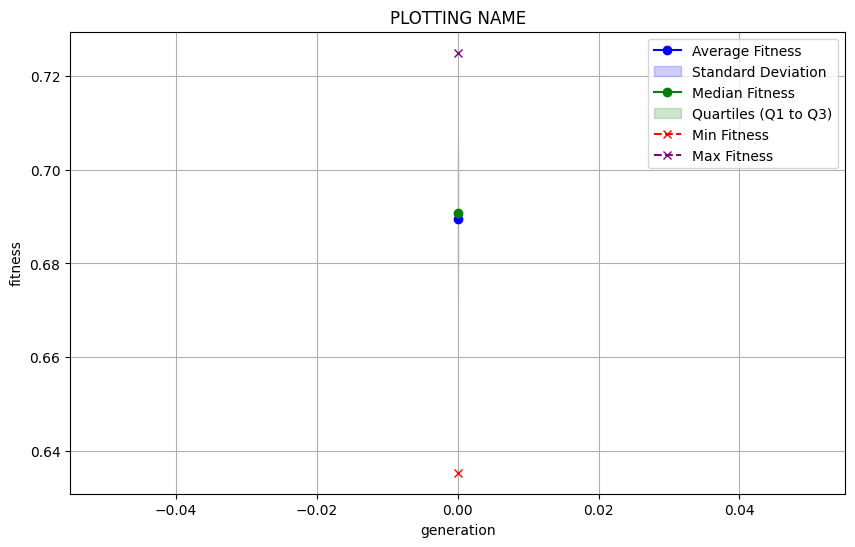

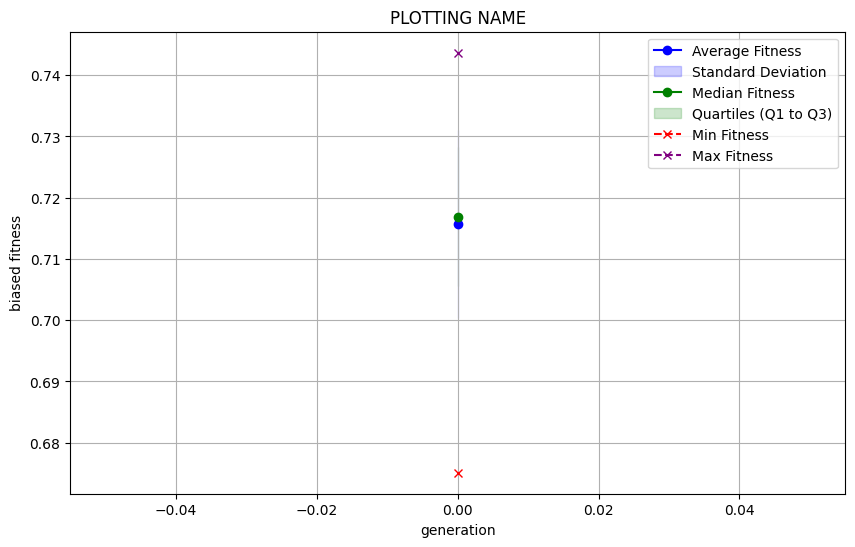

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_0: ['DoubleParabolicShape_0', 'CircularStrictTransformation_0']
predict: (0.2910832328508435, 373.1091407, 457.41996789999996)
biased_fitness: 0.7125637507915651, fitness: 0.6865221284915652
shape parameter:
parameter_list: [ lower_coefficient: 2.1372075196434386, upper_coefficient: 2.3199665971059886, lower_y-intercept: 3.2479174128514012, upper_y-intercept_from_lower_y: 1.2595106580024058, lower_x_trans: 4.841291235638112, ]
pattern parameter:
parameter_list: [ di: 10.210946838973745, dx: 9.640117298780895, phi: 0.36959913571644626, ]


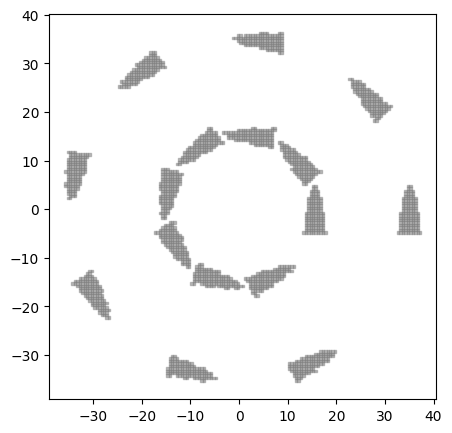

--------------------------------------------------
label: VentHole Chromosome_1: ['DoubleParabolicShape_1', 'CircularStrictTransformation_1']
predict: (0.2888491291053936, 373.2092096, 458.62814249999997)
biased_fitness: 0.7317879567460637, fitness: 0.7023219484460638
shape parameter:
parameter_list: [ lower_coefficient: 1.4243380639241732, upper_coefficient: 1.565102499684396, lower_y-intercept: 2.808673407035342, upper_y-intercept_from_lower_y: 1.4548411453412715, lower_x_trans: 0.1775826608561264, ]
pattern parameter:
parameter_list: [ di: 10.929209850245526, dx: 8.769953607303783, phi: 0.7853981633974483, ]


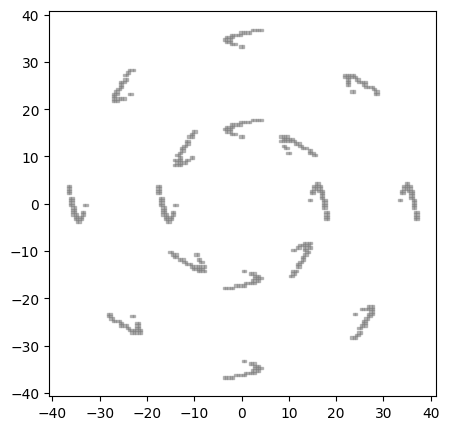

--------------------------------------------------
label: VentHole Chromosome_2: ['DoubleParabolicShape_2', 'GridStrictTransformation_2']
predict: (0.2906981171123135, 373.0036373999999, 458.4334031999998)
biased_fitness: 0.7151265606768658, fitness: 0.6858336258768661
shape parameter:
parameter_list: [ lower_coefficient: 2.9586095274936723, upper_coefficient: 2.9111652118686915, lower_y-intercept: 1.5242967545464734, upper_y-intercept_from_lower_y: 1.4688301835606787, lower_x_trans: -1.849434787470905, ]
pattern parameter:
parameter_list: [ dx: 9.537886302616224, dy: 2.5432720205296357, ]


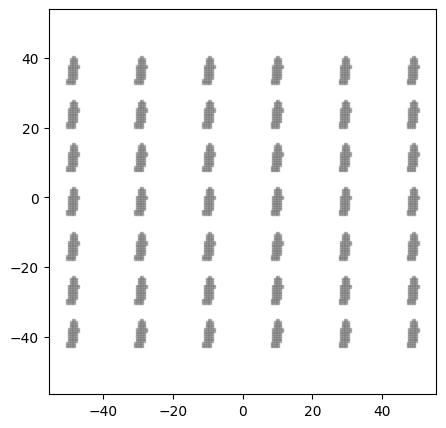

--------------------------------------------------
label: VentHole Chromosome_3: ['DoubleParabolicShape_3', 'GridStrictTransformation_3']
predict: (0.29061962076338776, 372.3400170999999, 456.20912889999994)
biased_fitness: 0.7250054148661231, fitness: 0.7010580623661231
shape parameter:
parameter_list: [ lower_coefficient: 1.8075749145896582, upper_coefficient: 1.1986691435942625, lower_y-intercept: 3.6932914139704343, upper_y-intercept_from_lower_y: 1.0363612582894475, lower_x_trans: 1.218882643137535, ]
pattern parameter:
parameter_list: [ dx: 5.22723045248004, dy: 9.465644227309298, ]


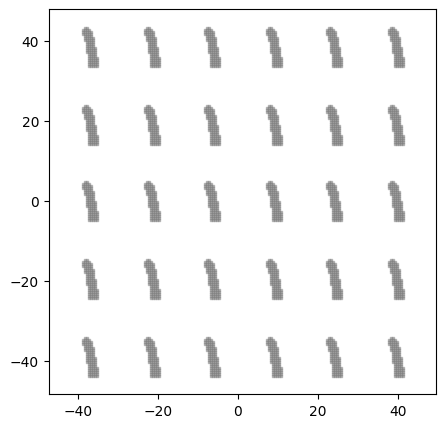

--------------------------------------------------
label: VentHole Chromosome_4: ['DoubleParabolicShape_4', 'CircularStrictTransformation_4']
predict: (0.29220996944150546, 373.59469040000005, 458.58136989999986)
biased_fitness: 0.6955747329849453, fitness: 0.6670200040849459
shape parameter:
parameter_list: [ lower_coefficient: 2.273143655994516, upper_coefficient: 1.2227205475531218, lower_y-intercept: 1.8707951322566956, upper_y-intercept_from_lower_y: 1.0220350680051156, lower_x_trans: -3.2277460354365273, ]
pattern parameter:
parameter_list: [ di: 8.07974591424436, dx: 1.5635232213430916, phi: 0.7853981633974483, ]


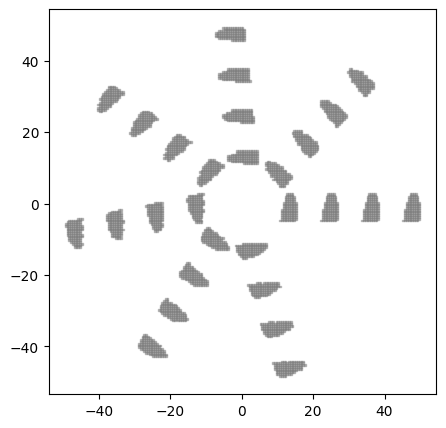

--------------------------------------------------
label: VentHole Chromosome_5: ['DoubleParabolicShape_5', 'GridStrictTransformation_5']
predict: (0.2892386124066735, 372.9340225999999, 456.83067470000015)
biased_fitness: 0.7334143683332657, fitness: 0.708790389433265
shape parameter:
parameter_list: [ lower_coefficient: 1.7321232853600672, upper_coefficient: 2.975308037769058, lower_y-intercept: 1.1752580918565902, upper_y-intercept_from_lower_y: 1.6168912414074392, lower_x_trans: -0.36811109654018814, ]
pattern parameter:
parameter_list: [ dx: 5.687113041034421, dy: 9.807116352592354, ]


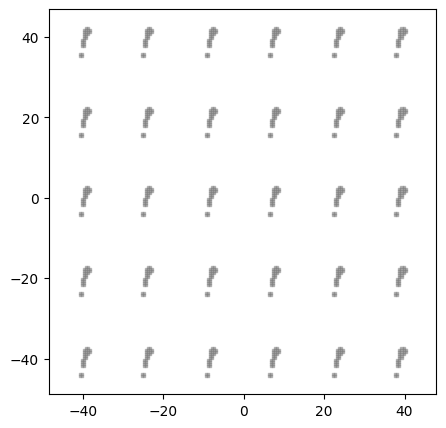

--------------------------------------------------
label: VentHole Chromosome_6: ['DoubleParabolicShape_6', 'GridStrictTransformation_6']
predict: (0.2928858542076811, 373.35338939999997, 457.50747469999993)
biased_fitness: 0.6926527827231892, fitness: 0.6668371374231894
shape parameter:
parameter_list: [ lower_coefficient: 1.4082503537400373, upper_coefficient: 2.0501597335279147, lower_y-intercept: 3.601425326246306, upper_y-intercept_from_lower_y: 1.4050285516640821, lower_x_trans: 3.437815107969783, ]
pattern parameter:
parameter_list: [ dx: 3.305560245180958, dy: 1.0048507448975486, ]


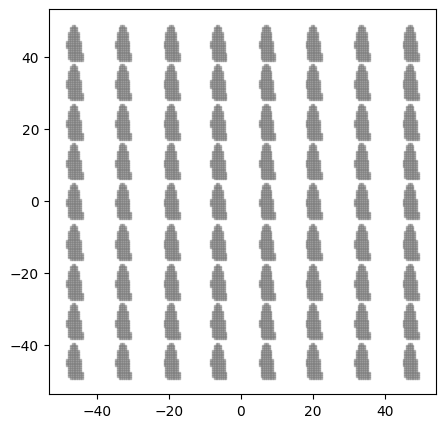

--------------------------------------------------
label: VentHole Chromosome_7: ['DoubleParabolicShape_7', 'CornerTransformation_7']
predict: (0.28982869185887306, 372.90622629999996, 455.7986137999998)
biased_fitness: 0.72977226971127, fitness: 0.7081888809112704
shape parameter:
parameter_list: [ lower_coefficient: 2.196356860393964, upper_coefficient: 1.9944728436546038, lower_y-intercept: 1.490873639838427, upper_y-intercept_from_lower_y: 1.523239300607072, lower_x_trans: 0.3262891150025844, ]
pattern parameter:
parameter_list: [ di: 11.970207992096388, dx: 0.5694783391756029, phi: 0.42520246550287993, rot_count: 6.0, ]


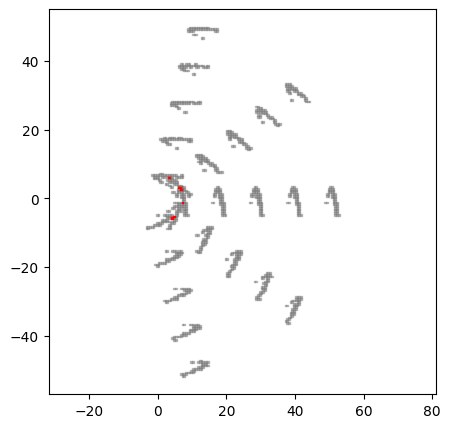

--------------------------------------------------
label: VentHole Chromosome_8: ['DoubleParabolicShape_8', 'GridStrictTransformation_8']
predict: (0.28932550395099943, 372.5343048, 455.87856580000005)
biased_fitness: 0.7372476952900056, fitness: 0.7146806074900054
shape parameter:
parameter_list: [ lower_coefficient: 2.477930041347343, upper_coefficient: 1.216790155786489, lower_y-intercept: 1.4767078164702319, upper_y-intercept_from_lower_y: 1.8334249496853918, lower_x_trans: 1.6257671230150166, ]
pattern parameter:
parameter_list: [ dx: 4.86771857607446, dy: 9.084552334167311, ]


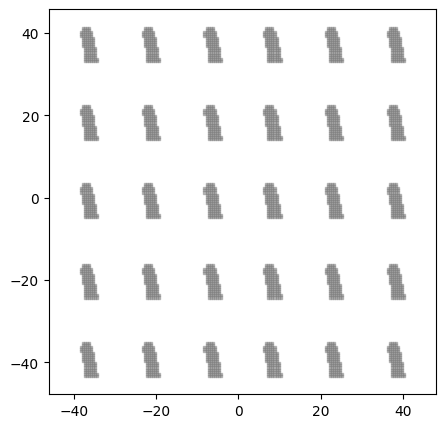

--------------------------------------------------
label: VentHole Chromosome_9: ['DoubleParabolicShape_9', 'CircularStrictTransformation_9']
predict: (0.28964183197639026, 373.12222420000006, 457.02794370000004)
biased_fitness: 0.7276702234360968, fitness: 0.7028308407360968
shape parameter:
parameter_list: [ lower_coefficient: 1.3326135155752674, upper_coefficient: 1.4513985592729297, lower_y-intercept: 3.7345730809984223, upper_y-intercept_from_lower_y: 1.432554190082298, lower_x_trans: -1.934492738822212, ]
pattern parameter:
parameter_list: [ di: 8.025012852107588, dx: 5.8447745044187, phi: 0.483321946706122, ]


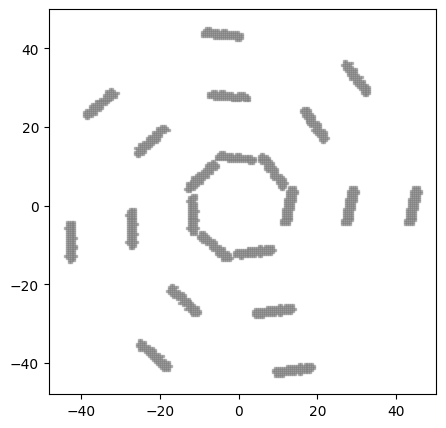

--------------------------------------------------
label: VentHole Chromosome_10: ['DoubleParabolicShape_10', 'CircularStrictTransformation_10']
predict: (0.29243132943358296, 372.9457114999999, 457.1181447000001)
biased_fitness: 0.7008304357641707, fitness: 0.6753674246641703
shape parameter:
parameter_list: [ lower_coefficient: 2.273255956116792, upper_coefficient: 1.3744529981558637, lower_y-intercept: 2.5061268788982045, upper_y-intercept_from_lower_y: 1.9983365689686454, lower_x_trans: 2.50806015259686, ]
pattern parameter:
parameter_list: [ di: 13.227054092784805, dx: 1.8475423221595686, phi: 0.6981317007977318, ]


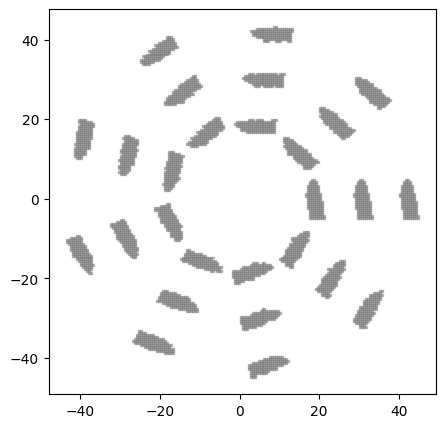

--------------------------------------------------
label: VentHole Chromosome_11: ['DoubleParabolicShape_11', 'CornerTransformation_11']
predict: (0.2912244084221354, 373.5024669, 457.57179010000016)
biased_fitness: 0.7080950672786458, fitness: 0.6823846307786454
shape parameter:
parameter_list: [ lower_coefficient: 1.6542483631227716, upper_coefficient: 1.8703163167070496, lower_y-intercept: 3.4841712234942257, upper_y-intercept_from_lower_y: 1.6433897482449842, lower_x_trans: -4.548653016929769, ]
pattern parameter:
parameter_list: [ di: 8.146475289899378, dx: 0.8775534694585136, phi: 0.3087565576311947, rot_count: 2.0, ]


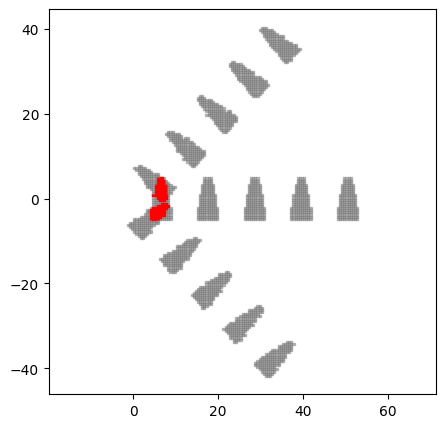

--------------------------------------------------
label: VentHole Chromosome_12: ['DoubleParabolicShape_12', 'GridStrictTransformation_12']
predict: (0.2937809002782328, 373.47725410000004, 456.79483860000005)
biased_fitness: 0.6842605413176718, fitness: 0.6608305337176716
shape parameter:
parameter_list: [ lower_coefficient: 2.9574541174917526, upper_coefficient: 2.5566332686606406, lower_y-intercept: 2.02268293543838, upper_y-intercept_from_lower_y: 1.262894973500551, lower_x_trans: 3.0424764613850606, ]
pattern parameter:
parameter_list: [ dx: 2.47149393917144, dy: 2.7433480863655646, ]


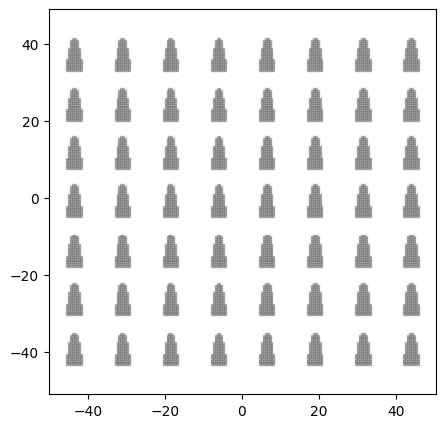

--------------------------------------------------
label: VentHole Chromosome_13: ['DoubleParabolicShape_13', 'GridStrictTransformation_13']
predict: (0.28962097282129706, 372.9479295999999, 457.90729360000006)
biased_fitness: 0.7273401773870298, fitness: 0.6995141557870295
shape parameter:
parameter_list: [ lower_coefficient: 2.1811167030946876, upper_coefficient: 2.509272840202257, lower_y-intercept: 1.3983264606313122, upper_y-intercept_from_lower_y: 1.192151758206116, lower_x_trans: -0.6811310595832349, ]
pattern parameter:
parameter_list: [ dx: 5.73496846259801, dy: 2.5584687601669702, ]


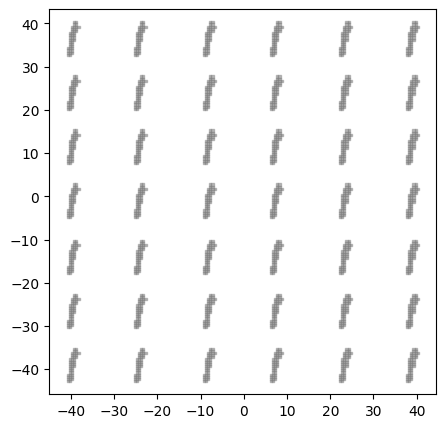

--------------------------------------------------
label: VentHole Chromosome_14: ['DoubleParabolicShape_14', 'CircularStrictTransformation_14']
predict: (0.29097762915136327, 372.9898969, 458.7394472999997)
biased_fitness: 0.7118155355863676, fitness: 0.6815769874863685
shape parameter:
parameter_list: [ lower_coefficient: 1.8101954864025411, upper_coefficient: 2.4565377678689835, lower_y-intercept: 3.7697078293759287, upper_y-intercept_from_lower_y: 1.467294078956534, lower_x_trans: 1.7087536494784779, ]
pattern parameter:
parameter_list: [ di: 7.673955947709108, dx: 2.1877330617043507, phi: 0.41887902047863906, ]


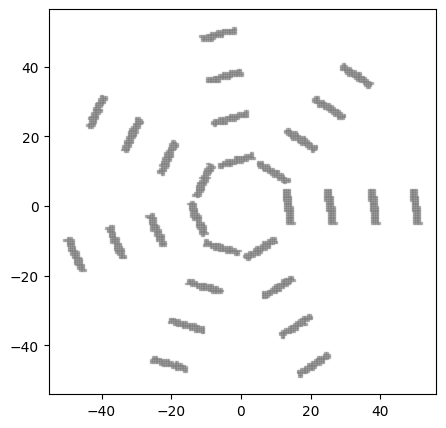

--------------------------------------------------
label: VentHole Chromosome_15: ['DoubleParabolicShape_15', 'CircularStrictTransformation_15']
predict: (0.28990663169280206, 373.26527870000007, 454.1014360999998)
biased_fitness: 0.7298738599719793, fitness: 0.7141001090719801
shape parameter:
parameter_list: [ lower_coefficient: 2.6767384572877884, upper_coefficient: 2.5863332972741633, lower_y-intercept: 3.600788746485429, upper_y-intercept_from_lower_y: 1.9359308231643775, lower_x_trans: 2.27891858845857, ]
pattern parameter:
parameter_list: [ di: 13.162647463172874, dx: 8.54826425700086, phi: 0.5711986642890533, ]


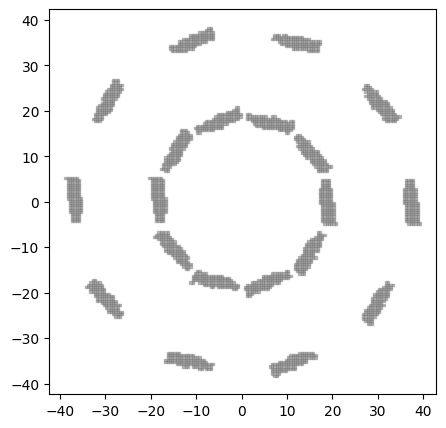

--------------------------------------------------
label: VentHole Chromosome_16: ['DoubleParabolicShape_16', 'GridStrictTransformation_16']
predict: (0.2919615868905321, 373.6432136000001, 459.7202005999999)
biased_fitness: 0.6954412346946786, fitness: 0.6635670600946791
shape parameter:
parameter_list: [ lower_coefficient: 1.2540828303992444, upper_coefficient: 2.3469934361821223, lower_y-intercept: 1.3685888731618292, upper_y-intercept_from_lower_y: 1.902532780874321, lower_x_trans: 4.908522713245292, ]
pattern parameter:
parameter_list: [ dx: 2.1969622562228084, dy: 5.706178662684839, ]


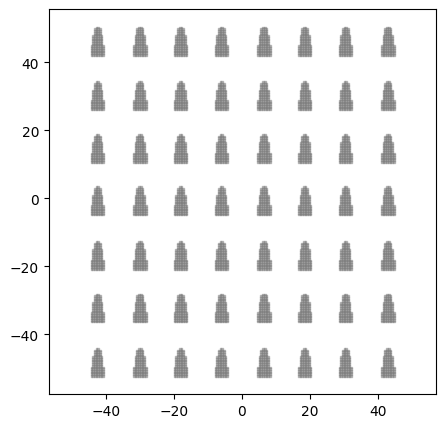

--------------------------------------------------
label: VentHole Chromosome_17: ['DoubleParabolicShape_17', 'CircularStrictTransformation_17']
predict: (0.29044101523787, 373.1568129999999, 459.9084381999998)
biased_fitness: 0.7136752802213009, fitness: 0.6802635916213012
shape parameter:
parameter_list: [ lower_coefficient: 2.1125195540405968, upper_coefficient: 2.399697894837908, lower_y-intercept: 3.9705227138941854, upper_y-intercept_from_lower_y: 1.3644315002846432, lower_x_trans: -1.4507100397978858, ]
pattern parameter:
parameter_list: [ di: 11.668578005382145, dx: 4.464923711089237, phi: 0.6981317007977318, ]


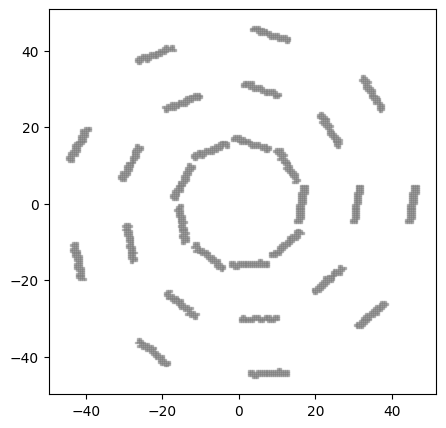

--------------------------------------------------
label: VentHole Chromosome_18: ['DoubleParabolicShape_18', 'CircularStrictTransformation_18']
predict: (0.29174372974169094, 373.9885772999998, 455.52640059999993)
biased_fitness: 0.7035898602830919, fitness: 0.6849878130830918
shape parameter:
parameter_list: [ lower_coefficient: 1.019773659939702, upper_coefficient: 2.6776069512570677, lower_y-intercept: 3.283275883991794, upper_y-intercept_from_lower_y: 1.8091478930084721, lower_x_trans: 2.967646927558202, ]
pattern parameter:
parameter_list: [ di: 11.569163594865874, dx: 1.3459021799929511, phi: 0.7853981633974483, ]


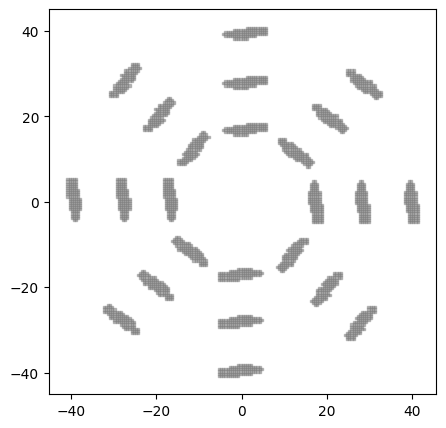

--------------------------------------------------
label: VentHole Chromosome_19: ['DoubleParabolicShape_19', 'GridStrictTransformation_19']
predict: (0.29090901861504337, 373.0618814, 455.73487140000003)
biased_fitness: 0.7180069012495661, fitness: 0.696926049849566
shape parameter:
parameter_list: [ lower_coefficient: 1.2515388254947584, upper_coefficient: 2.193160367942661, lower_y-intercept: 2.3568530185434624, upper_y-intercept_from_lower_y: 1.1919451083078585, lower_x_trans: -0.3742928450331853, ]
pattern parameter:
parameter_list: [ dx: 0.7052046438296496, dy: 9.202895146226538, ]


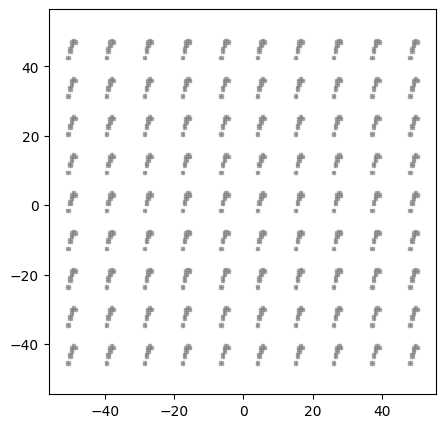

--------------------------------------------------
label: VentHole Chromosome_20: ['DoubleParabolicShape_20', 'CircularStrictTransformation_20']
predict: (0.2917376285392148, 373.82685009999994, 458.86031130000003)
biased_fitness: 0.698115141307852, fitness: 0.6691879076078519
shape parameter:
parameter_list: [ lower_coefficient: 2.076929618286422, upper_coefficient: 1.109311743534054, lower_y-intercept: 3.94279828649735, upper_y-intercept_from_lower_y: 1.6426648199096336, lower_x_trans: 4.517814683504428, ]
pattern parameter:
parameter_list: [ di: 13.2305527102468, dx: 7.125337709326589, phi: 0.7853981633974483, ]


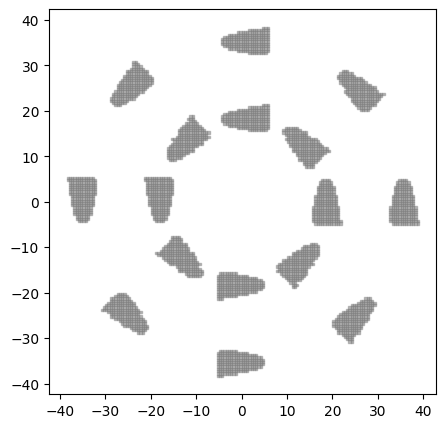

--------------------------------------------------
label: VentHole Chromosome_21: ['DoubleParabolicShape_21', 'GridStrictTransformation_21']
predict: (0.29042554058370484, 373.0332867999999, 455.9011548000001)
biased_fitness: 0.7227092769629517, fitness: 0.7010723861629514
shape parameter:
parameter_list: [ lower_coefficient: 2.581354378065134, upper_coefficient: 2.8725875709631445, lower_y-intercept: 3.469948502718143, upper_y-intercept_from_lower_y: 1.4788656314287159, lower_x_trans: 1.628801969156532, ]
pattern parameter:
parameter_list: [ dx: 8.410749550795899, dy: 1.2425495226894148, ]


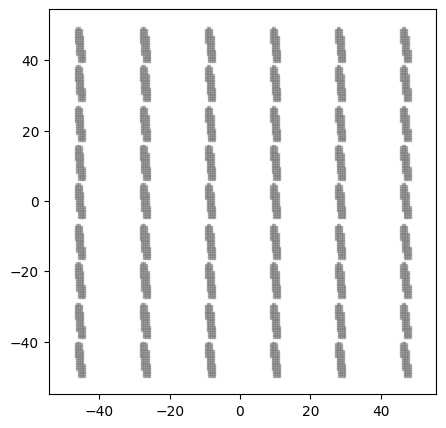

--------------------------------------------------
label: VentHole Chromosome_22: ['DoubleParabolicShape_22', 'GridStrictTransformation_22']
predict: (0.2915769304865816, 373.91937849999994, 456.25504019999994)
biased_fitness: 0.7042849652341843, fitness: 0.6833586016341843
shape parameter:
parameter_list: [ lower_coefficient: 2.814545057064391, upper_coefficient: 1.1738930480626344, lower_y-intercept: 2.534943059434807, upper_y-intercept_from_lower_y: 1.0119815740047262, lower_x_trans: 2.4577222523311972, ]
pattern parameter:
parameter_list: [ dx: 7.681910940403234, dy: 6.764435833605534, ]


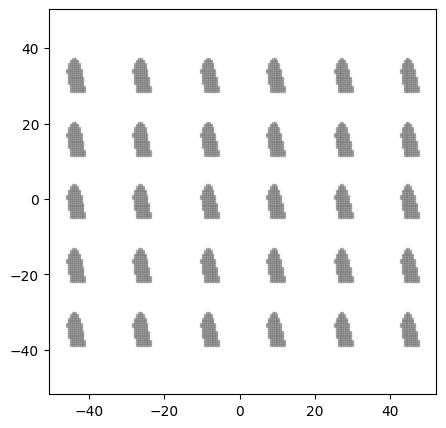

--------------------------------------------------
label: VentHole Chromosome_23: ['DoubleParabolicShape_23', 'CornerTransformation_23']
predict: (0.2886204341099461, 373.35212369999994, 455.43493419999993)
biased_fitness: 0.7394609246005396, fitness: 0.7198603694005398
shape parameter:
parameter_list: [ lower_coefficient: 2.366150389686525, upper_coefficient: 2.026944949226777, lower_y-intercept: 3.8182415306530393, upper_y-intercept_from_lower_y: 1.4418876779973313, lower_x_trans: 3.246046722084225, ]
pattern parameter:
parameter_list: [ di: 13.327808772359935, dx: 9.132320751190518, phi: 0.5061620340695289, rot_count: 6.0, ]


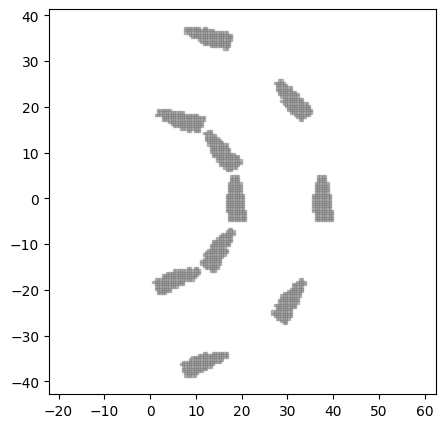

--------------------------------------------------
label: VentHole Chromosome_24: ['DoubleParabolicShape_24', 'CircularStrictTransformation_24']
predict: (0.29203676927126887, 372.84102299999984, 457.7786336)
biased_fitness: 0.7041878790873123, fitness: 0.6765340242873121
shape parameter:
parameter_list: [ lower_coefficient: 1.8705690962890067, upper_coefficient: 1.8463970426116318, lower_y-intercept: 2.592808663466226, upper_y-intercept_from_lower_y: 1.7736972435081748, lower_x_trans: 4.363107192045227, ]
pattern parameter:
parameter_list: [ di: 12.680209531316876, dx: 2.534645173628748, phi: 0.5711986642890533, ]


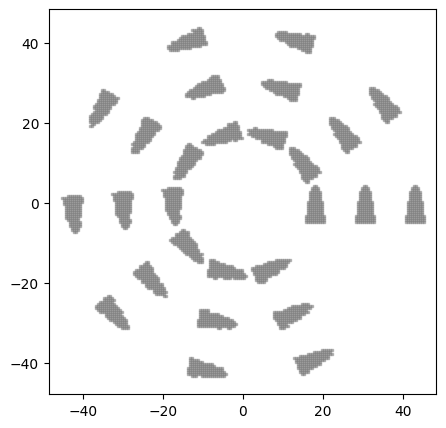

--------------------------------------------------
label: VentHole Chromosome_25: ['DoubleParabolicShape_25', 'CircularStrictTransformation_25']
predict: (0.28962116221282863, 373.0751916000001, 455.11379980000015)
biased_fitness: 0.7320344370717126, fitness: 0.7128434208717124
shape parameter:
parameter_list: [ lower_coefficient: 1.509697408401498, upper_coefficient: 1.7113080539926924, lower_y-intercept: 2.185115197358324, upper_y-intercept_from_lower_y: 1.4137639012231098, lower_x_trans: -3.768530279750588, ]
pattern parameter:
parameter_list: [ di: 12.932861715401184, dx: 8.659438093373366, phi: 0.6283185307179586, ]


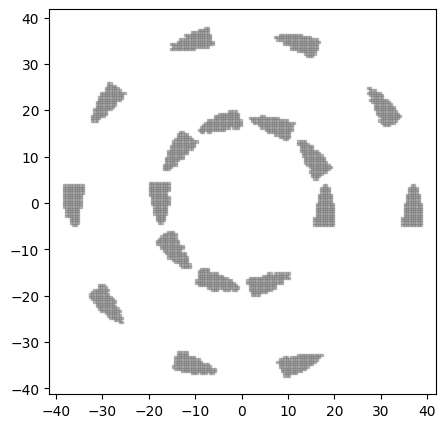

--------------------------------------------------
label: VentHole Chromosome_26: ['DoubleParabolicShape_26', 'GridStrictTransformation_26']
predict: (0.29210413441215977, 373.2103118, 458.7600588999999)
biased_fitness: 0.6989663554784025, fitness: 0.6691068023784029
shape parameter:
parameter_list: [ lower_coefficient: 1.9738911295097519, upper_coefficient: 1.5186834374768863, lower_y-intercept: 3.284584114553495, upper_y-intercept_from_lower_y: 1.8848847163658553, lower_x_trans: -2.5213865479833086, ]
pattern parameter:
parameter_list: [ dx: 7.429356333846959, dy: 3.1675600533032355, ]


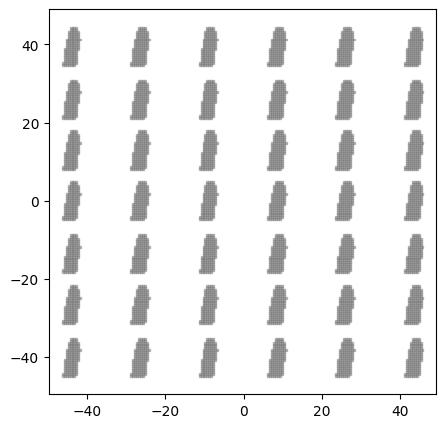

--------------------------------------------------
label: VentHole Chromosome_27: ['DoubleParabolicShape_27', 'GridStrictTransformation_27']
predict: (0.2902149662767093, 373.4919473999999, 459.5754715)
biased_fitness: 0.7142557624329078, fitness: 0.6825132427329076
shape parameter:
parameter_list: [ lower_coefficient: 2.444750739815378, upper_coefficient: 2.5932996950029574, lower_y-intercept: 1.9290900851626653, upper_y-intercept_from_lower_y: 1.9988918303839642, lower_x_trans: -0.3766456632654105, ]
pattern parameter:
parameter_list: [ dx: 3.8819878064999966, dy: 5.3009651327578045, ]


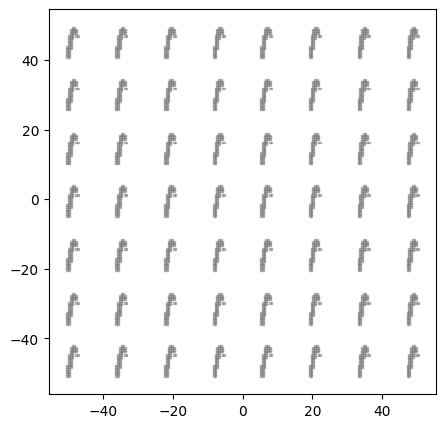

--------------------------------------------------
label: VentHole Chromosome_28: ['DoubleParabolicShape_28', 'CornerTransformation_28']
predict: (0.2893267266564834, 373.0185544000001, 457.78452359999994)
biased_fitness: 0.7300338054351653, fitness: 0.7027173434351657
shape parameter:
parameter_list: [ lower_coefficient: 2.164398807562597, upper_coefficient: 1.9507174924389534, lower_y-intercept: 2.13047459098017, upper_y-intercept_from_lower_y: 1.4641654611188337, lower_x_trans: -1.957243309863835, ]
pattern parameter:
parameter_list: [ di: 9.328329983032944, dx: 9.997019044182274, phi: 0.3368256576345367, rot_count: 5.0, ]


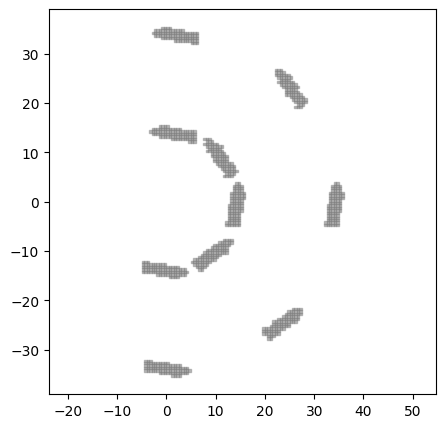

--------------------------------------------------
label: VentHole Chromosome_29: ['DoubleParabolicShape_29', 'CircularStrictTransformation_29']
predict: (0.2918303462998062, 373.21567439999984, 456.69875979999995)
biased_fitness: 0.7057892966019392, fitness: 0.682124366001939
shape parameter:
parameter_list: [ lower_coefficient: 1.3179909878287093, upper_coefficient: 1.2690687548588195, lower_y-intercept: 2.576302895483369, upper_y-intercept_from_lower_y: 1.5884297581937128, lower_x_trans: -4.1318493682369075, ]
pattern parameter:
parameter_list: [ di: 8.316914025718926, dx: 4.524296478953706, phi: 0.6981317007977318, ]


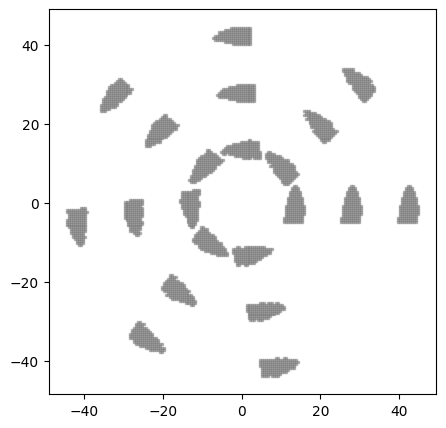

--------------------------------------------------
label: VentHole Chromosome_30: ['DoubleParabolicShape_30', 'CornerTransformation_30']
predict: (0.2900649365379566, 372.9642455000001, 460.30377640000006)
biased_fitness: 0.7179933633204327, fitness: 0.6830105251204328
shape parameter:
parameter_list: [ lower_coefficient: 1.8143736210939678, upper_coefficient: 2.910651834036199, lower_y-intercept: 3.09543009125282, upper_y-intercept_from_lower_y: 1.6725405146943257, lower_x_trans: 4.2919760100943485, ]
pattern parameter:
parameter_list: [ di: 8.06951143743901, dx: 8.17169714165121, phi: 0.6359141941502616, rot_count: 6.0, ]


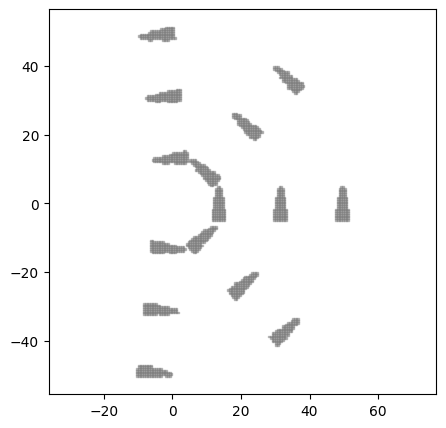

--------------------------------------------------
label: VentHole Chromosome_31: ['DoubleParabolicShape_31', 'CircularStrictTransformation_31']
predict: (0.29111181272154907, 373.4199942, 458.10916629999997)
biased_fitness: 0.7087235807845091, fitness: 0.6812360702845093
shape parameter:
parameter_list: [ lower_coefficient: 1.500021607478562, upper_coefficient: 1.251540964551887, lower_y-intercept: 2.4391042091474198, upper_y-intercept_from_lower_y: 1.6500591969252745, lower_x_trans: 1.9503624423345434, ]
pattern parameter:
parameter_list: [ di: 13.585944391026995, dx: 1.1030792385900225, phi: 0.39269908169872414, ]


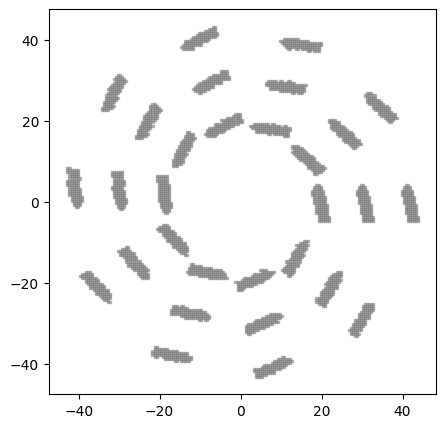

--------------------------------------------------
label: VentHole Chromosome_32: ['DoubleParabolicShape_32', 'CircularStrictTransformation_32']
predict: (0.28909604468800376, 373.1613241, 457.99073740000006)
biased_fitness: 0.7309288096199622, fitness: 0.703279245619962
shape parameter:
parameter_list: [ lower_coefficient: 2.951765721137811, upper_coefficient: 2.9577973246949245, lower_y-intercept: 1.0562284704917513, upper_y-intercept_from_lower_y: 1.3333744572741248, lower_x_trans: -1.3045310938664336, ]
pattern parameter:
parameter_list: [ di: 8.16767064231428, dx: 5.106958584569362, phi: 0.5711986642890533, ]


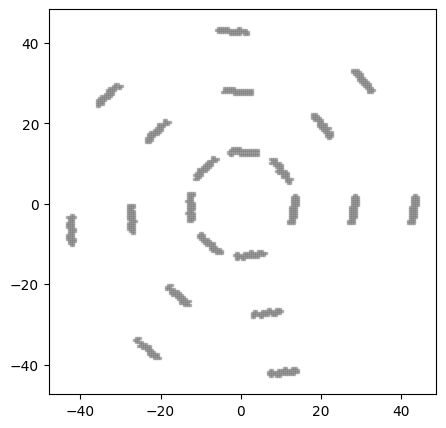

--------------------------------------------------
label: VentHole Chromosome_33: ['DoubleParabolicShape_33', 'GridStrictTransformation_33']
predict: (0.29383183069305896, 373.0187197, 457.3854913000001)
biased_fitness: 0.6857796725694099, fitness: 0.6596606380694096
shape parameter:
parameter_list: [ lower_coefficient: 2.6750988871086294, upper_coefficient: 1.7477294963146628, lower_y-intercept: 1.9402444528120344, upper_y-intercept_from_lower_y: 1.3607124576625798, lower_x_trans: -2.1481489500149573, ]
pattern parameter:
parameter_list: [ dx: 2.751138221428267, dy: 3.102994155524457, ]


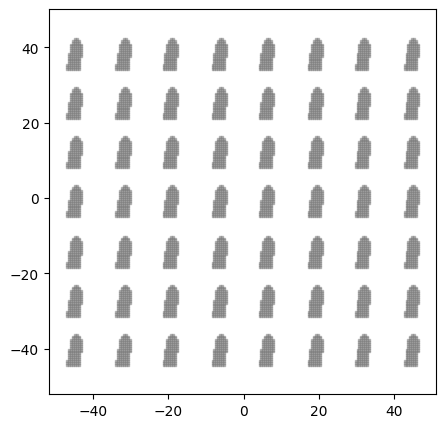

--------------------------------------------------
label: VentHole Chromosome_34: ['DoubleParabolicShape_34', 'CornerTransformation_34']
predict: (0.29022976318109817, 373.37610589999997, 456.33900999999975)
biased_fitness: 0.7213916068890189, fitness: 0.6991267886890197
shape parameter:
parameter_list: [ lower_coefficient: 2.43122710466361, upper_coefficient: 1.1233135485504337, lower_y-intercept: 3.4592950231057746, upper_y-intercept_from_lower_y: 1.044840632858864, lower_x_trans: -2.363881109107371, ]
pattern parameter:
parameter_list: [ di: 13.507809980195699, dx: 1.143929257615532, phi: 0.36922616077595266, rot_count: 4.0, ]


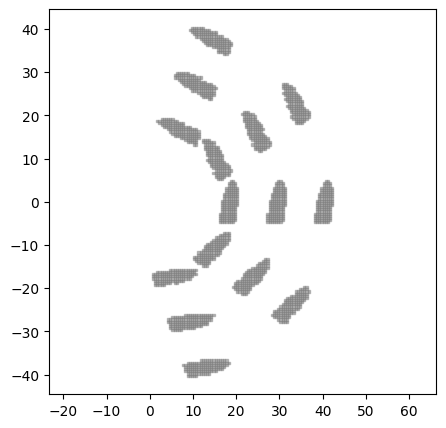

--------------------------------------------------
label: VentHole Chromosome_35: ['DoubleParabolicShape_35', 'CircularStrictTransformation_35']
predict: (0.2929863634887042, 373.2774803999999, 457.6699491000003)
biased_fitness: 0.691854104112958, fitness: 0.665399217612957
shape parameter:
parameter_list: [ lower_coefficient: 1.5814022925023408, upper_coefficient: 2.2980951084859793, lower_y-intercept: 3.8077975910322612, upper_y-intercept_from_lower_y: 1.9801072811250109, lower_x_trans: 3.6241568866927683, ]
pattern parameter:
parameter_list: [ di: 8.237900240427676, dx: 0.55097705127899, phi: 0.6981317007977318, ]


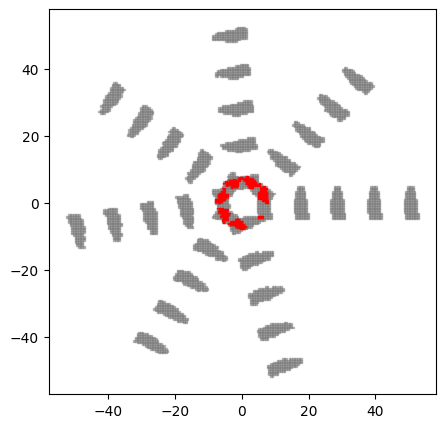

--------------------------------------------------
label: VentHole Chromosome_36: ['DoubleParabolicShape_36', 'CircularStrictTransformation_36']
predict: (0.2909146405291829, 373.1221939000001, 455.82643269999994)
biased_fitness: 0.7173453720081698, fitness: 0.6961104617081704
shape parameter:
parameter_list: [ lower_coefficient: 2.6054901956964, upper_coefficient: 2.4263391090377295, lower_y-intercept: 1.5791505685459202, upper_y-intercept_from_lower_y: 1.7990921135823679, lower_x_trans: -3.7663649797492327, ]
pattern parameter:
parameter_list: [ di: 13.304032766906914, dx: 7.511852231606711, phi: 0.3306939635357677, ]


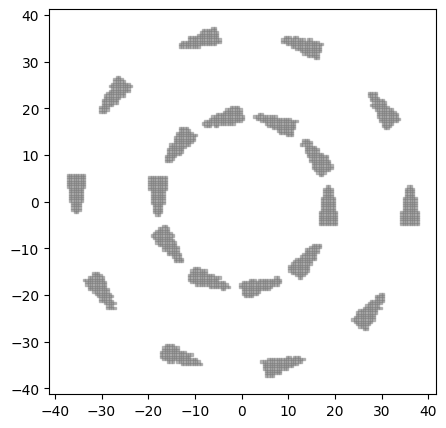

--------------------------------------------------
label: VentHole Chromosome_37: ['DoubleParabolicShape_37', 'CornerTransformation_37']
predict: (0.2887286284207844, 373.04750920000004, 455.31231270000006)
biased_fitness: 0.7407565259921556, fitness: 0.7209146062921555
shape parameter:
parameter_list: [ lower_coefficient: 1.760335085030749, upper_coefficient: 2.506224616023255, lower_y-intercept: 3.084235439726995, upper_y-intercept_from_lower_y: 1.5010542627534298, lower_x_trans: -3.980399605882842, ]
pattern parameter:
parameter_list: [ di: 14.130568023298164, dx: 8.91840937115698, phi: 0.5203507553860227, rot_count: 3.0, ]


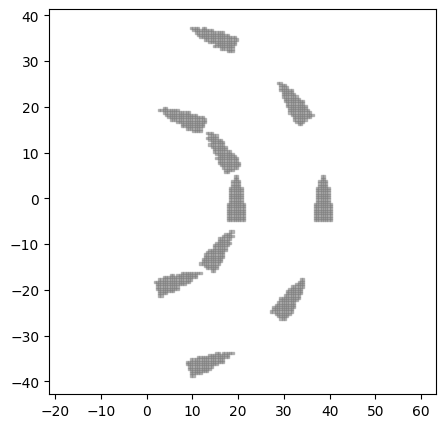

--------------------------------------------------
label: VentHole Chromosome_38: ['DoubleParabolicShape_38', 'CornerTransformation_38']
predict: (0.2913251293265875, 373.5754887, 457.9439327)
biased_fitness: 0.705832420434125, fitness: 0.679151599734125
shape parameter:
parameter_list: [ lower_coefficient: 2.4996064789961285, upper_coefficient: 1.7512215389037709, lower_y-intercept: 3.6141075719078892, upper_y-intercept_from_lower_y: 1.0248350442412797, lower_x_trans: -4.481210939440647, ]
pattern parameter:
parameter_list: [ di: 8.348110481153128, dx: 3.3185813372341895, phi: 0.4890188193645968, rot_count: 5.0, ]


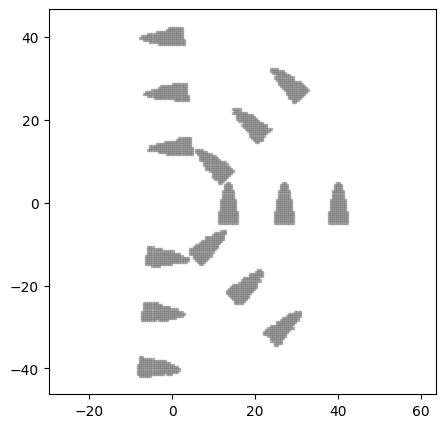

--------------------------------------------------
label: VentHole Chromosome_39: ['DoubleParabolicShape_39', 'CornerTransformation_39']
predict: (0.2884591254994202, 373.2764126, 457.9184535000001)
biased_fitness: 0.7366369498057974, fitness: 0.7094344145057971
shape parameter:
parameter_list: [ lower_coefficient: 1.6611545024455083, upper_coefficient: 2.774955682546996, lower_y-intercept: 3.192129998658367, upper_y-intercept_from_lower_y: 1.2486288993026862, lower_x_trans: 0.2543336385171422, ]
pattern parameter:
parameter_list: [ di: 14.285933831264284, dx: 9.96066555926432, phi: 0.429844489468693, rot_count: 6.0, ]


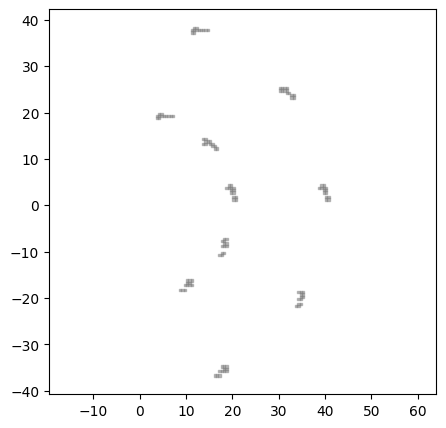

--------------------------------------------------
label: VentHole Chromosome_40: ['DoubleParabolicShape_40', 'CornerTransformation_40']
predict: (0.2890242428255223, 372.8180443000001, 456.8582478999999)
biased_fitness: 0.7363147658447762, fitness: 0.7113761107447767
shape parameter:
parameter_list: [ lower_coefficient: 2.8947687001320173, upper_coefficient: 2.3337276429512093, lower_y-intercept: 2.831848897865089, upper_y-intercept_from_lower_y: 1.596708568496041, lower_x_trans: 0.6425412007655309, ]
pattern parameter:
parameter_list: [ di: 10.348541291810053, dx: 6.026595672868269, phi: 0.5539189430043194, rot_count: 3.0, ]


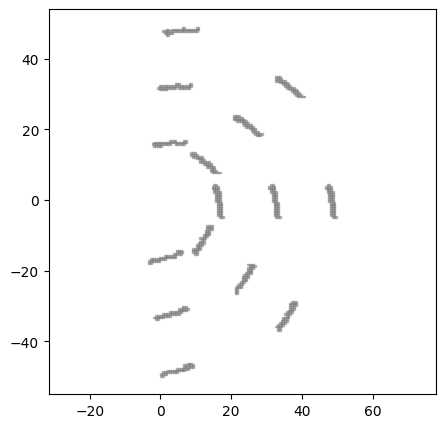

--------------------------------------------------
label: VentHole Chromosome_41: ['DoubleParabolicShape_41', 'GridStrictTransformation_41']
predict: (0.2924813380212661, 374.1947513, 458.08331639999983)
biased_fitness: 0.6896567278873392, fitness: 0.6637962812873398
shape parameter:
parameter_list: [ lower_coefficient: 2.6739697654914867, upper_coefficient: 2.7360515817552287, lower_y-intercept: 2.209672825493107, upper_y-intercept_from_lower_y: 1.0037696552354518, lower_x_trans: -3.9739151992335877, ]
pattern parameter:
parameter_list: [ dx: 2.8212065396394013, dy: 8.892664847507076, ]


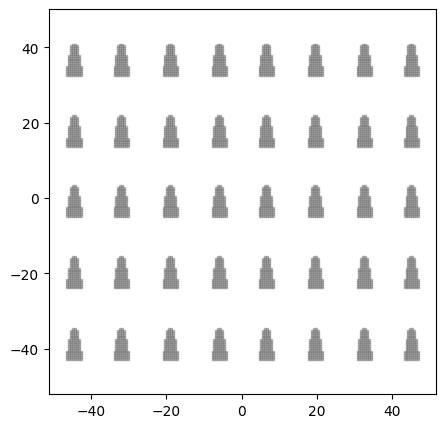

--------------------------------------------------
label: VentHole Chromosome_42: ['DoubleParabolicShape_42', 'CornerTransformation_42']
predict: (0.289842131736763, 373.181267, 457.9893381)
biased_fitness: 0.7233311374323701, fitness: 0.6957256571323701
shape parameter:
parameter_list: [ lower_coefficient: 1.5183178266319197, upper_coefficient: 1.8855078893200456, lower_y-intercept: 2.089062590664936, upper_y-intercept_from_lower_y: 1.7753040591361282, lower_x_trans: 2.019933875796095, ]
pattern parameter:
parameter_list: [ di: 9.804524170083782, dx: 4.749722852747075, phi: 0.45924177935596255, rot_count: 2.0, ]


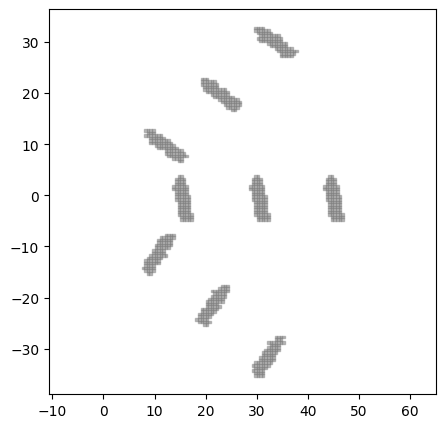

--------------------------------------------------
label: VentHole Chromosome_43: ['DoubleParabolicShape_43', 'CornerTransformation_43']
predict: (0.2906551765053762, 373.2268330999999, 459.6098605999998)
biased_fitness: 0.7116406820462389, fitness: 0.6792647664462392
shape parameter:
parameter_list: [ lower_coefficient: 1.0243613918410235, upper_coefficient: 1.00119456705373, lower_y-intercept: 3.7992134055280204, upper_y-intercept_from_lower_y: 1.1748742041375415, lower_x_trans: 4.264018002770266, ]
pattern parameter:
parameter_list: [ di: 10.981528062899196, dx: 6.404689221108693, phi: 0.28383027269336364, rot_count: 4.0, ]


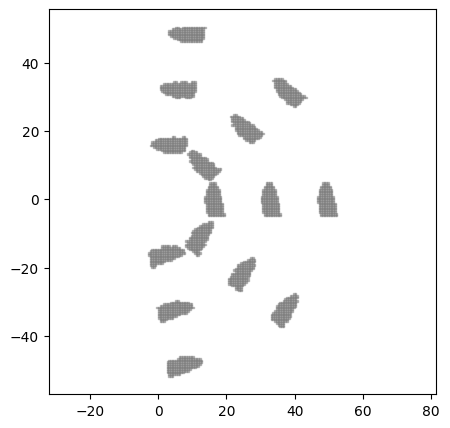

--------------------------------------------------
label: VentHole Chromosome_44: ['DoubleParabolicShape_44', 'CircularStrictTransformation_44']
predict: (0.29240783482570487, 373.4328739, 456.2901711999998)
biased_fitness: 0.6993111920429516, fitness: 0.6773064262429522
shape parameter:
parameter_list: [ lower_coefficient: 1.1909419152017369, upper_coefficient: 1.6490011073188686, lower_y-intercept: 2.628321575715272, upper_y-intercept_from_lower_y: 1.4256530261444844, lower_x_trans: -4.14338039582732, ]
pattern parameter:
parameter_list: [ di: 9.772823664683068, dx: 1.9982447920347448, phi: 0.41887902047863906, ]


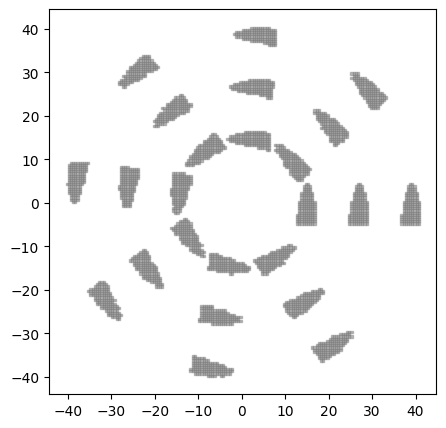

--------------------------------------------------
label: VentHole Chromosome_45: ['DoubleParabolicShape_45', 'CircularStrictTransformation_45']
predict: (0.2908940244574796, 372.74965129999987, 457.0324780999997)
biased_fitness: 0.7177472401252056, fitness: 0.6921491084252062
shape parameter:
parameter_list: [ lower_coefficient: 2.718131067627727, upper_coefficient: 1.2913815052152637, lower_y-intercept: 3.571334740531041, upper_y-intercept_from_lower_y: 1.6673371052165082, lower_x_trans: 2.077828155576303, ]
pattern parameter:
parameter_list: [ di: 11.15513273108435, dx: 6.538641894916074, phi: 0.6283185307179586, ]


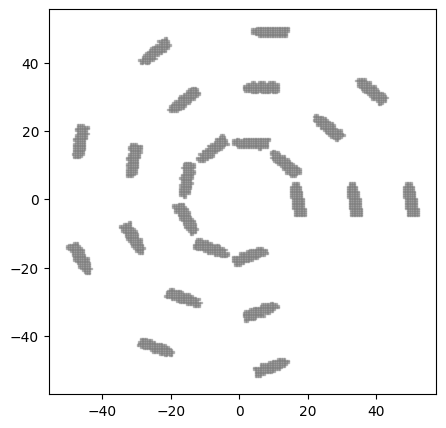

--------------------------------------------------
label: VentHole Chromosome_46: ['DoubleParabolicShape_46', 'CornerTransformation_46']
predict: (0.2904131002346333, 373.3846412999999, 458.55434239999965)
biased_fitness: 0.7150678237536684, fitness: 0.6861740791536692
shape parameter:
parameter_list: [ lower_coefficient: 2.4494170441701417, upper_coefficient: 1.234154980819097, lower_y-intercept: 1.1284215642956026, upper_y-intercept_from_lower_y: 1.555012456192916, lower_x_trans: -0.1511655877902207, ]
pattern parameter:
parameter_list: [ di: 8.460537782761625, dx: 4.127372892973664, phi: 0.605851232625064, rot_count: 6.0, ]


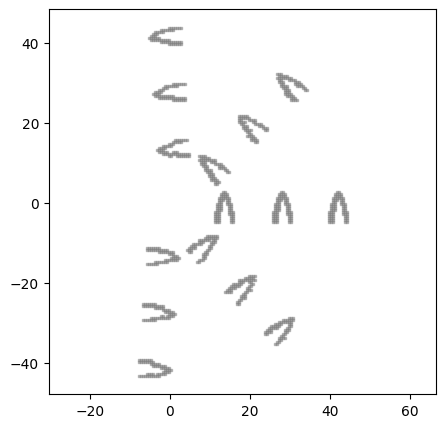

--------------------------------------------------
label: VentHole Chromosome_47: ['DoubleParabolicShape_47', 'CircularStrictTransformation_47']
predict: (0.2918382458629254, 373.2263914, 458.0454825)
biased_fitness: 0.7029418365707459, fitness: 0.675258171870746
shape parameter:
parameter_list: [ lower_coefficient: 2.9439282108851006, upper_coefficient: 2.258176099582025, lower_y-intercept: 1.752388366764319, upper_y-intercept_from_lower_y: 1.262473870118649, lower_x_trans: -4.016498828709601, ]
pattern parameter:
parameter_list: [ di: 8.66217054389823, dx: 1.2953848485308237, phi: 0.6283185307179586, ]


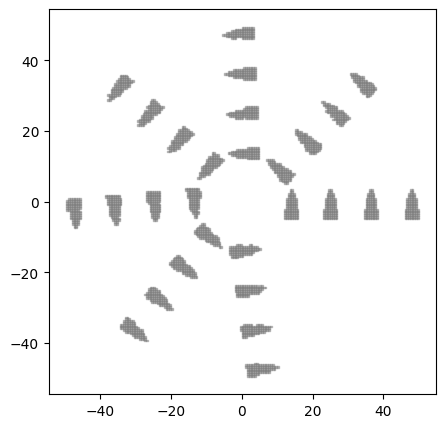

--------------------------------------------------
label: VentHole Chromosome_48: ['DoubleParabolicShape_48', 'CornerTransformation_48']
predict: (0.28866250986570186, 373.2944032000001, 457.36018589999986)
biased_fitness: 0.7355937071429809, fitness: 0.7101019558429815
shape parameter:
parameter_list: [ lower_coefficient: 2.964381361706709, upper_coefficient: 2.580571711133644, lower_y-intercept: 2.2825352191911326, upper_y-intercept_from_lower_y: 1.5151782660874067, lower_x_trans: 0.7984533429112677, ]
pattern parameter:
parameter_list: [ di: 12.841317319076651, dx: 7.008192526561235, phi: 0.6650135082244932, rot_count: 2.0, ]


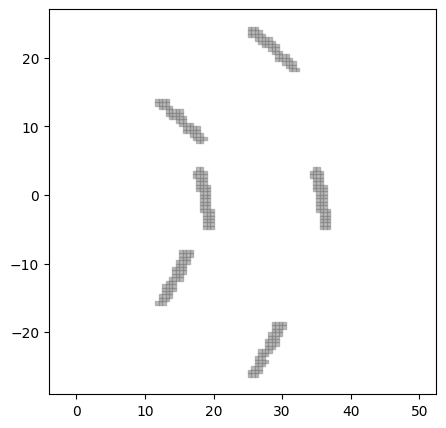

--------------------------------------------------
label: VentHole Chromosome_49: ['DoubleParabolicShape_49', 'CircularStrictTransformation_49']
predict: (0.2921484273143897, 373.2268318, 460.0473574999998)
biased_fitness: 0.6958331892561029, fitness: 0.6621447803561036
shape parameter:
parameter_list: [ lower_coefficient: 2.381471092409125, upper_coefficient: 1.9112432007393607, lower_y-intercept: 3.020037846205315, upper_y-intercept_from_lower_y: 1.9327922097046903, lower_x_trans: 3.2597545514940975, ]
pattern parameter:
parameter_list: [ di: 8.761857683841718, dx: 3.0683684921743053, phi: 0.41887902047863906, ]


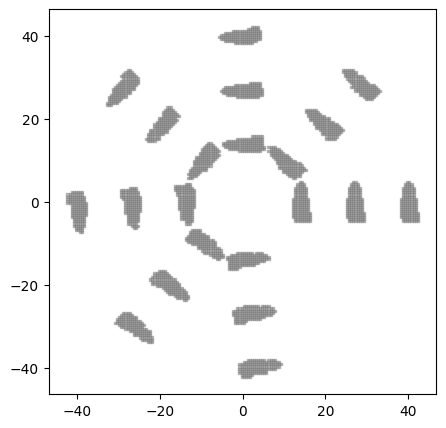

--------------------------------------------------
label: VentHole Chromosome_50: ['DoubleParabolicShape_50', 'GridStrictTransformation_50']
predict: (0.29238701243743126, 374.0017103999999, 459.71069009999997)
biased_fitness: 0.6886965226256878, fitness: 0.6575678731256879
shape parameter:
parameter_list: [ lower_coefficient: 1.767122143155213, upper_coefficient: 1.8165070720120235, lower_y-intercept: 3.182357744481401, upper_y-intercept_from_lower_y: 1.1848165547279992, lower_x_trans: -3.3600110647346915, ]
pattern parameter:
parameter_list: [ dx: 3.2655995599602727, dy: 6.895428041111347, ]


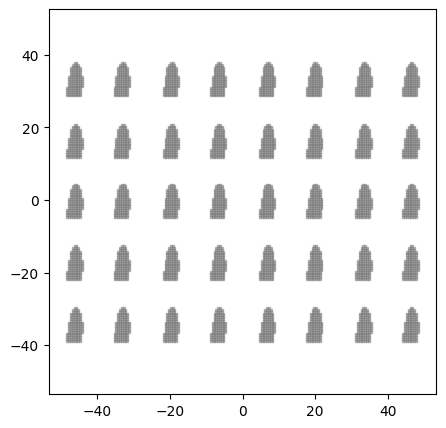

--------------------------------------------------
label: VentHole Chromosome_51: ['DoubleParabolicShape_51', 'GridStrictTransformation_51']
predict: (0.29284532702732635, 372.6990625, 457.64900109999985)
biased_fitness: 0.6973552900267365, fitness: 0.669806411726737
shape parameter:
parameter_list: [ lower_coefficient: 2.204559713138289, upper_coefficient: 1.6441249035812218, lower_y-intercept: 3.925783552188117, upper_y-intercept_from_lower_y: 1.6966395881469363, lower_x_trans: -3.996437512684196, ]
pattern parameter:
parameter_list: [ dx: 6.0520978571726545, dy: 7.045491157029463, ]


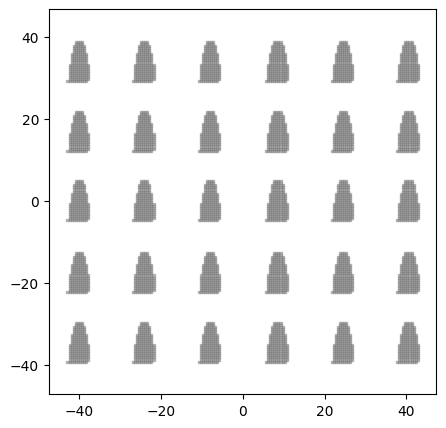

--------------------------------------------------
label: VentHole Chromosome_52: ['DoubleParabolicShape_52', 'CircularStrictTransformation_52']
predict: (0.2905146717127267, 373.25494459999993, 457.59456279999984)
biased_fitness: 0.7168795450727335, fitness: 0.6906057458727339
shape parameter:
parameter_list: [ lower_coefficient: 2.0991282415230117, upper_coefficient: 1.9650901262075768, lower_y-intercept: 3.708834736772004, upper_y-intercept_from_lower_y: 1.3655463906276017, lower_x_trans: 2.785513376438157, ]
pattern parameter:
parameter_list: [ di: 9.93938375129959, dx: 7.81179592805967, phi: 0.6981317007977318, ]


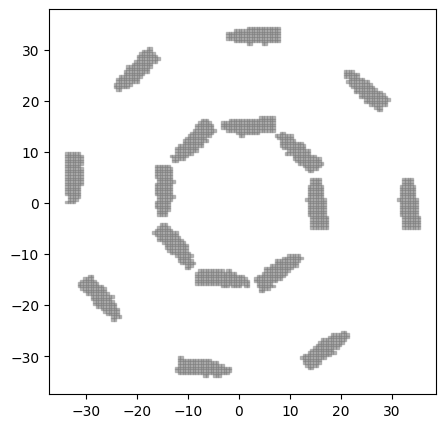

--------------------------------------------------
label: VentHole Chromosome_53: ['DoubleParabolicShape_53', 'GridStrictTransformation_53']
predict: (0.2927640076396154, 373.5074753999999, 459.21981799999986)
biased_fitness: 0.6893679598038467, fitness: 0.6587234566038469
shape parameter:
parameter_list: [ lower_coefficient: 1.7956783949137867, upper_coefficient: 1.3038376419938793, lower_y-intercept: 3.9879124320826542, upper_y-intercept_from_lower_y: 1.9905458856538067, lower_x_trans: -2.602490968035326, ]
pattern parameter:
parameter_list: [ dx: 7.96391883108329, dy: 4.412892029578201, ]


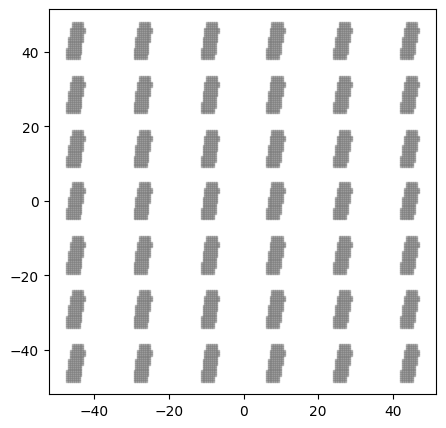

--------------------------------------------------
label: VentHole Chromosome_54: ['DoubleParabolicShape_54', 'GridStrictTransformation_54']
predict: (0.29100573246854533, 373.67707949999976, 456.1547393999998)
biased_fitness: 0.7118936400145486, fitness: 0.6907835808145487
shape parameter:
parameter_list: [ lower_coefficient: 1.0092938959917102, upper_coefficient: 2.250907161475432, lower_y-intercept: 1.7325630411264688, upper_y-intercept_from_lower_y: 1.165131151440847, lower_x_trans: 2.582301546039817, ]
pattern parameter:
parameter_list: [ dx: 3.4177877756059916, dy: 7.395686346091431, ]


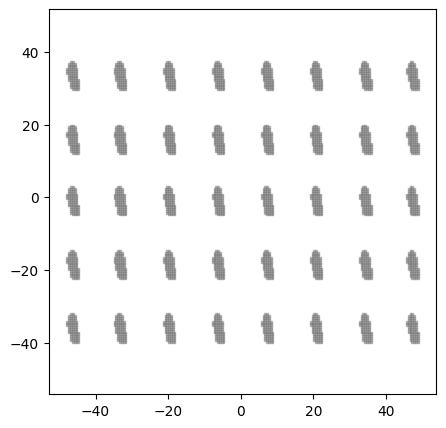

--------------------------------------------------
label: VentHole Chromosome_55: ['DoubleParabolicShape_55', 'CornerTransformation_55']
predict: (0.2884519504786902, 373.12620839999994, 456.67025630000006)
biased_fitness: 0.7402565238130979, fitness: 0.7164981717130977
shape parameter:
parameter_list: [ lower_coefficient: 1.711298857704855, upper_coefficient: 2.614141294990639, lower_y-intercept: 3.179441857076104, upper_y-intercept_from_lower_y: 1.6035448427313233, lower_x_trans: 0.10444727694247469, ]
pattern parameter:
parameter_list: [ di: 9.877819788091092, dx: 7.431997723858786, phi: 0.41886761989930865, rot_count: 2.0, ]


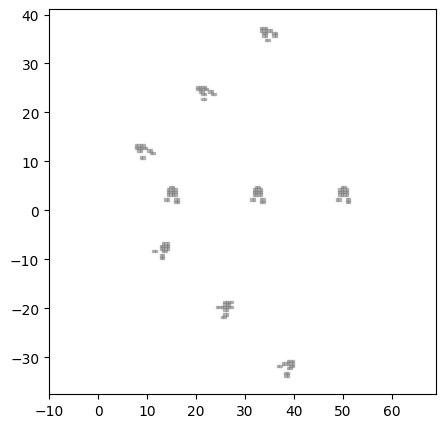

--------------------------------------------------
label: VentHole Chromosome_56: ['DoubleParabolicShape_56', 'GridStrictTransformation_56']
predict: (0.29278074894500516, 372.9609886, 457.2840433999999)
biased_fitness: 0.6968975035499484, fitness: 0.6709673505499487
shape parameter:
parameter_list: [ lower_coefficient: 1.3250961196962054, upper_coefficient: 2.7877179742137703, lower_y-intercept: 1.832110997223223, upper_y-intercept_from_lower_y: 1.3921472753118271, lower_x_trans: -2.7610836737443, ]
pattern parameter:
parameter_list: [ dx: 1.674597991559767, dy: 6.4550042285575255, ]


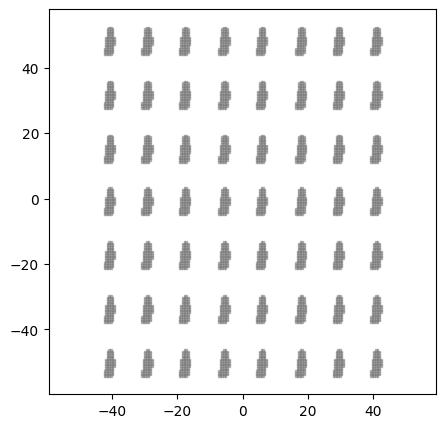

--------------------------------------------------
label: VentHole Chromosome_57: ['DoubleParabolicShape_57', 'GridStrictTransformation_57']
predict: (0.29154225821302493, 373.6448099, 460.6973192999997)
biased_fitness: 0.6976691099697513, fitness: 0.6628667718697521
shape parameter:
parameter_list: [ lower_coefficient: 1.8329557529342924, upper_coefficient: 2.2398187562636, lower_y-intercept: 1.0677818279737734, upper_y-intercept_from_lower_y: 1.609562766133458, lower_x_trans: -1.6035773859747557, ]
pattern parameter:
parameter_list: [ dx: 0.8341532271671196, dy: 8.224476181889582, ]


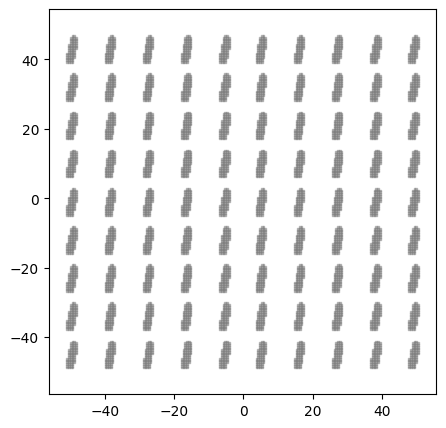

--------------------------------------------------
label: VentHole Chromosome_58: ['DoubleParabolicShape_58', 'GridStrictTransformation_58']
predict: (0.29202791849024834, 372.72697219999986, 456.34219499999995)
biased_fitness: 0.7079476196975175, fitness: 0.6843749790975174
shape parameter:
parameter_list: [ lower_coefficient: 1.0946475717435982, upper_coefficient: 2.1884812556067974, lower_y-intercept: 1.9675821949771573, upper_y-intercept_from_lower_y: 1.6309038749705196, lower_x_trans: -4.578346923296145, ]
pattern parameter:
parameter_list: [ dx: 6.501159298779399, dy: 8.801748244186948, ]


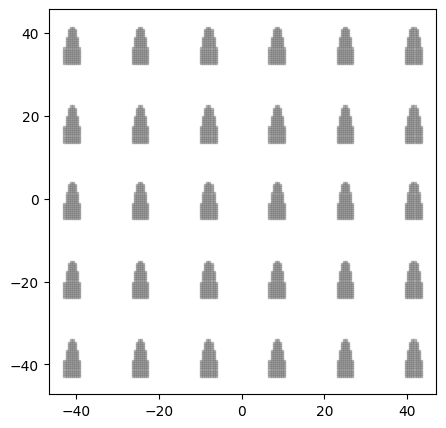

--------------------------------------------------
label: VentHole Chromosome_59: ['DoubleParabolicShape_59', 'CircularStrictTransformation_59']
predict: (0.2896438356063715, 373.6187894, 456.0617116000001)
biased_fitness: 0.7261066949362843, fitness: 0.7051591389362841
shape parameter:
parameter_list: [ lower_coefficient: 1.0008132286579308, upper_coefficient: 2.2254682403854007, lower_y-intercept: 3.3151293200206613, upper_y-intercept_from_lower_y: 1.9798546504178023, lower_x_trans: 1.169135701399286, ]
pattern parameter:
parameter_list: [ di: 12.749866373412669, dx: 6.663039104603925, phi: 0.3490658503988659, ]


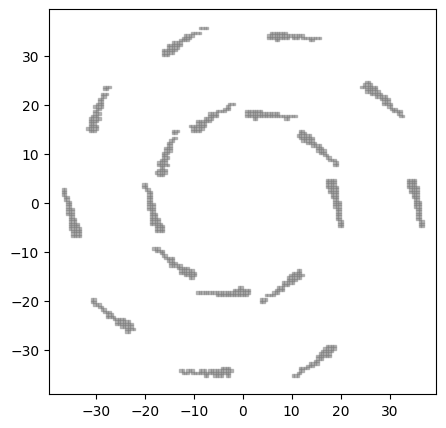

--------------------------------------------------
label: VentHole Chromosome_60: ['DoubleParabolicShape_60', 'CircularStrictTransformation_60']
predict: (0.29113197358250886, 373.4235825000001, 456.89364869999997)
biased_fitness: 0.7109278892749105, fitness: 0.6870941081749108
shape parameter:
parameter_list: [ lower_coefficient: 2.7734958280927886, upper_coefficient: 1.5776025857922524, lower_y-intercept: 1.7180833119235963, upper_y-intercept_from_lower_y: 1.9569472674071464, lower_x_trans: -3.1381196095137343, ]
pattern parameter:
parameter_list: [ di: 7.638083551047363, dx: 6.0034863594247945, phi: 0.6981317007977318, ]


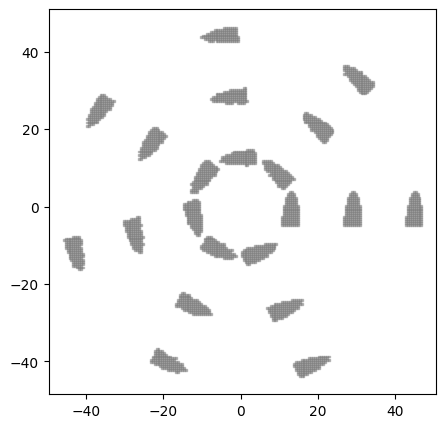

--------------------------------------------------
label: VentHole Chromosome_61: ['DoubleParabolicShape_61', 'GridStrictTransformation_61']
predict: (0.29018738390387244, 373.2020382, 456.8084595)
biased_fitness: 0.7220949745612755, fitness: 0.6980736724612754
shape parameter:
parameter_list: [ lower_coefficient: 1.5958134655046285, upper_coefficient: 2.9241072610938317, lower_y-intercept: 2.499334555282929, upper_y-intercept_from_lower_y: 1.6480763648666996, lower_x_trans: 1.8500999562098102, ]
pattern parameter:
parameter_list: [ dx: 9.329345879303963, dy: 8.116431707694488, ]


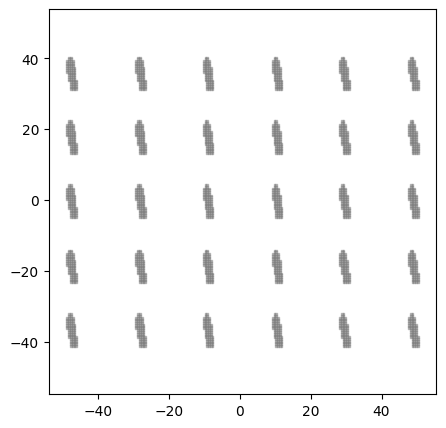

--------------------------------------------------
label: VentHole Chromosome_62: ['DoubleParabolicShape_62', 'CircularStrictTransformation_62']
predict: (0.2919480291431691, 373.25002220000016, 460.5473253)
biased_fitness: 0.6966749025683078, fitness: 0.6615329710683081
shape parameter:
parameter_list: [ lower_coefficient: 1.3908482899777335, upper_coefficient: 1.9928783168355535, lower_y-intercept: 3.339161936824069, upper_y-intercept_from_lower_y: 1.446352975962625, lower_x_trans: -3.7480771636680768, ]
pattern parameter:
parameter_list: [ di: 10.239361776558926, dx: 5.739648390470632, phi: 0.4487989505128276, ]


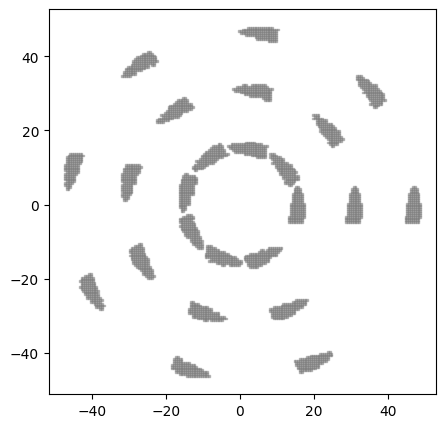

--------------------------------------------------
label: VentHole Chromosome_63: ['DoubleParabolicShape_63', 'CircularStrictTransformation_63']
predict: (0.2937798666757221, 373.3217781999998, 458.62382830000007)
biased_fitness: 0.6817012292427801, fitness: 0.6524733007427795
shape parameter:
parameter_list: [ lower_coefficient: 2.0469954140875615, upper_coefficient: 1.8914826159086544, lower_y-intercept: 3.310360847310934, upper_y-intercept_from_lower_y: 1.7970305349665825, lower_x_trans: -4.365170414861829, ]
pattern parameter:
parameter_list: [ di: 10.767691162408463, dx: 0.9830434123541782, phi: 0.36959913571644626, ]


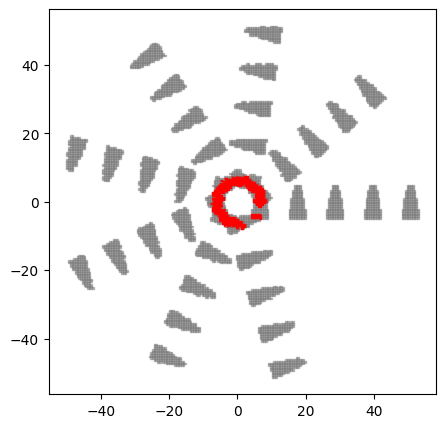

--------------------------------------------------
label: VentHole Chromosome_64: ['DoubleParabolicShape_64', 'GridStrictTransformation_64']
predict: (0.29120849429502726, 373.55711980000007, 456.0029785999999)
biased_fitness: 0.711009261249727, fitness: 0.6901145650497275
shape parameter:
parameter_list: [ lower_coefficient: 2.9763634091934366, upper_coefficient: 2.207764315482174, lower_y-intercept: 1.4146471378686214, upper_y-intercept_from_lower_y: 1.5448287311181972, lower_x_trans: 2.135870706528232, ]
pattern parameter:
parameter_list: [ dx: 3.954813436466442, dy: 7.618417378436777, ]


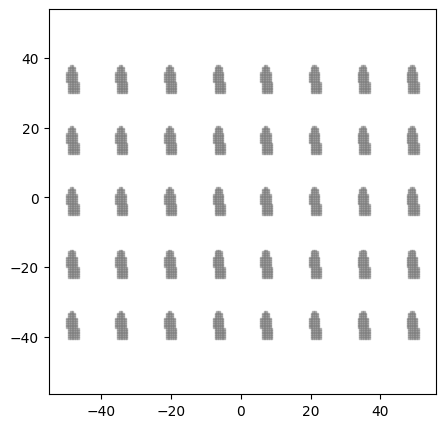

--------------------------------------------------
label: VentHole Chromosome_65: ['DoubleParabolicShape_65', 'CircularStrictTransformation_65']
predict: (0.2932945508890925, 373.5579388999997, 455.75933829999997)
biased_fitness: 0.6906302422090767, fitness: 0.6704681051090763
shape parameter:
parameter_list: [ lower_coefficient: 1.6385336714294945, upper_coefficient: 1.7243975729759267, lower_y-intercept: 3.179234073717016, upper_y-intercept_from_lower_y: 1.2834484055835613, lower_x_trans: 3.9018724016841695, ]
pattern parameter:
parameter_list: [ di: 11.966953400712066, dx: 1.4336897611804535, phi: 0.5235987755982988, ]


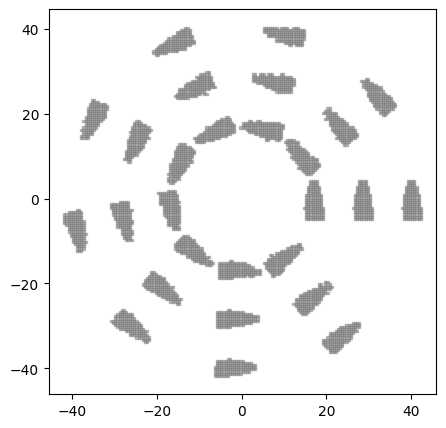

--------------------------------------------------
label: VentHole Chromosome_66: ['DoubleParabolicShape_66', 'CircularStrictTransformation_66']
predict: (0.28919188268891594, 373.21106570000006, 456.48698729999995)
biased_fitness: 0.7326297386108401, fitness: 0.7095909081108405
shape parameter:
parameter_list: [ lower_coefficient: 1.036914153293198, upper_coefficient: 1.76235084971523, lower_y-intercept: 2.1433215522184303, upper_y-intercept_from_lower_y: 1.894404543765529, lower_x_trans: 1.376475899582985, ]
pattern parameter:
parameter_list: [ di: 11.962025698868317, dx: 9.848036691417922, phi: 0.39269908169872414, ]


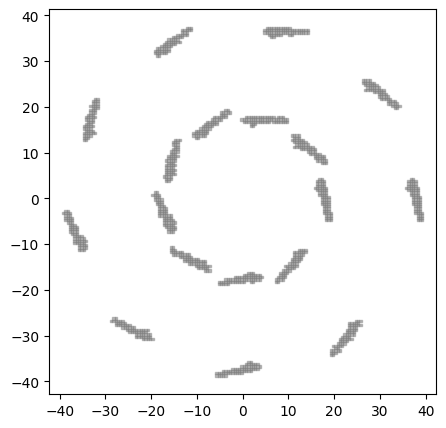

--------------------------------------------------
label: VentHole Chromosome_67: ['DoubleParabolicShape_67', 'CircularStrictTransformation_67']
predict: (0.29195146015775375, 373.8033928, 460.86834119999986)
biased_fitness: 0.6921249664224627, fitness: 0.6571267284224631
shape parameter:
parameter_list: [ lower_coefficient: 2.960395271046135, upper_coefficient: 1.2471907696960571, lower_y-intercept: 2.3387050906444595, upper_y-intercept_from_lower_y: 1.0003297987854651, lower_x_trans: -2.1118301640026282, ]
pattern parameter:
parameter_list: [ di: 10.345763325120952, dx: 5.1171570640973725, phi: 0.5235987755982988, ]


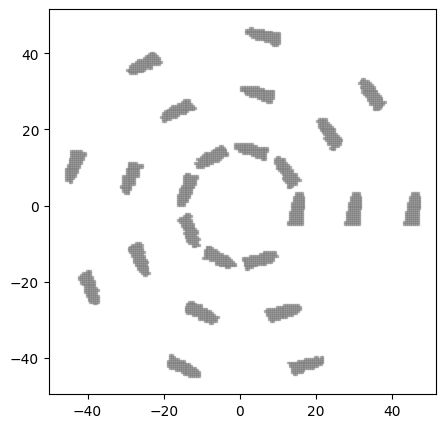

--------------------------------------------------
label: VentHole Chromosome_68: ['DoubleParabolicShape_68', 'GridStrictTransformation_68']
predict: (0.29158204998719084, 372.9744910000003, 456.2746132000001)
biased_fitness: 0.7108088367280894, fitness: 0.6879339791280896
shape parameter:
parameter_list: [ lower_coefficient: 1.269072496411954, upper_coefficient: 2.9713647443190796, lower_y-intercept: 3.3079059136690936, upper_y-intercept_from_lower_y: 1.7797830653137785, lower_x_trans: 4.841849270614546, ]
pattern parameter:
parameter_list: [ dx: 7.323221819304481, dy: 4.951231363464108, ]


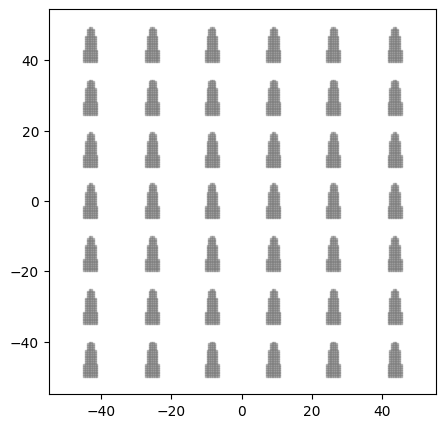

--------------------------------------------------
label: VentHole Chromosome_69: ['DoubleParabolicShape_69', 'CircularStrictTransformation_69']
predict: (0.2936053245341286, 373.38287719999994, 456.0093276)
biased_fitness: 0.6882479590587145, fitness: 0.6669857306587144
shape parameter:
parameter_list: [ lower_coefficient: 2.02688772346633, upper_coefficient: 2.1541816362900903, lower_y-intercept: 2.1868700034418023, upper_y-intercept_from_lower_y: 1.8761549176525998, lower_x_trans: -4.396437980001568, ]
pattern parameter:
parameter_list: [ di: 11.64827687640672, dx: 1.3889519022748538, phi: 0.3306939635357677, ]


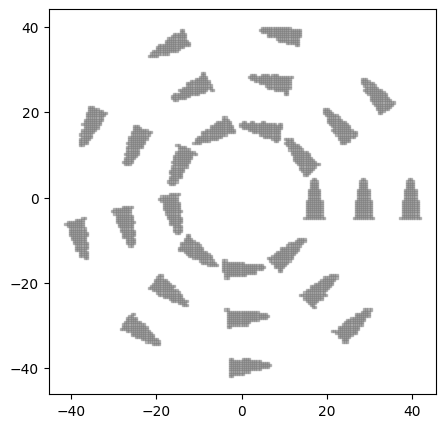

--------------------------------------------------
label: VentHole Chromosome_70: ['DoubleParabolicShape_70', 'CircularStrictTransformation_70']
predict: (0.2920170071299282, 372.65716399999997, 454.2391127)
biased_fitness: 0.7127515553007183, fitness: 0.6953485452007182
shape parameter:
parameter_list: [ lower_coefficient: 2.454629714113692, upper_coefficient: 1.8093867991788273, lower_y-intercept: 1.2008098275070056, upper_y-intercept_from_lower_y: 1.1690844345154496, lower_x_trans: 2.3891612427946285, ]
pattern parameter:
parameter_list: [ di: 12.758650230093654, dx: 0.6264571487583643, phi: 0.6283185307179586, ]


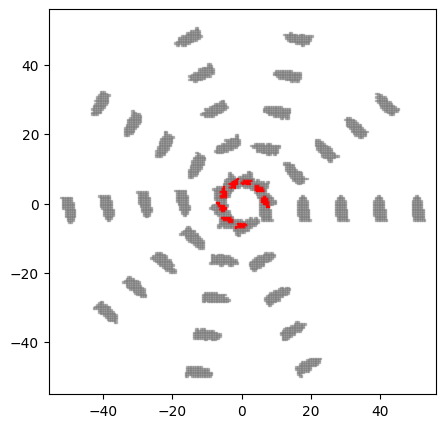

--------------------------------------------------
label: VentHole Chromosome_71: ['DoubleParabolicShape_71', 'CircularStrictTransformation_71']
predict: (0.2897742890613886, 373.0112593, 458.1230847999998)
biased_fitness: 0.7249321246861143, fitness: 0.6965853888861151
shape parameter:
parameter_list: [ lower_coefficient: 2.3788057608142106, upper_coefficient: 2.304321333393232, lower_y-intercept: 1.5953212408541302, upper_y-intercept_from_lower_y: 1.2337203112835313, lower_x_trans: 1.0274598291548465, ]
pattern parameter:
parameter_list: [ di: 8.424620532544589, dx: 3.273559860407137, phi: 0.5711986642890533, ]


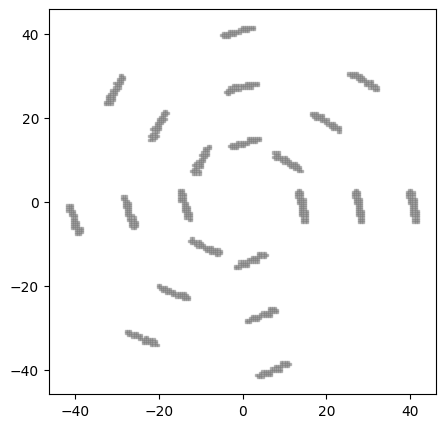

--------------------------------------------------
label: VentHole Chromosome_72: ['DoubleParabolicShape_72', 'CornerTransformation_72']
predict: (0.2899859801446376, 373.38196359999995, 457.0862540999998)
biased_fitness: 0.7222939451536246, fitness: 0.697799110053625
shape parameter:
parameter_list: [ lower_coefficient: 1.6950779268554756, upper_coefficient: 2.417515924785567, lower_y-intercept: 3.0006259708536387, upper_y-intercept_from_lower_y: 1.1911025886419366, lower_x_trans: 2.685048684392023, ]
pattern parameter:
parameter_list: [ di: 10.40121448322054, dx: 9.298941160296668, phi: 0.7288985050107305, rot_count: 4.0, ]


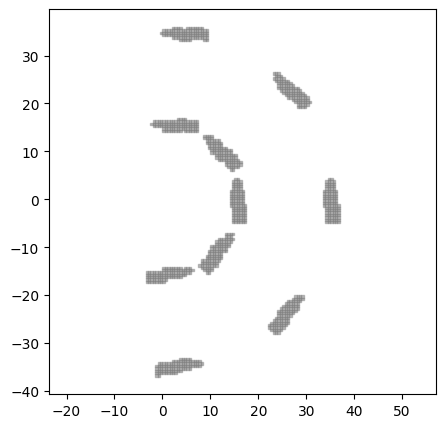

--------------------------------------------------
label: VentHole Chromosome_73: ['DoubleParabolicShape_73', 'CornerTransformation_73']
predict: (0.2890409066583559, 373.0726064, 457.45415899999983)
biased_fitness: 0.7331743706164413, fitness: 0.7069571064164417
shape parameter:
parameter_list: [ lower_coefficient: 1.2225452991496872, upper_coefficient: 1.0246184090494612, lower_y-intercept: 1.1731448288486308, upper_y-intercept_from_lower_y: 1.4929728869670826, lower_x_trans: -0.7803123971674166, ]
pattern parameter:
parameter_list: [ di: 11.931679435530416, dx: 7.6001279932970185, phi: 0.5107319749042871, rot_count: 5.0, ]


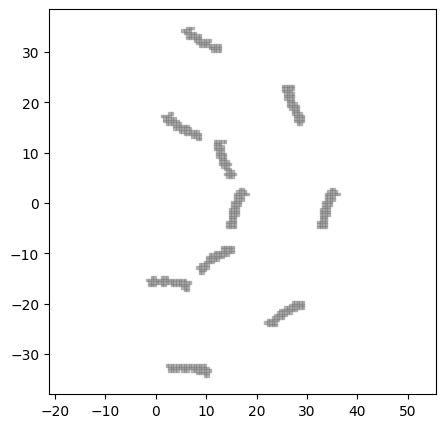

--------------------------------------------------
label: VentHole Chromosome_74: ['DoubleParabolicShape_74', 'CornerTransformation_74']
predict: (0.2890859107986814, 373.11892669999975, 458.7487121999997)
biased_fitness: 0.7298109807131882, fitness: 0.6998026975131886
shape parameter:
parameter_list: [ lower_coefficient: 2.0051619714985947, upper_coefficient: 1.2575042471395905, lower_y-intercept: 1.6352688490492948, upper_y-intercept_from_lower_y: 1.1347769463037691, lower_x_trans: 4.9856442067150315, ]
pattern parameter:
parameter_list: [ di: 9.536421432716342, dx: 8.91933835644984, phi: 0.6579772986106067, rot_count: 2.0, ]


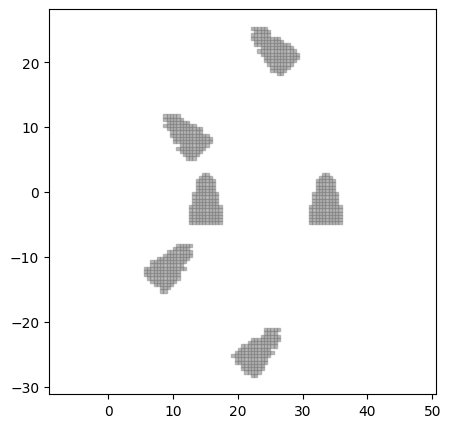

--------------------------------------------------
label: VentHole Chromosome_75: ['DoubleParabolicShape_75', 'CircularStrictTransformation_75']
predict: (0.29115970309453365, 373.3145977000001, 454.00211120000006)
biased_fitness: 0.7171965627546626, fitness: 0.7018194245546626
shape parameter:
parameter_list: [ lower_coefficient: 2.45147347675776, upper_coefficient: 2.0680937216630673, lower_y-intercept: 3.249854974748576, upper_y-intercept_from_lower_y: 1.2885690149265967, lower_x_trans: 3.7971164963633814, ]
pattern parameter:
parameter_list: [ di: 13.691437011253022, dx: 9.539916160619182, phi: 0.5235987755982988, ]


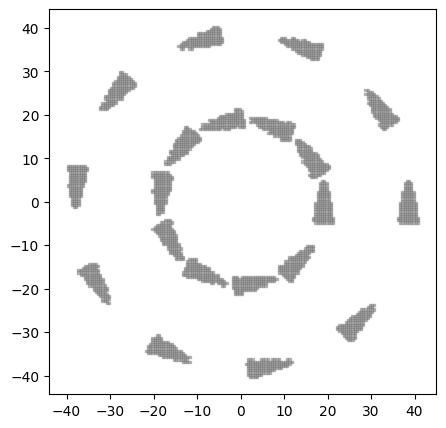

--------------------------------------------------
label: VentHole Chromosome_76: ['DoubleParabolicShape_76', 'GridStrictTransformation_76']
predict: (0.2935050332711686, 373.94937209999995, 460.6123524)
biased_fitness: 0.6760793577883141, fitness: 0.6421410447883139
shape parameter:
parameter_list: [ lower_coefficient: 2.4829775018494122, upper_coefficient: 2.7035347009087642, lower_y-intercept: 3.157450435461074, upper_y-intercept_from_lower_y: 1.52091646685632, lower_x_trans: 4.346981016849272, ]
pattern parameter:
parameter_list: [ dx: 2.8711137274075105, dy: 1.9366572617564217, ]


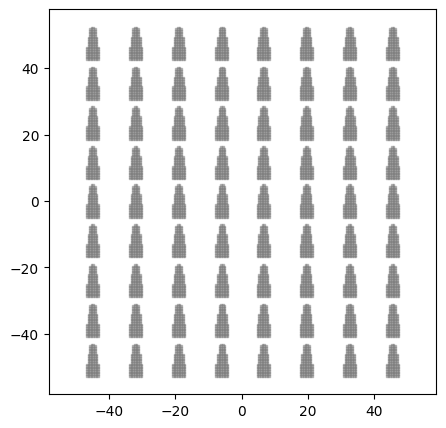

--------------------------------------------------
label: VentHole Chromosome_77: ['DoubleParabolicShape_77', 'CornerTransformation_77']
predict: (0.29013017935805996, 373.1376663999998, 458.5786541)
biased_fitness: 0.7195772334194019, fitness: 0.6901166039194014
shape parameter:
parameter_list: [ lower_coefficient: 2.429018950437526, upper_coefficient: 2.0092235196230934, lower_y-intercept: 2.646930799849428, upper_y-intercept_from_lower_y: 1.6456284204243978, lower_x_trans: 3.2687474716489966, ]
pattern parameter:
parameter_list: [ di: 9.232553276512835, dx: 6.774375240098439, phi: 0.4761312534426717, rot_count: 3.0, ]


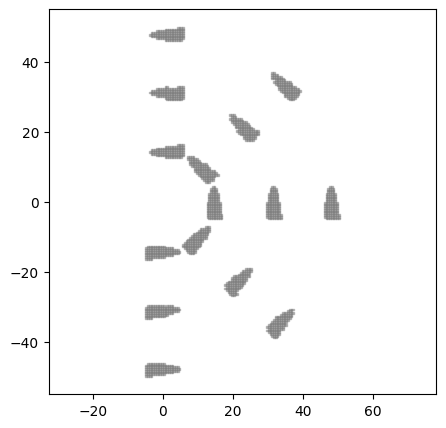

--------------------------------------------------
label: VentHole Chromosome_78: ['DoubleParabolicShape_78', 'CornerTransformation_78']
predict: (0.29041807894045, 373.61215030000005, 458.2679674999999)
biased_fitness: 0.7139982234954995, fitness: 0.6864186215955
shape parameter:
parameter_list: [ lower_coefficient: 2.2623165289351372, upper_coefficient: 1.5480556953996978, lower_y-intercept: 1.2143317425395548, upper_y-intercept_from_lower_y: 1.0188872781507665, lower_x_trans: 3.355905433322979, ]
pattern parameter:
parameter_list: [ di: 14.302199891225953, dx: 3.006491790725639, phi: 0.7313252209041192, rot_count: 3.0, ]


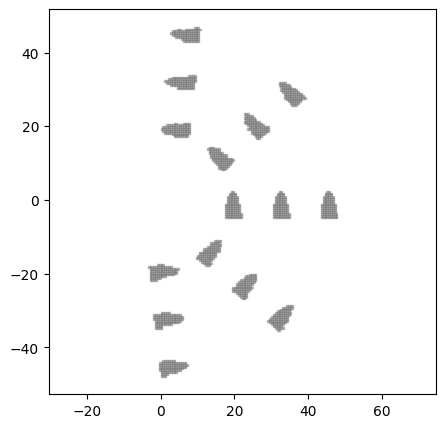

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_79', 'GridStrictTransformation_79']
predict: (0.2938690687871781, 372.8403199999998, 456.12747420000017)
biased_fitness: 0.6891721237282198, fitness: 0.6664703411282189
shape parameter:
parameter_list: [ lower_coefficient: 1.933312404048296, upper_coefficient: 1.2862593314698194, lower_y-intercept: 3.0892855940975616, upper_y-intercept_from_lower_y: 1.1941596065040796, lower_x_trans: 4.415942544350004, ]
pattern parameter:
parameter_list: [ dx: 1.4208433135679883, dy: 3.875777083635751, ]


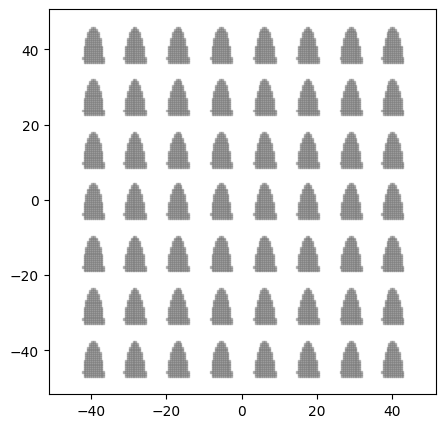

--------------------------------------------------
label: VentHole Chromosome_80: ['DoubleParabolicShape_80', 'CircularStrictTransformation_80']
predict: (0.29076242871990754, 373.2126250999999, 458.33443209999996)
biased_fitness: 0.7132184729009252, fitness: 0.6846404268009252
shape parameter:
parameter_list: [ lower_coefficient: 2.3962514310787237, upper_coefficient: 2.6603799596559874, lower_y-intercept: 1.5944267158290706, upper_y-intercept_from_lower_y: 1.6368195532468288, lower_x_trans: 2.002833524865596, ]
pattern parameter:
parameter_list: [ di: 12.925406092105785, dx: 2.5969687202961858, phi: 0.6981317007977318, ]


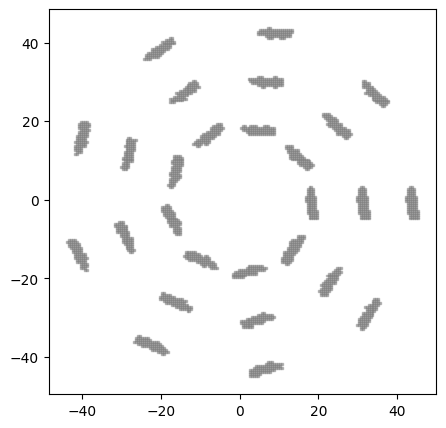

--------------------------------------------------
label: VentHole Chromosome_81: ['DoubleParabolicShape_81', 'GridStrictTransformation_81']
predict: (0.2894421099658433, 373.41854820000003, 456.53034619999977)
biased_fitness: 0.7285883705415672, fitness: 0.705834428341568
shape parameter:
parameter_list: [ lower_coefficient: 1.6270852635881248, upper_coefficient: 1.355837855442179, lower_y-intercept: 1.0842211535689978, upper_y-intercept_from_lower_y: 1.4156457566984262, lower_x_trans: 1.0172636465342064, ]
pattern parameter:
parameter_list: [ dx: 7.063606247388751, dy: 7.302750031261568, ]


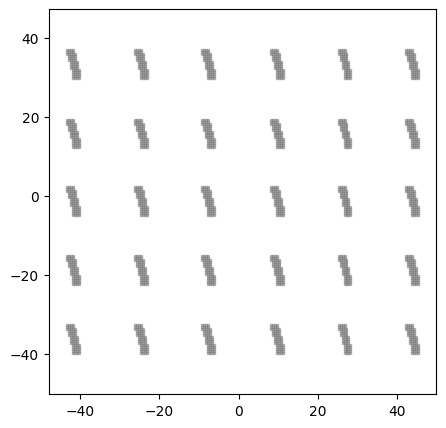

--------------------------------------------------
label: VentHole Chromosome_82: ['DoubleParabolicShape_82', 'GridStrictTransformation_82']
predict: (0.2926524147072922, 373.6640799, 457.2502526999999)
biased_fitness: 0.6933267882270782, fitness: 0.6689041899270783
shape parameter:
parameter_list: [ lower_coefficient: 2.430713232650133, upper_coefficient: 2.1338260947460777, lower_y-intercept: 1.772591794818076, upper_y-intercept_from_lower_y: 1.2752757255050513, lower_x_trans: 3.78071863896694, ]
pattern parameter:
parameter_list: [ dx: 2.600686579890244, dy: 8.976426337660884, ]


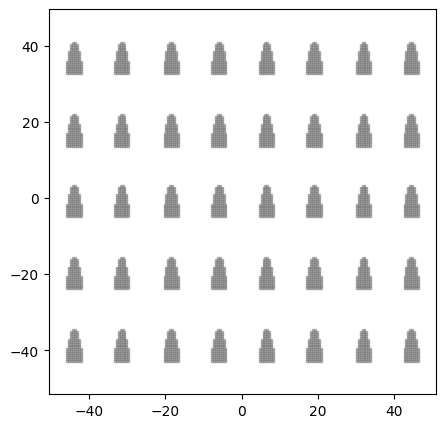

--------------------------------------------------
label: VentHole Chromosome_83: ['DoubleParabolicShape_83', 'GridStrictTransformation_83']
predict: (0.28939114394528875, 372.6243925000001, 456.9995348000001)
biased_fitness: 0.7337187434471112, fitness: 0.7079689240471112
shape parameter:
parameter_list: [ lower_coefficient: 1.6510362735001192, upper_coefficient: 2.8614616802009882, lower_y-intercept: 3.1406800725495554, upper_y-intercept_from_lower_y: 1.5730036872438244, lower_x_trans: -4.317800714927992, ]
pattern parameter:
parameter_list: [ dx: 5.206877384727019, dy: 6.530537040293159, ]


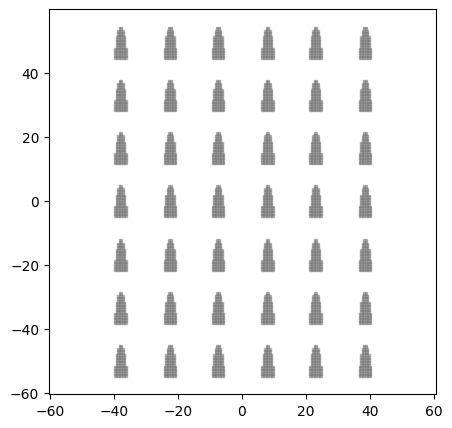

--------------------------------------------------
label: VentHole Chromosome_84: ['DoubleParabolicShape_84', 'CornerTransformation_84']
predict: (0.2888263494275485, 373.26445799999993, 455.6746866999998)
biased_fitness: 0.7375359263245158, fitness: 0.7170407822245163
shape parameter:
parameter_list: [ lower_coefficient: 2.819239643069367, upper_coefficient: 1.746709780555685, lower_y-intercept: 2.924935728625429, upper_y-intercept_from_lower_y: 1.34423286194765, lower_x_trans: -3.258747640032724, ]
pattern parameter:
parameter_list: [ di: 13.633213710601346, dx: 7.6595549901157565, phi: 0.5418334181102673, rot_count: 2.0, ]


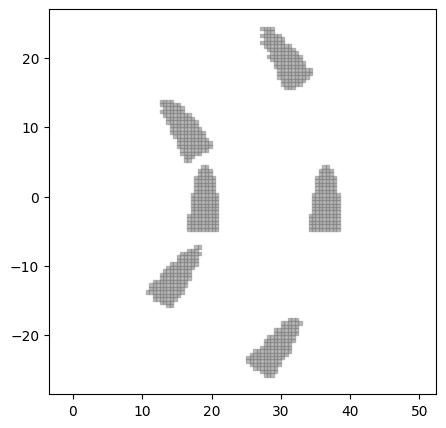

--------------------------------------------------
label: VentHole Chromosome_85: ['DoubleParabolicShape_85', 'GridStrictTransformation_85']
predict: (0.2909471821121197, 373.5449865, 455.8614451999998)
biased_fitness: 0.7139903829788036, fitness: 0.6934960203788041
shape parameter:
parameter_list: [ lower_coefficient: 1.7798767803690787, upper_coefficient: 1.2384345915446484, lower_y-intercept: 1.7650667456411147, upper_y-intercept_from_lower_y: 1.6619000239494226, lower_x_trans: -0.7687456010699698, ]
pattern parameter:
parameter_list: [ dx: 3.7111968153003603, dy: 8.362738263038887, ]


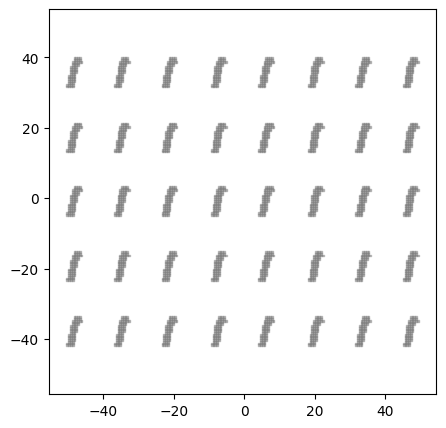

--------------------------------------------------
label: VentHole Chromosome_86: ['DoubleParabolicShape_86', 'CornerTransformation_86']
predict: (0.28834755974969073, 373.44099080000007, 457.2853520999999)
biased_fitness: 0.7378667627030924, fitness: 0.7128926880030928
shape parameter:
parameter_list: [ lower_coefficient: 2.6485406574391126, upper_coefficient: 2.8561913713924305, lower_y-intercept: 1.1359545086125005, upper_y-intercept_from_lower_y: 1.4844122783607505, lower_x_trans: -1.6557884337698847, ]
pattern parameter:
parameter_list: [ di: 13.752147179818653, dx: 9.73637824915887, phi: 0.705774681658845, rot_count: 2.0, ]


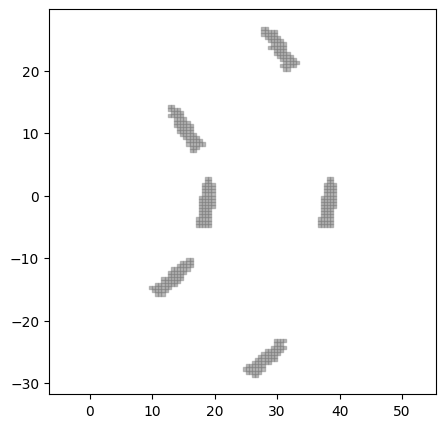

--------------------------------------------------
label: VentHole Chromosome_87: ['DoubleParabolicShape_87', 'CornerTransformation_87']
predict: (0.28934314406533246, 372.81210249999987, 457.26800679999985)
biased_fitness: 0.7323478282466764, fitness: 0.7061680128466766
shape parameter:
parameter_list: [ lower_coefficient: 2.55918290942558, upper_coefficient: 2.2535947877404956, lower_y-intercept: 2.4364913316522574, upper_y-intercept_from_lower_y: 1.1733349675097273, lower_x_trans: -4.442713175924343, ]
pattern parameter:
parameter_list: [ di: 8.087277587289641, dx: 9.664615472556076, phi: 0.568221147795598, rot_count: 3.0, ]


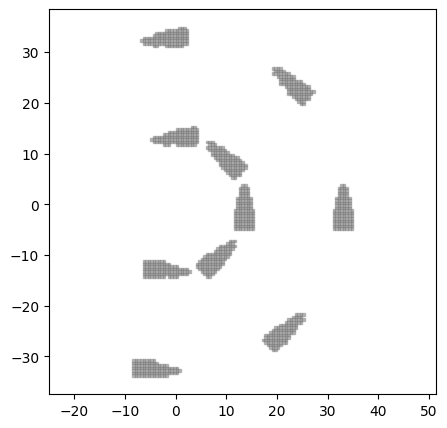

--------------------------------------------------
label: VentHole Chromosome_88: ['DoubleParabolicShape_88', 'CornerTransformation_88']
predict: (0.289420481205231, 373.3769478, 457.2164959999999)
biased_fitness: 0.72772356134769, fitness: 0.7028279689476904
shape parameter:
parameter_list: [ lower_coefficient: 1.6047222244490957, upper_coefficient: 1.2255928111965124, lower_y-intercept: 3.0972839193430524, upper_y-intercept_from_lower_y: 1.3492330379927853, lower_x_trans: -2.2221703343428234, ]
pattern parameter:
parameter_list: [ di: 14.662475203308974, dx: 5.123725441175859, phi: 0.5218962197293909, rot_count: 2.0, ]


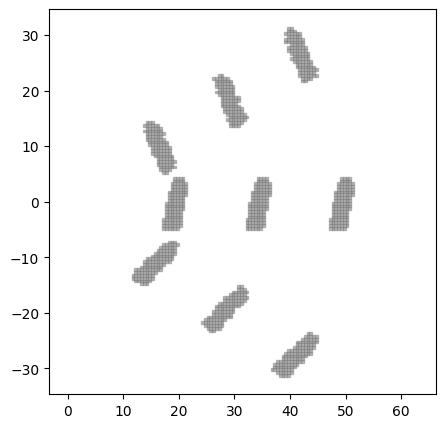

--------------------------------------------------
label: VentHole Chromosome_89: ['DoubleParabolicShape_89', 'GridStrictTransformation_89']
predict: (0.2901902205323901, 373.1630339999998, 456.59508309999995)
biased_fitness: 0.7227663904761006, fitness: 0.6993072091761003
shape parameter:
parameter_list: [ lower_coefficient: 1.9026121514227619, upper_coefficient: 2.496006834519572, lower_y-intercept: 3.2277524857996207, upper_y-intercept_from_lower_y: 1.463530926414382, lower_x_trans: -1.2381082116550424, ]
pattern parameter:
parameter_list: [ dx: 9.745821852951108, dy: 7.747295870778369, ]


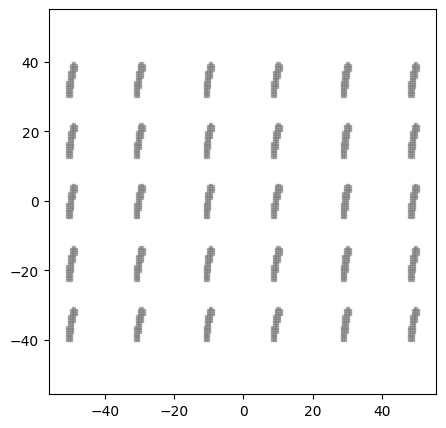

--------------------------------------------------
label: VentHole Chromosome_90: ['DoubleParabolicShape_90', 'CornerTransformation_90']
predict: (0.29071975882878, 373.98862769999994, 457.43130429999997)
biased_fitness: 0.7100194092122005, fitness: 0.6857027517122005
shape parameter:
parameter_list: [ lower_coefficient: 2.594617709321869, upper_coefficient: 2.069391619970622, lower_y-intercept: 3.568750779546771, upper_y-intercept_from_lower_y: 1.7921037161714213, lower_x_trans: 2.2478793944097264, ]
pattern parameter:
parameter_list: [ di: 10.104649534421034, dx: 2.71616678012642, phi: 0.626634665831987, rot_count: 6.0, ]


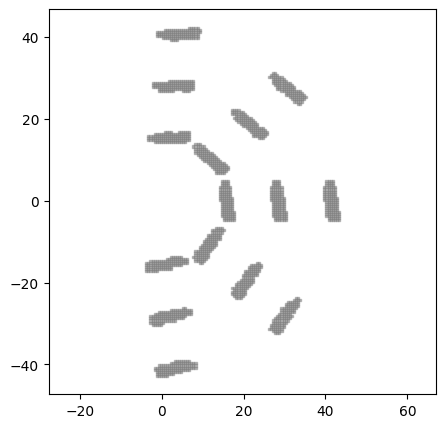

--------------------------------------------------
label: VentHole Chromosome_91: ['DoubleParabolicShape_91', 'GridStrictTransformation_91']
predict: (0.2920912925526684, 372.84602840000014, 458.74145209999983)
biased_fitness: 0.701681971473315, fitness: 0.6711496719733159
shape parameter:
parameter_list: [ lower_coefficient: 1.250616324687491, upper_coefficient: 2.228224696337425, lower_y-intercept: 3.608536629196182, upper_y-intercept_from_lower_y: 1.9273768122190935, lower_x_trans: 1.7588346010564742, ]
pattern parameter:
parameter_list: [ dx: 5.642229244183476, dy: 1.9840470076300871, ]


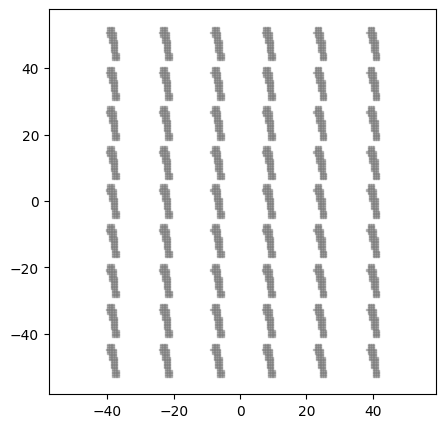

--------------------------------------------------
label: VentHole Chromosome_92: ['DoubleParabolicShape_92', 'CornerTransformation_92']
predict: (0.2890152119996541, 373.45039789999987, 457.2813887)
biased_fitness: 0.7311323173034601, fitness: 0.7061889470034599
shape parameter:
parameter_list: [ lower_coefficient: 2.035042559711904, upper_coefficient: 1.7135729950021923, lower_y-intercept: 1.3771192825853884, upper_y-intercept_from_lower_y: 1.3997365129937316, lower_x_trans: 1.5880612438977213, ]
pattern parameter:
parameter_list: [ di: 11.387513538722377, dx: 4.426470490089837, phi: 0.6194260934763353, rot_count: 2.0, ]


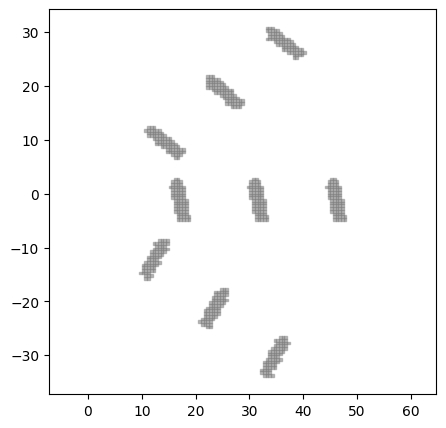

--------------------------------------------------
label: VentHole Chromosome_93: ['DoubleParabolicShape_93', 'CornerTransformation_93']
predict: (0.2904182343068791, 373.4279511999999, 459.4957949)
biased_fitness: 0.71283040873121, fitness: 0.6811989264312096
shape parameter:
parameter_list: [ lower_coefficient: 2.5063683792430176, upper_coefficient: 1.9042483630704807, lower_y-intercept: 3.1022002890343248, upper_y-intercept_from_lower_y: 1.5584530590826406, lower_x_trans: 2.326239436506209, ]
pattern parameter:
parameter_list: [ di: 10.199219486793504, dx: 3.6133959307679047, phi: 0.36394755823096714, rot_count: 4.0, ]


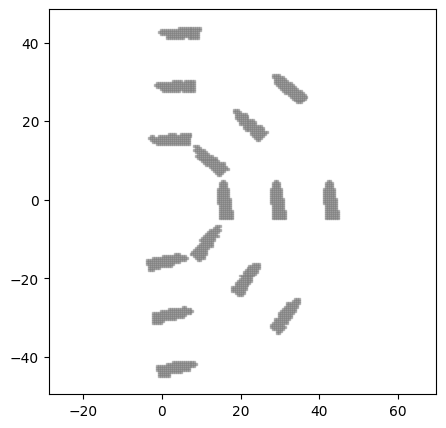

--------------------------------------------------
label: VentHole Chromosome_94: ['DoubleParabolicShape_94', 'CornerTransformation_94']
predict: (0.2903352954591303, 373.79928499999994, 457.2528076000001)
biased_fitness: 0.7155464352086972, fitness: 0.6913865824086969
shape parameter:
parameter_list: [ lower_coefficient: 1.0587840822194992, upper_coefficient: 1.3366390219230408, lower_y-intercept: 1.0070427092708265, upper_y-intercept_from_lower_y: 1.6934915210458223, lower_x_trans: 3.1612890790243746, ]
pattern parameter:
parameter_list: [ di: 12.110080073159384, dx: 2.185386186964858, phi: 0.7405498281706662, rot_count: 4.0, ]


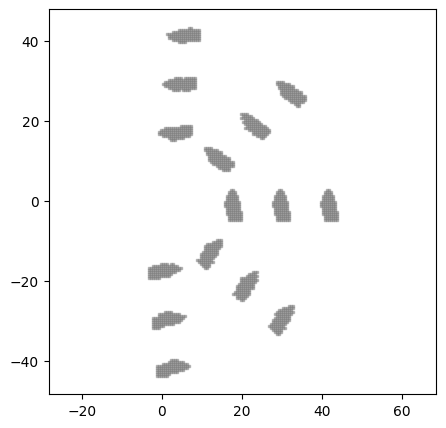

--------------------------------------------------
label: VentHole Chromosome_95: ['DoubleParabolicShape_95', 'CornerTransformation_95']
predict: (0.2907882088230025, 373.3167841, 459.5327470999999)
biased_fitness: 0.7098349288699752, fitness: 0.6778702557699756
shape parameter:
parameter_list: [ lower_coefficient: 2.383288786007835, upper_coefficient: 2.536670651490322, lower_y-intercept: 3.0809262444112826, upper_y-intercept_from_lower_y: 1.0159227194864648, lower_x_trans: 3.5993637777706375, ]
pattern parameter:
parameter_list: [ di: 12.438314915663662, dx: 1.7342310635437213, phi: 0.4644751932572463, rot_count: 6.0, ]


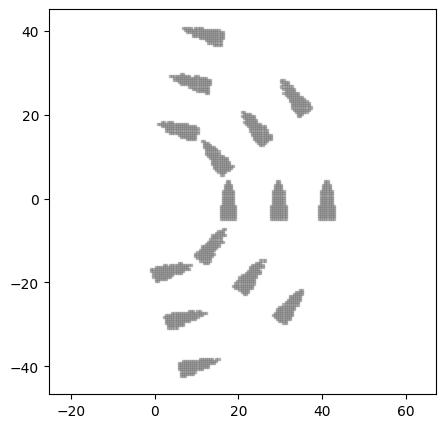

--------------------------------------------------
label: VentHole Chromosome_96: ['DoubleParabolicShape_96', 'CircularStrictTransformation_96']
predict: (0.29244913290810115, 373.05415220000003, 460.68614340000005)
biased_fitness: 0.6927573187189882, fitness: 0.656807192918988
shape parameter:
parameter_list: [ lower_coefficient: 1.189560042833349, upper_coefficient: 1.4388982518312774, lower_y-intercept: 3.8654737099061807, upper_y-intercept_from_lower_y: 1.5892660368104294, lower_x_trans: -3.699244696541747, ]
pattern parameter:
parameter_list: [ di: 10.27086423880445, dx: 5.669066264303276, phi: 0.5235987755982988, ]


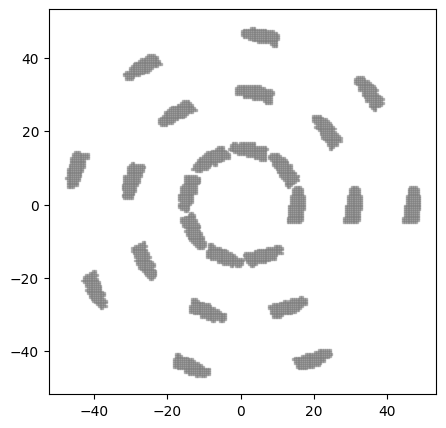

--------------------------------------------------
label: VentHole Chromosome_97: ['DoubleParabolicShape_97', 'CornerTransformation_97']
predict: (0.28865149365620524, 373.3406413, 454.6766433999998)
biased_fitness: 0.7407472875379477, fitness: 0.7233986399379483
shape parameter:
parameter_list: [ lower_coefficient: 1.4619226312158051, upper_coefficient: 2.833358412464752, lower_y-intercept: 3.5409706162953656, upper_y-intercept_from_lower_y: 1.0250683043151985, lower_x_trans: 1.7698662592954388, ]
pattern parameter:
parameter_list: [ di: 13.660492367960806, dx: 6.596383429517143, phi: 0.5497885000428271, rot_count: 6.0, ]


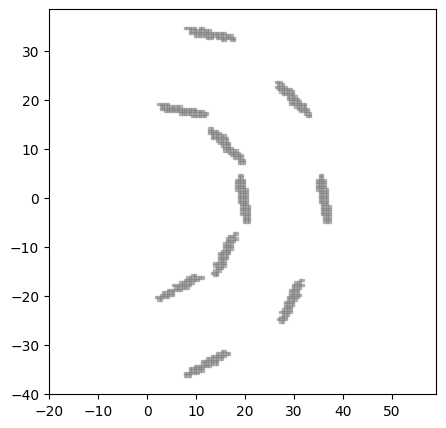

--------------------------------------------------
label: VentHole Chromosome_98: ['DoubleParabolicShape_98', 'CircularStrictTransformation_98']
predict: (0.29235080385535195, 373.2812237, 464.96654429999995)
biased_fitness: 0.6835903069464804, fitness: 0.6352531214464806
shape parameter:
parameter_list: [ lower_coefficient: 1.4731347370153836, upper_coefficient: 1.176977717792764, lower_y-intercept: 3.2301433826498798, upper_y-intercept_from_lower_y: 1.821109559701358, lower_x_trans: -4.999899767072838, ]
pattern parameter:
parameter_list: [ di: 10.494323027679856, dx: 6.295872122209576, phi: 0.6981317007977318, ]


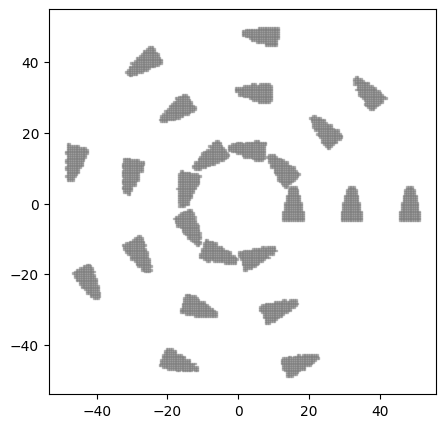

--------------------------------------------------
label: VentHole Chromosome_99: ['DoubleParabolicShape_99', 'GridStrictTransformation_99']
predict: (0.2908290491586536, 373.2011297000001, 455.8398841)
biased_fitness: 0.7176218323134633, fitness: 0.6965044394134635
shape parameter:
parameter_list: [ lower_coefficient: 1.1872970611074969, upper_coefficient: 1.7484962571252587, lower_y-intercept: 1.6061133503884744, upper_y-intercept_from_lower_y: 1.8040751091968195, lower_x_trans: 3.0271382929486386, ]
pattern parameter:
parameter_list: [ dx: 9.61769205989946, dy: 8.337754132354647, ]


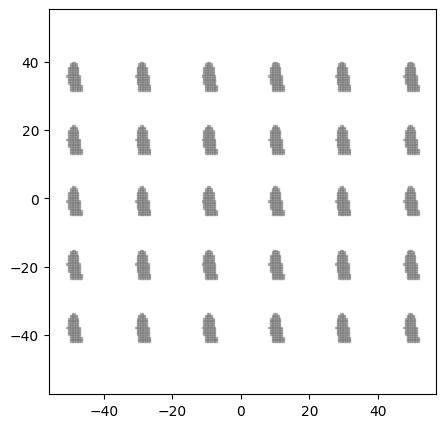

--------------------------------------------------
label: VentHole Chromosome_100: ['DoubleParabolicShape_100', 'CircularStrictTransformation_100']
predict: (0.2906423349210545, 373.62805019999985, 460.4064432999998)
biased_fitness: 0.7073674127894561, fitness: 0.6734041832894565
shape parameter:
parameter_list: [ lower_coefficient: 2.0393788459168425, upper_coefficient: 1.1779866133411303, lower_y-intercept: 2.3796859579065703, upper_y-intercept_from_lower_y: 1.0719898186666998, lower_x_trans: 2.5567519231534055, ]
pattern parameter:
parameter_list: [ di: 14.702416373839789, dx: 8.437238179347808, phi: 0.6981317007977318, ]


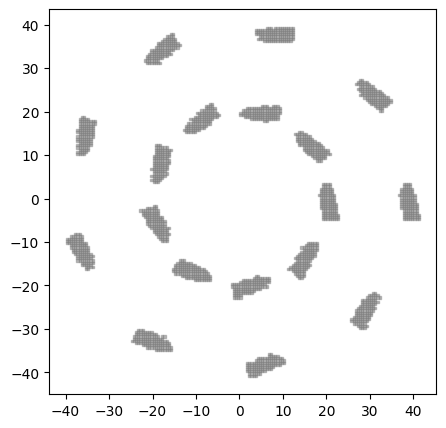

--------------------------------------------------
label: VentHole Chromosome_101: ['DoubleParabolicShape_101', 'CircularStrictTransformation_101']
predict: (0.29196205796484254, 373.4648707000001, 456.6583506999998)
biased_fitness: 0.7028086240515741, fitness: 0.6797633133515749
shape parameter:
parameter_list: [ lower_coefficient: 1.8296790379128878, upper_coefficient: 1.1967349812329702, lower_y-intercept: 1.0247977113840694, upper_y-intercept_from_lower_y: 1.87260312818572, lower_x_trans: -3.52780643560044, ]
pattern parameter:
parameter_list: [ di: 14.025639030208817, dx: 5.241787746977368, phi: 0.6283185307179586, ]


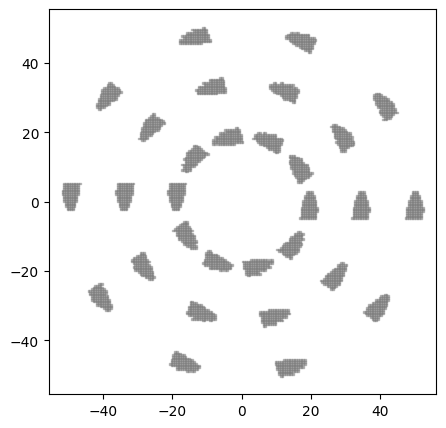

--------------------------------------------------
label: VentHole Chromosome_102: ['DoubleParabolicShape_102', 'CornerTransformation_102']
predict: (0.2900816365014167, 372.880467, 459.46714269999995)
biased_fitness: 0.7200860805858327, fitness: 0.6874455864858329
shape parameter:
parameter_list: [ lower_coefficient: 2.4940909108819422, upper_coefficient: 2.781604691843093, lower_y-intercept: 3.2917701269066404, upper_y-intercept_from_lower_y: 1.2296200331479188, lower_x_trans: 2.6923226918794887, ]
pattern parameter:
parameter_list: [ di: 8.346565237139446, dx: 7.7234150512365165, phi: 0.2744123656027193, rot_count: 3.0, ]


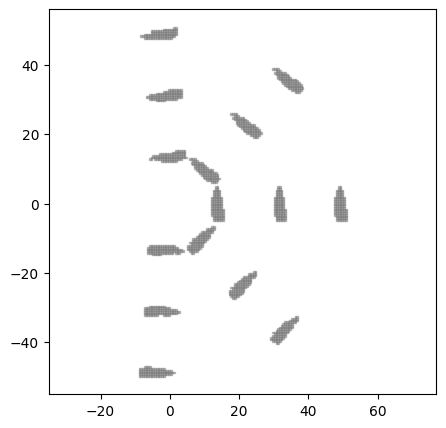

--------------------------------------------------
label: VentHole Chromosome_103: ['DoubleParabolicShape_103', 'CircularStrictTransformation_103']
predict: (0.2902014978674101, 373.0580487000001, 458.0795431999997)
biased_fitness: 0.7204195940258987, fitness: 0.6922970618258998
shape parameter:
parameter_list: [ lower_coefficient: 2.7589736571047156, upper_coefficient: 2.9673741676807808, lower_y-intercept: 1.7730826023548532, upper_y-intercept_from_lower_y: 1.440711853811813, lower_x_trans: 3.517858437806755, ]
pattern parameter:
parameter_list: [ di: 7.684662762806923, dx: 8.063932155625166, phi: 0.7853981633974483, ]


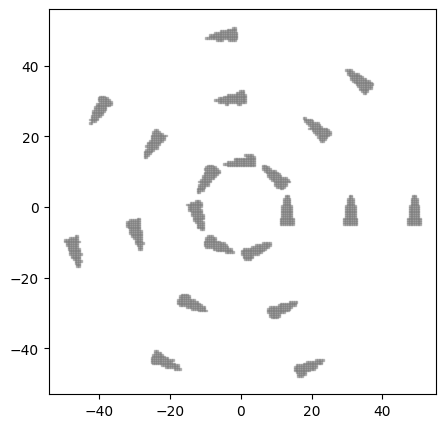

--------------------------------------------------
label: VentHole Chromosome_104: ['DoubleParabolicShape_104', 'GridStrictTransformation_104']
predict: (0.289512679197788, 373.0855525999999, 457.0306739999998)
biased_fitness: 0.7292129918221208, fitness: 0.7042920750221212
shape parameter:
parameter_list: [ lower_coefficient: 1.1472796958238805, upper_coefficient: 2.0239870630472785, lower_y-intercept: 3.4734937914641875, upper_y-intercept_from_lower_y: 1.0930400213986737, lower_x_trans: -0.928510792851462, ]
pattern parameter:
parameter_list: [ dx: 9.491314669011357, dy: 5.56016761991898, ]


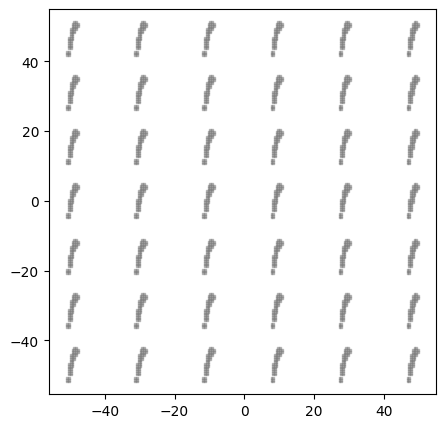

--------------------------------------------------
label: VentHole Chromosome_105: ['DoubleParabolicShape_105', 'CornerTransformation_105']
predict: (0.29004380013994924, 373.88424179999987, 455.4762514999999)
biased_fitness: 0.7214198030005087, fitness: 0.7027595321005088
shape parameter:
parameter_list: [ lower_coefficient: 1.230037964717701, upper_coefficient: 1.3509486346339545, lower_y-intercept: 3.858768244747545, upper_y-intercept_from_lower_y: 1.6951552206909017, lower_x_trans: 4.310653469229804, ]
pattern parameter:
parameter_list: [ di: 12.335240423223343, dx: 8.657759079648702, phi: 0.7056340305390598, rot_count: 4.0, ]


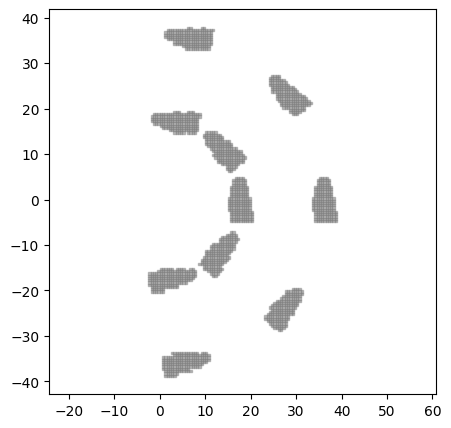

--------------------------------------------------
label: VentHole Chromosome_106: ['DoubleParabolicShape_106', 'CornerTransformation_106']
predict: (0.2899893475337332, 373.80360039999994, 457.6226407)
biased_fitness: 0.7182360404626685, fitness: 0.6929753191626685
shape parameter:
parameter_list: [ lower_coefficient: 1.4724849002309446, upper_coefficient: 2.1925482598580146, lower_y-intercept: 2.0657969502364426, upper_y-intercept_from_lower_y: 1.257524160503937, lower_x_trans: 4.370507146164714, ]
pattern parameter:
parameter_list: [ di: 12.290102717699732, dx: 3.4214023035977847, phi: 0.27254607774616235, rot_count: 6.0, ]


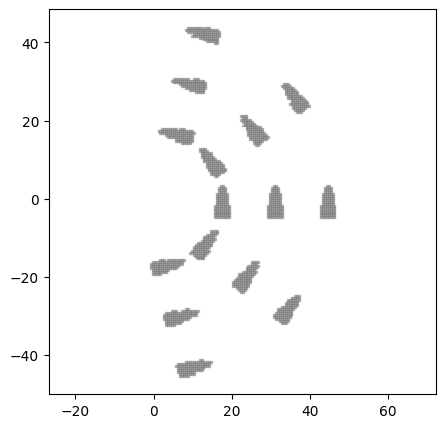

--------------------------------------------------
label: VentHole Chromosome_107: ['DoubleParabolicShape_107', 'CornerTransformation_107']
predict: (0.2885646747521913, 372.8624872000001, 458.29151409999974)
biased_fitness: 0.7377328138780871, fitness: 0.708583245978088
shape parameter:
parameter_list: [ lower_coefficient: 2.3576206194778346, upper_coefficient: 1.701240750606376, lower_y-intercept: 1.6416191473980062, upper_y-intercept_from_lower_y: 1.435627151341972, lower_x_trans: 0.5820001203037641, ]
pattern parameter:
parameter_list: [ di: 11.120496233051055, dx: 5.590445410217016, phi: 0.3531199593277671, rot_count: 2.0, ]


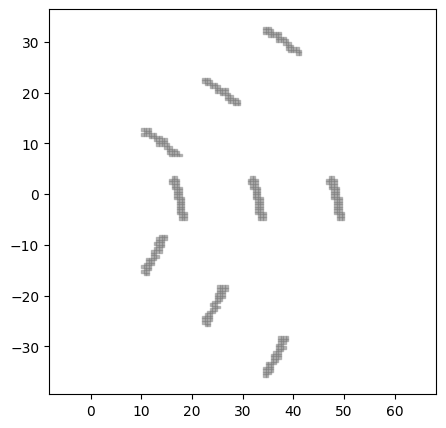

--------------------------------------------------
label: VentHole Chromosome_108: ['DoubleParabolicShape_108', 'GridStrictTransformation_108']
predict: (0.2894131600479324, 372.61260389999984, 459.93247589999993)
biased_fitness: 0.7277152204206773, fitness: 0.6931430005206772
shape parameter:
parameter_list: [ lower_coefficient: 2.1429488617506873, upper_coefficient: 1.1256468629171912, lower_y-intercept: 3.1703642641885197, upper_y-intercept_from_lower_y: 1.5147990216252898, lower_x_trans: 0.9505099647967308, ]
pattern parameter:
parameter_list: [ dx: 4.5168359342367035, dy: 4.209094015358138, ]


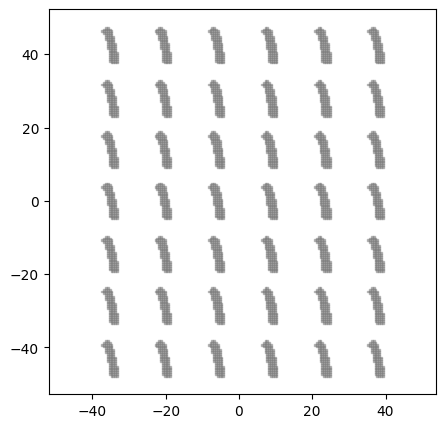

--------------------------------------------------
label: VentHole Chromosome_109: ['DoubleParabolicShape_109', 'CircularStrictTransformation_109']
predict: (0.2919579821493625, 373.6448089999998, 456.59986529999975)
biased_fitness: 0.7017067849063766, fitness: 0.679196807006377
shape parameter:
parameter_list: [ lower_coefficient: 1.864604678154097, upper_coefficient: 1.3514343904739, lower_y-intercept: 2.8825286129600793, upper_y-intercept_from_lower_y: 1.8894725991783567, lower_x_trans: -3.398045270230521, ]
pattern parameter:
parameter_list: [ di: 13.937720314757325, dx: 2.3762743662537615, phi: 0.5235987755982988, ]


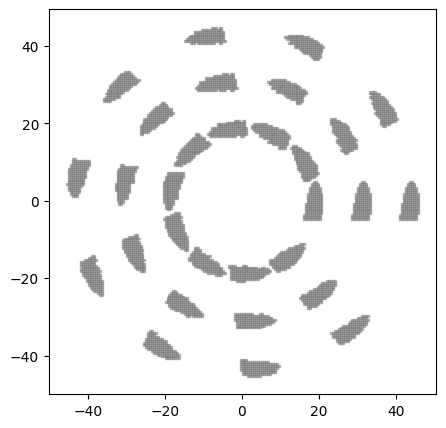

--------------------------------------------------
label: VentHole Chromosome_110: ['DoubleParabolicShape_110', 'CornerTransformation_110']
predict: (0.29019038498648086, 373.48982319999993, 458.76411410000003)
biased_fitness: 0.7161391595351917, fitness: 0.6868264636351915
shape parameter:
parameter_list: [ lower_coefficient: 2.1612916632444863, upper_coefficient: 1.099259968963329, lower_y-intercept: 3.7736888310705576, upper_y-intercept_from_lower_y: 1.3612405166329127, lower_x_trans: -0.0916663656127259, ]
pattern parameter:
parameter_list: [ di: 10.872683399843735, dx: 3.9340115474415467, phi: 0.386148289133918, rot_count: 3.0, ]


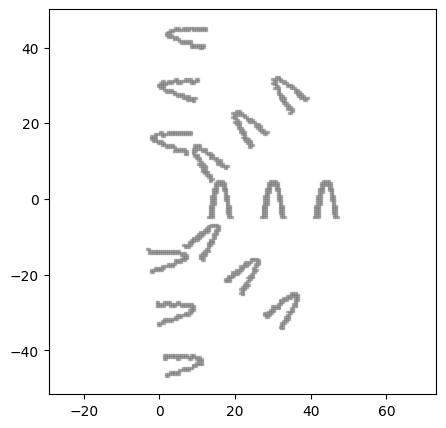

--------------------------------------------------
label: VentHole Chromosome_111: ['DoubleParabolicShape_111', 'GridStrictTransformation_111']
predict: (0.2898800696851551, 373.06591399999996, 459.1573998)
biased_fitness: 0.721423105548449, fitness: 0.6900827341484489
shape parameter:
parameter_list: [ lower_coefficient: 1.7737847649148202, upper_coefficient: 2.4928229975185516, lower_y-intercept: 1.4988748600455521, upper_y-intercept_from_lower_y: 1.5468263342007966, lower_x_trans: 0.6178024851200483, ]
pattern parameter:
parameter_list: [ dx: 8.391807902400657, dy: 8.721664829376506, ]


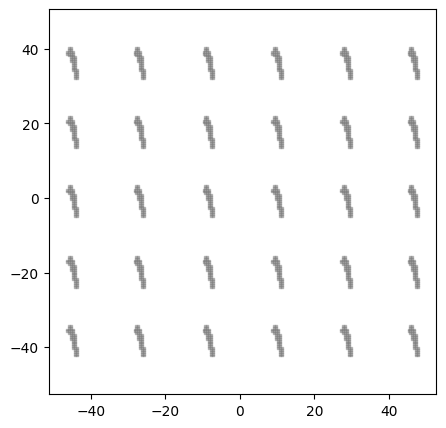

--------------------------------------------------
label: VentHole Chromosome_112: ['DoubleParabolicShape_112', 'CircularStrictTransformation_112']
predict: (0.29282551800394563, 373.4155598, 458.40485120000017)
biased_fitness: 0.6910261989605433, fitness: 0.6626427649605429
shape parameter:
parameter_list: [ lower_coefficient: 1.634901587401456, upper_coefficient: 2.4193561698673136, lower_y-intercept: 1.2981582180236118, upper_y-intercept_from_lower_y: 1.1462667932299446, lower_x_trans: -3.169426343409265, ]
pattern parameter:
parameter_list: [ di: 14.192951731143928, dx: 0.6599320516682211, phi: 0.5711986642890533, ]


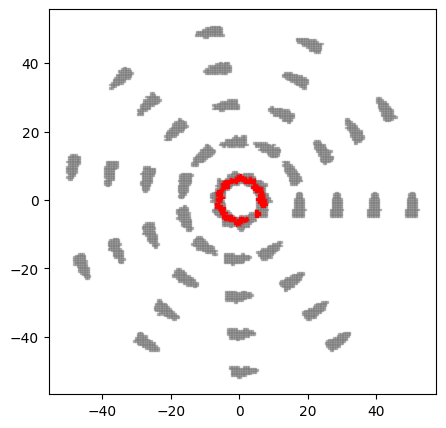

--------------------------------------------------
label: VentHole Chromosome_113: ['DoubleParabolicShape_113', 'CornerTransformation_113']
predict: (0.28975814569364955, 373.45896840000006, 458.5491635000001)
biased_fitness: 0.7211074372635038, fitness: 0.6923778835635037
shape parameter:
parameter_list: [ lower_coefficient: 1.1454547154356394, upper_coefficient: 1.820959295542187, lower_y-intercept: 2.6498380111636113, upper_y-intercept_from_lower_y: 1.8071675926664932, lower_x_trans: -3.070789573475458, ]
pattern parameter:
parameter_list: [ di: 8.171978690332361, dx: 4.86393104020408, phi: 0.4230093064909908, rot_count: 6.0, ]


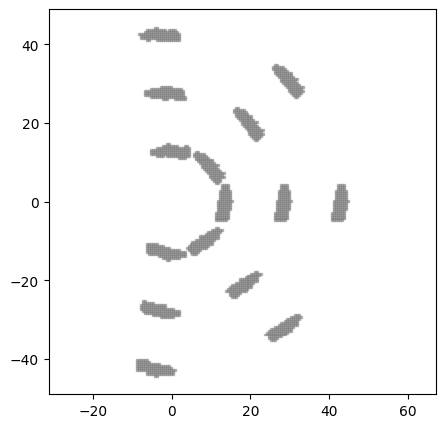

--------------------------------------------------
label: VentHole Chromosome_114: ['DoubleParabolicShape_114', 'CircularStrictTransformation_114']
predict: (0.28999840796334064, 373.30724339999995, 457.66484929999984)
biased_fitness: 0.7215355179665941, fitness: 0.6951554568665945
shape parameter:
parameter_list: [ lower_coefficient: 2.317986668227154, upper_coefficient: 2.2197205785423035, lower_y-intercept: 3.051477368365519, upper_y-intercept_from_lower_y: 1.8264202327722834, lower_x_trans: 3.092592356171153, ]
pattern parameter:
parameter_list: [ di: 10.683271219009722, dx: 8.338845437971965, phi: 0.5711986642890533, ]


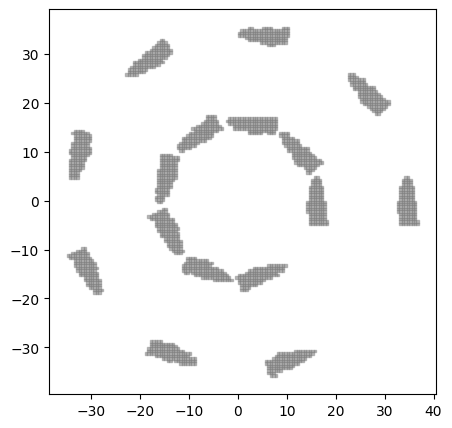

--------------------------------------------------
label: VentHole Chromosome_115: ['DoubleParabolicShape_115', 'CircularStrictTransformation_115']
predict: (0.2896536713482769, 372.9907892, 456.4913510000001)
biased_fitness: 0.7295450601172306, fitness: 0.7060525855172303
shape parameter:
parameter_list: [ lower_coefficient: 1.1364229516408677, upper_coefficient: 2.6800635248309534, lower_y-intercept: 1.0238521904832372, upper_y-intercept_from_lower_y: 1.3728674653663389, lower_x_trans: 0.9524609498426617, ]
pattern parameter:
parameter_list: [ di: 14.574675561672915, dx: 9.798139568521371, phi: 0.41887902047863906, ]


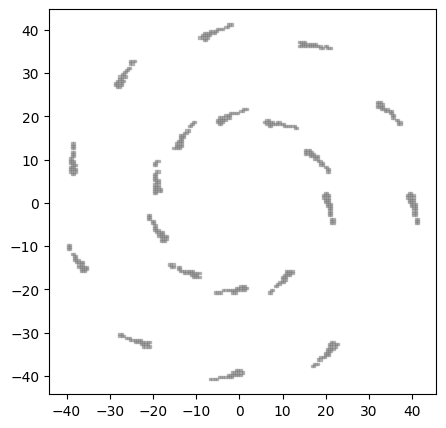

--------------------------------------------------
label: VentHole Chromosome_116: ['DoubleParabolicShape_116', 'GridStrictTransformation_116']
predict: (0.2885518846599995, 372.8580158, 456.38227539999986)
biased_fitness: 0.7417104920000055, fitness: 0.718279697400006
shape parameter:
parameter_list: [ lower_coefficient: 1.544934840421071, upper_coefficient: 2.8775535862272195, lower_y-intercept: 1.7665256503236217, upper_y-intercept_from_lower_y: 1.0900812827115942, lower_x_trans: -0.05385412737970796, ]
pattern parameter:
parameter_list: [ dx: 6.57633168665, dy: 6.090006435154351, ]


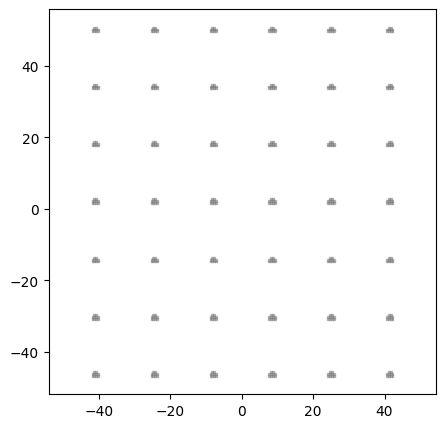

--------------------------------------------------
label: VentHole Chromosome_117: ['DoubleParabolicShape_117', 'GridStrictTransformation_117']
predict: (0.2911489299956782, 372.96618050000006, 457.4895090999999)
biased_fitness: 0.7127684183432176, fitness: 0.686232252043218
shape parameter:
parameter_list: [ lower_coefficient: 2.0093979061109826, upper_coefficient: 1.9954245455238564, lower_y-intercept: 2.105837355424708, upper_y-intercept_from_lower_y: 1.493507499132542, lower_x_trans: -4.437422785550097, ]
pattern parameter:
parameter_list: [ dx: 9.287172177901184, dy: 3.331618521893583, ]


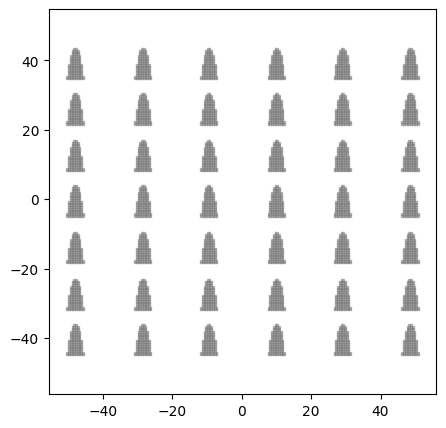

--------------------------------------------------
label: VentHole Chromosome_118: ['DoubleParabolicShape_118', 'GridStrictTransformation_118']
predict: (0.29019262561609516, 372.8933147999998, 458.56524479999985)
biased_fitness: 0.72069005063905, fitness: 0.69078094583905
shape parameter:
parameter_list: [ lower_coefficient: 2.4762837634256183, upper_coefficient: 1.4885039055645648, lower_y-intercept: 3.66948341788408, upper_y-intercept_from_lower_y: 1.160341074664669, lower_x_trans: -0.37371984424058, ]
pattern parameter:
parameter_list: [ dx: 9.440936688740807, dy: 1.98473743606919, ]


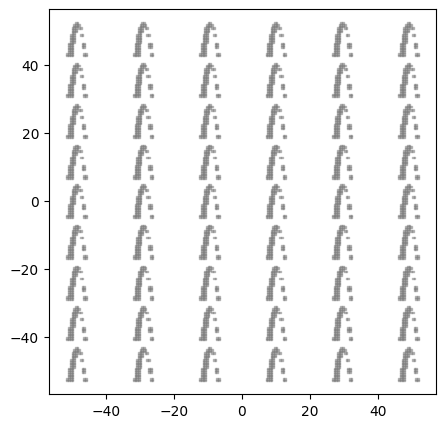

--------------------------------------------------
label: VentHole Chromosome_119: ['DoubleParabolicShape_119', 'CircularStrictTransformation_119']
predict: (0.2907148742334904, 373.92834959999993, 457.29351409999987)
biased_fitness: 0.7107657822650965, fitness: 0.6867419391650967
shape parameter:
parameter_list: [ lower_coefficient: 2.520376799796857, upper_coefficient: 1.448391279509073, lower_y-intercept: 2.445224125787983, upper_y-intercept_from_lower_y: 1.8236183925792817, lower_x_trans: -4.005783418289749, ]
pattern parameter:
parameter_list: [ di: 11.000118051430103, dx: 9.937137671634167, phi: 0.6981317007977318, ]


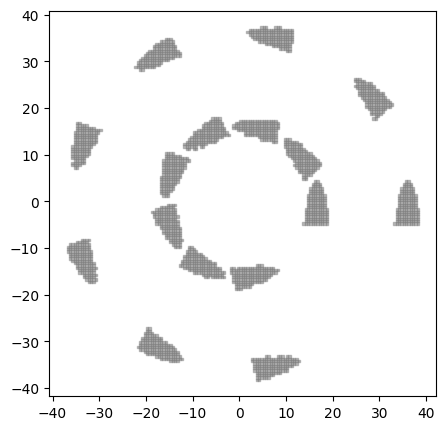

--------------------------------------------------
label: VentHole Chromosome_120: ['DoubleParabolicShape_120', 'CircularStrictTransformation_120']
predict: (0.28935651102142934, 372.91100170000004, 458.12944859999993)
biased_fitness: 0.7297989806857063, fitness: 0.7012326382857066
shape parameter:
parameter_list: [ lower_coefficient: 2.045083915906237, upper_coefficient: 1.290329850790195, lower_y-intercept: 2.388937793566063, upper_y-intercept_from_lower_y: 1.6007356534235044, lower_x_trans: 1.2427753993031168, ]
pattern parameter:
parameter_list: [ di: 10.430048749093261, dx: 7.489596592177602, phi: 0.6283185307179586, ]


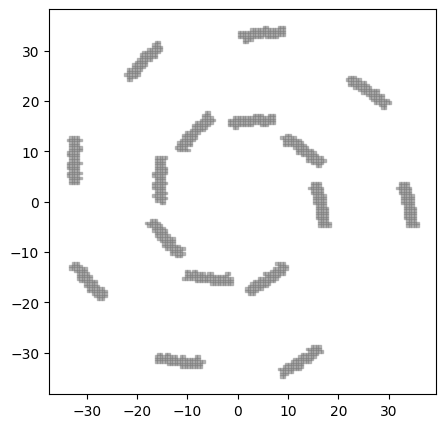

--------------------------------------------------
label: VentHole Chromosome_121: ['DoubleParabolicShape_121', 'GridStrictTransformation_121']
predict: (0.29376146476915, 373.3787630999999, 456.20000200000004)
biased_fitness: 0.6863340066085004, fitness: 0.6644915268085002
shape parameter:
parameter_list: [ lower_coefficient: 2.6414466959567173, upper_coefficient: 1.0227305193247138, lower_y-intercept: 1.364761864480811, upper_y-intercept_from_lower_y: 1.2485367983930227, lower_x_trans: -2.2887237750137954, ]
pattern parameter:
parameter_list: [ dx: 2.6731159814056293, dy: 4.11937119578896, ]


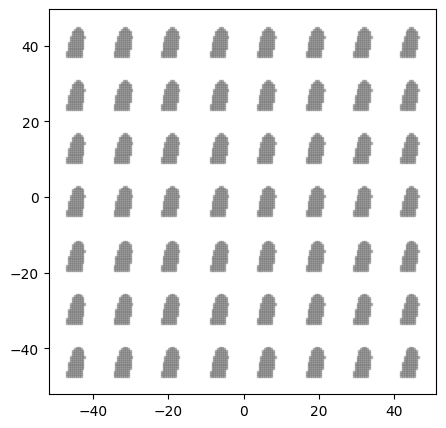

--------------------------------------------------
label: VentHole Chromosome_122: ['DoubleParabolicShape_122', 'CornerTransformation_122']
predict: (0.2889722510162065, 373.3183890999998, 455.2080951999996)
biased_fitness: 0.736632575737937, fitness: 0.7176450683379378
shape parameter:
parameter_list: [ lower_coefficient: 1.4869580663384612, upper_coefficient: 2.0792211862687626, lower_y-intercept: 3.6026778807216795, upper_y-intercept_from_lower_y: 1.500030951727147, lower_x_trans: 4.09425288735002, ]
pattern parameter:
parameter_list: [ di: 14.00022140698529, dx: 6.49401372305724, phi: 0.3472639623483987, rot_count: 6.0, ]


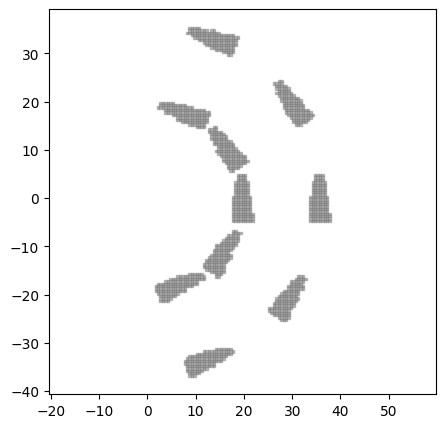

--------------------------------------------------
label: VentHole Chromosome_123: ['DoubleParabolicShape_123', 'CornerTransformation_123']
predict: (0.2902134871571933, 372.99988599999995, 457.74841999999967)
biased_fitness: 0.721369086428068, fitness: 0.6941235984280688
shape parameter:
parameter_list: [ lower_coefficient: 2.3018084837984993, upper_coefficient: 1.5543043973604758, lower_y-intercept: 2.6122894055798835, upper_y-intercept_from_lower_y: 1.1073691778816068, lower_x_trans: 3.770679183596556, ]
pattern parameter:
parameter_list: [ di: 9.975816689855764, dx: 9.550360907718698, phi: 0.5213074309268992, rot_count: 6.0, ]


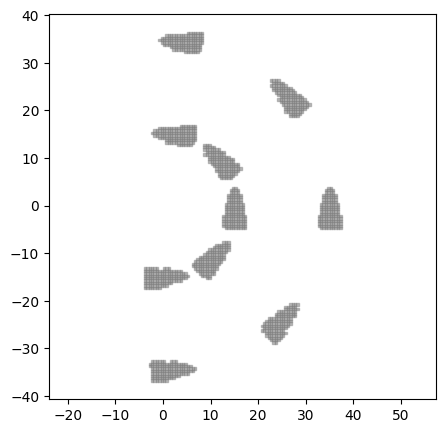

--------------------------------------------------
label: VentHole Chromosome_124: ['DoubleParabolicShape_124', 'GridStrictTransformation_124']
predict: (0.289833352975156, 373.37887409999973, 457.0898631)
biased_fitness: 0.7238346253484418, fitness: 0.6993227842484413
shape parameter:
parameter_list: [ lower_coefficient: 2.2435385582490097, upper_coefficient: 2.638858781067836, lower_y-intercept: 3.158089972924729, upper_y-intercept_from_lower_y: 1.9678216678641305, lower_x_trans: -3.3769043593443704, ]
pattern parameter:
parameter_list: [ dx: 4.957350935619874, dy: 2.6173227735782745, ]


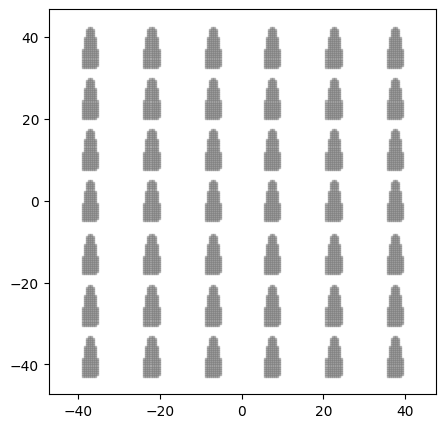

--------------------------------------------------
label: VentHole Chromosome_125: ['DoubleParabolicShape_125', 'CornerTransformation_125']
predict: (0.2907445919889524, 373.0886813000001, 459.981256)
biased_fitness: 0.7109707990104752, fitness: 0.6772043936104755
shape parameter:
parameter_list: [ lower_coefficient: 2.3524372364925483, upper_coefficient: 2.2261997106929856, lower_y-intercept: 2.8200778926033165, upper_y-intercept_from_lower_y: 1.3777979129199083, lower_x_trans: 4.898142852385428, ]
pattern parameter:
parameter_list: [ di: 10.002499072970455, dx: 1.2130025353774945, phi: 0.778791492317302, rot_count: 6.0, ]


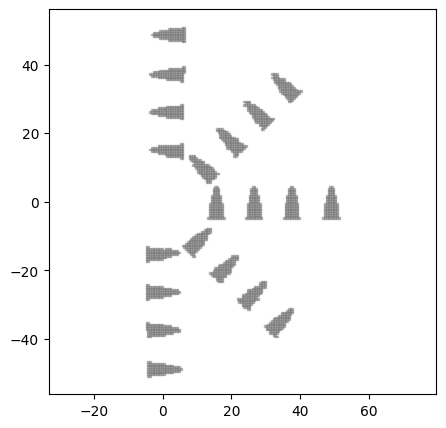

--------------------------------------------------
label: VentHole Chromosome_126: ['DoubleParabolicShape_126', 'CircularStrictTransformation_126']
predict: (0.2923184194252437, 373.2344617000001, 457.38072090000026)
biased_fitness: 0.6994131320475613, fitness: 0.6737398927475607
shape parameter:
parameter_list: [ lower_coefficient: 2.7208233574043676, upper_coefficient: 2.66890199074251, lower_y-intercept: 1.4521753172000667, upper_y-intercept_from_lower_y: 1.6584348451868292, lower_x_trans: -2.638281538337366, ]
pattern parameter:
parameter_list: [ di: 9.630645642784767, dx: 0.5434833027479814, phi: 0.4487989505128276, ]


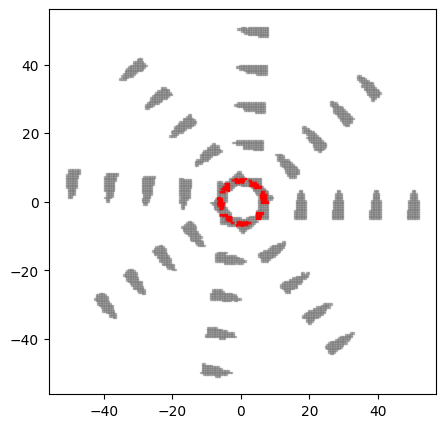

--------------------------------------------------
label: VentHole Chromosome_127: ['DoubleParabolicShape_127', 'CircularStrictTransformation_127']
predict: (0.2934443862142979, 373.08781539999995, 459.22867009999993)
biased_fitness: 0.6854840898570213, fitness: 0.6539737103570213
shape parameter:
parameter_list: [ lower_coefficient: 2.015997272530623, upper_coefficient: 1.5332579040203937, lower_y-intercept: 3.9792738400792635, upper_y-intercept_from_lower_y: 1.8907427233760683, lower_x_trans: 3.76974007899482, ]
pattern parameter:
parameter_list: [ di: 14.447259665227602, dx: 3.5376333087086147, phi: 0.6283185307179586, ]


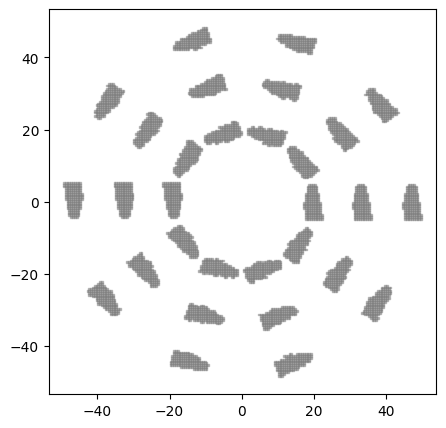

--------------------------------------------------
label: VentHole Chromosome_128: ['DoubleParabolicShape_128', 'CircularStrictTransformation_128']
predict: (0.2921663593407362, 373.24777169999993, 457.5171987999999)
biased_fitness: 0.7005676070926385, fitness: 0.6745115540926387
shape parameter:
parameter_list: [ lower_coefficient: 1.9066249468617738, upper_coefficient: 1.173257626039388, lower_y-intercept: 1.9808610995819544, upper_y-intercept_from_lower_y: 1.8653584346008893, lower_x_trans: -2.353023245216134, ]
pattern parameter:
parameter_list: [ di: 11.240102324119556, dx: 1.397100321197251, phi: 0.6981317007977318, ]


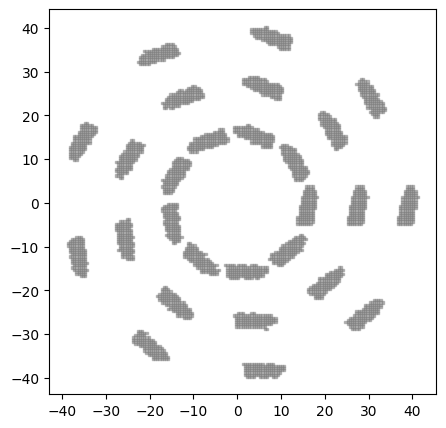

--------------------------------------------------
label: VentHole Chromosome_129: ['DoubleParabolicShape_129', 'GridStrictTransformation_129']
predict: (0.29130317168460707, 373.8466923, 459.3886988)
biased_fitness: 0.7012640394539293, fitness: 0.6707913276539293
shape parameter:
parameter_list: [ lower_coefficient: 2.418133122606412, upper_coefficient: 2.4755379365444092, lower_y-intercept: 3.1394482643957, upper_y-intercept_from_lower_y: 1.914406750115245, lower_x_trans: -0.29100778260669635, ]
pattern parameter:
parameter_list: [ dx: 1.194219102465357, dy: 1.8694116407694934, ]


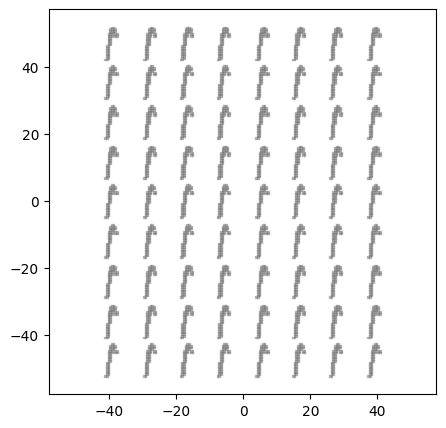

--------------------------------------------------
label: VentHole Chromosome_130: ['DoubleParabolicShape_130', 'CornerTransformation_130']
predict: (0.28835001913879177, 372.93931220000013, 456.7560896)
biased_fitness: 0.7424124440120812, fitness: 0.7180227996120815
shape parameter:
parameter_list: [ lower_coefficient: 1.4458329567982868, upper_coefficient: 2.663381819049582, lower_y-intercept: 1.4515316445341977, upper_y-intercept_from_lower_y: 1.8858036998601964, lower_x_trans: -1.1460995647579333, ]
pattern parameter:
parameter_list: [ di: 12.561332269336503, dx: 9.520835561291067, phi: 0.34786903623734355, rot_count: 3.0, ]


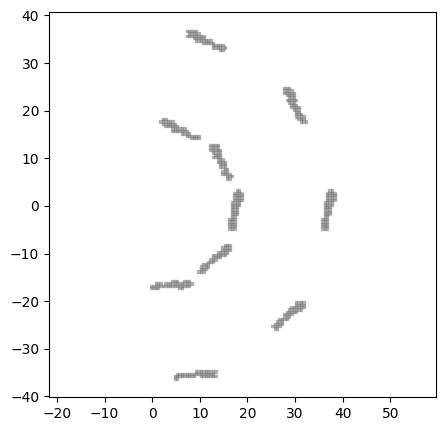

--------------------------------------------------
label: VentHole Chromosome_131: ['DoubleParabolicShape_131', 'GridStrictTransformation_131']
predict: (0.29102294383203864, 373.3775232999999, 457.78234030000004)
biased_fitness: 0.7105632179796142, fitness: 0.6839712436796138
shape parameter:
parameter_list: [ lower_coefficient: 2.483510306524561, upper_coefficient: 2.033925898944373, lower_y-intercept: 1.074432757320213, upper_y-intercept_from_lower_y: 1.9791072331581732, lower_x_trans: -4.231098275634021, ]
pattern parameter:
parameter_list: [ dx: 9.554993061935429, dy: 5.898024288177236, ]


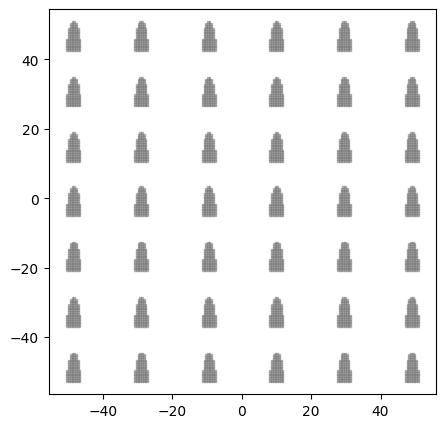

--------------------------------------------------
label: VentHole Chromosome_132: ['DoubleParabolicShape_132', 'GridStrictTransformation_132']
predict: (0.291970029480737, 373.31223099999994, 457.64437659999976)
biased_fitness: 0.7018253349926304, fitness: 0.675516667192631
shape parameter:
parameter_list: [ lower_coefficient: 1.799132837747735, upper_coefficient: 1.3341675132798938, lower_y-intercept: 3.3925659737299707, upper_y-intercept_from_lower_y: 1.9331877386911234, lower_x_trans: -2.8969946028746305, ]
pattern parameter:
parameter_list: [ dx: 8.971353705111857, dy: 3.5638867283692512, ]


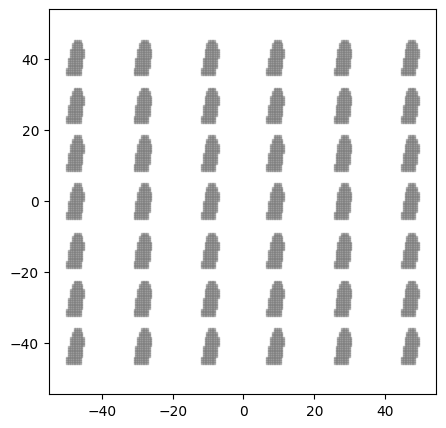

--------------------------------------------------
label: VentHole Chromosome_133: ['DoubleParabolicShape_133', 'CircularStrictTransformation_133']
predict: (0.28999937951637755, 373.3818446000002, 457.1786389)
biased_fitness: 0.721976014836223, fitness: 0.6972037873362233
shape parameter:
parameter_list: [ lower_coefficient: 1.2780973813453131, upper_coefficient: 1.4227764180498994, lower_y-intercept: 2.577725712681487, upper_y-intercept_from_lower_y: 1.06658161284567, lower_x_trans: 1.660141976277182, ]
pattern parameter:
parameter_list: [ di: 14.992501675974125, dx: 5.82148396661437, phi: 0.36959913571644626, ]


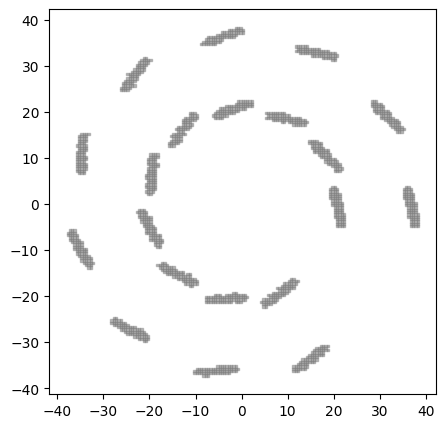

--------------------------------------------------
label: VentHole Chromosome_134: ['DoubleParabolicShape_134', 'CornerTransformation_134']
predict: (0.29083220859427406, 373.2166900999999, 457.95463989999985)
biased_fitness: 0.7132518035572605, fitness: 0.6858212640572607
shape parameter:
parameter_list: [ lower_coefficient: 1.2604757209508688, upper_coefficient: 1.3196607009454586, lower_y-intercept: 2.4950842257200514, upper_y-intercept_from_lower_y: 1.3085344938616879, lower_x_trans: 2.291952182993729, ]
pattern parameter:
parameter_list: [ di: 7.851427073598087, dx: 1.6020689266080592, phi: 0.2846109443055566, rot_count: 4.0, ]


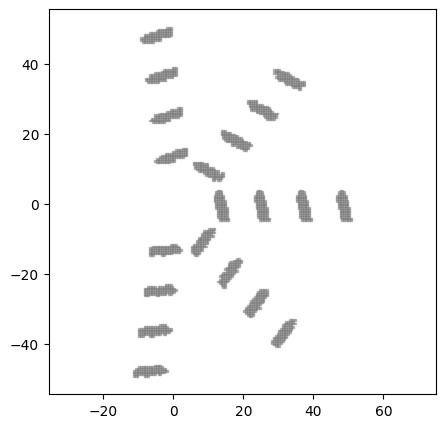

--------------------------------------------------
label: VentHole Chromosome_135: ['DoubleParabolicShape_135', 'CornerTransformation_135']
predict: (0.28924064587667253, 373.43094920000004, 458.3716624999998)
biased_fitness: 0.7268335718332747, fitness: 0.6985804827332754
shape parameter:
parameter_list: [ lower_coefficient: 2.5585159584116997, upper_coefficient: 2.1167768279183568, lower_y-intercept: 1.1287787477082767, upper_y-intercept_from_lower_y: 1.3621760478834704, lower_x_trans: -0.7365128666966534, ]
pattern parameter:
parameter_list: [ di: 11.64688573880266, dx: 2.450863504855163, phi: 0.26212406178126657, rot_count: 2.0, ]


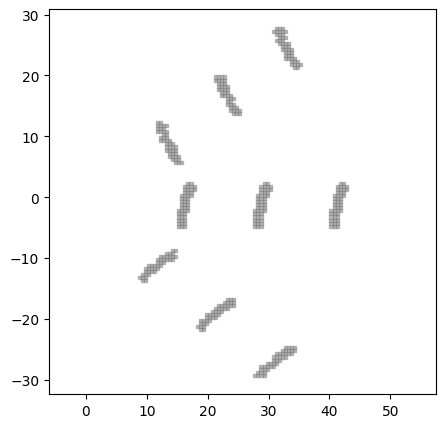

--------------------------------------------------
label: VentHole Chromosome_136: ['DoubleParabolicShape_136', 'CircularStrictTransformation_136']
predict: (0.28983804998993135, 373.39642370000007, 457.718301)
biased_fitness: 0.7224079322006859, fitness: 0.6960458766006861
shape parameter:
parameter_list: [ lower_coefficient: 1.5593901217495387, upper_coefficient: 2.0507749552133934, lower_y-intercept: 1.7397821446760637, upper_y-intercept_from_lower_y: 1.0086232928160537, lower_x_trans: 1.6274356477548242, ]
pattern parameter:
parameter_list: [ di: 14.376099319649802, dx: 8.953580270436662, phi: 0.41887902047863906, ]


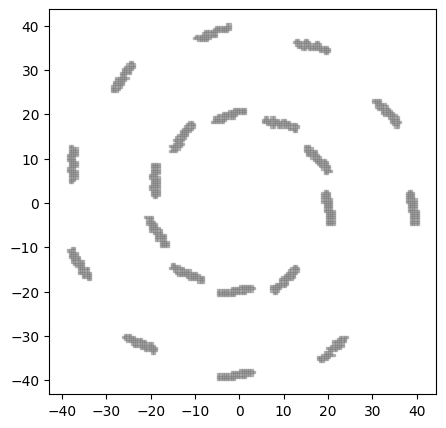

--------------------------------------------------
label: VentHole Chromosome_137: ['DoubleParabolicShape_137', 'CornerTransformation_137']
predict: (0.28876902005420524, 372.97538929999996, 456.9978956999998)
biased_fitness: 0.7374862829579482, fitness: 0.7124433744579488
shape parameter:
parameter_list: [ lower_coefficient: 1.9971357438615414, upper_coefficient: 2.372405573190588, lower_y-intercept: 3.2054649866221103, upper_y-intercept_from_lower_y: 1.906640137918214, lower_x_trans: 0.5432674411885632, ]
pattern parameter:
parameter_list: [ di: 11.453625601878297, dx: 1.557707191671833, phi: 0.3555326073452568, rot_count: 2.0, ]


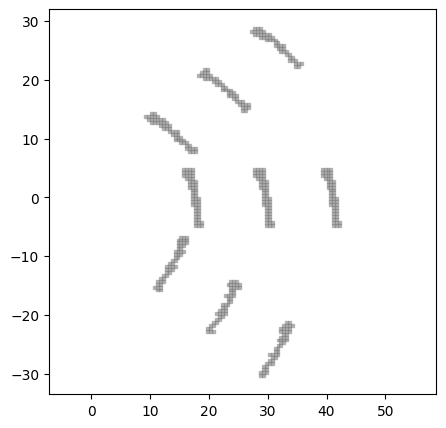

--------------------------------------------------
label: VentHole Chromosome_138: ['DoubleParabolicShape_138', 'CircularStrictTransformation_138']
predict: (0.28883096940569075, 372.9766436999999, 458.7927481999999)
biased_fitness: 0.7332683036430933, fitness: 0.7028433464430934
shape parameter:
parameter_list: [ lower_coefficient: 1.4321056028039536, upper_coefficient: 2.7567826237033977, lower_y-intercept: 3.7646670331754644, upper_y-intercept_from_lower_y: 1.5189774971186525, lower_x_trans: -1.119217216315378, ]
pattern parameter:
parameter_list: [ di: 7.604724490675476, dx: 9.921222560626681, phi: 0.483321946706122, ]


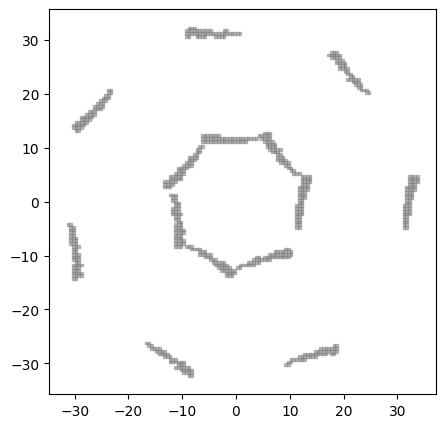

--------------------------------------------------
label: VentHole Chromosome_139: ['DoubleParabolicShape_139', 'GridStrictTransformation_139']
predict: (0.28988900857349176, 372.84512829999994, 456.3759575000001)
biased_fitness: 0.7284421011650825, fitness: 0.7050044852650822
shape parameter:
parameter_list: [ lower_coefficient: 2.1306386575158838, upper_coefficient: 2.155485664099305, lower_y-intercept: 1.3780615057218801, upper_y-intercept_from_lower_y: 1.9792916462277983, lower_x_trans: -2.717758083779962, ]
pattern parameter:
parameter_list: [ dx: 8.978906766684947, dy: 5.229841933786819, ]


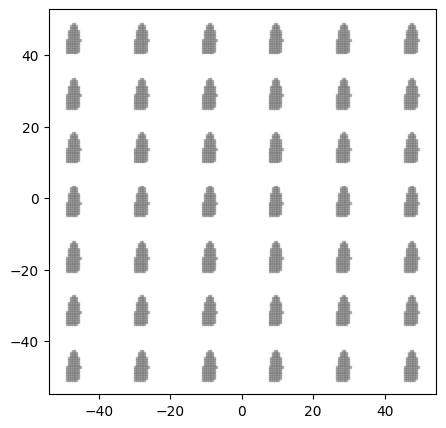

--------------------------------------------------
label: VentHole Chromosome_140: ['DoubleParabolicShape_140', 'CornerTransformation_140']
predict: (0.2900692254463024, 373.01360400000004, 456.05779309999974)
biased_fitness: 0.7260969313369757, fitness: 0.7039507600369767
shape parameter:
parameter_list: [ lower_coefficient: 1.886871447560968, upper_coefficient: 2.279613959494038, lower_y-intercept: 3.9544977715928065, upper_y-intercept_from_lower_y: 1.5699349084924559, lower_x_trans: -2.6866801611525446, ]
pattern parameter:
parameter_list: [ di: 11.963904747629936, dx: 7.433941282551347, phi: 0.485741592028876, rot_count: 5.0, ]


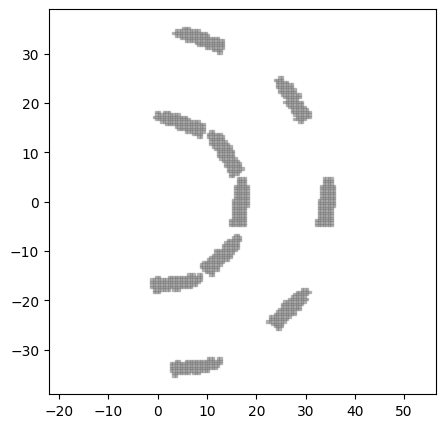

--------------------------------------------------
label: VentHole Chromosome_141: ['DoubleParabolicShape_141', 'CircularStrictTransformation_141']
predict: (0.2923116576257061, 373.6513276, 458.16249540000007)
biased_fitness: 0.6949991397429387, fitness: 0.6678143087429386
shape parameter:
parameter_list: [ lower_coefficient: 1.1355847101199341, upper_coefficient: 2.1773739045208442, lower_y-intercept: 3.138780608851144, upper_y-intercept_from_lower_y: 1.2875561520290402, lower_x_trans: -4.678266760325203, ]
pattern parameter:
parameter_list: [ di: 9.293952998022114, dx: 5.219341042385667, phi: 0.7853981633974483, ]


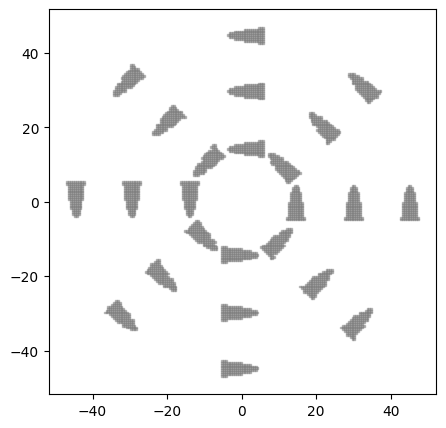

--------------------------------------------------
label: VentHole Chromosome_142: ['DoubleParabolicShape_142', 'CircularStrictTransformation_142']
predict: (0.2909308770759731, 373.11957009999986, 457.6705532999997)
biased_fitness: 0.7135131319402706, fitness: 0.6867406122402712
shape parameter:
parameter_list: [ lower_coefficient: 2.202101447762483, upper_coefficient: 1.3824310024019641, lower_y-intercept: 2.069487911508033, upper_y-intercept_from_lower_y: 1.475483931173025, lower_x_trans: 1.4973852777585517, ]
pattern parameter:
parameter_list: [ di: 12.283623851807702, dx: 3.7848766545358696, phi: 0.5711986642890533, ]


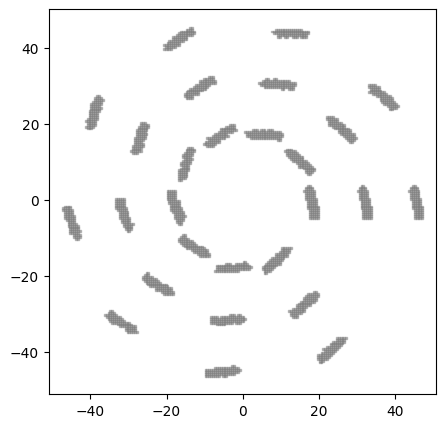

--------------------------------------------------
label: VentHole Chromosome_143: ['DoubleParabolicShape_143', 'CornerTransformation_143']
predict: (0.2886939510128461, 373.2269666999999, 456.23887030000003)
biased_fitness: 0.7379939823715393, fitness: 0.7157313048715391
shape parameter:
parameter_list: [ lower_coefficient: 1.9447344785328877, upper_coefficient: 1.105167924246966, lower_y-intercept: 1.389744148528408, upper_y-intercept_from_lower_y: 1.2965865046691043, lower_x_trans: 2.875643407058453, ]
pattern parameter:
parameter_list: [ di: 14.947352914186062, dx: 7.988267552059089, phi: 0.4137065797597041, rot_count: 2.0, ]


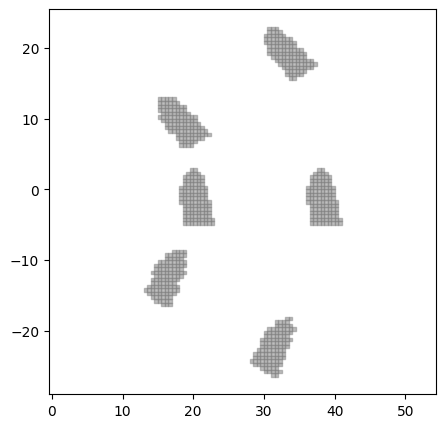

--------------------------------------------------
label: VentHole Chromosome_144: ['DoubleParabolicShape_144', 'CircularStrictTransformation_144']
predict: (0.28966002021282544, 373.0725825999998, 457.8077062999999)
biased_fitness: 0.7262763070717471, fitness: 0.698998353371747
shape parameter:
parameter_list: [ lower_coefficient: 1.917607253420908, upper_coefficient: 2.9764002562205185, lower_y-intercept: 2.758546113075065, upper_y-intercept_from_lower_y: 1.047330344704056, lower_x_trans: 1.669671028366876, ]
pattern parameter:
parameter_list: [ di: 11.944609109730228, dx: 6.435762736191845, phi: 0.7853981633974483, ]


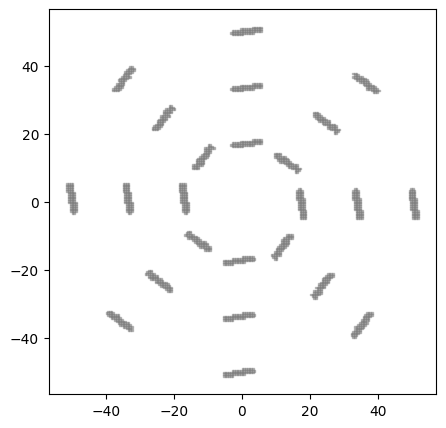

--------------------------------------------------
label: VentHole Chromosome_145: ['DoubleParabolicShape_145', 'CornerTransformation_145']
predict: (0.2892260099799895, 372.9642567, 457.5667584000001)
biased_fitness: 0.7318565865001048, fitness: 0.7050848247001046
shape parameter:
parameter_list: [ lower_coefficient: 2.4310867459520935, upper_coefficient: 2.57585745771737, lower_y-intercept: 2.2034335351549714, upper_y-intercept_from_lower_y: 1.5874881542401726, lower_x_trans: 0.09542183259675774, ]
pattern parameter:
parameter_list: [ di: 11.79912337484633, dx: 0.6796300747088238, phi: 0.3201498267986271, rot_count: 6.0, ]


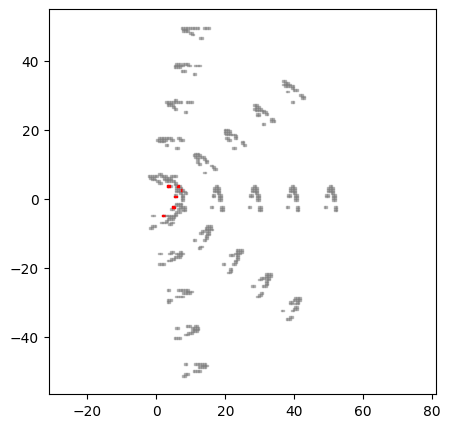

--------------------------------------------------
label: VentHole Chromosome_146: ['DoubleParabolicShape_146', 'CornerTransformation_146']
predict: (0.2886628503737656, 373.67231560000016, 455.9062267000001)
biased_fitness: 0.7358528336623426, fitness: 0.7154787847623426
shape parameter:
parameter_list: [ lower_coefficient: 2.266324668025079, upper_coefficient: 1.841870187583238, lower_y-intercept: 3.6562016958500907, upper_y-intercept_from_lower_y: 1.8924393029355036, lower_x_trans: 0.12281281492645846, ]
pattern parameter:
parameter_list: [ di: 13.579105991211978, dx: 8.957863763923108, phi: 0.4820149484022502, rot_count: 6.0, ]


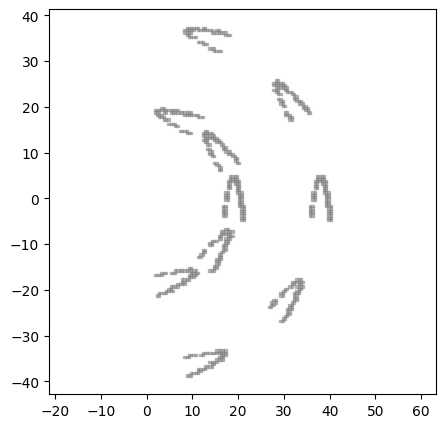

--------------------------------------------------
label: VentHole Chromosome_147: ['DoubleParabolicShape_147', 'CornerTransformation_147']
predict: (0.28926043177472427, 373.1866602000002, 458.2416573999999)
biased_fitness: 0.7286057460527562, fitness: 0.7002540942527569
shape parameter:
parameter_list: [ lower_coefficient: 2.7416446376472092, upper_coefficient: 2.976442844711163, lower_y-intercept: 1.4001420709026875, upper_y-intercept_from_lower_y: 1.4756357111987102, lower_x_trans: -2.4059231608705978, ]
pattern parameter:
parameter_list: [ di: 10.940653129185609, dx: 6.022839679187279, phi: 0.38554148195864885, rot_count: 2.0, ]


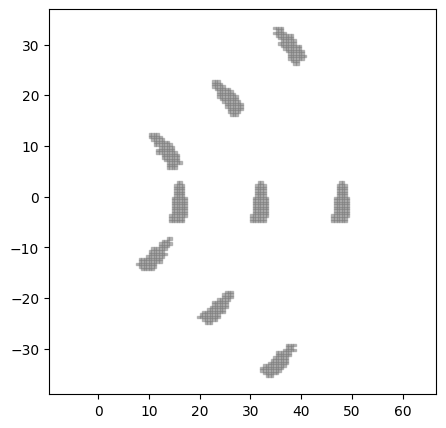

--------------------------------------------------
label: VentHole Chromosome_148: ['DoubleParabolicShape_148', 'CircularStrictTransformation_148']
predict: (0.28973525449081006, 373.16065650000013, 458.7108160999997)
biased_fitness: 0.7231012273918991, fitness: 0.6932900920919002
shape parameter:
parameter_list: [ lower_coefficient: 2.482896458189199, upper_coefficient: 2.912388993337422, lower_y-intercept: 3.64669481903703, upper_y-intercept_from_lower_y: 1.4164239224561768, lower_x_trans: 1.164557304429426, ]
pattern parameter:
parameter_list: [ di: 13.799165113396125, dx: 6.576548229726596, phi: 0.5235987755982988, ]


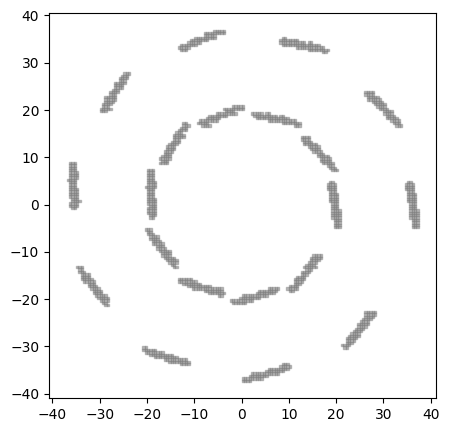

--------------------------------------------------
label: VentHole Chromosome_149: ['DoubleParabolicShape_149', 'GridStrictTransformation_149']
predict: (0.29164663678134595, 373.17974030000005, 457.6508808000002)
biased_fitness: 0.7059736884865396, fitness: 0.6793805266865391
shape parameter:
parameter_list: [ lower_coefficient: 1.8000522353868178, upper_coefficient: 1.5224594579734692, lower_y-intercept: 3.080534995028904, upper_y-intercept_from_lower_y: 1.3802721283139148, lower_x_trans: -2.1794695541109887, ]
pattern parameter:
parameter_list: [ dx: 8.449968965558496, dy: 1.565180010632477, ]


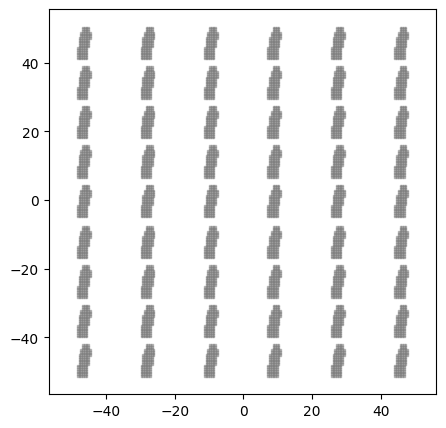

--------------------------------------------------
label: VentHole Chromosome_150: ['DoubleParabolicShape_150', 'GridStrictTransformation_150']
predict: (0.293142533069795, 374.32820649999985, 459.4214435)
biased_fitness: 0.679434336802051, fitness: 0.6498264193020508
shape parameter:
parameter_list: [ lower_coefficient: 1.5687464159391749, upper_coefficient: 1.3262008694831735, lower_y-intercept: 1.22453854049083, upper_y-intercept_from_lower_y: 1.4113310285034162, lower_x_trans: -4.390128790786027, ]
pattern parameter:
parameter_list: [ dx: 3.0366465910342697, dy: 7.060817894676853, ]


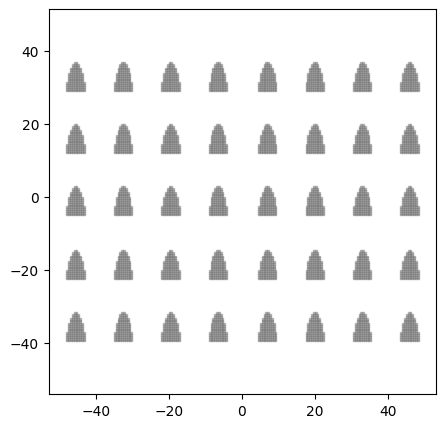

--------------------------------------------------
label: VentHole Chromosome_151: ['DoubleParabolicShape_151', 'CircularStrictTransformation_151']
predict: (0.28987368062179053, 373.0872852, 457.59524969999967)
biased_fitness: 0.7244616979820951, fitness: 0.6978505192820962
shape parameter:
parameter_list: [ lower_coefficient: 1.2504511671907603, upper_coefficient: 1.1875427578846365, lower_y-intercept: 2.8006853459850407, upper_y-intercept_from_lower_y: 1.6804066349847173, lower_x_trans: 0.752542214674973, ]
pattern parameter:
parameter_list: [ di: 13.798614872148779, dx: 3.344732512334776, phi: 0.7853981633974483, ]


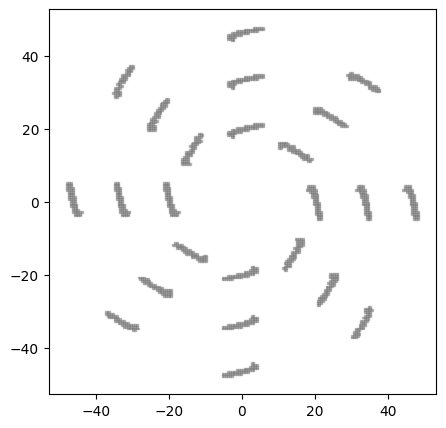

--------------------------------------------------
label: VentHole Chromosome_152: ['DoubleParabolicShape_152', 'CornerTransformation_152']
predict: (0.2900446512061272, 373.0493373, 458.81098089999983)
biased_fitness: 0.7205861650387282, fitness: 0.6902518969387287
shape parameter:
parameter_list: [ lower_coefficient: 2.4704585916815214, upper_coefficient: 1.7748790345944374, lower_y-intercept: 2.989993579193694, upper_y-intercept_from_lower_y: 1.1357679912742225, lower_x_trans: -2.386415290867707, ]
pattern parameter:
parameter_list: [ di: 8.455931660379468, dx: 2.3282110170853283, phi: 0.4005711098204662, rot_count: 4.0, ]


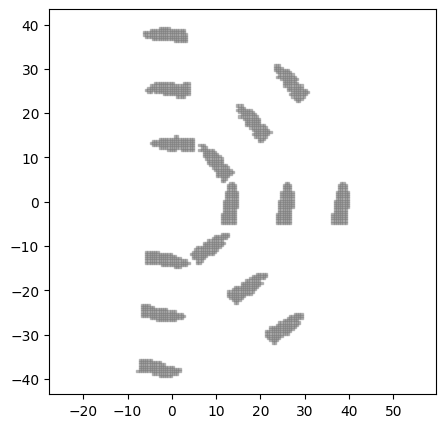

--------------------------------------------------
label: VentHole Chromosome_153: ['DoubleParabolicShape_153', 'CircularStrictTransformation_153']
predict: (0.2899839619085314, 373.3703551000001, 459.48872319999987)
biased_fitness: 0.7175904488146858, fitness: 0.6858649894146863
shape parameter:
parameter_list: [ lower_coefficient: 2.5944725263007253, upper_coefficient: 1.8010727322152142, lower_y-intercept: 1.2766830730837315, upper_y-intercept_from_lower_y: 1.2237305051908702, lower_x_trans: -0.6646397396855228, ]
pattern parameter:
parameter_list: [ di: 12.150046323359696, dx: 4.7798448045296205, phi: 0.6981317007977318, ]


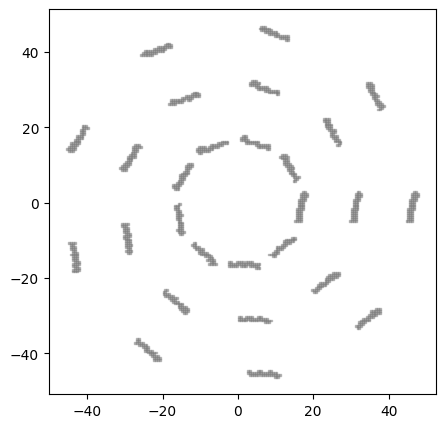

--------------------------------------------------
label: VentHole Chromosome_154: ['DoubleParabolicShape_154', 'GridStrictTransformation_154']
predict: (0.29261802951524407, 372.88983220000017, 457.77031459999984)
biased_fitness: 0.6980502502475582, fitness: 0.6705189708475591
shape parameter:
parameter_list: [ lower_coefficient: 2.666866658662209, upper_coefficient: 1.1826960273905054, lower_y-intercept: 3.3009098297972237, upper_y-intercept_from_lower_y: 1.2326593678916153, lower_x_trans: 3.736968615015968, ]
pattern parameter:
parameter_list: [ dx: 4.853648044550138, dy: 8.243781221159871, ]


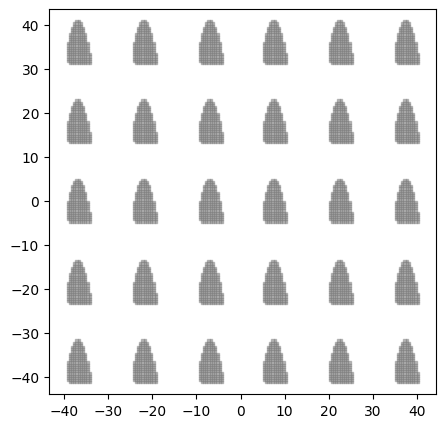

--------------------------------------------------
label: VentHole Chromosome_155: ['DoubleParabolicShape_155', 'GridStrictTransformation_155']
predict: (0.2912247024583585, 373.7224757000002, 460.32917239999995)
biased_fitness: 0.7010373007164135, fitness: 0.667494734916414
shape parameter:
parameter_list: [ lower_coefficient: 2.9931962129527268, upper_coefficient: 2.234087662815358, lower_y-intercept: 3.5426580836484183, upper_y-intercept_from_lower_y: 1.7594771293516696, lower_x_trans: -4.638842766393234, ]
pattern parameter:
parameter_list: [ dx: 9.842162196399931, dy: 0.8264100212669063, ]


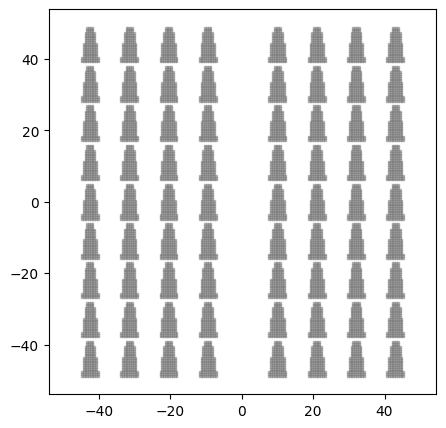

--------------------------------------------------
label: VentHole Chromosome_156: ['DoubleParabolicShape_156', 'CircularStrictTransformation_156']
predict: (0.2891770968879024, 373.04396149999985, 457.9802971999996)
biased_fitness: 0.7309607062209778, fitness: 0.7031077376209788
shape parameter:
parameter_list: [ lower_coefficient: 1.802643643631544, upper_coefficient: 1.794381522602184, lower_y-intercept: 3.112056373233884, upper_y-intercept_from_lower_y: 1.2041966483170468, lower_x_trans: -0.7048664417583614, ]
pattern parameter:
parameter_list: [ di: 7.558327391986787, dx: 9.88652376649222, phi: 0.6981317007977318, ]


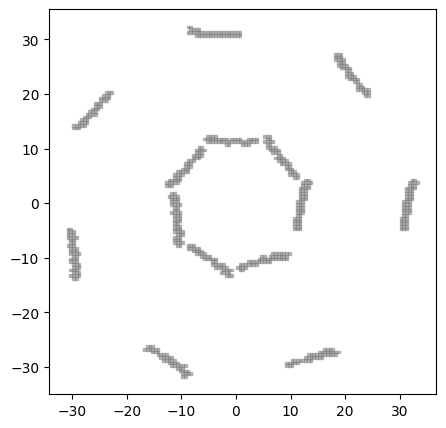

--------------------------------------------------
label: VentHole Chromosome_157: ['DoubleParabolicShape_157', 'CornerTransformation_157']
predict: (0.2897068636330269, 373.31370770000007, 456.8497846999997)
biased_fitness: 0.726035840369731, fitness: 0.7021139016697321
shape parameter:
parameter_list: [ lower_coefficient: 1.3700707221173318, upper_coefficient: 1.4668154832063622, lower_y-intercept: 1.7363518696268772, upper_y-intercept_from_lower_y: 1.1909185976134644, lower_x_trans: -3.1394480276549483, ]
pattern parameter:
parameter_list: [ di: 11.574615725892166, dx: 8.170916351269039, phi: 0.294714614779604, rot_count: 6.0, ]


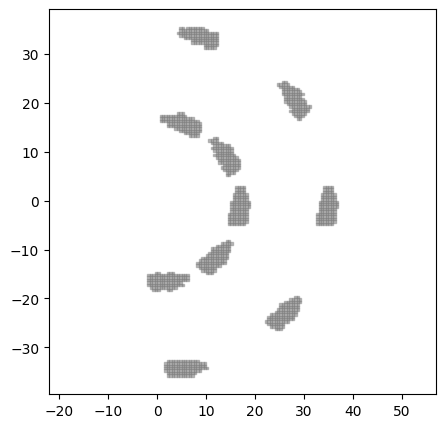

--------------------------------------------------
label: VentHole Chromosome_158: ['DoubleParabolicShape_158', 'CornerTransformation_158']
predict: (0.28906645481498794, 373.17733429999987, 456.50487139999973)
biased_fitness: 0.734084368950122, fitness: 0.7109244233501225
shape parameter:
parameter_list: [ lower_coefficient: 1.1417702205971727, upper_coefficient: 1.3129691524251783, lower_y-intercept: 2.957279572169322, upper_y-intercept_from_lower_y: 1.018032228679814, lower_x_trans: 3.667062090640467, ]
pattern parameter:
parameter_list: [ di: 13.947393401307991, dx: 5.903078399673574, phi: 0.578091994123399, rot_count: 4.0, ]


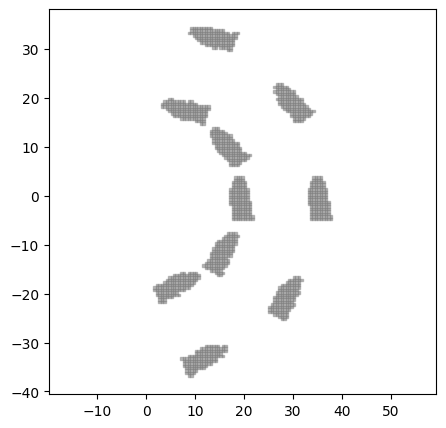

--------------------------------------------------
label: VentHole Chromosome_159: ['DoubleParabolicShape_159', 'CornerTransformation_159']
predict: (0.29017695341712946, 373.12413779999997, 458.2660554999997)
biased_fitness: 0.719829390228706, fitness: 0.6912794993287069
shape parameter:
parameter_list: [ lower_coefficient: 1.470184022507695, upper_coefficient: 1.7958175272214114, lower_y-intercept: 1.940641427645835, upper_y-intercept_from_lower_y: 1.766595542505293, lower_x_trans: -2.651361026137188, ]
pattern parameter:
parameter_list: [ di: 10.491839860559978, dx: 8.476676829866381, phi: 0.43090184298977774, rot_count: 5.0, ]


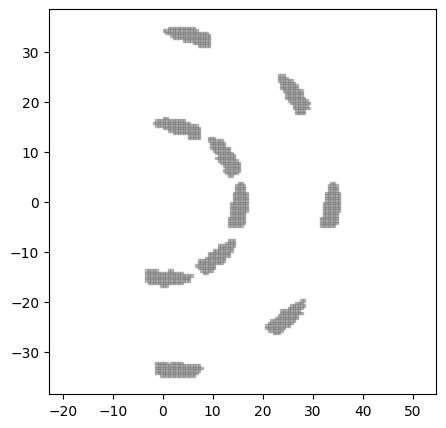

--------------------------------------------------
label: VentHole Chromosome_160: ['DoubleParabolicShape_160', 'CircularStrictTransformation_160']
predict: (0.2893089535680957, 373.2155211, 457.43936750000023)
biased_fitness: 0.7295230816190423, fitness: 0.7036360213190417
shape parameter:
parameter_list: [ lower_coefficient: 2.135577132395931, upper_coefficient: 2.305787619696739, lower_y-intercept: 3.2968053595198534, upper_y-intercept_from_lower_y: 1.3897954587932293, lower_x_trans: -1.5378258894271566, ]
pattern parameter:
parameter_list: [ di: 7.629996861391499, dx: 5.559605442732884, phi: 0.36959913571644626, ]


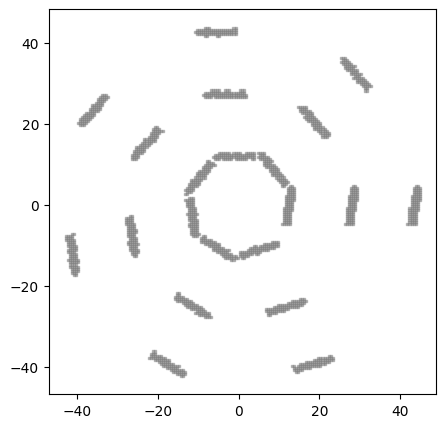

--------------------------------------------------
label: VentHole Chromosome_161: ['DoubleParabolicShape_161', 'GridStrictTransformation_161']
predict: (0.29146351096938417, 373.34156389999987, 456.7638681999999)
biased_fitness: 0.7084462066061594, fitness: 0.6848377298061595
shape parameter:
parameter_list: [ lower_coefficient: 1.8453866446122236, upper_coefficient: 2.705837827096227, lower_y-intercept: 2.463613175747262, upper_y-intercept_from_lower_y: 1.4945269777241164, lower_x_trans: 2.780020182106516, ]
pattern parameter:
parameter_list: [ dx: 3.9327521451858183, dy: 7.976842131157429, ]


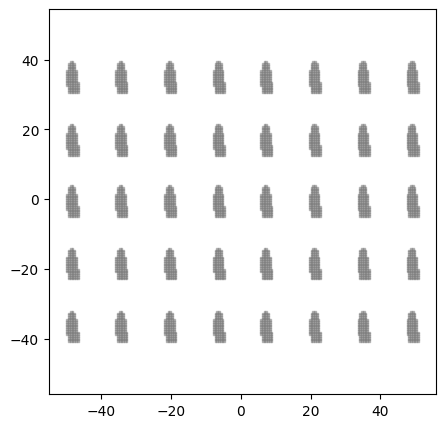

--------------------------------------------------
label: VentHole Chromosome_162: ['DoubleParabolicShape_162', 'CornerTransformation_162']
predict: (0.2895119267980619, 373.2231705, 458.05196689999997)
biased_fitness: 0.7262146047193808, fitness: 0.6985050450193809
shape parameter:
parameter_list: [ lower_coefficient: 1.1815197643498458, upper_coefficient: 2.733082730104112, lower_y-intercept: 3.0506720984919204, upper_y-intercept_from_lower_y: 1.944440573763799, lower_x_trans: -1.400124160116245, ]
pattern parameter:
parameter_list: [ di: 10.14432851552355, dx: 6.1684693161648125, phi: 0.5575944302584581, rot_count: 5.0, ]


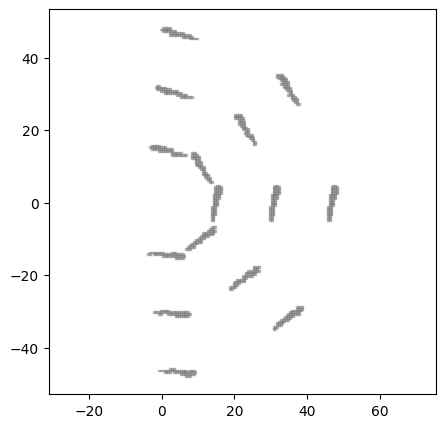

--------------------------------------------------
label: VentHole Chromosome_163: ['DoubleParabolicShape_163', 'CornerTransformation_163']
predict: (0.2892561992427565, 373.32140920000006, 453.8487833999999)
biased_fitness: 0.736490576372435, fitness: 0.7215870445724355
shape parameter:
parameter_list: [ lower_coefficient: 1.330911686012457, upper_coefficient: 1.6498852951279992, lower_y-intercept: 2.437117904065844, upper_y-intercept_from_lower_y: 1.1224862553602253, lower_x_trans: -4.973190173370322, ]
pattern parameter:
parameter_list: [ di: 12.746108075305221, dx: 9.199941856011895, phi: 0.6410779424806976, rot_count: 5.0, ]


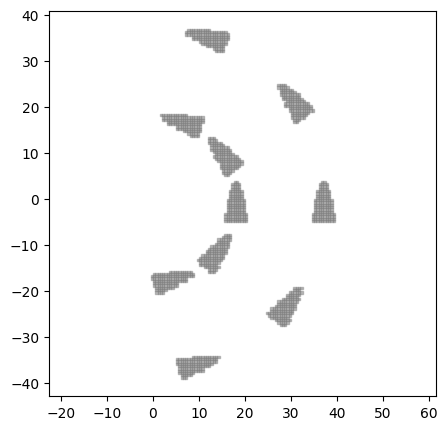

--------------------------------------------------
label: VentHole Chromosome_164: ['DoubleParabolicShape_164', 'CircularStrictTransformation_164']
predict: (0.29091126301754233, 373.2009244, 457.31341719999983)
biased_fitness: 0.7138540646245768, fitness: 0.6883156618245774
shape parameter:
parameter_list: [ lower_coefficient: 1.7829466836218941, upper_coefficient: 2.552088555619248, lower_y-intercept: 2.9634447126337427, upper_y-intercept_from_lower_y: 1.3568478190175086, lower_x_trans: 3.342153345355438, ]
pattern parameter:
parameter_list: [ di: 9.631536587300607, dx: 8.947655528238359, phi: 0.5711986642890533, ]


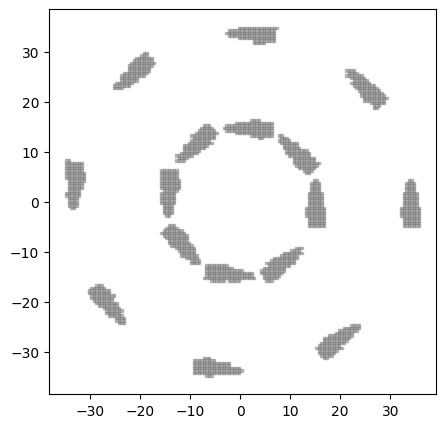

--------------------------------------------------
label: VentHole Chromosome_165: ['DoubleParabolicShape_165', 'CornerTransformation_165']
predict: (0.28869918153538743, 373.50676640000006, 454.78055670000003)
biased_fitness: 0.7388997064461251, fitness: 0.7215715691461251
shape parameter:
parameter_list: [ lower_coefficient: 2.2079811548654042, upper_coefficient: 1.2020440384604099, lower_y-intercept: 1.998248383124031, upper_y-intercept_from_lower_y: 1.5651066770997029, lower_x_trans: -3.384875878219348, ]
pattern parameter:
parameter_list: [ di: 14.539543648338, dx: 8.530706084720022, phi: 0.30025973935241834, rot_count: 4.0, ]


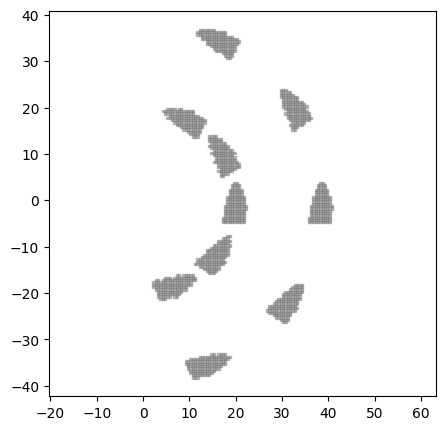

--------------------------------------------------
label: VentHole Chromosome_166: ['DoubleParabolicShape_166', 'CircularStrictTransformation_166']
predict: (0.29270642559391, 373.4534234, 459.6610460999997)
biased_fitness: 0.6894396880609002, fitness: 0.6573633965609011
shape parameter:
parameter_list: [ lower_coefficient: 2.0816964281449195, upper_coefficient: 1.619757035578563, lower_y-intercept: 1.5288302073718543, upper_y-intercept_from_lower_y: 1.9165469695512676, lower_x_trans: 2.9729848465136053, ]
pattern parameter:
parameter_list: [ di: 14.478013437048956, dx: 2.7114620765074915, phi: 0.483321946706122, ]


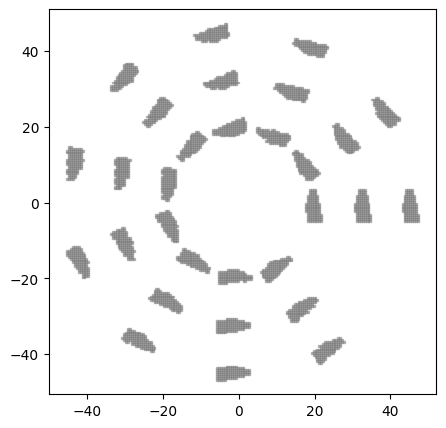

--------------------------------------------------
label: VentHole Chromosome_167: ['DoubleParabolicShape_167', 'GridStrictTransformation_167']
predict: (0.2910951743108663, 373.3354779999999, 457.8628681999999)
biased_fitness: 0.7099741744913377, fitness: 0.6830565258913378
shape parameter:
parameter_list: [ lower_coefficient: 2.9677010202708503, upper_coefficient: 1.2690174329406054, lower_y-intercept: 2.4398632665789313, upper_y-intercept_from_lower_y: 1.7928309347583657, lower_x_trans: 4.966767534283074, ]
pattern parameter:
parameter_list: [ dx: 9.2291826629403, dy: 6.394434043151481, ]


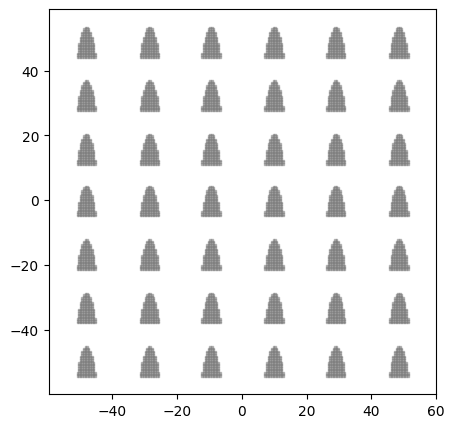

--------------------------------------------------
label: VentHole Chromosome_168: ['DoubleParabolicShape_168', 'GridStrictTransformation_168']
predict: (0.29243112666013893, 373.49915290000007, 458.47491809999985)
biased_fitness: 0.6942448268986104, fitness: 0.665818378398611
shape parameter:
parameter_list: [ lower_coefficient: 1.394218739241662, upper_coefficient: 2.227547471955557, lower_y-intercept: 2.596167392210596, upper_y-intercept_from_lower_y: 1.0868898582187367, lower_x_trans: -2.988117854304532, ]
pattern parameter:
parameter_list: [ dx: 2.3113449423532018, dy: 5.055001120985484, ]


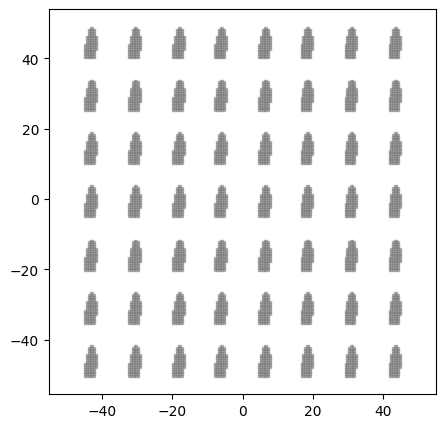

--------------------------------------------------
label: VentHole Chromosome_169: ['DoubleParabolicShape_169', 'CornerTransformation_169']
predict: (0.28973055250568613, 373.04673390000005, 455.6895683999999)
biased_fitness: 0.7299882008431383, fitness: 0.7090129634431387
shape parameter:
parameter_list: [ lower_coefficient: 2.7854425602941126, upper_coefficient: 1.3798268046982223, lower_y-intercept: 2.2341963910701903, upper_y-intercept_from_lower_y: 1.7734078476857873, lower_x_trans: -1.10884326345438, ]
pattern parameter:
parameter_list: [ di: 14.559311561457928, dx: 1.9837638698375493, phi: 0.6834795281385841, rot_count: 3.0, ]


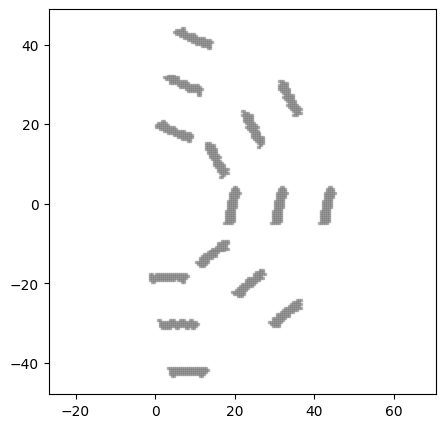

--------------------------------------------------
label: VentHole Chromosome_170: ['DoubleParabolicShape_170', 'GridStrictTransformation_170']
predict: (0.2919641497301768, 373.2538483999999, 455.1403852)
biased_fitness: 0.7073007934982322, fitness: 0.688387334698232
shape parameter:
parameter_list: [ lower_coefficient: 2.6007949595902273, upper_coefficient: 1.5909987792949138, lower_y-intercept: 2.084394065564382, upper_y-intercept_from_lower_y: 1.4459064600507483, lower_x_trans: -1.9337811311802122, ]
pattern parameter:
parameter_list: [ dx: 2.400147156219253, dy: 3.957156587412237, ]


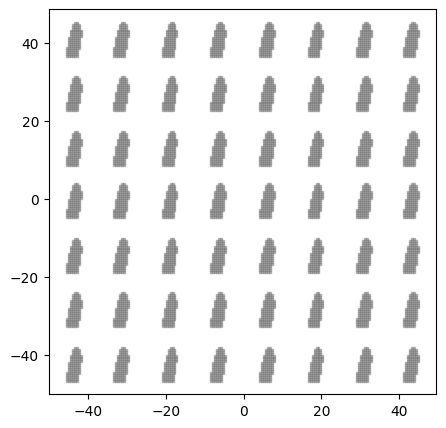

--------------------------------------------------
label: VentHole Chromosome_171: ['DoubleParabolicShape_171', 'CornerTransformation_171']
predict: (0.28946046624012434, 373.39080949999993, 456.29968679999985)
biased_fitness: 0.7290602974987572, fitness: 0.7069428560987576
shape parameter:
parameter_list: [ lower_coefficient: 2.914810079711076, upper_coefficient: 1.2361351241006442, lower_y-intercept: 1.1620216126177891, upper_y-intercept_from_lower_y: 1.4901636453676117, lower_x_trans: 0.41828036723579576, ]
pattern parameter:
parameter_list: [ di: 9.678706335834496, dx: 9.24809845085456, phi: 0.5872242142059225, rot_count: 6.0, ]


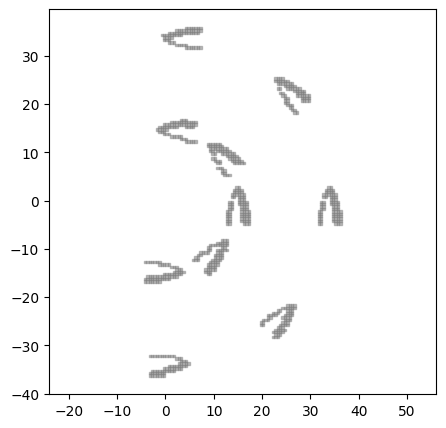

--------------------------------------------------
label: VentHole Chromosome_172: ['DoubleParabolicShape_172', 'CircularStrictTransformation_172']
predict: (0.29033076165189664, 373.7195236999999, 455.73738410000004)
biased_fitness: 0.719180949381034, fitness: 0.6994078444810338
shape parameter:
parameter_list: [ lower_coefficient: 2.5471211393503443, upper_coefficient: 2.5691598523827106, lower_y-intercept: 1.4459417775460468, upper_y-intercept_from_lower_y: 1.6335130302366982, lower_x_trans: -3.031795737643498, ]
pattern parameter:
parameter_list: [ di: 14.847090592424859, dx: 8.345074017972086, phi: 0.6283185307179586, ]


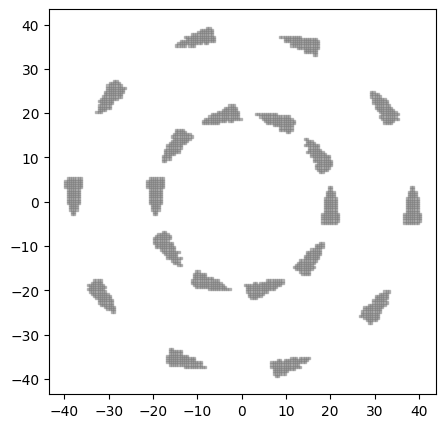

--------------------------------------------------
label: VentHole Chromosome_173: ['DoubleParabolicShape_173', 'GridStrictTransformation_173']
predict: (0.2911773693447359, 373.23643560000005, 454.2789120000001)
biased_fitness: 0.71701343335264, fitness: 0.7006495685526398
shape parameter:
parameter_list: [ lower_coefficient: 1.7477931426999123, upper_coefficient: 2.35316253232122, lower_y-intercept: 3.792656371088471, upper_y-intercept_from_lower_y: 1.2253101954905778, lower_x_trans: -2.1680067461817853, ]
pattern parameter:
parameter_list: [ dx: 3.8323370149631835, dy: 9.773704216777947, ]


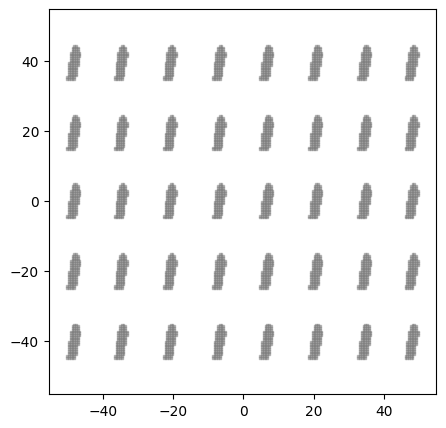

--------------------------------------------------
label: VentHole Chromosome_174: ['DoubleParabolicShape_174', 'CornerTransformation_174']
predict: (0.29016404552938524, 373.03294229999983, 458.32145879999985)
biased_fitness: 0.7204860310061489, fitness: 0.6915875392061491
shape parameter:
parameter_list: [ lower_coefficient: 1.9246848085484987, upper_coefficient: 2.0489038023456128, lower_y-intercept: 1.2956659079282618, upper_y-intercept_from_lower_y: 1.1989318924562933, lower_x_trans: -2.72859119908155, ]
pattern parameter:
parameter_list: [ di: 10.591543341738099, dx: 1.4980390035304803, phi: 0.49238144754963675, rot_count: 3.0, ]


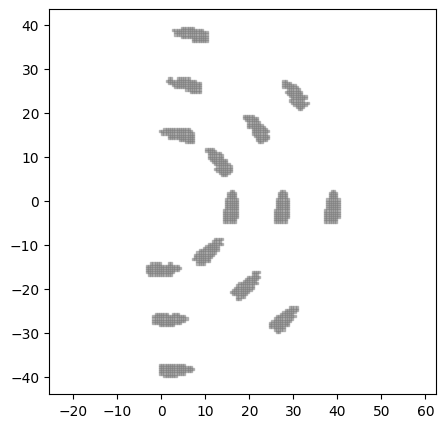

--------------------------------------------------
label: VentHole Chromosome_175: ['DoubleParabolicShape_175', 'GridStrictTransformation_175']
predict: (0.2881385001276726, 372.95837009999997, 457.1201678)
biased_fitness: 0.743666072423274, fitness: 0.7182223092232739
shape parameter:
parameter_list: [ lower_coefficient: 1.3769583884747196, upper_coefficient: 2.9754960470217, lower_y-intercept: 1.2971403885590855, upper_y-intercept_from_lower_y: 1.9991495549856386, lower_x_trans: 1.007488029670566, ]
pattern parameter:
parameter_list: [ dx: 4.908906710779124, dy: 9.639478210598849, ]


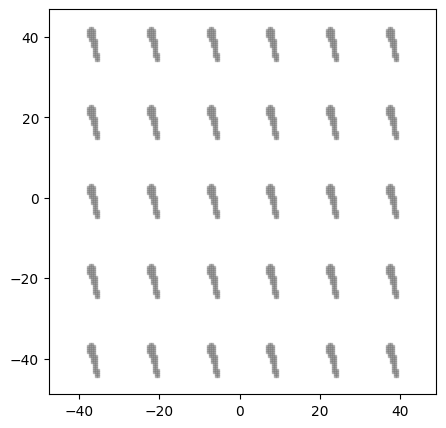

--------------------------------------------------
label: VentHole Chromosome_176: ['DoubleParabolicShape_176', 'CircularStrictTransformation_176']
predict: (0.28864705352442055, 372.99440290000007, 456.37817269999994)
biased_fitness: 0.7398122990557939, fitness: 0.7166665867557943
shape parameter:
parameter_list: [ lower_coefficient: 1.1135148167464113, upper_coefficient: 2.2672821269350982, lower_y-intercept: 2.4102394659129343, upper_y-intercept_from_lower_y: 1.7807332787412224, lower_x_trans: 0.4123472404821449, ]
pattern parameter:
parameter_list: [ di: 14.502211231350234, dx: 1.6071107024489604, phi: 0.7853981633974483, ]


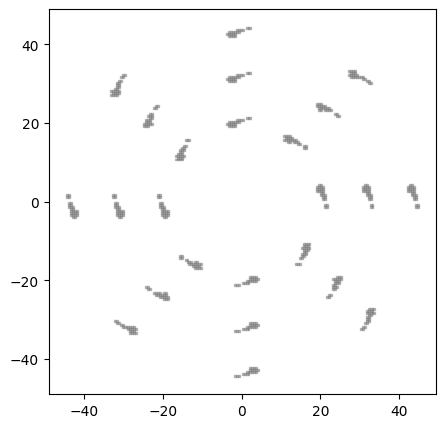

--------------------------------------------------
label: VentHole Chromosome_177: ['DoubleParabolicShape_177', 'CornerTransformation_177']
predict: (0.29113867552069683, 373.3459510000003, 456.2010925000001)
biased_fitness: 0.7127894027930293, fitness: 0.6908780272930297
shape parameter:
parameter_list: [ lower_coefficient: 1.9441499969667806, upper_coefficient: 1.8855551884810133, lower_y-intercept: 2.059148763983563, upper_y-intercept_from_lower_y: 1.4907904126817861, lower_x_trans: 3.7129528799866947, ]
pattern parameter:
parameter_list: [ di: 10.497434149651513, dx: 0.9345484243924533, phi: 0.783241773342563, rot_count: 5.0, ]


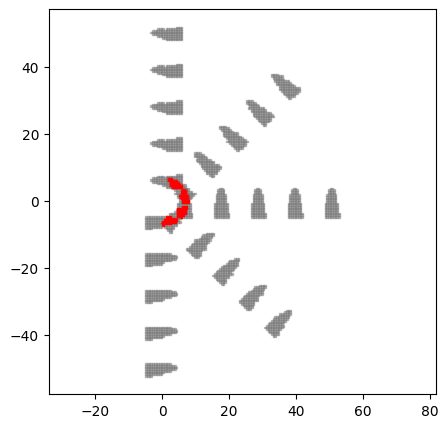

--------------------------------------------------
label: VentHole Chromosome_178: ['DoubleParabolicShape_178', 'CircularStrictTransformation_178']
predict: (0.28930579287859715, 373.31474449999973, 457.70391)
biased_fitness: 0.7283310397140303, fitness: 0.7018487987140297
shape parameter:
parameter_list: [ lower_coefficient: 1.7267563504357228, upper_coefficient: 2.353993204163798, lower_y-intercept: 1.0200847378247595, upper_y-intercept_from_lower_y: 1.0398480038842237, lower_x_trans: -0.44262014041657416, ]
pattern parameter:
parameter_list: [ di: 14.459868273191837, dx: 2.052229455404343, phi: 0.6981317007977318, ]


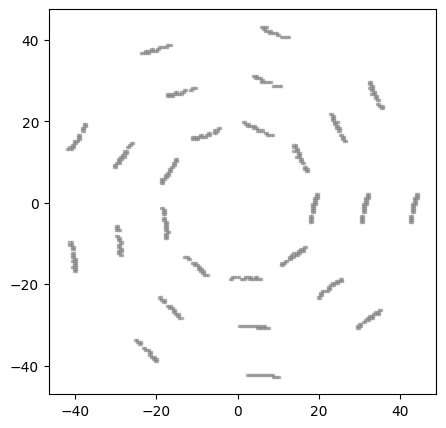

--------------------------------------------------
label: VentHole Chromosome_179: ['DoubleParabolicShape_179', 'CircularStrictTransformation_179']
predict: (0.2900062626867079, 372.71438780000005, 457.76512359999987)
biased_fitness: 0.7254064113329204, fitness: 0.697539816132921
shape parameter:
parameter_list: [ lower_coefficient: 1.440630191527964, upper_coefficient: 2.419010797797375, lower_y-intercept: 3.9564821147034417, upper_y-intercept_from_lower_y: 1.7387007077082213, lower_x_trans: 2.8598840044371308, ]
pattern parameter:
parameter_list: [ di: 11.144261474622995, dx: 7.4637575838641945, phi: 0.6981317007977318, ]


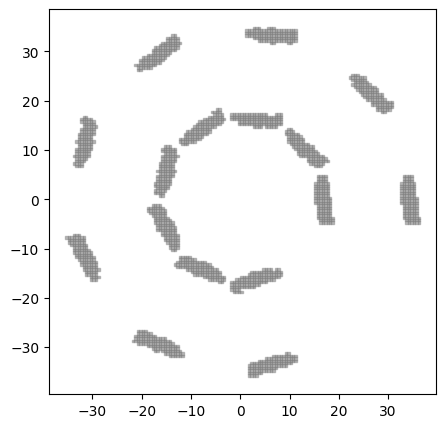

--------------------------------------------------
label: VentHole Chromosome_180: ['DoubleParabolicShape_180', 'CornerTransformation_180']
predict: (0.2900271663803653, 373.1758320000001, 458.910001)
biased_fitness: 0.719677510196346, fitness: 0.6892991711963462
shape parameter:
parameter_list: [ lower_coefficient: 2.672877144287038, upper_coefficient: 2.0036201394705255, lower_y-intercept: 3.549521094695825, upper_y-intercept_from_lower_y: 1.475383174432774, lower_x_trans: -2.5875092217730633, ]
pattern parameter:
parameter_list: [ di: 11.372544367512543, dx: 6.104489394072817, phi: 0.3648228263666061, rot_count: 5.0, ]


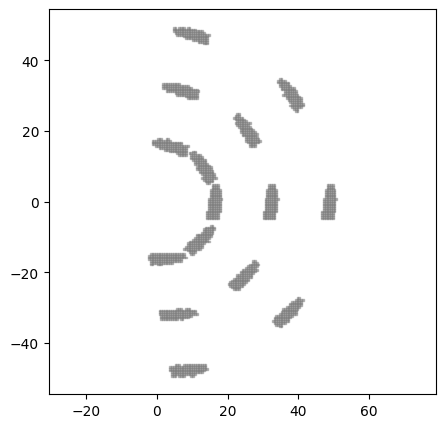

--------------------------------------------------
label: VentHole Chromosome_181: ['DoubleParabolicShape_181', 'GridStrictTransformation_181']
predict: (0.2922798345278066, 373.1140954, 459.31422639999965)
biased_fitness: 0.6967745341219347, fitness: 0.6650600457219357
shape parameter:
parameter_list: [ lower_coefficient: 2.227216382423446, upper_coefficient: 1.844399341349719, lower_y-intercept: 3.055444446306896, upper_y-intercept_from_lower_y: 1.0744690922061924, lower_x_trans: -3.4305820311922384, ]
pattern parameter:
parameter_list: [ dx: 3.568581110187731, dy: 1.8521915720895363, ]


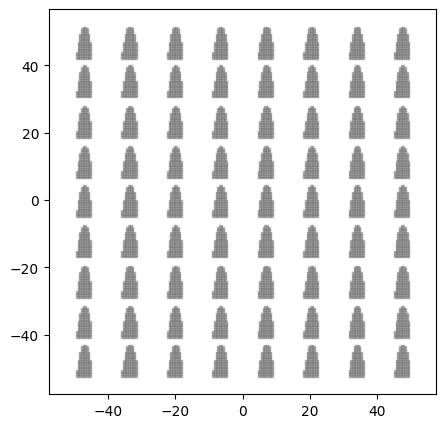

--------------------------------------------------
label: VentHole Chromosome_182: ['DoubleParabolicShape_182', 'CornerTransformation_182']
predict: (0.2900798258083712, 373.49995969999986, 458.4188044)
biased_fitness: 0.7178644152162886, fitness: 0.6896079214162883
shape parameter:
parameter_list: [ lower_coefficient: 2.410708415469337, upper_coefficient: 1.8393846960747589, lower_y-intercept: 1.0130780004776028, upper_y-intercept_from_lower_y: 1.9640783868563612, lower_x_trans: -3.2346544240931365, ]
pattern parameter:
parameter_list: [ di: 12.645082724223016, dx: 4.117789132848067, phi: 0.5347055686189415, rot_count: 4.0, ]


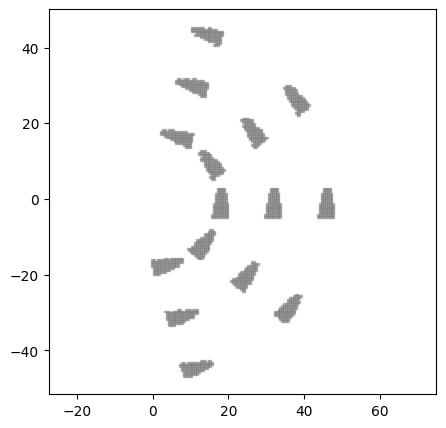

--------------------------------------------------
label: VentHole Chromosome_183: ['DoubleParabolicShape_183', 'CircularStrictTransformation_183']
predict: (0.290159005726196, 373.10320770000016, 456.3883467999998)
biased_fitness: 0.7239107952380389, fitness: 0.7009521702380399
shape parameter:
parameter_list: [ lower_coefficient: 1.5408442114979246, upper_coefficient: 2.928931182446834, lower_y-intercept: 3.989423182748555, upper_y-intercept_from_lower_y: 1.2319089695201941, lower_x_trans: 1.8428473500056128, ]
pattern parameter:
parameter_list: [ di: 9.907502948240722, dx: 1.172069860281014, phi: 0.36959913571644626, ]


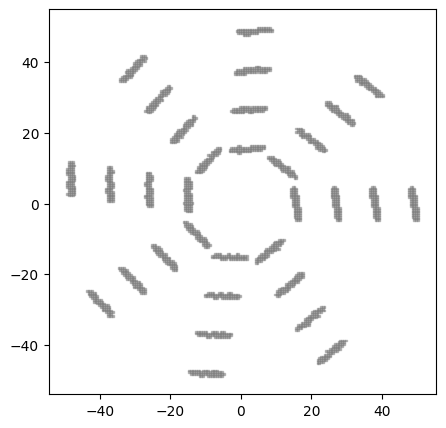

--------------------------------------------------
label: VentHole Chromosome_184: ['DoubleParabolicShape_184', 'GridStrictTransformation_184']
predict: (0.2915519792060648, 373.4336163, 456.85242339999974)
biased_fitness: 0.7067400470393526, fitness: 0.6830500094393533
shape parameter:
parameter_list: [ lower_coefficient: 2.7758562462942677, upper_coefficient: 2.1450541239959193, lower_y-intercept: 1.3974541931836986, upper_y-intercept_from_lower_y: 1.282198287357355, lower_x_trans: 0.2865069579389248, ]
pattern parameter:
parameter_list: [ dx: 0.6330657976379043, dy: 9.898437096265857, ]


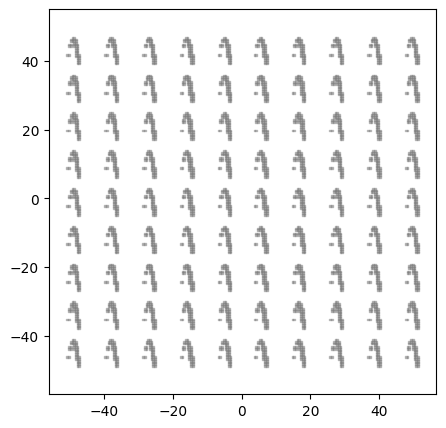

--------------------------------------------------
label: VentHole Chromosome_185: ['DoubleParabolicShape_185', 'CornerTransformation_185']
predict: (0.29117493306723197, 373.4393829000001, 455.4738673)
biased_fitness: 0.7132272544276793, fitness: 0.6936844183276797
shape parameter:
parameter_list: [ lower_coefficient: 2.686145703959168, upper_coefficient: 1.7280081468588226, lower_y-intercept: 2.633798814924967, upper_y-intercept_from_lower_y: 1.5912589104159802, lower_x_trans: 1.7717104297785706, ]
pattern parameter:
parameter_list: [ di: 8.935168627067542, dx: 0.8943805480361096, phi: 0.3713886682789964, rot_count: 5.0, ]


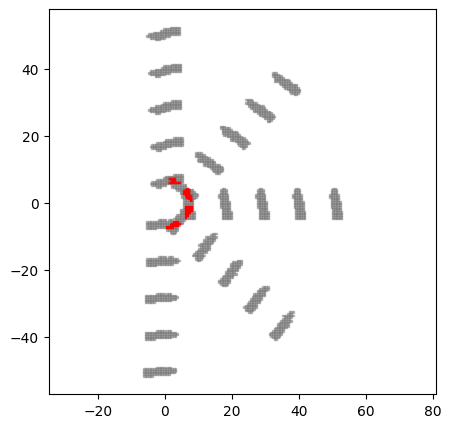

--------------------------------------------------
label: VentHole Chromosome_186: ['DoubleParabolicShape_186', 'CircularStrictTransformation_186']
predict: (0.29205330716126787, 373.17497149999997, 460.07495899999986)
biased_fitness: 0.6970922098873217, fitness: 0.663217275887322
shape parameter:
parameter_list: [ lower_coefficient: 2.556898523694264, upper_coefficient: 2.148360940741166, lower_y-intercept: 3.318898215840351, upper_y-intercept_from_lower_y: 1.1674280729761257, lower_x_trans: 3.8358557032094893, ]
pattern parameter:
parameter_list: [ di: 11.866288080438887, dx: 3.4567635445149802, phi: 0.6981317007977318, ]


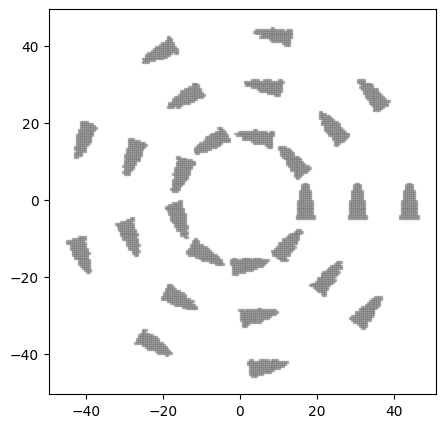

--------------------------------------------------
label: VentHole Chromosome_187: ['DoubleParabolicShape_187', 'CircularStrictTransformation_187']
predict: (0.2898749567614738, 373.07354889999993, 454.7671953000001)
biased_fitness: 0.7302011994852623, fitness: 0.7120467113852619
shape parameter:
parameter_list: [ lower_coefficient: 1.5265792486745682, upper_coefficient: 1.8184899830489156, lower_y-intercept: 1.1080458737384316, upper_y-intercept_from_lower_y: 1.8838134874927766, lower_x_trans: 4.558901653796047, ]
pattern parameter:
parameter_list: [ di: 12.883378992520083, dx: 9.831475648431836, phi: 0.41887902047863906, ]


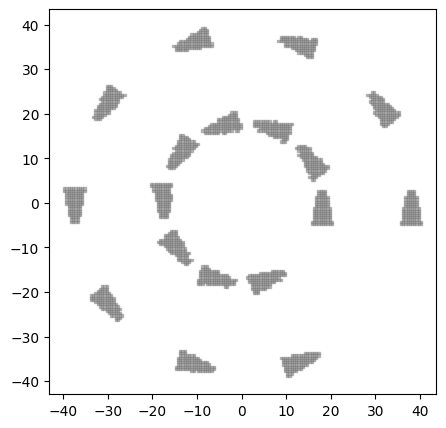

--------------------------------------------------
label: VentHole Chromosome_188: ['DoubleParabolicShape_188', 'GridStrictTransformation_188']
predict: (0.29177538684527304, 373.4363228999998, 460.09314799999987)
biased_fitness: 0.6980055752472709, fitness: 0.664598777047271
shape parameter:
parameter_list: [ lower_coefficient: 1.084872326255921, upper_coefficient: 2.079571985737734, lower_y-intercept: 1.6610512573813323, upper_y-intercept_from_lower_y: 1.7938249156328199, lower_x_trans: -1.5736140479815033, ]
pattern parameter:
parameter_list: [ dx: 0.7131406999466976, dy: 3.921096930713608, ]


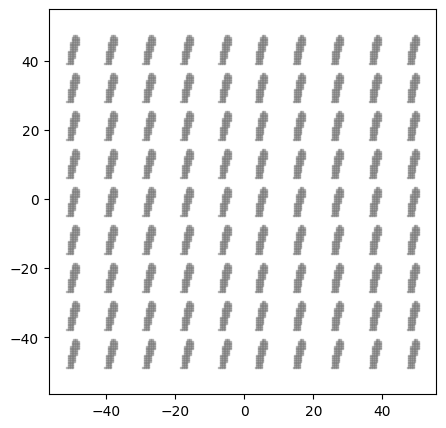

--------------------------------------------------
label: VentHole Chromosome_189: ['DoubleParabolicShape_189', 'CircularStrictTransformation_189']
predict: (0.28898412505689075, 373.1190502, 457.009709)
biased_fitness: 0.7343059800310924, fitness: 0.7095149534310924
shape parameter:
parameter_list: [ lower_coefficient: 1.3965159670583358, upper_coefficient: 2.146197689336079, lower_y-intercept: 3.2750180110746867, upper_y-intercept_from_lower_y: 1.5023103954872936, lower_x_trans: 0.49350080460752643, ]
pattern parameter:
parameter_list: [ di: 14.862278018166926, dx: 2.358251596564294, phi: 0.6981317007977318, ]


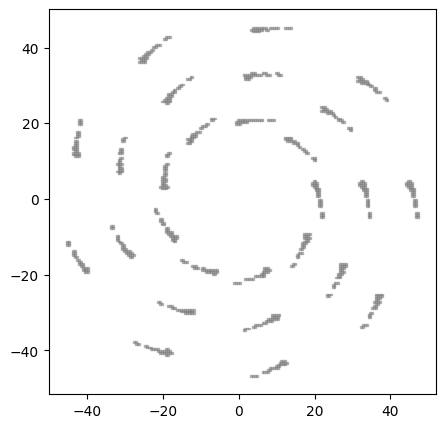

--------------------------------------------------
label: VentHole Chromosome_190: ['DoubleParabolicShape_190', 'CircularStrictTransformation_190']
predict: (0.28940692688469927, 372.73658360000013, 459.2857173)
biased_fitness: 0.7282032113530064, fitness: 0.6958192266530067
shape parameter:
parameter_list: [ lower_coefficient: 2.0972646758572364, upper_coefficient: 2.4959645523686493, lower_y-intercept: 2.3035440274894174, upper_y-intercept_from_lower_y: 1.430277243747102, lower_x_trans: -0.8902439322834734, ]
pattern parameter:
parameter_list: [ di: 11.33647783987536, dx: 7.428738355908102, phi: 0.6283185307179586, ]


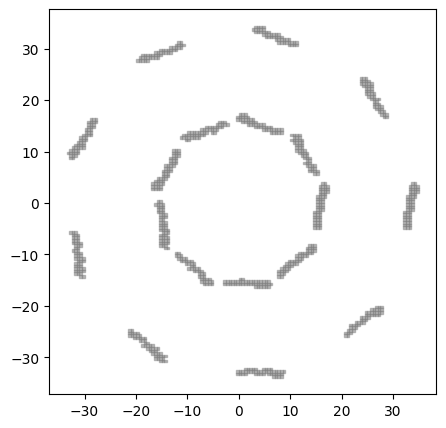

--------------------------------------------------
label: VentHole Chromosome_191: ['DoubleParabolicShape_191', 'GridStrictTransformation_191']
predict: (0.29160155309949864, 373.7856055999998, 460.2293209000001)
biased_fitness: 0.6970265880050144, fitness: 0.6639098365050137
shape parameter:
parameter_list: [ lower_coefficient: 2.8417045018817637, upper_coefficient: 2.5974588471971183, lower_y-intercept: 2.0508858485005597, upper_y-intercept_from_lower_y: 1.3511089108131775, lower_x_trans: -2.4134066064142057, ]
pattern parameter:
parameter_list: [ dx: 0.5163229267175878, dy: 5.157153576580614, ]


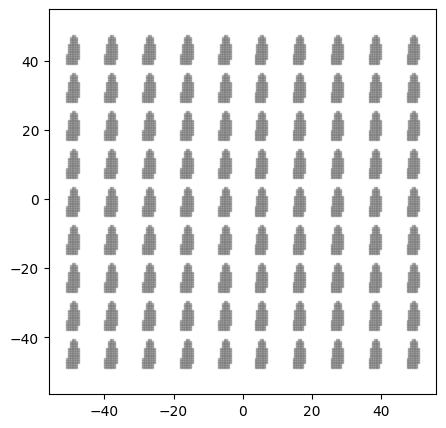

--------------------------------------------------
label: VentHole Chromosome_192: ['DoubleParabolicShape_192', 'CornerTransformation_192']
predict: (0.28903667040020675, 372.9740248999999, 457.4613396000001)
biased_fitness: 0.7338924424979328, fitness: 0.7074564734979324
shape parameter:
parameter_list: [ lower_coefficient: 2.2595144172324115, upper_coefficient: 2.8779271710090306, lower_y-intercept: 1.227226817233997, upper_y-intercept_from_lower_y: 1.867079003646174, lower_x_trans: -3.8560321672981424, ]
pattern parameter:
parameter_list: [ di: 7.803010313267096, dx: 9.957787661911418, phi: 0.5774779200896767, rot_count: 3.0, ]


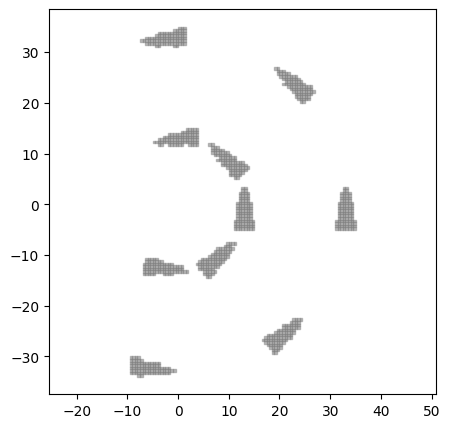

--------------------------------------------------
label: VentHole Chromosome_193: ['DoubleParabolicShape_193', 'CircularStrictTransformation_193']
predict: (0.2897268870801559, 373.5479675, 456.3135582999998)
biased_fitness: 0.7252682400984408, fitness: 0.7034235001984416
shape parameter:
parameter_list: [ lower_coefficient: 1.409359845597411, upper_coefficient: 2.5268641635222364, lower_y-intercept: 2.4137524899544576, upper_y-intercept_from_lower_y: 1.0815822622682245, lower_x_trans: 1.9041189750803067, ]
pattern parameter:
parameter_list: [ di: 13.811613377696833, dx: 7.125317895452776, phi: 0.4487989505128276, ]


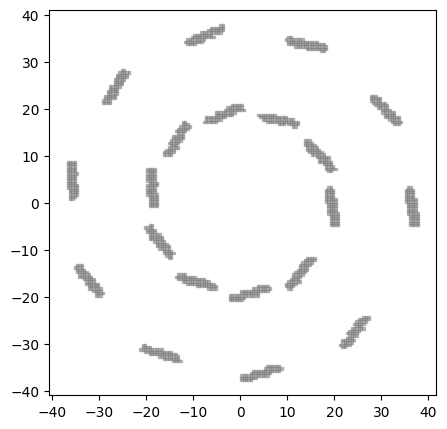

--------------------------------------------------
label: VentHole Chromosome_194: ['DoubleParabolicShape_194', 'GridStrictTransformation_194']
predict: (0.2911624859599864, 372.5710196999999, 456.78549119999997)
biased_fitness: 0.7168070201001366, fitness: 0.6915925859001366
shape parameter:
parameter_list: [ lower_coefficient: 2.1568233745775744, upper_coefficient: 2.4543529438163825, lower_y-intercept: 3.8214412535770945, upper_y-intercept_from_lower_y: 1.478246223254677, lower_x_trans: -1.5340466482456359, ]
pattern parameter:
parameter_list: [ dx: 6.846853318174493, dy: 6.101766528781426, ]


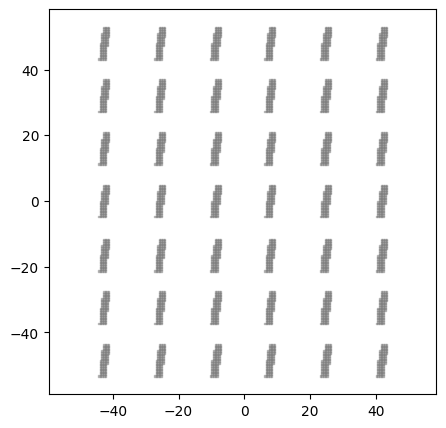

--------------------------------------------------
label: VentHole Chromosome_195: ['DoubleParabolicShape_195', 'CornerTransformation_195']
predict: (0.2901018707186387, 373.2256342, 461.33171249999987)
biased_fitness: 0.7137384284136131, fitness: 0.6761945593136136
shape parameter:
parameter_list: [ lower_coefficient: 1.6574568312259081, upper_coefficient: 2.73782788729336, lower_y-intercept: 3.5367291240144514, upper_y-intercept_from_lower_y: 1.1198006006789116, lower_x_trans: 3.5234632120656997, ]
pattern parameter:
parameter_list: [ di: 8.33937004215679, dx: 5.176909280728655, phi: 0.5685295035805216, rot_count: 4.0, ]


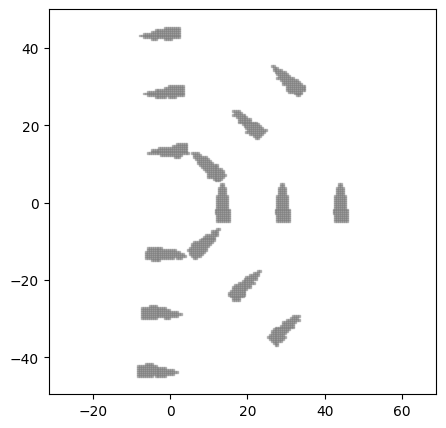

--------------------------------------------------
label: VentHole Chromosome_196: ['DoubleParabolicShape_196', 'CircularStrictTransformation_196']
predict: (0.2900863685633359, 373.0505214, 458.42997639999993)
biased_fitness: 0.7209227117666409, fitness: 0.6917338253666411
shape parameter:
parameter_list: [ lower_coefficient: 2.6017227646307144, upper_coefficient: 2.618235748307285, lower_y-intercept: 1.8942796274470868, upper_y-intercept_from_lower_y: 1.3473165120988564, lower_x_trans: 4.077480550969227, ]
pattern parameter:
parameter_list: [ di: 10.167301178728504, dx: 8.599098233096875, phi: 0.39269908169872414, ]


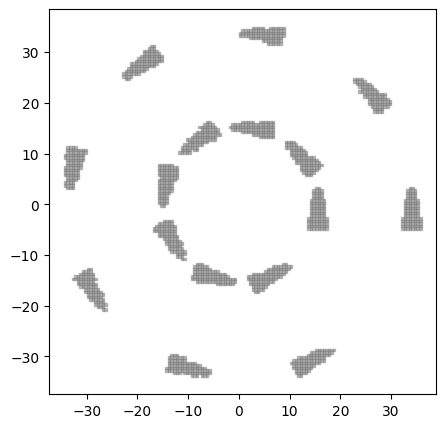

--------------------------------------------------
label: VentHole Chromosome_197: ['DoubleParabolicShape_197', 'CircularStrictTransformation_197']
predict: (0.2889389067847348, 373.3729523, 456.4089541999999)
biased_fitness: 0.7341823576526523, fitness: 0.7117013996526526
shape parameter:
parameter_list: [ lower_coefficient: 2.6448184313819874, upper_coefficient: 2.4707048948163033, lower_y-intercept: 2.260115324494253, upper_y-intercept_from_lower_y: 1.8481825168170811, lower_x_trans: 0.5056328578634215, ]
pattern parameter:
parameter_list: [ di: 12.729757961438983, dx: 9.237643000116526, phi: 0.36959913571644626, ]


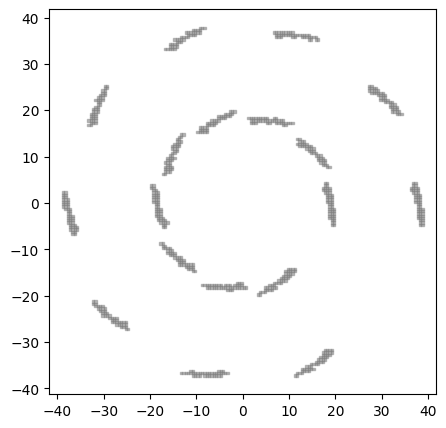

--------------------------------------------------
label: VentHole Chromosome_198: ['DoubleParabolicShape_198', 'GridStrictTransformation_198']
predict: (0.29117682580448667, 372.94308359999997, 456.64534670000006)
biased_fitness: 0.7143394633551332, fitness: 0.690289590455133
shape parameter:
parameter_list: [ lower_coefficient: 1.5455931161979386, upper_coefficient: 2.959465888798915, lower_y-intercept: 2.7998047862058684, upper_y-intercept_from_lower_y: 1.9252283095681781, lower_x_trans: 1.041884039104671, ]
pattern parameter:
parameter_list: [ dx: 2.4684545774631905, dy: 7.911483504168636, ]


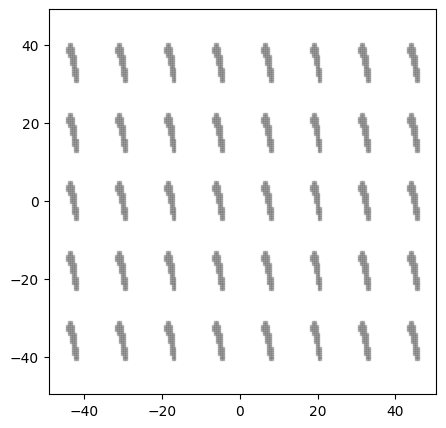

--------------------------------------------------
label: VentHole Chromosome_199: ['DoubleParabolicShape_199', 'CircularStrictTransformation_199']
predict: (0.2913954969567336, 373.8447657999998, 457.1486133999999)
biased_fitness: 0.7048344430326656, fitness: 0.6810781344326655
shape parameter:
parameter_list: [ lower_coefficient: 2.9378535328104682, upper_coefficient: 1.0584751578793863, lower_y-intercept: 1.2136764085176739, upper_y-intercept_from_lower_y: 1.1284156606220153, lower_x_trans: -3.205772556493083, ]
pattern parameter:
parameter_list: [ di: 14.688799795837102, dx: 5.373551213537889, phi: 0.4487989505128276, ]


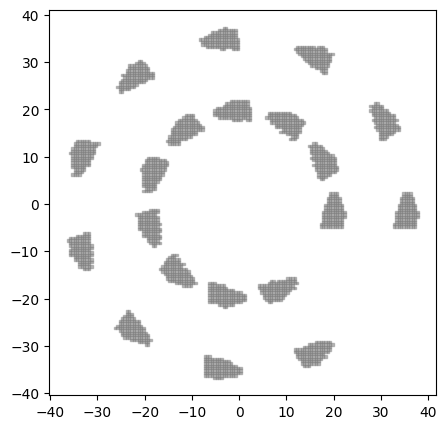

--------------------------------------------------
label: VentHole Chromosome_200: ['DoubleParabolicShape_200', 'CornerTransformation_200']
predict: (0.2904083179048844, 373.2371753999999, 457.13407749999976)
biased_fitness: 0.7189884381511569, fitness: 0.6940605564511574
shape parameter:
parameter_list: [ lower_coefficient: 1.1077311609629412, upper_coefficient: 1.874435290459448, lower_y-intercept: 1.9643480428776718, upper_y-intercept_from_lower_y: 1.6181536755500456, lower_x_trans: -2.9390700760715838, ]
pattern parameter:
parameter_list: [ di: 9.768587315222224, dx: 5.9803817596879485, phi: 0.46986780073332635, rot_count: 4.0, ]


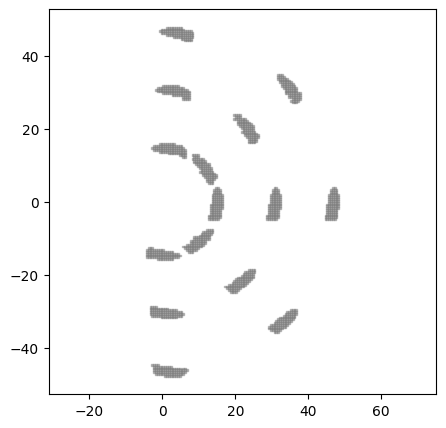

--------------------------------------------------
label: VentHole Chromosome_201: ['DoubleParabolicShape_201', 'GridStrictTransformation_201']
predict: (0.29361281529074157, 373.3477848, 457.3420313000001)
biased_fitness: 0.6857532908925841, fitness: 0.6604227665925838
shape parameter:
parameter_list: [ lower_coefficient: 1.492293014718051, upper_coefficient: 2.30104773725033, lower_y-intercept: 1.3142476936075174, upper_y-intercept_from_lower_y: 1.343154802571453, lower_x_trans: -4.986710169540727, ]
pattern parameter:
parameter_list: [ dx: 2.6043138365702854, dy: 3.6176053886972848, ]


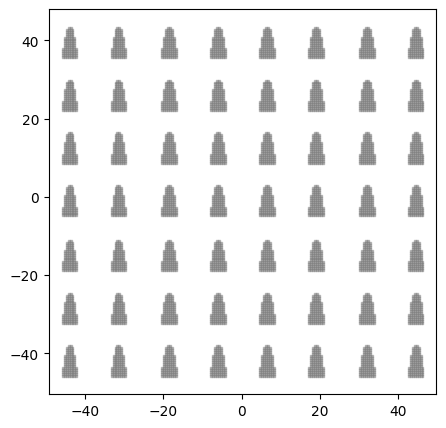

--------------------------------------------------
label: VentHole Chromosome_202: ['DoubleParabolicShape_202', 'GridStrictTransformation_202']
predict: (0.2917518978405358, 373.67222359999994, 457.39603569999986)
biased_fitness: 0.7019833849946426, fitness: 0.677139725094643
shape parameter:
parameter_list: [ lower_coefficient: 1.7328970616821973, upper_coefficient: 1.0652622054708596, lower_y-intercept: 3.6980463758327344, upper_y-intercept_from_lower_y: 1.7767164404334221, lower_x_trans: 1.396249370404191, ]
pattern parameter:
parameter_list: [ dx: 9.84878565409245, dy: 5.366406482938617, ]


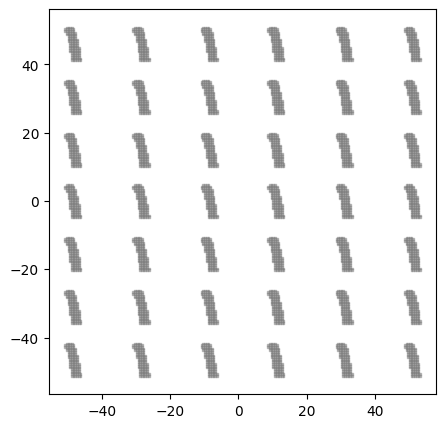

--------------------------------------------------
label: VentHole Chromosome_203: ['DoubleParabolicShape_203', 'CircularStrictTransformation_203']
predict: (0.28863678316556785, 372.85657920000006, 455.9412746999999)
biased_fitness: 0.7417535645443212, fitness: 0.7196428988443216
shape parameter:
parameter_list: [ lower_coefficient: 1.574624429175461, upper_coefficient: 2.282401752550407, lower_y-intercept: 3.299208407658449, upper_y-intercept_from_lower_y: 1.2194370049920407, lower_x_trans: 0.4010667982444023, ]
pattern parameter:
parameter_list: [ di: 12.136943999596383, dx: 8.749495602549697, phi: 0.7853981633974483, ]


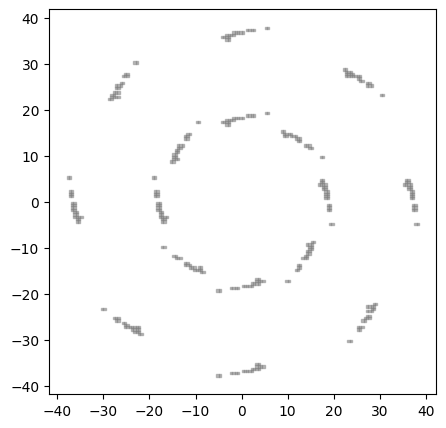

--------------------------------------------------
label: VentHole Chromosome_204: ['DoubleParabolicShape_204', 'GridStrictTransformation_204']
predict: (0.2914988821628044, 373.2170741999997, 459.82792010000014)
biased_fitness: 0.7028358187719579, fitness: 0.6697862068719569
shape parameter:
parameter_list: [ lower_coefficient: 2.3982965156168103, upper_coefficient: 1.703313374685985, lower_y-intercept: 3.6642327915710107, upper_y-intercept_from_lower_y: 1.6722207737999089, lower_x_trans: -1.808117426117346, ]
pattern parameter:
parameter_list: [ dx: 8.381578871696247, dy: 5.6411292904260995, ]


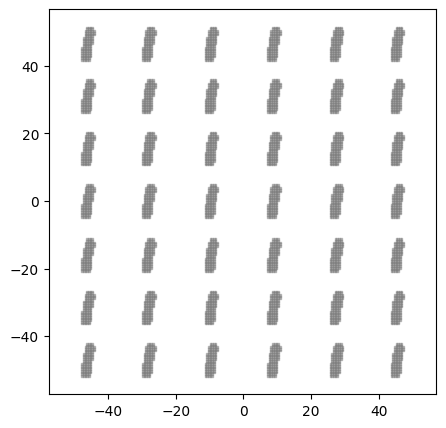

--------------------------------------------------
label: VentHole Chromosome_205: ['DoubleParabolicShape_205', 'GridStrictTransformation_205']
predict: (0.2916283645767943, 373.0927566000001, 458.02429139999987)
biased_fitness: 0.7060184752320564, fitness: 0.678131114232057
shape parameter:
parameter_list: [ lower_coefficient: 1.863977794862893, upper_coefficient: 2.1820330364866614, lower_y-intercept: 3.1277667880069457, upper_y-intercept_from_lower_y: 1.7515192201504224, lower_x_trans: 3.810526638277951, ]
pattern parameter:
parameter_list: [ dx: 8.756743636067856, dy: 2.5502364559520383, ]


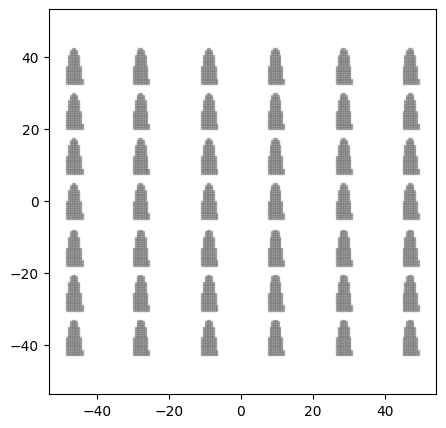

--------------------------------------------------
label: VentHole Chromosome_206: ['DoubleParabolicShape_206', 'CornerTransformation_206']
predict: (0.28895790451633907, 373.16752389999994, 457.3424197999999)
biased_fitness: 0.7335634479366098, fitness: 0.70787123633661
shape parameter:
parameter_list: [ lower_coefficient: 1.7189086921110075, upper_coefficient: 1.5600625928966818, lower_y-intercept: 2.600640753992142, upper_y-intercept_from_lower_y: 1.4275484718814702, lower_x_trans: -0.14012465393318863, ]
pattern parameter:
parameter_list: [ di: 13.251465564001006, dx: 5.869773562498155, phi: 0.7451475477719713, rot_count: 2.0, ]


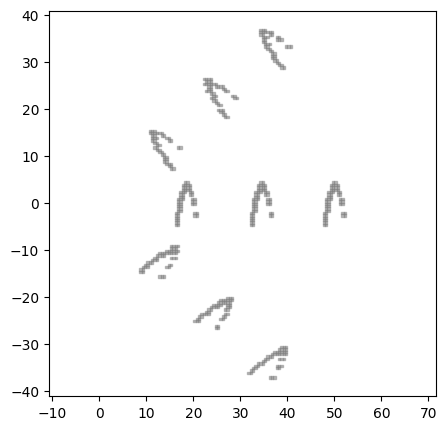

--------------------------------------------------
label: VentHole Chromosome_207: ['DoubleParabolicShape_207', 'GridStrictTransformation_207']
predict: (0.29193012021544895, 373.2730288000001, 456.04932949999994)
biased_fitness: 0.7056889372455099, fitness: 0.6840870063455102
shape parameter:
parameter_list: [ lower_coefficient: 1.9842447590017587, upper_coefficient: 2.7747062530281656, lower_y-intercept: 1.0597387704003889, upper_y-intercept_from_lower_y: 1.3619531732852095, lower_x_trans: -2.4458120242762327, ]
pattern parameter:
parameter_list: [ dx: 2.499543152015714, dy: 8.031634043261413, ]


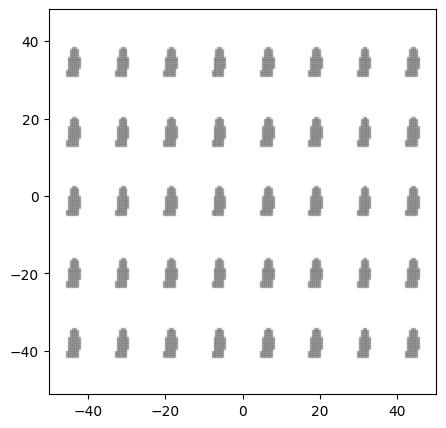

--------------------------------------------------
label: VentHole Chromosome_208: ['DoubleParabolicShape_208', 'CornerTransformation_208']
predict: (0.2901522155342309, 373.20004149999994, 458.23528320000014)
biased_fitness: 0.7196069877576913, fitness: 0.6913012211576908
shape parameter:
parameter_list: [ lower_coefficient: 2.0126061859449096, upper_coefficient: 2.776829321277374, lower_y-intercept: 2.8343596014202266, upper_y-intercept_from_lower_y: 1.2641155151667114, lower_x_trans: 1.7335136256100014, ]
pattern parameter:
parameter_list: [ di: 8.076774547083298, dx: 2.869965831550961, phi: 0.6534398832332728, rot_count: 6.0, ]


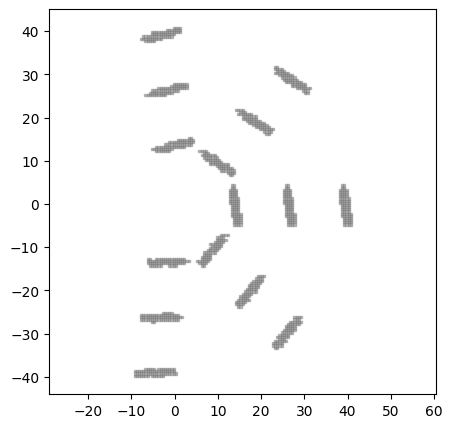

--------------------------------------------------
label: VentHole Chromosome_209: ['DoubleParabolicShape_209', 'CornerTransformation_209']
predict: (0.29079169082010825, 372.9158611, 458.975452)
biased_fitness: 0.7137211600989175, fitness: 0.6826265262989174
shape parameter:
parameter_list: [ lower_coefficient: 2.1106077664998497, upper_coefficient: 2.315469120406986, lower_y-intercept: 1.9470430139449437, upper_y-intercept_from_lower_y: 1.363792490933876, lower_x_trans: 4.088540537415419, ]
pattern parameter:
parameter_list: [ di: 9.258976817972398, dx: 1.557731020527726, phi: 0.37924283917453927, rot_count: 4.0, ]


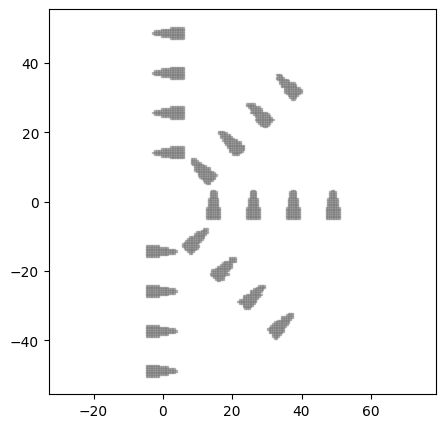

--------------------------------------------------
label: VentHole Chromosome_210: ['DoubleParabolicShape_210', 'GridStrictTransformation_210']
predict: (0.28985156751803864, 372.9894518999999, 459.36711310000004)
biased_fitness: 0.721823935319614, fitness: 0.6897014998196137
shape parameter:
parameter_list: [ lower_coefficient: 2.219157936421897, upper_coefficient: 1.8492358139810936, lower_y-intercept: 1.1036450298953544, upper_y-intercept_from_lower_y: 1.8044122789930181, lower_x_trans: -2.456757437026933, ]
pattern parameter:
parameter_list: [ dx: 4.792584511875679, dy: 3.2428653446607534, ]


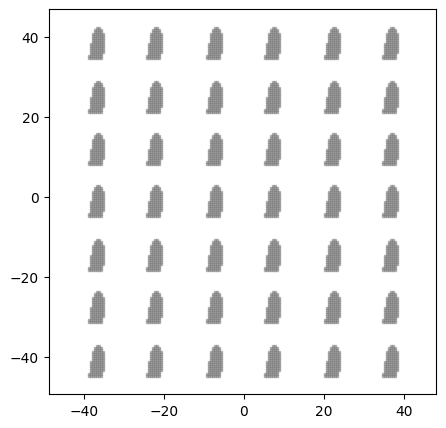

--------------------------------------------------
label: VentHole Chromosome_211: ['DoubleParabolicShape_211', 'GridStrictTransformation_211']
predict: (0.2910364140569981, 373.6637101, 456.00800249999986)
biased_fitness: 0.7119738837300191, fitness: 0.6912772964300196
shape parameter:
parameter_list: [ lower_coefficient: 2.4106628836706534, upper_coefficient: 1.8020713173886151, lower_y-intercept: 1.3448700285186166, upper_y-intercept_from_lower_y: 1.1567441413513617, lower_x_trans: 1.772404190999863, ]
pattern parameter:
parameter_list: [ dx: 8.092163191948195, dy: 7.937990908899985, ]


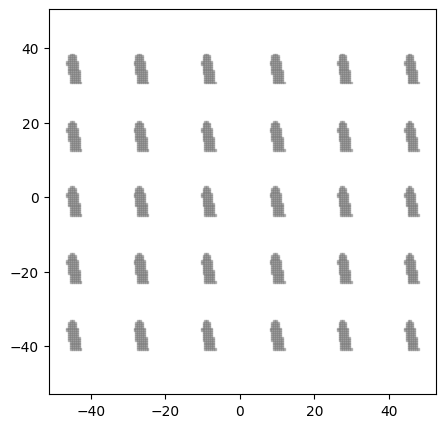

--------------------------------------------------
label: VentHole Chromosome_212: ['DoubleParabolicShape_212', 'CircularStrictTransformation_212']
predict: (0.2910110458645032, 373.2421696000001, 455.67508899999984)
biased_fitness: 0.7158441761549672, fitness: 0.6953032483549679
shape parameter:
parameter_list: [ lower_coefficient: 2.386609425276639, upper_coefficient: 2.3792040180636738, lower_y-intercept: 1.8264293231681807, upper_y-intercept_from_lower_y: 1.7449485194612422, lower_x_trans: 2.7966809663045646, ]
pattern parameter:
parameter_list: [ di: 8.843588843948691, dx: 4.85455833420133, phi: 0.6981317007977318, ]


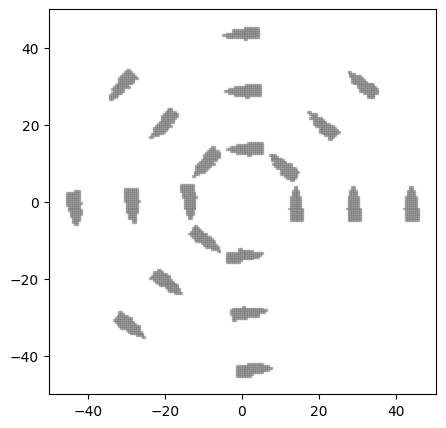

--------------------------------------------------
label: VentHole Chromosome_213: ['DoubleParabolicShape_213', 'GridStrictTransformation_213']
predict: (0.29117765757534575, 373.3275315999999, 456.9063081999999)
biased_fitness: 0.7111180866465434, fitness: 0.6870542252465436
shape parameter:
parameter_list: [ lower_coefficient: 1.6738257191040966, upper_coefficient: 1.9069465360081335, lower_y-intercept: 3.2477067644005495, upper_y-intercept_from_lower_y: 1.4502309443212207, lower_x_trans: 1.9565237632414911, ]
pattern parameter:
parameter_list: [ dx: 9.764163336749627, dy: 6.829419763588535, ]


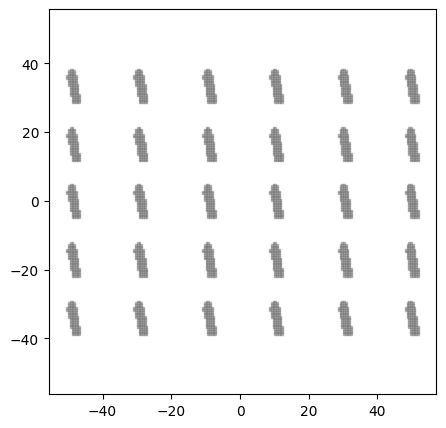

--------------------------------------------------
label: VentHole Chromosome_214: ['DoubleParabolicShape_214', 'GridStrictTransformation_214']
predict: (0.2904404536995693, 373.10263560000016, 455.2095645)
biased_fitness: 0.723457884804306, fitness: 0.7040344625043062
shape parameter:
parameter_list: [ lower_coefficient: 2.6012707666580823, upper_coefficient: 2.998374804296035, lower_y-intercept: 3.5400287434320843, upper_y-intercept_from_lower_y: 1.4206585526263404, lower_x_trans: 1.9860868524572153, ]
pattern parameter:
parameter_list: [ dx: 2.2516763638656085, dy: 8.243736346055467, ]


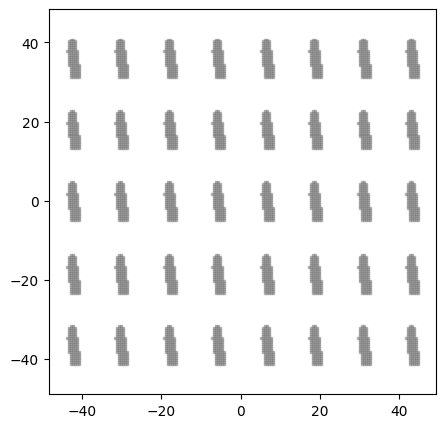

--------------------------------------------------
label: VentHole Chromosome_215: ['DoubleParabolicShape_215', 'CornerTransformation_215']
predict: (0.2889280394737723, 373.04704269999985, 458.0849502999999)
biased_fitness: 0.7332204057622779, fitness: 0.705059640262278
shape parameter:
parameter_list: [ lower_coefficient: 1.4472284712795795, upper_coefficient: 2.255909401923142, lower_y-intercept: 1.324140743526077, upper_y-intercept_from_lower_y: 1.8708228688858461, lower_x_trans: -0.8210453583493207, ]
pattern parameter:
parameter_list: [ di: 9.895438089488012, dx: 5.748689881431075, phi: 0.4999960813571309, rot_count: 3.0, ]


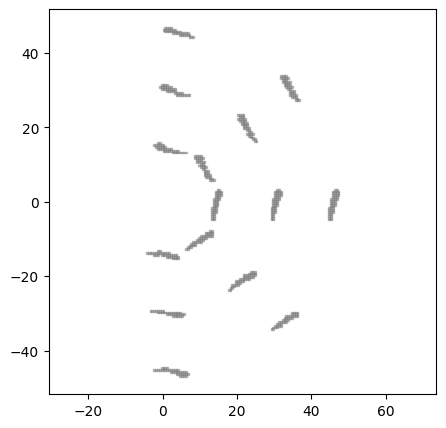

--------------------------------------------------
label: VentHole Chromosome_216: ['DoubleParabolicShape_216', 'CornerTransformation_216']
predict: (0.2897186172583859, 373.12162090000015, 456.6052998)
biased_fitness: 0.7277518815161399, fitness: 0.7041792239161402
shape parameter:
parameter_list: [ lower_coefficient: 2.4101524260458684, upper_coefficient: 1.7354785139040934, lower_y-intercept: 1.5616836555965707, upper_y-intercept_from_lower_y: 1.8668354317036924, lower_x_trans: 4.582114893058176, ]
pattern parameter:
parameter_list: [ di: 13.864072242289682, dx: 5.353374617476375, phi: 0.44484766850024937, rot_count: 3.0, ]


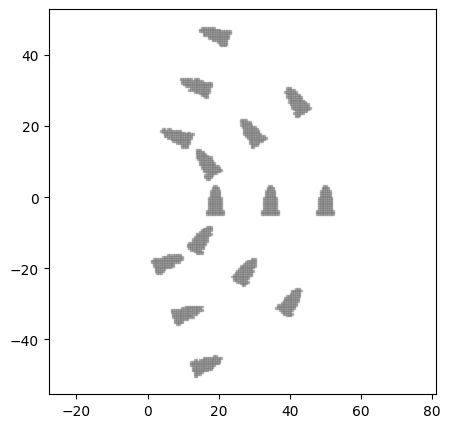

--------------------------------------------------
label: VentHole Chromosome_217: ['DoubleParabolicShape_217', 'CircularStrictTransformation_217']
predict: (0.29280694743865965, 373.54462359999997, 456.9564190999999)
biased_fitness: 0.6932053222134038, fitness: 0.6694253121134042
shape parameter:
parameter_list: [ lower_coefficient: 2.0898696709019644, upper_coefficient: 1.4091846496774896, lower_y-intercept: 3.488825100421762, upper_y-intercept_from_lower_y: 1.1386301245525, lower_x_trans: 2.898853275734208, ]
pattern parameter:
parameter_list: [ di: 9.256757352466673, dx: 5.500156929309032, phi: 0.6283185307179586, ]


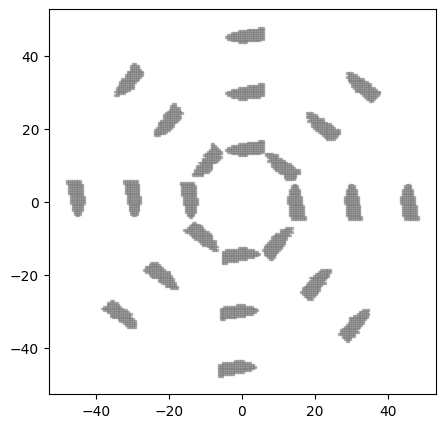

--------------------------------------------------
label: VentHole Chromosome_218: ['DoubleParabolicShape_218', 'CornerTransformation_218']
predict: (0.2904821530496211, 373.3017243000002, 458.40349089999967)
biased_fitness: 0.715259417603788, fitness: 0.6866523935037894
shape parameter:
parameter_list: [ lower_coefficient: 1.5015557236271848, upper_coefficient: 1.2935132418689699, lower_y-intercept: 1.495256272291034, upper_y-intercept_from_lower_y: 1.5945185365491907, lower_x_trans: 3.563228902145454, ]
pattern parameter:
parameter_list: [ di: 7.671033698270723, dx: 6.618925421104787, phi: 0.4001841544280988, rot_count: 3.0, ]


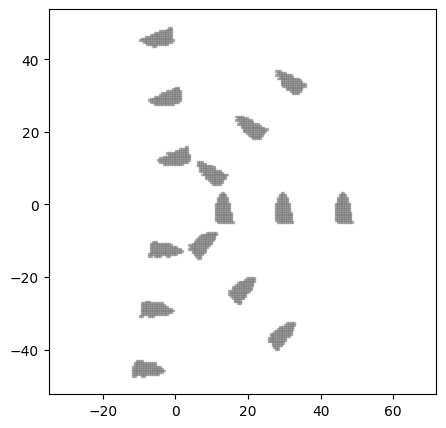

--------------------------------------------------
label: VentHole Chromosome_219: ['DoubleParabolicShape_219', 'CircularStrictTransformation_219']
predict: (0.29023187016082796, 373.58242949999993, 456.17449649999986)
biased_fitness: 0.7202552988917209, fitness: 0.6988966683917213
shape parameter:
parameter_list: [ lower_coefficient: 2.5711424356463244, upper_coefficient: 2.074590820996196, lower_y-intercept: 1.2223833685796288, upper_y-intercept_from_lower_y: 1.7794667737306344, lower_x_trans: -0.27807884305880126, ]
pattern parameter:
parameter_list: [ di: 13.138805141950485, dx: 1.517584444688658, phi: 0.7853981633974483, ]


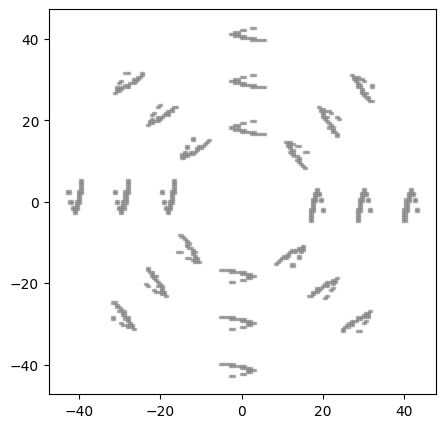

--------------------------------------------------
label: VentHole Chromosome_220: ['DoubleParabolicShape_220', 'CornerTransformation_220']
predict: (0.28860617032555735, 373.1305448, 456.8390759)
biased_fitness: 0.7383463313444264, fitness: 0.7140901932444264
shape parameter:
parameter_list: [ lower_coefficient: 2.7657623607188837, upper_coefficient: 2.9578768433956966, lower_y-intercept: 2.371187198679274, upper_y-intercept_from_lower_y: 1.7665834462299346, lower_x_trans: -4.920952515118603, ]
pattern parameter:
parameter_list: [ di: 12.589080073385333, dx: 9.693154404534921, phi: 0.7062301673943288, rot_count: 6.0, ]


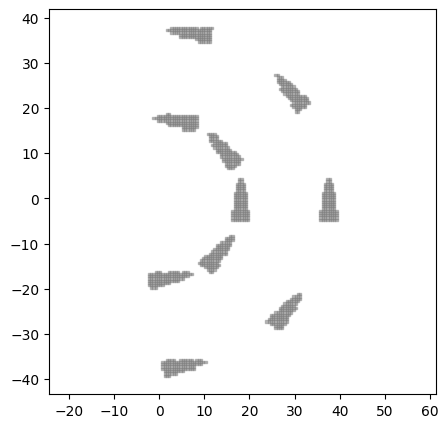

--------------------------------------------------
label: VentHole Chromosome_221: ['DoubleParabolicShape_221', 'CircularStrictTransformation_221']
predict: (0.2914308511641355, 373.47637259999976, 457.4756969999999)
biased_fitness: 0.7064054861586468, fitness: 0.6809311403586468
shape parameter:
parameter_list: [ lower_coefficient: 2.9397737801206096, upper_coefficient: 2.95519112688421, lower_y-intercept: 3.337139796722812, upper_y-intercept_from_lower_y: 1.2436443581330507, lower_x_trans: -1.830454910568534, ]
pattern parameter:
parameter_list: [ di: 10.80258592037377, dx: 4.908913041432548, phi: 0.7853981633974483, ]


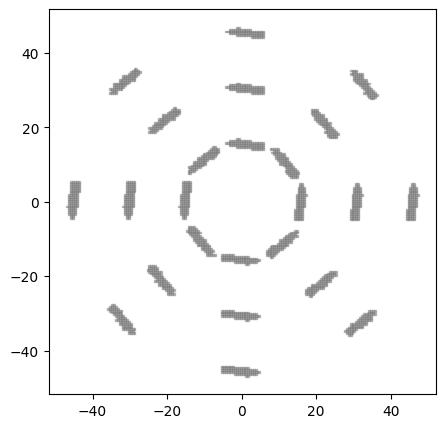

--------------------------------------------------
label: VentHole Chromosome_222: ['DoubleParabolicShape_222', 'GridStrictTransformation_222']
predict: (0.29112734887194547, 373.1584972, 457.12543919999973)
biased_fitness: 0.7123661524805457, fitness: 0.6873068292805465
shape parameter:
parameter_list: [ lower_coefficient: 1.2911657466391022, upper_coefficient: 2.1612093252989384, lower_y-intercept: 1.1575266251811485, upper_y-intercept_from_lower_y: 1.4440118481900903, lower_x_trans: 3.8301922948866753, ]
pattern parameter:
parameter_list: [ dx: 9.667012526789373, dy: 3.283780239451808, ]


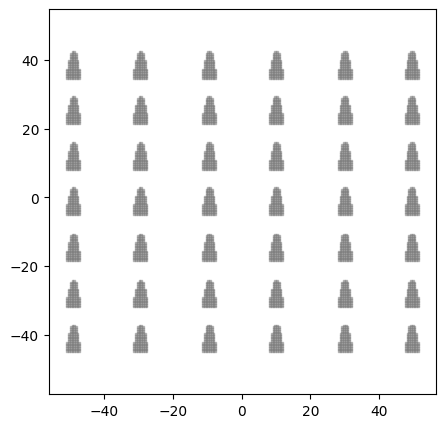

--------------------------------------------------
label: VentHole Chromosome_223: ['DoubleParabolicShape_223', 'CircularStrictTransformation_223']
predict: (0.2939052247676548, 374.06241800000004, 457.9981414999999)
biased_fitness: 0.6765145433234518, fitness: 0.6506449548234522
shape parameter:
parameter_list: [ lower_coefficient: 2.2024154965773786, upper_coefficient: 1.0201619317179729, lower_y-intercept: 3.075754070889367, upper_y-intercept_from_lower_y: 1.3197339286315877, lower_x_trans: -3.283840382778199, ]
pattern parameter:
parameter_list: [ di: 14.489353838187567, dx: 2.919789457486486, phi: 0.7853981633974483, ]


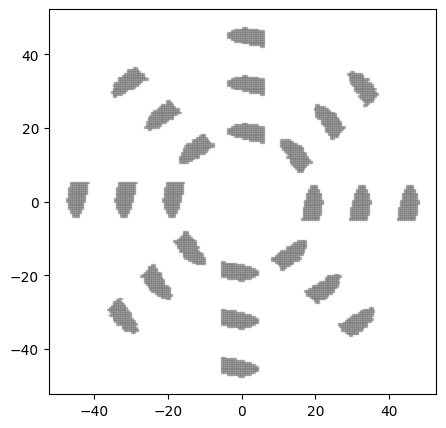

--------------------------------------------------
label: VentHole Chromosome_224: ['DoubleParabolicShape_224', 'CircularStrictTransformation_224']
predict: (0.28880950075864775, 373.2722216, 456.0144642999999)
biased_fitness: 0.7369705126135224, fitness: 0.7154715629135229
shape parameter:
parameter_list: [ lower_coefficient: 1.5619362908158563, upper_coefficient: 2.944615805292825, lower_y-intercept: 2.4249492542675393, upper_y-intercept_from_lower_y: 1.8585437490418197, lower_x_trans: -0.36654680583552146, ]
pattern parameter:
parameter_list: [ di: 14.50827181660246, dx: 5.9750120765657675, phi: 0.3306939635357677, ]


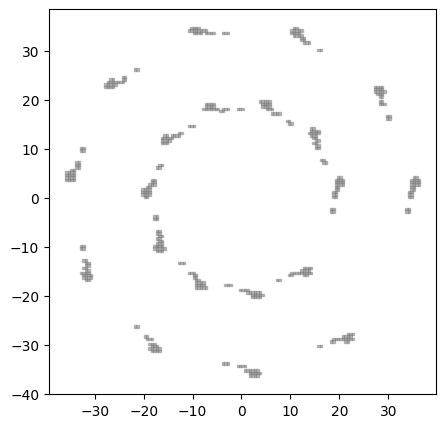

--------------------------------------------------
label: VentHole Chromosome_225: ['DoubleParabolicShape_225', 'CornerTransformation_225']
predict: (0.28931512070061327, 372.9406112, 457.89762979999983)
biased_fitness: 0.7304692549938677, fitness: 0.7026575879938681
shape parameter:
parameter_list: [ lower_coefficient: 2.4915448655661736, upper_coefficient: 1.8486137639488196, lower_y-intercept: 2.448516350355087, upper_y-intercept_from_lower_y: 1.1579619782982067, lower_x_trans: -2.869136461520675, ]
pattern parameter:
parameter_list: [ di: 7.73648817072971, dx: 9.770955647080202, phi: 0.7338761902465958, rot_count: 6.0, ]


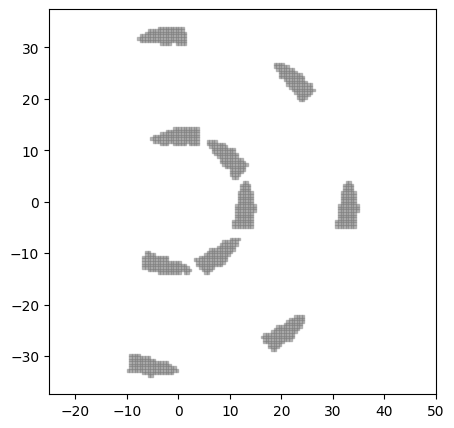

--------------------------------------------------
label: VentHole Chromosome_226: ['DoubleParabolicShape_226', 'CircularStrictTransformation_226']
predict: (0.2917875220894446, 373.4652187999998, 457.1539953999998)
biased_fitness: 0.7035602567055561, fitness: 0.6790287081055562
shape parameter:
parameter_list: [ lower_coefficient: 2.7601190089250256, upper_coefficient: 1.2063599821031523, lower_y-intercept: 3.611859621542096, upper_y-intercept_from_lower_y: 1.1035969520390994, lower_x_trans: 3.2889362985733204, ]
pattern parameter:
parameter_list: [ di: 9.39154365795445, dx: 9.312623528006352, phi: 0.6981317007977318, ]


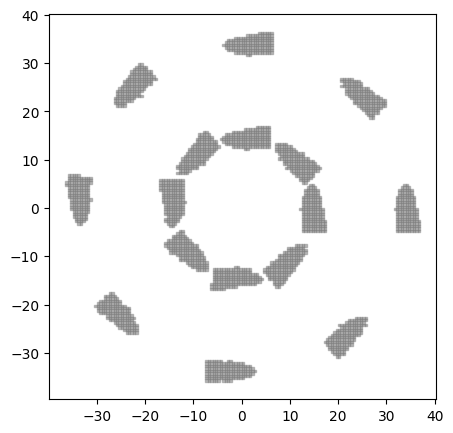

--------------------------------------------------
label: VentHole Chromosome_227: ['DoubleParabolicShape_227', 'CornerTransformation_227']
predict: (0.29131555677941234, 374.0138528, 455.8530135000001)
biased_fitness: 0.7070414356058763, fitness: 0.687510100705876
shape parameter:
parameter_list: [ lower_coefficient: 1.6530343358762576, upper_coefficient: 1.634491747679788, lower_y-intercept: 1.6414324019339066, upper_y-intercept_from_lower_y: 1.236722214479544, lower_x_trans: 4.432735870885203, ]
pattern parameter:
parameter_list: [ di: 12.524890285813536, dx: 1.390099250413697, phi: 0.7587113803933585, rot_count: 5.0, ]


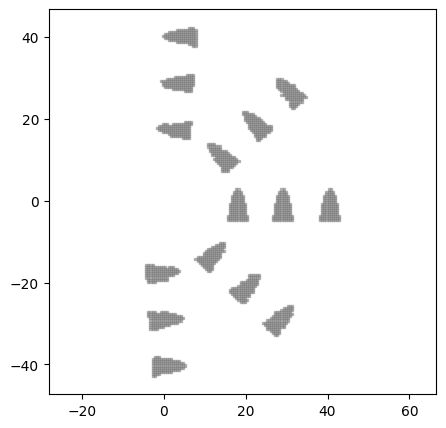

--------------------------------------------------
label: VentHole Chromosome_228: ['DoubleParabolicShape_228', 'CircularStrictTransformation_228']
predict: (0.2907071025766559, 373.2714888, 457.56536960000005)
biased_fitness: 0.714897813433441, fitness: 0.6887446822334409
shape parameter:
parameter_list: [ lower_coefficient: 1.406448965230228, upper_coefficient: 1.976099893252202, lower_y-intercept: 1.0042563144974177, upper_y-intercept_from_lower_y: 1.7310571296809667, lower_x_trans: 4.634088409005308, ]
pattern parameter:
parameter_list: [ di: 7.72898521425285, dx: 5.657949504717065, phi: 0.41887902047863906, ]


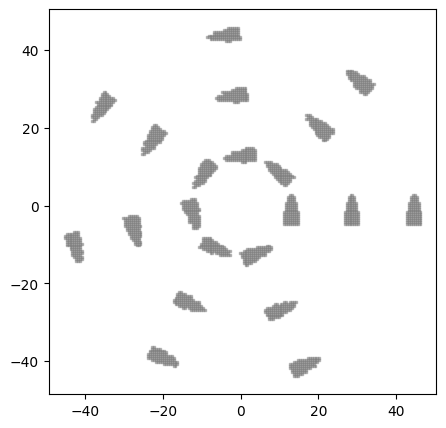

--------------------------------------------------
label: VentHole Chromosome_229: ['DoubleParabolicShape_229', 'GridStrictTransformation_229']
predict: (0.2910883046495445, 374.7612918999998, 463.6385152999999)
biased_fitness: 0.6885108796045567, fitness: 0.6471179175045566
shape parameter:
parameter_list: [ lower_coefficient: 2.0858494528545757, upper_coefficient: 2.444830492002704, lower_y-intercept: 3.937328348435365, upper_y-intercept_from_lower_y: 1.8915515128458003, lower_x_trans: -1.9893312281302036, ]
pattern parameter:
parameter_list: [ dx: 0.7731238022381706, dy: 4.64905128106909, ]


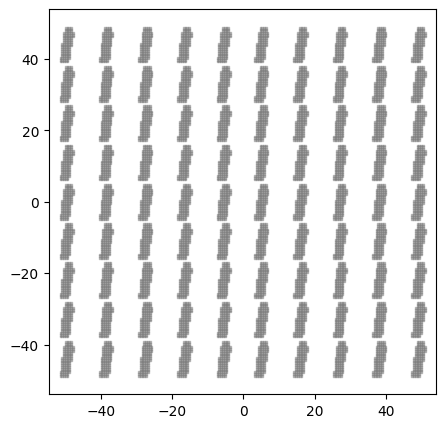

--------------------------------------------------
label: VentHole Chromosome_230: ['DoubleParabolicShape_230', 'GridStrictTransformation_230']
predict: (0.29417141277466685, 373.1560722, 460.54826700000007)
biased_fitness: 0.6750968328533313, fitness: 0.6397641762533312
shape parameter:
parameter_list: [ lower_coefficient: 1.0896651792949832, upper_coefficient: 1.2922102477832234, lower_y-intercept: 2.450158383656306, upper_y-intercept_from_lower_y: 1.7684878991482502, lower_x_trans: 1.7323744782165988, ]
pattern parameter:
parameter_list: [ dx: 2.337935638766899, dy: 0.7340359383703059, ]


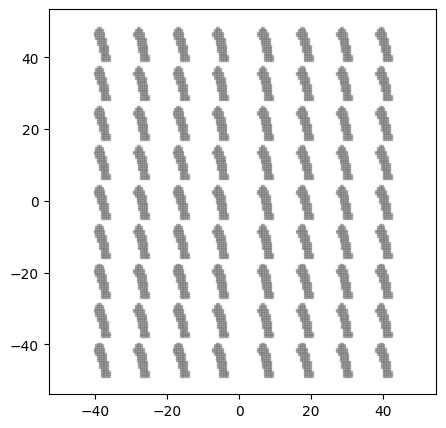

--------------------------------------------------
label: VentHole Chromosome_231: ['DoubleParabolicShape_231', 'GridStrictTransformation_231']
predict: (0.2908246074324703, 373.2637016000002, 458.9459256999999)
biased_fitness: 0.7110161630752955, fitness: 0.6807057891752962
shape parameter:
parameter_list: [ lower_coefficient: 1.0332024847415486, upper_coefficient: 2.108256062678708, lower_y-intercept: 1.2767403078628623, upper_y-intercept_from_lower_y: 1.819196600542965, lower_x_trans: 0.5054761842738253, ]
pattern parameter:
parameter_list: [ dx: 4.253221604486951, dy: 0.5021369595623795, ]


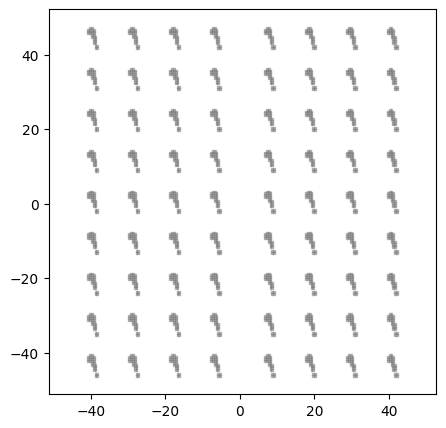

--------------------------------------------------
label: VentHole Chromosome_232: ['DoubleParabolicShape_232', 'GridStrictTransformation_232']
predict: (0.2916638867228589, 373.48539909999994, 457.49798180000005)
biased_fitness: 0.703967375471411, fitness: 0.6784442282714107
shape parameter:
parameter_list: [ lower_coefficient: 1.0651946608322418, upper_coefficient: 2.978722369886522, lower_y-intercept: 1.9274843667496073, upper_y-intercept_from_lower_y: 1.9142930001917122, lower_x_trans: -3.8087961044689966, ]
pattern parameter:
parameter_list: [ dx: 1.12033241061617, dy: 9.744860722654176, ]


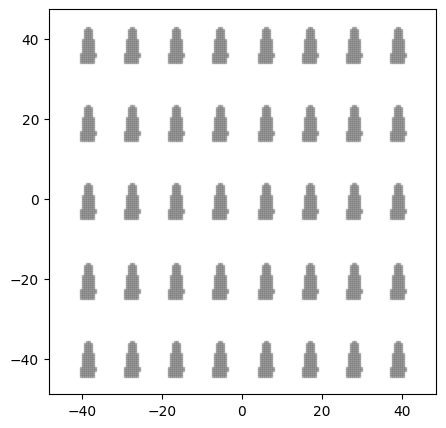

--------------------------------------------------
label: VentHole Chromosome_233: ['DoubleParabolicShape_233', 'CircularStrictTransformation_233']
predict: (0.2916599661842796, 373.2323374, 457.61035109999966)
biased_fitness: 0.7055532741572046, fitness: 0.6791868956572057
shape parameter:
parameter_list: [ lower_coefficient: 1.1274949749325516, upper_coefficient: 1.8980884779360763, lower_y-intercept: 3.5028511122108617, upper_y-intercept_from_lower_y: 1.3141044560710684, lower_x_trans: -2.7773482524169415, ]
pattern parameter:
parameter_list: [ di: 8.112845907906632, dx: 1.623897571283436, phi: 0.7853981633974483, ]


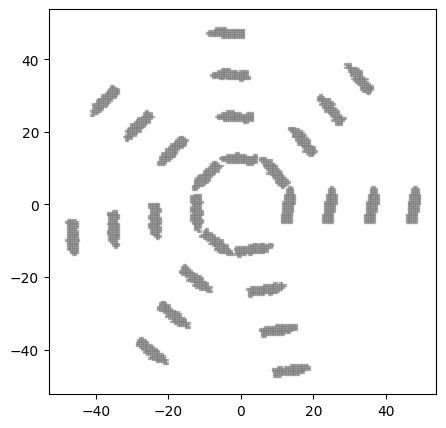

--------------------------------------------------
label: VentHole Chromosome_234: ['DoubleParabolicShape_234', 'GridStrictTransformation_234']
predict: (0.292653193815267, 372.855068, 458.1754022999999)
biased_fitness: 0.6971317812473299, fitness: 0.6683157103473303
shape parameter:
parameter_list: [ lower_coefficient: 2.717271966222451, upper_coefficient: 1.3539685877473615, lower_y-intercept: 1.3653110314002217, upper_y-intercept_from_lower_y: 1.6760897982548526, lower_x_trans: -3.99139398236827, ]
pattern parameter:
parameter_list: [ dx: 5.58628669658987, dy: 2.958083003022637, ]


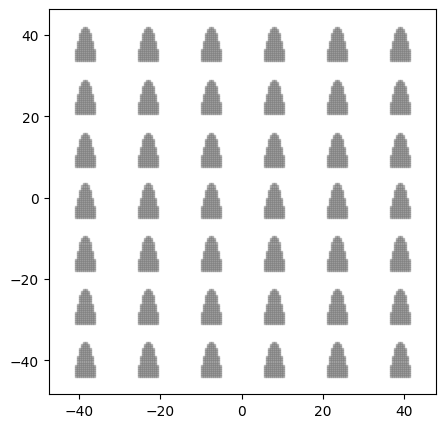

--------------------------------------------------
label: VentHole Chromosome_235: ['DoubleParabolicShape_235', 'CornerTransformation_235']
predict: (0.28850963210451686, 372.9360394, 457.8256114000001)
biased_fitness: 0.738700180354831, fitness: 0.7110954249548306
shape parameter:
parameter_list: [ lower_coefficient: 1.9193337271834703, upper_coefficient: 2.755265863803829, lower_y-intercept: 3.4555353370973148, upper_y-intercept_from_lower_y: 1.9497741604779788, lower_x_trans: -0.46555357294908095, ]
pattern parameter:
parameter_list: [ di: 14.443715108669487, dx: 4.8746001109251775, phi: 0.5605409681587321, rot_count: 2.0, ]


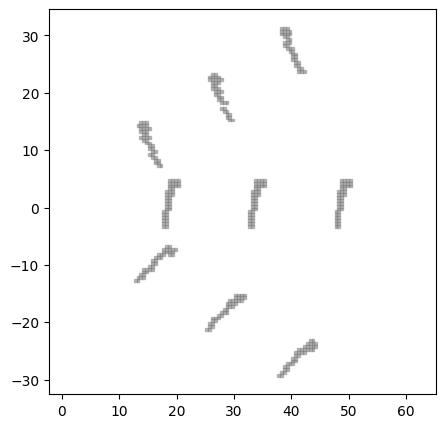

--------------------------------------------------
label: VentHole Chromosome_236: ['DoubleParabolicShape_236', 'GridStrictTransformation_236']
predict: (0.2929843120301163, 373.62452630000007, 458.6435578)
biased_fitness: 0.6874980799988362, fitness: 0.6588164591988364
shape parameter:
parameter_list: [ lower_coefficient: 2.867171009452825, upper_coefficient: 2.4115188683007, lower_y-intercept: 2.9667613459431514, upper_y-intercept_from_lower_y: 1.5348431132671068, lower_x_trans: -3.7781369938886145, ]
pattern parameter:
parameter_list: [ dx: 3.24125446366496, dy: 3.6799943523910104, ]


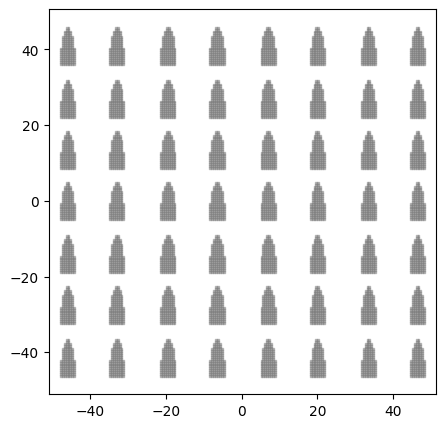

--------------------------------------------------
label: VentHole Chromosome_237: ['DoubleParabolicShape_237', 'CornerTransformation_237']
predict: (0.2905138633452, 373.8055296999999, 460.8767616)
biased_fitness: 0.7064691354480002, fitness: 0.671449910048
shape parameter:
parameter_list: [ lower_coefficient: 1.7568160048373287, upper_coefficient: 1.7730871504775847, lower_y-intercept: 3.206939261919306, upper_y-intercept_from_lower_y: 1.858498950866366, lower_x_trans: 4.727265113296195, ]
pattern parameter:
parameter_list: [ di: 11.473996535770464, dx: 4.919044751840976, phi: 0.5704980086694755, rot_count: 4.0, ]


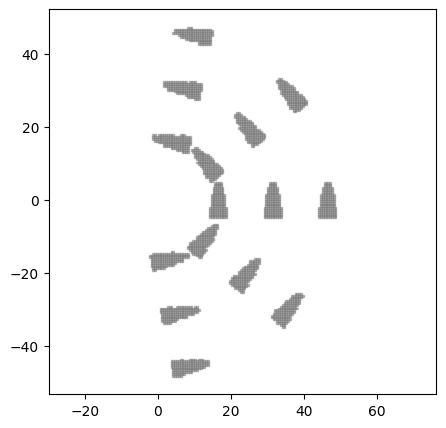

--------------------------------------------------
label: VentHole Chromosome_238: ['DoubleParabolicShape_238', 'CornerTransformation_238']
predict: (0.28996610713423676, 373.00730870000007, 458.67956139999995)
biased_fitness: 0.7219286449576319, fitness: 0.6919045781576322
shape parameter:
parameter_list: [ lower_coefficient: 2.809561367052142, upper_coefficient: 1.8508448995152262, lower_y-intercept: 1.3899355325958003, upper_y-intercept_from_lower_y: 1.3009604831812849, lower_x_trans: -1.7958022696288376, ]
pattern parameter:
parameter_list: [ di: 9.170743157197146, dx: 2.154645022334986, phi: 0.6457089468647352, rot_count: 5.0, ]


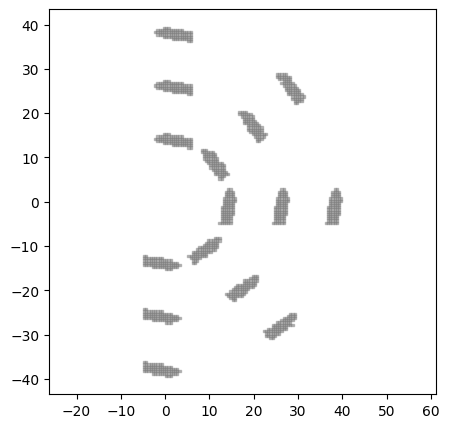

--------------------------------------------------
label: VentHole Chromosome_239: ['DoubleParabolicShape_239', 'CornerTransformation_239']
predict: (0.29010356404227955, 373.52629229999985, 457.37464970000013)
biased_fitness: 0.7195310140772051, fitness: 0.6944596495772045
shape parameter:
parameter_list: [ lower_coefficient: 2.9116324342330104, upper_coefficient: 1.8321913839120836, lower_y-intercept: 3.181599697500496, upper_y-intercept_from_lower_y: 1.7296827086151165, lower_x_trans: -3.4618780722239393, ]
pattern parameter:
parameter_list: [ di: 8.945509506381626, dx: 3.723522912355133, phi: 0.36981787602329264, rot_count: 2.0, ]


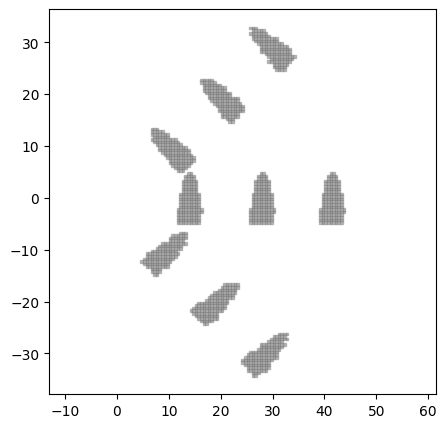

--------------------------------------------------
label: VentHole Chromosome_240: ['DoubleParabolicShape_240', 'CircularStrictTransformation_240']
predict: (0.28900235952204434, 372.72101749999985, 456.66851310000015)
biased_fitness: 0.7375922560795573, fitness: 0.7130287517795565
shape parameter:
parameter_list: [ lower_coefficient: 1.1787656157550568, upper_coefficient: 1.5271758610147983, lower_y-intercept: 1.8886091404265666, upper_y-intercept_from_lower_y: 1.275288170876869, lower_x_trans: 0.665116120755255, ]
pattern parameter:
parameter_list: [ di: 9.334490011268038, dx: 7.64145495411168, phi: 0.6981317007977318, ]


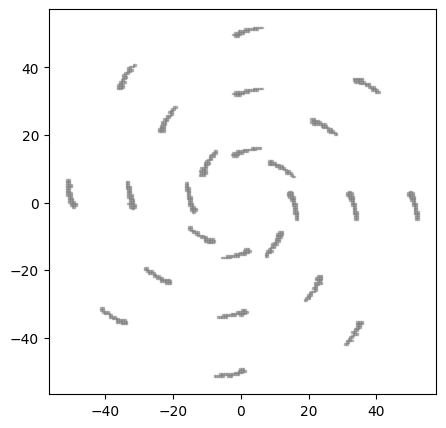

--------------------------------------------------
label: VentHole Chromosome_241: ['DoubleParabolicShape_241', 'GridStrictTransformation_241']
predict: (0.29259589443152834, 372.96155650000014, 456.0535933999999)
biased_fitness: 0.7012029733847157, fitness: 0.6789653061847164
shape parameter:
parameter_list: [ lower_coefficient: 1.4419176392989046, upper_coefficient: 1.7345393063455794, lower_y-intercept: 3.925411475001401, upper_y-intercept_from_lower_y: 1.6905501128131237, lower_x_trans: -4.185060434150765, ]
pattern parameter:
parameter_list: [ dx: 6.703614394993796, dy: 5.4503814888765065, ]


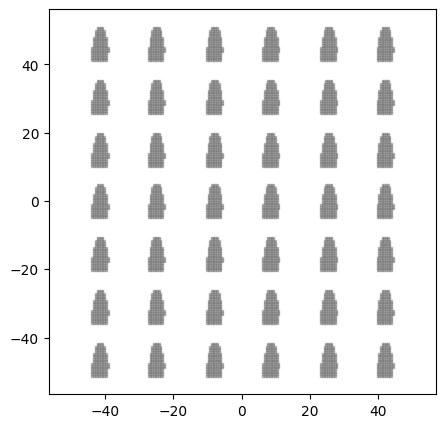

--------------------------------------------------
label: VentHole Chromosome_242: ['DoubleParabolicShape_242', 'CornerTransformation_242']
predict: (0.28981602348176017, 373.66716470000006, 458.11417029999984)
biased_fitness: 0.7199412716823981, fitness: 0.6929330901823988
shape parameter:
parameter_list: [ lower_coefficient: 2.734892365140124, upper_coefficient: 1.0758610101598753, lower_y-intercept: 2.422650042193195, upper_y-intercept_from_lower_y: 1.211070635333108, lower_x_trans: 2.0809156510277527, ]
pattern parameter:
parameter_list: [ di: 12.115227298000203, dx: 2.217322353243967, phi: 0.7474323429677228, rot_count: 2.0, ]


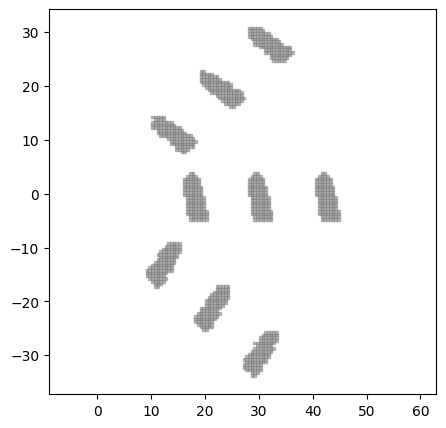

--------------------------------------------------
label: VentHole Chromosome_243: ['DoubleParabolicShape_243', 'CircularStrictTransformation_243']
predict: (0.28925553970530826, 373.2148508000001, 457.50563019999987)
biased_fitness: 0.729929386946917, fitness: 0.7038421979469175
shape parameter:
parameter_list: [ lower_coefficient: 1.760585701085118, upper_coefficient: 1.8786951261580473, lower_y-intercept: 3.717013401754551, upper_y-intercept_from_lower_y: 1.0381999268375433, lower_x_trans: 0.9284664109836616, ]
pattern parameter:
parameter_list: [ di: 14.823989090463652, dx: 6.046912282136831, phi: 0.36959913571644626, ]


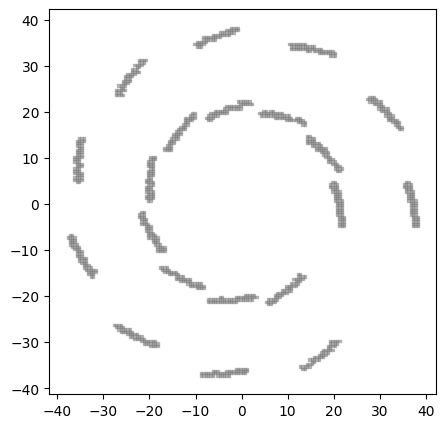

--------------------------------------------------
label: VentHole Chromosome_244: ['DoubleParabolicShape_244', 'GridStrictTransformation_244']
predict: (0.2923024310155897, 373.07045009999985, 453.97625270000003)
biased_fitness: 0.7075300337441036, fitness: 0.6917421758441032
shape parameter:
parameter_list: [ lower_coefficient: 2.7339613883704197, upper_coefficient: 1.2139983628969364, lower_y-intercept: 1.7043211480898943, upper_y-intercept_from_lower_y: 1.5198519752863615, lower_x_trans: -0.4320766077989946, ]
pattern parameter:
parameter_list: [ dx: 5.518043806357666, dy: 9.581922918918268, ]


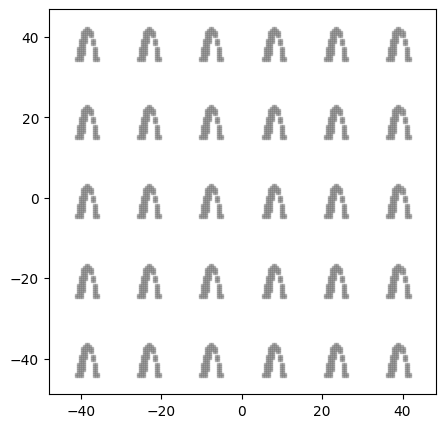

--------------------------------------------------
label: VentHole Chromosome_245: ['DoubleParabolicShape_245', 'CornerTransformation_245']
predict: (0.28995378625691703, 373.2584235, 457.4884884999997)
biased_fitness: 0.7226761959308301, fitness: 0.6967275774308311
shape parameter:
parameter_list: [ lower_coefficient: 2.793976956067837, upper_coefficient: 1.3983841644814416, lower_y-intercept: 3.789537581270045, upper_y-intercept_from_lower_y: 1.8397912238565852, lower_x_trans: 4.922132573712499, ]
pattern parameter:
parameter_list: [ di: 13.938297122895984, dx: 5.256836521677958, phi: 0.34183522205483774, rot_count: 3.0, ]


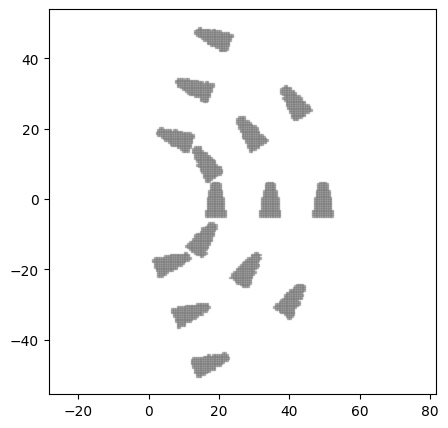

--------------------------------------------------
label: VentHole Chromosome_246: ['DoubleParabolicShape_246', 'CornerTransformation_246']
predict: (0.2894556056634414, 373.1027743999998, 457.99845119999986)
biased_fitness: 0.7277276201655872, fitness: 0.6999378153655873
shape parameter:
parameter_list: [ lower_coefficient: 2.974386885067391, upper_coefficient: 2.2729853762301477, lower_y-intercept: 1.7592864568049769, upper_y-intercept_from_lower_y: 1.7290825886707035, lower_x_trans: -0.7903336896290476, ]
pattern parameter:
parameter_list: [ di: 10.15067574636415, dx: 4.495645933235483, phi: 0.3365444211976462, rot_count: 3.0, ]


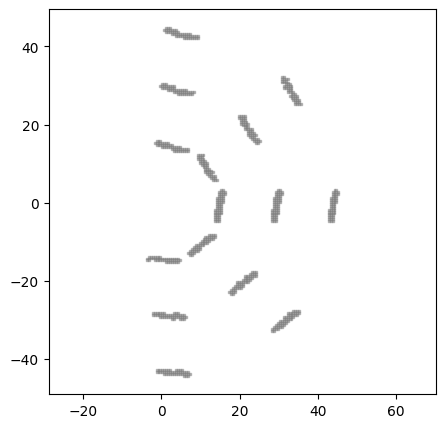

--------------------------------------------------
label: VentHole Chromosome_247: ['DoubleParabolicShape_247', 'CircularStrictTransformation_247']
predict: (0.2931450428387623, 373.5763175, 457.8066768)
biased_fitness: 0.6879019955123767, fitness: 0.6616346001123767
shape parameter:
parameter_list: [ lower_coefficient: 2.1936017154929575, upper_coefficient: 2.2480422814770766, lower_y-intercept: 2.828577352768217, upper_y-intercept_from_lower_y: 1.5042597969975913, lower_x_trans: -4.474664513949848, ]
pattern parameter:
parameter_list: [ di: 13.488575349137864, dx: 1.285269362323746, phi: 0.36959913571644626, ]


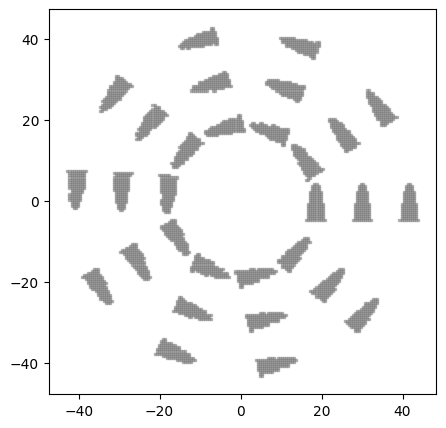

--------------------------------------------------
label: VentHole Chromosome_248: ['DoubleParabolicShape_248', 'CornerTransformation_248']
predict: (0.2901279302793385, 373.55823799999996, 460.1132815999999)
biased_fitness: 0.7135864680066156, fitness: 0.6803630992066159
shape parameter:
parameter_list: [ lower_coefficient: 1.917444483309172, upper_coefficient: 1.5225695698987323, lower_y-intercept: 1.5327229021066957, upper_y-intercept_from_lower_y: 1.2821447818766116, lower_x_trans: -4.018217727389841, ]
pattern parameter:
parameter_list: [ di: 12.423550679551933, dx: 4.87750804854836, phi: 0.27005377000444536, rot_count: 3.0, ]


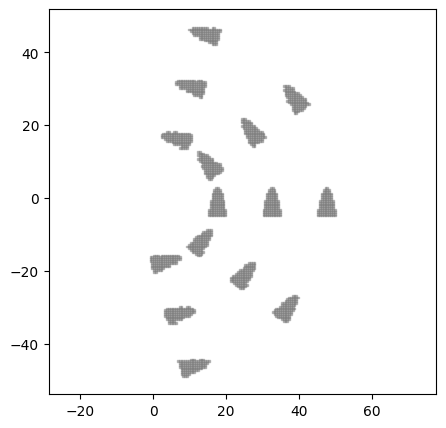

--------------------------------------------------
label: VentHole Chromosome_249: ['DoubleParabolicShape_249', 'GridStrictTransformation_249']
predict: (0.29093400058655616, 373.2612379999999, 456.5108486000001)
biased_fitness: 0.7148096309344388, fitness: 0.6917995611344384
shape parameter:
parameter_list: [ lower_coefficient: 1.2703238918035464, upper_coefficient: 1.2213141181417282, lower_y-intercept: 1.855251008244426, upper_y-intercept_from_lower_y: 1.6497632764841255, lower_x_trans: -3.7333631632816444, ]
pattern parameter:
parameter_list: [ dx: 9.881201231482414, dy: 9.711843663241025, ]


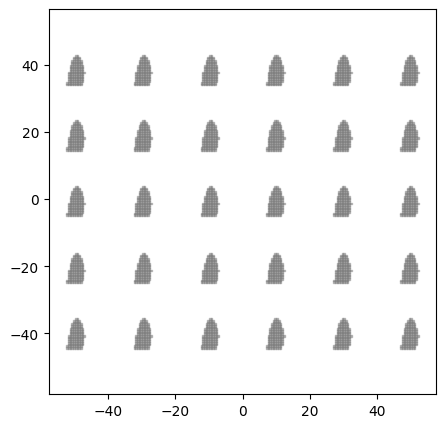

--------------------------------------------------
label: VentHole Chromosome_250: ['DoubleParabolicShape_250', 'GridStrictTransformation_250']
predict: (0.2903940006856458, 373.7436763, 457.9446447999998)
biased_fitness: 0.7139649694435422, fitness: 0.6876183876435428
shape parameter:
parameter_list: [ lower_coefficient: 2.1513014046340464, upper_coefficient: 2.848522295183168, lower_y-intercept: 2.2999187816656756, upper_y-intercept_from_lower_y: 1.7099171237725121, lower_x_trans: 4.2551369213553265, ]
pattern parameter:
parameter_list: [ dx: 9.071524705630324, dy: 0.5305776142862559, ]


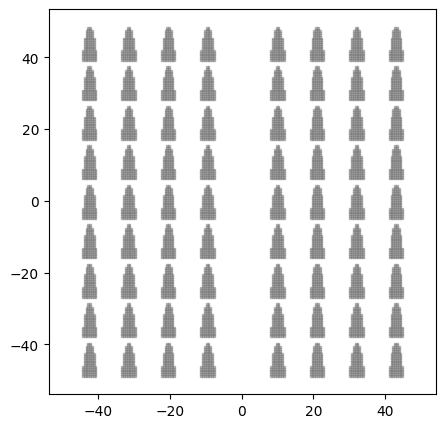

--------------------------------------------------
label: VentHole Chromosome_251: ['DoubleParabolicShape_251', 'CircularStrictTransformation_251']
predict: (0.2919250197366856, 374.2307305, 456.71653489999994)
biased_fitness: 0.6977016193331438, fitness: 0.6760134756331441
shape parameter:
parameter_list: [ lower_coefficient: 2.5499740156620705, upper_coefficient: 2.7170800435172504, lower_y-intercept: 1.3228612765858199, upper_y-intercept_from_lower_y: 1.502526200451321, lower_x_trans: -2.6340379703095063, ]
pattern parameter:
parameter_list: [ di: 11.47535188030978, dx: 1.42815763753803, phi: 0.7853981633974483, ]


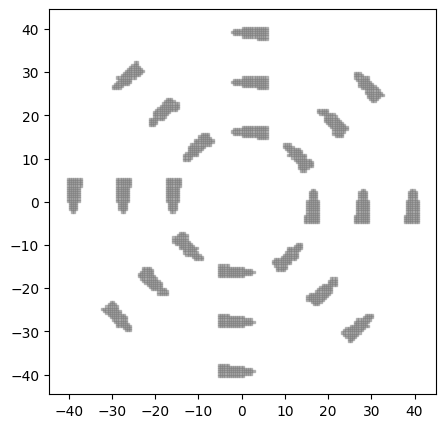

--------------------------------------------------
label: VentHole Chromosome_252: ['DoubleParabolicShape_252', 'CornerTransformation_252']
predict: (0.2894222921130791, 373.2875718000001, 457.65750189999994)
biased_fitness: 0.7274490724692082, fitness: 0.7010517103692085
shape parameter:
parameter_list: [ lower_coefficient: 2.8865611199049366, upper_coefficient: 2.914345114969385, lower_y-intercept: 1.8274728496302004, upper_y-intercept_from_lower_y: 1.1649435531595813, lower_x_trans: 3.05011601150982, ]
pattern parameter:
parameter_list: [ di: 12.835488759907703, dx: 2.8999204368373914, phi: 0.4205875825113216, rot_count: 2.0, ]


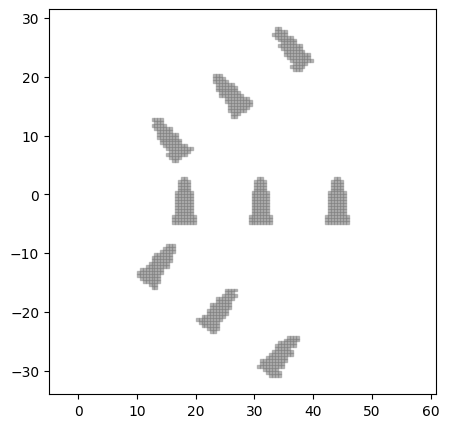

--------------------------------------------------
label: VentHole Chromosome_253: ['DoubleParabolicShape_253', 'GridStrictTransformation_253']
predict: (0.2892275938995017, 373.1077797999999, 457.375675)
biased_fitness: 0.7312182524049836, fitness: 0.7053067870049834
shape parameter:
parameter_list: [ lower_coefficient: 1.030314096796697, upper_coefficient: 2.0551328474615227, lower_y-intercept: 3.365421863105853, upper_y-intercept_from_lower_y: 1.935341341966772, lower_x_trans: 0.12487769118058711, ]
pattern parameter:
parameter_list: [ dx: 3.167318739335446, dy: 7.081807483391016, ]


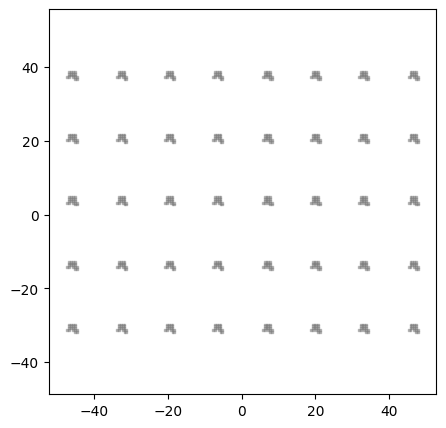

--------------------------------------------------
label: VentHole Chromosome_254: ['DoubleParabolicShape_254', 'CornerTransformation_254']
predict: (0.2901278601514239, 372.8674284, 458.91432870000006)
biased_fitness: 0.7208207422857609, fitness: 0.6898126129857607
shape parameter:
parameter_list: [ lower_coefficient: 1.586109119660593, upper_coefficient: 1.3238674192775282, lower_y-intercept: 3.148232976630847, upper_y-intercept_from_lower_y: 1.566330545479784, lower_x_trans: -0.17109620778942958, ]
pattern parameter:
parameter_list: [ di: 8.372728558441741, dx: 2.390079434930146, phi: 0.5994543399098783, rot_count: 6.0, ]


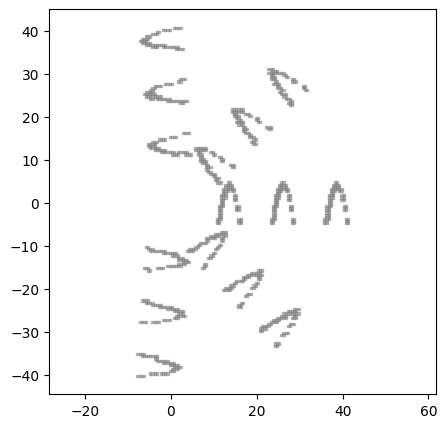

--------------------------------------------------
label: VentHole Chromosome_255: ['DoubleParabolicShape_255', 'GridStrictTransformation_255']
predict: (0.29245367431709823, 373.5112295999999, 458.13484559999984)
biased_fitness: 0.6946149584290184, fitness: 0.6672328808290188
shape parameter:
parameter_list: [ lower_coefficient: 2.3320241123266303, upper_coefficient: 2.489356348548079, lower_y-intercept: 2.818145784966661, upper_y-intercept_from_lower_y: 1.3951328739690252, lower_x_trans: -3.048314028543342, ]
pattern parameter:
parameter_list: [ dx: 6.693035795327718, dy: 2.29631121455059, ]


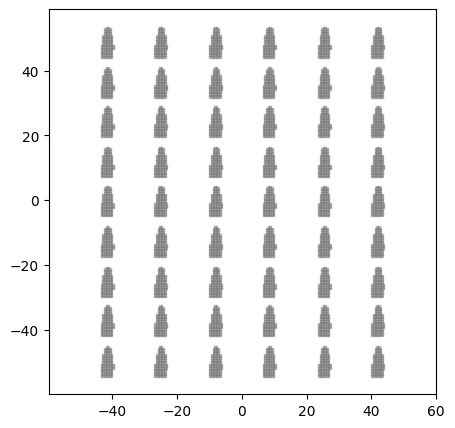

--------------------------------------------------
label: VentHole Chromosome_256: ['DoubleParabolicShape_256', 'GridStrictTransformation_256']
predict: (0.28996470210556824, 373.2268643999999, 457.9611937999999)
biased_fitness: 0.7218425405443185, fitness: 0.6944126879443187
shape parameter:
parameter_list: [ lower_coefficient: 2.7350213580278138, upper_coefficient: 2.62662383971265, lower_y-intercept: 2.744030265100886, upper_y-intercept_from_lower_y: 1.58077967560628, lower_x_trans: -2.2734570982006352, ]
pattern parameter:
parameter_list: [ dx: 4.622621605875113, dy: 3.6074536652475846, ]


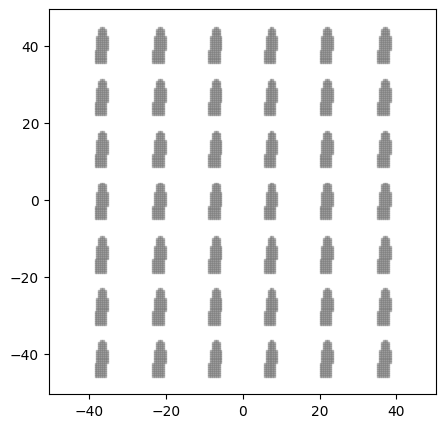

--------------------------------------------------
label: VentHole Chromosome_257: ['DoubleParabolicShape_257', 'CornerTransformation_257']
predict: (0.29007348940982847, 373.0049902999999, 458.36947469999984)
biased_fitness: 0.7214912244017161, fitness: 0.6923927809017164
shape parameter:
parameter_list: [ lower_coefficient: 1.4967697679060532, upper_coefficient: 2.5285126089467904, lower_y-intercept: 3.5414159086323593, upper_y-intercept_from_lower_y: 1.3020254900159056, lower_x_trans: -4.243637762438391, ]
pattern parameter:
parameter_list: [ di: 8.948617058650004, dx: 3.1347481571310807, phi: 0.6800458289129938, rot_count: 2.0, ]


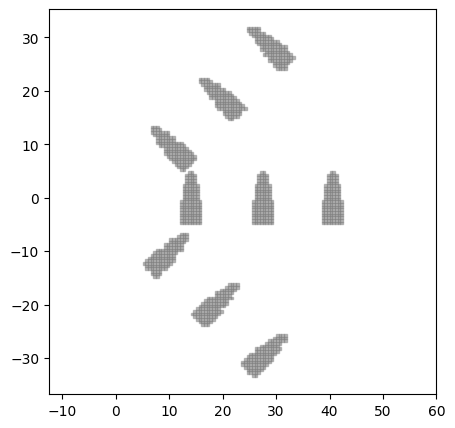

--------------------------------------------------
label: VentHole Chromosome_258: ['DoubleParabolicShape_258', 'CircularStrictTransformation_258']
predict: (0.29068957168251286, 373.4341659999999, 457.27209929999975)
biased_fitness: 0.7145209225748724, fitness: 0.6895729566748731
shape parameter:
parameter_list: [ lower_coefficient: 1.2011013514366573, upper_coefficient: 1.3885190983864837, lower_y-intercept: 2.767523477815998, upper_y-intercept_from_lower_y: 1.714153344060636, lower_x_trans: 1.4035450859820422, ]
pattern parameter:
parameter_list: [ di: 9.262856195646664, dx: 5.237408900897454, phi: 0.6981317007977318, ]


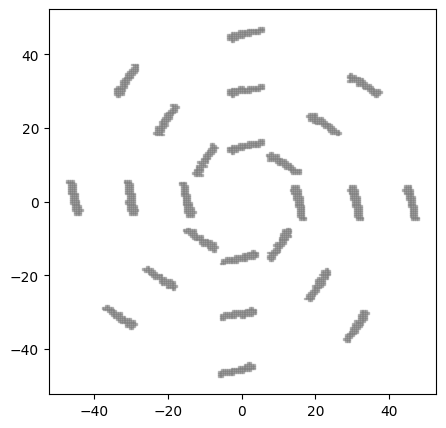

--------------------------------------------------
label: VentHole Chromosome_259: ['DoubleParabolicShape_259', 'CircularStrictTransformation_259']
predict: (0.2912972171653425, 373.7449394000001, 456.5385560999998)
biased_fitness: 0.7077361403465744, fitness: 0.6856103508465752
shape parameter:
parameter_list: [ lower_coefficient: 1.9480470179841136, upper_coefficient: 2.5687264980267894, lower_y-intercept: 1.7533653048417555, upper_y-intercept_from_lower_y: 1.8957796259906965, lower_x_trans: -3.1027674390281588, ]
pattern parameter:
parameter_list: [ di: 11.021177460959489, dx: 3.909844543556085, phi: 0.7853981633974483, ]


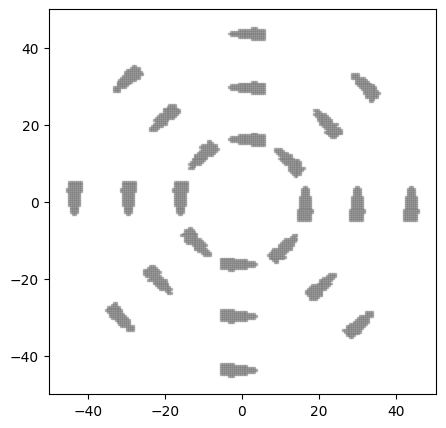

--------------------------------------------------
label: VentHole Chromosome_260: ['DoubleParabolicShape_260', 'CornerTransformation_260']
predict: (0.28860557076060944, 373.1086808999999, 457.93260699999985)
biased_fitness: 0.7363183120939064, fitness: 0.7087378528939067
shape parameter:
parameter_list: [ lower_coefficient: 2.287284563643327, upper_coefficient: 2.2693181820645663, lower_y-intercept: 1.7523472128758217, upper_y-intercept_from_lower_y: 1.1091852437688152, lower_x_trans: 1.7543620836236196, ]
pattern parameter:
parameter_list: [ di: 11.804539685717897, dx: 9.084785430140188, phi: 0.7167888837167931, rot_count: 2.0, ]


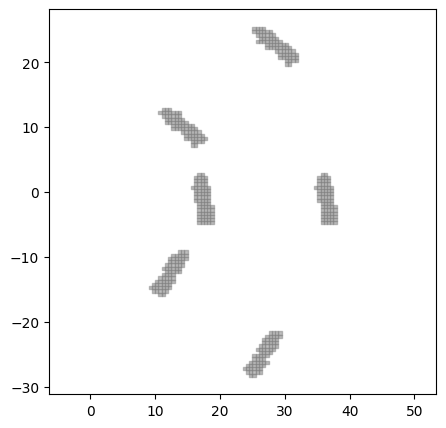

--------------------------------------------------
label: VentHole Chromosome_261: ['DoubleParabolicShape_261', 'CircularStrictTransformation_261']
predict: (0.2912721001564278, 373.2235714999999, 457.72366429999994)
biased_fitness: 0.7092666693357229, fitness: 0.6825428194357229
shape parameter:
parameter_list: [ lower_coefficient: 2.4418539381456528, upper_coefficient: 2.2375758623438964, lower_y-intercept: 1.0997002108785923, upper_y-intercept_from_lower_y: 1.3097676988843203, lower_x_trans: 1.5767738413592527, ]
pattern parameter:
parameter_list: [ di: 9.84940553325132, dx: 5.0773773501347845, phi: 0.41887902047863906, ]


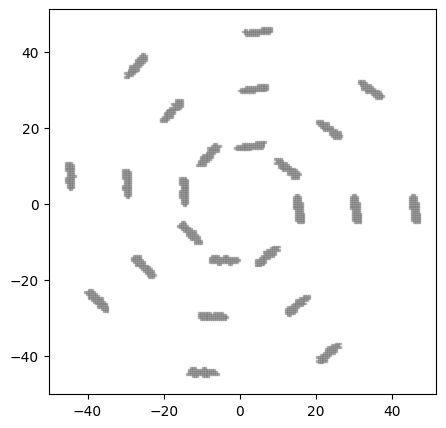

--------------------------------------------------
label: VentHole Chromosome_262: ['DoubleParabolicShape_262', 'GridStrictTransformation_262']
predict: (0.2916000926456057, 373.16560720000007, 455.6128544999999)
biased_fitness: 0.7106141141439425, fitness: 0.6901067650439429
shape parameter:
parameter_list: [ lower_coefficient: 1.9375352975820108, upper_coefficient: 2.97181898926525, lower_y-intercept: 1.44000425523358, upper_y-intercept_from_lower_y: 1.663066245683623, lower_x_trans: 1.8724601243032843, ]
pattern parameter:
parameter_list: [ dx: 7.5715733571102755, dy: 2.395091846263321, ]


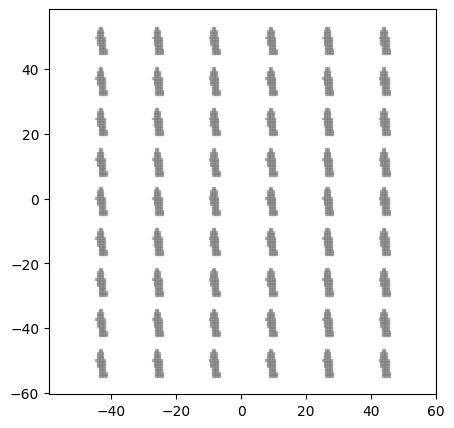

--------------------------------------------------
label: VentHole Chromosome_263: ['DoubleParabolicShape_263', 'CornerTransformation_263']
predict: (0.2891857571336134, 373.1834322999998, 458.37846310000003)
biased_fitness: 0.7291014763638672, fitness: 0.7003329516638668
shape parameter:
parameter_list: [ lower_coefficient: 1.8308643041065094, upper_coefficient: 2.008418186290001, lower_y-intercept: 1.4544525239914528, upper_y-intercept_from_lower_y: 1.5955266071157839, lower_x_trans: 0.8632481272366341, ]
pattern parameter:
parameter_list: [ di: 7.937309994175382, dx: 4.895731134026143, phi: 0.41291525948738755, rot_count: 4.0, ]


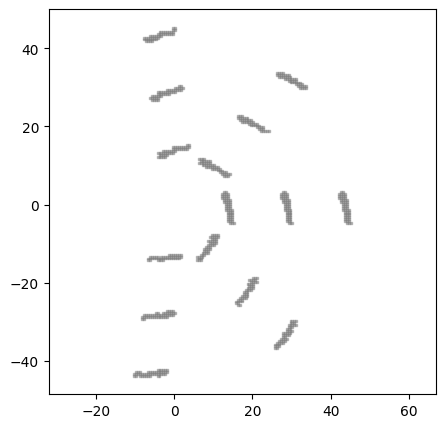

--------------------------------------------------
label: VentHole Chromosome_264: ['DoubleParabolicShape_264', 'GridStrictTransformation_264']
predict: (0.2941170503580377, 373.0730089999999, 460.4807274)
biased_fitness: 0.6763569786196237, fitness: 0.6410608144196236
shape parameter:
parameter_list: [ lower_coefficient: 1.5143338869817662, upper_coefficient: 1.2865618040014133, lower_y-intercept: 3.844432516036312, upper_y-intercept_from_lower_y: 1.9884209067302705, lower_x_trans: 0.6717532732704594, ]
pattern parameter:
parameter_list: [ dx: 3.750794007570666, dy: 0.9106978184657172, ]


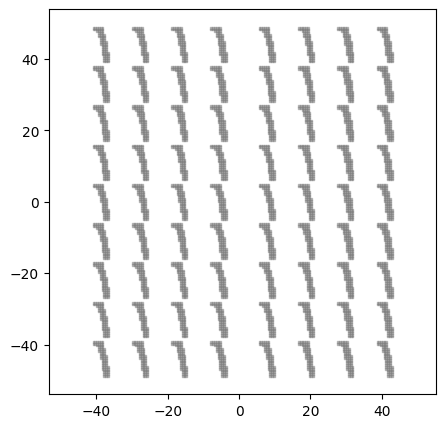

--------------------------------------------------
label: VentHole Chromosome_265: ['DoubleParabolicShape_265', 'GridStrictTransformation_265']
predict: (0.293299186317854, 373.36205689999986, 459.0299087)
biased_fitness: 0.6854139211214607, fitness: 0.6550483088214604
shape parameter:
parameter_list: [ lower_coefficient: 1.7063604753984365, upper_coefficient: 2.5378228899813826, lower_y-intercept: 1.1812413101592005, upper_y-intercept_from_lower_y: 1.033875742089578, lower_x_trans: -3.622973503664313, ]
pattern parameter:
parameter_list: [ dx: 2.7571108811958673, dy: 2.614773224520766, ]


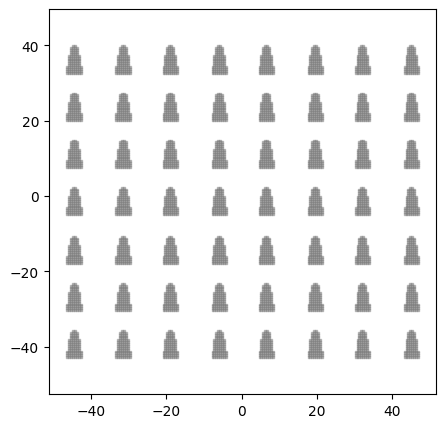

--------------------------------------------------
label: VentHole Chromosome_266: ['DoubleParabolicShape_266', 'CircularStrictTransformation_266']
predict: (0.29141688560303725, 373.6764389, 458.59653130000004)
biased_fitness: 0.7029030090696273, fitness: 0.6744662929696272
shape parameter:
parameter_list: [ lower_coefficient: 2.8285310247890636, upper_coefficient: 2.053403536519448, lower_y-intercept: 2.8815802687484653, upper_y-intercept_from_lower_y: 1.7130241780922988, lower_x_trans: -3.6215836666605017, ]
pattern parameter:
parameter_list: [ di: 13.880055064224745, dx: 7.1547651894504884, phi: 0.3306939635357677, ]


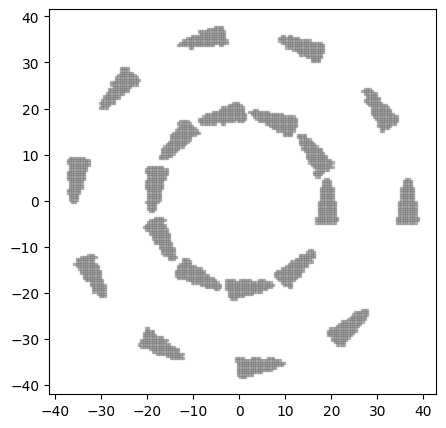

--------------------------------------------------
label: VentHole Chromosome_267: ['DoubleParabolicShape_267', 'CornerTransformation_267']
predict: (0.28851190300024476, 373.01028340000016, 458.1940963999999)
biased_fitness: 0.7374207933975513, fitness: 0.7088590709975519
shape parameter:
parameter_list: [ lower_coefficient: 2.384246050970467, upper_coefficient: 2.596339136935822, lower_y-intercept: 1.7100319169864988, upper_y-intercept_from_lower_y: 1.4690893520430397, lower_x_trans: -0.7958040083490463, ]
pattern parameter:
parameter_list: [ di: 10.333218565405602, dx: 1.1844263384666467, phi: 0.3750816444193092, rot_count: 2.0, ]


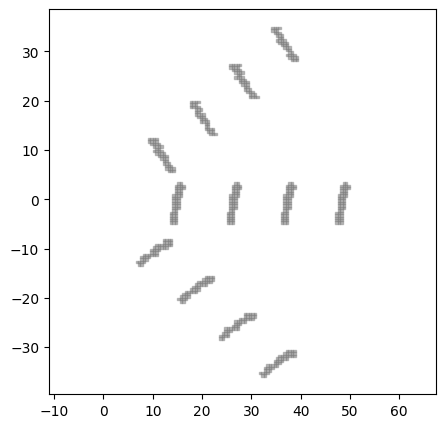

--------------------------------------------------
label: VentHole Chromosome_268: ['DoubleParabolicShape_268', 'CornerTransformation_268']
predict: (0.2887526866691634, 372.9676338000001, 458.1088194)
biased_fitness: 0.7354820579083647, fitness: 0.707090867308365
shape parameter:
parameter_list: [ lower_coefficient: 1.2322102475317005, upper_coefficient: 2.3133385940372397, lower_y-intercept: 1.232063841938825, upper_y-intercept_from_lower_y: 1.3778912212057306, lower_x_trans: 0.42260981747852, ]
pattern parameter:
parameter_list: [ di: 9.196303454208682, dx: 1.9719637887056523, phi: 0.29683686436791357, rot_count: 6.0, ]


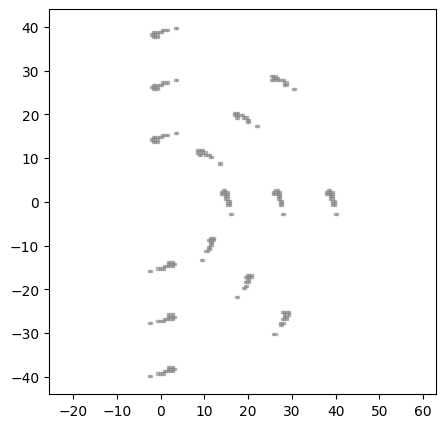

--------------------------------------------------
label: VentHole Chromosome_269: ['DoubleParabolicShape_269', 'CornerTransformation_269']
predict: (0.2888936171815697, 373.0788398000001, 456.99258070000013)
biased_fitness: 0.7355267881843022, fitness: 0.7107067256843019
shape parameter:
parameter_list: [ lower_coefficient: 1.6499386272026308, upper_coefficient: 2.6822492020490136, lower_y-intercept: 3.9383535582245175, upper_y-intercept_from_lower_y: 1.2055282993333003, lower_x_trans: -0.73162857867149, ]
pattern parameter:
parameter_list: [ di: 10.58662878610999, dx: 6.671826839114957, phi: 0.6294058690817339, rot_count: 4.0, ]


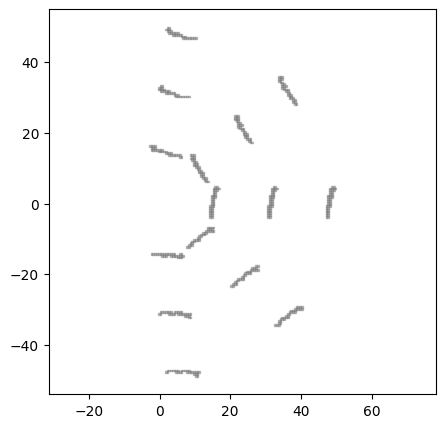

--------------------------------------------------
label: VentHole Chromosome_270: ['DoubleParabolicShape_270', 'GridStrictTransformation_270']
predict: (0.2929096215076199, 373.12647069999997, 456.6342057999998)
biased_fitness: 0.6957500784238015, fitness: 0.6721004024238021
shape parameter:
parameter_list: [ lower_coefficient: 2.3776555112860347, upper_coefficient: 1.1967919642820453, lower_y-intercept: 3.4666169453061455, upper_y-intercept_from_lower_y: 1.1945290308097252, lower_x_trans: -4.521980591982669, ]
pattern parameter:
parameter_list: [ dx: 8.396590912243123, dy: 8.600952696720295, ]


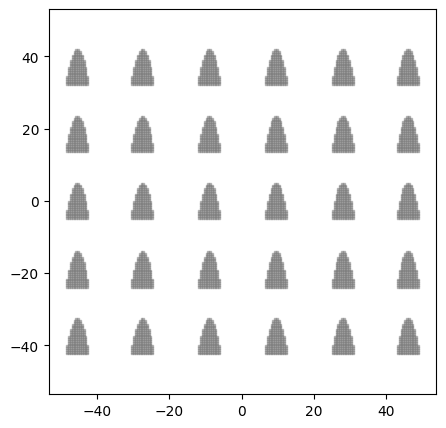

--------------------------------------------------
label: VentHole Chromosome_271: ['DoubleParabolicShape_271', 'CornerTransformation_271']
predict: (0.28974332092175237, 373.36930430000007, 458.1963726999999)
biased_fitness: 0.7225889152824759, fitness: 0.6947384057824763
shape parameter:
parameter_list: [ lower_coefficient: 2.255440059383173, upper_coefficient: 1.3242459049663047, lower_y-intercept: 1.687631912535132, upper_y-intercept_from_lower_y: 1.4010571778761802, lower_x_trans: 2.0640068073331053, ]
pattern parameter:
parameter_list: [ di: 12.054803253387039, dx: 6.706851714167927, phi: 0.5105935832310501, rot_count: 6.0, ]


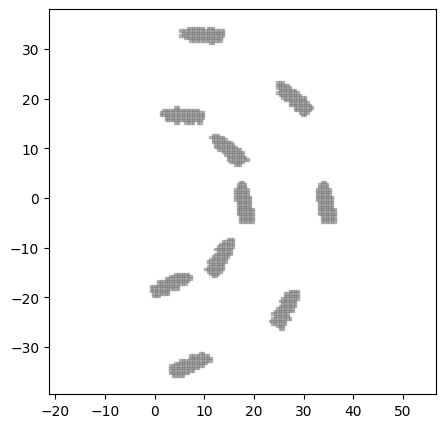

--------------------------------------------------
label: VentHole Chromosome_272: ['DoubleParabolicShape_272', 'CircularStrictTransformation_272']
predict: (0.29107809592450096, 373.3458145000002, 455.85749079999994)
biased_fitness: 0.7140833576549891, fitness: 0.6932025142549897
shape parameter:
parameter_list: [ lower_coefficient: 1.3220422992946035, upper_coefficient: 1.564471741744499, lower_y-intercept: 3.0776021574109564, upper_y-intercept_from_lower_y: 1.6394241369144917, lower_x_trans: 3.4116020019704827, ]
pattern parameter:
parameter_list: [ di: 8.843564173939214, dx: 4.079832282106249, phi: 0.7853981633974483, ]


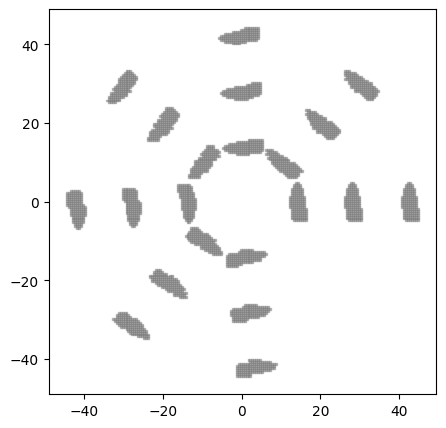

--------------------------------------------------
label: VentHole Chromosome_273: ['DoubleParabolicShape_273', 'GridStrictTransformation_273']
predict: (0.29099196577296027, 373.1708837, 456.40713329999994)
biased_fitness: 0.7150698897703973, fitness: 0.6921902572703975
shape parameter:
parameter_list: [ lower_coefficient: 1.3153580699191403, upper_coefficient: 2.580330800890085, lower_y-intercept: 3.0278689313845453, upper_y-intercept_from_lower_y: 1.7936864111153987, lower_x_trans: 4.878093960868927, ]
pattern parameter:
parameter_list: [ dx: 6.927641715851639, dy: 8.686689221807992, ]


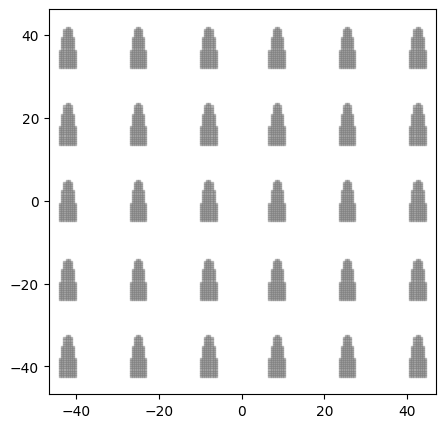

--------------------------------------------------
label: VentHole Chromosome_274: ['DoubleParabolicShape_274', 'CornerTransformation_274']
predict: (0.2909596039300908, 373.5723324000002, 456.2214767000002)
biased_fitness: 0.7129546804990898, fitness: 0.6914349151990897
shape parameter:
parameter_list: [ lower_coefficient: 1.67821056705267, upper_coefficient: 2.579441988492375, lower_y-intercept: 2.5928661216258835, upper_y-intercept_from_lower_y: 1.7771731253592034, lower_x_trans: 3.5924591038328053, ]
pattern parameter:
parameter_list: [ di: 12.41560799845412, dx: 1.2229265811899301, phi: 0.7498008317810675, rot_count: 6.0, ]


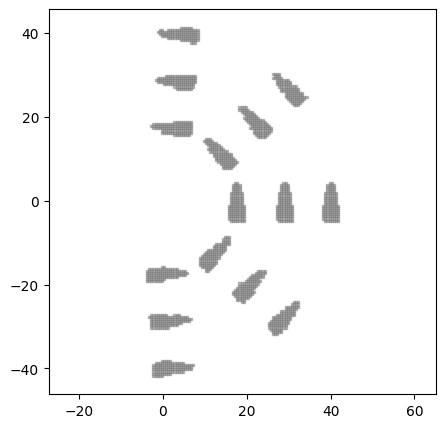

--------------------------------------------------
label: VentHole Chromosome_275: ['DoubleParabolicShape_275', 'CircularStrictTransformation_275']
predict: (0.29060917535684916, 372.8327446, 456.8130707999998)
biased_fitness: 0.7204528926315085, fitness: 0.6956791694315091
shape parameter:
parameter_list: [ lower_coefficient: 2.6991815088052427, upper_coefficient: 1.6419155780713195, lower_y-intercept: 1.6388860574680373, upper_y-intercept_from_lower_y: 1.1345125708598003, lower_x_trans: 1.7992200340977496, ]
pattern parameter:
parameter_list: [ di: 10.091601043525934, dx: 6.6393207594602694, phi: 0.41887902047863906, ]


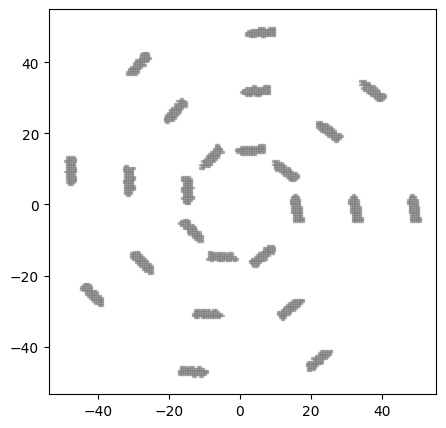

--------------------------------------------------
label: VentHole Chromosome_276: ['DoubleParabolicShape_276', 'GridStrictTransformation_276']
predict: (0.2900928361138613, 372.82905990000006, 457.1662478999999)
biased_fitness: 0.7249357237613869, fitness: 0.6990950998613873
shape parameter:
parameter_list: [ lower_coefficient: 2.6497080390778547, upper_coefficient: 2.0757751762474017, lower_y-intercept: 2.152001878200499, upper_y-intercept_from_lower_y: 1.9293870237025854, lower_x_trans: -1.383229570167254, ]
pattern parameter:
parameter_list: [ dx: 4.924528090470245, dy: 9.714663821911943, ]


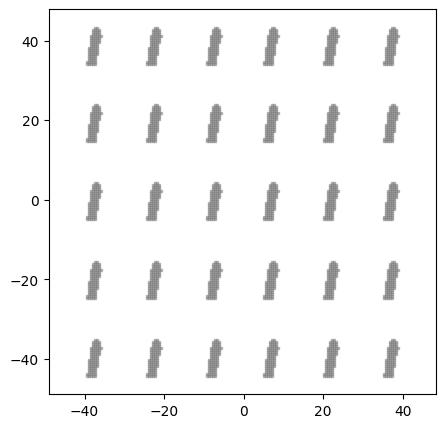

--------------------------------------------------
label: VentHole Chromosome_277: ['DoubleParabolicShape_277', 'CircularStrictTransformation_277']
predict: (0.28957934372308514, 373.06230919999996, 456.4158104)
biased_fitness: 0.7299387775691488, fitness: 0.7068159647691488
shape parameter:
parameter_list: [ lower_coefficient: 2.539398620188697, upper_coefficient: 2.39210275171086, lower_y-intercept: 3.3841581323830474, upper_y-intercept_from_lower_y: 1.8802109760570218, lower_x_trans: -0.42872992479875727, ]
pattern parameter:
parameter_list: [ di: 8.470394913597454, dx: 1.0999291897143555, phi: 0.5711986642890533, ]


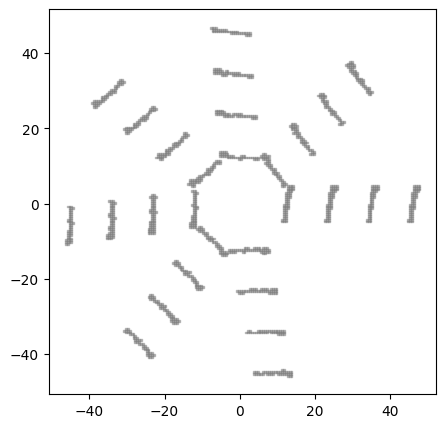

--------------------------------------------------
label: VentHole Chromosome_278: ['DoubleParabolicShape_278', 'GridStrictTransformation_278']
predict: (0.2906900207607883, 373.0264114999999, 458.1757544999998)
biased_fitness: 0.7155634028921178, fitness: 0.6870889623921183
shape parameter:
parameter_list: [ lower_coefficient: 1.081711661661979, upper_coefficient: 1.168170101654551, lower_y-intercept: 2.2743333916012394, upper_y-intercept_from_lower_y: 1.4292972299793942, lower_x_trans: -0.6330158475555763, ]
pattern parameter:
parameter_list: [ dx: 7.4787494448737, dy: 2.4417418123048042, ]


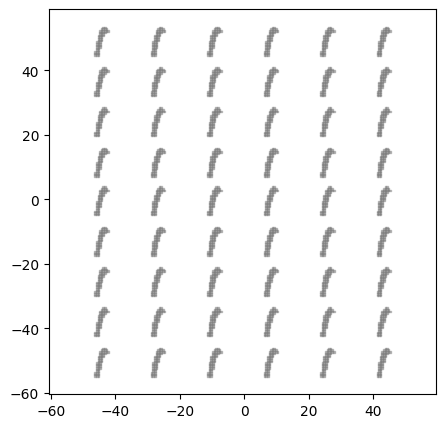

--------------------------------------------------
label: VentHole Chromosome_279: ['DoubleParabolicShape_279', 'CircularStrictTransformation_279']
predict: (0.2908760652779523, 372.9689825, 458.8659930999999)
biased_fitness: 0.7127244835204771, fitness: 0.6820644692204775
shape parameter:
parameter_list: [ lower_coefficient: 1.0344686129086973, upper_coefficient: 2.891238356140983, lower_y-intercept: 2.967664017187674, upper_y-intercept_from_lower_y: 1.2766691898486369, lower_x_trans: -3.7868356289270135, ]
pattern parameter:
parameter_list: [ di: 12.91435013782736, dx: 5.3242964036909095, phi: 0.6283185307179586, ]


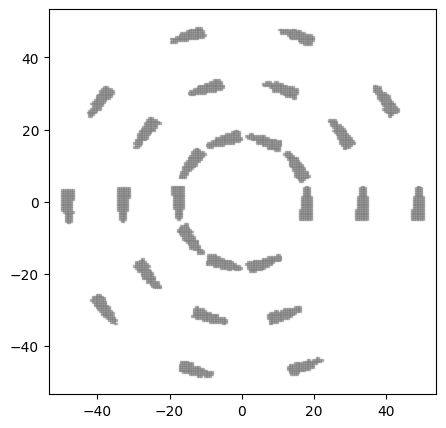

--------------------------------------------------
label: VentHole Chromosome_280: ['DoubleParabolicShape_280', 'GridStrictTransformation_280']
predict: (0.29028014208023967, 373.16915190000014, 456.60236699999996)
biased_fitness: 0.7218097818976023, fitness: 0.6983409846976026
shape parameter:
parameter_list: [ lower_coefficient: 2.6008688234266133, upper_coefficient: 1.9052289102304323, lower_y-intercept: 1.7432934312195476, upper_y-intercept_from_lower_y: 1.539420363783579, lower_x_trans: -4.039191608454794, ]
pattern parameter:
parameter_list: [ dx: 4.7862998343189025, dy: 6.0522239754761165, ]


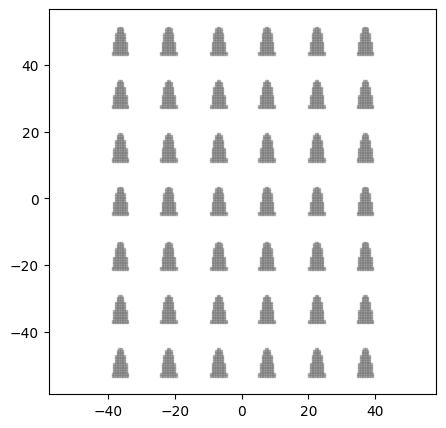

--------------------------------------------------
label: VentHole Chromosome_281: ['DoubleParabolicShape_281', 'CornerTransformation_281']
predict: (0.2918810790422248, 373.8268029, 459.7066815)
biased_fitness: 0.6949882262777516, fitness: 0.6635217875777516
shape parameter:
parameter_list: [ lower_coefficient: 1.1919040145707303, upper_coefficient: 1.2481008502297006, lower_y-intercept: 3.456024282301414, upper_y-intercept_from_lower_y: 1.2048473221716982, lower_x_trans: 4.085779366925427, ]
pattern parameter:
parameter_list: [ di: 7.6478426732251155, dx: 2.0990669202513947, phi: 0.2748631022078722, rot_count: 6.0, ]


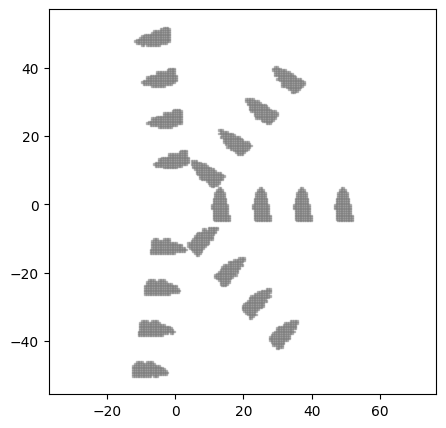

--------------------------------------------------
label: VentHole Chromosome_282: ['DoubleParabolicShape_282', 'GridStrictTransformation_282']
predict: (0.28983719785466233, 372.9329268999998, 457.43793020000004)
biased_fitness: 0.7262216727533778, fitness: 0.6997737359533773
shape parameter:
parameter_list: [ lower_coefficient: 2.9037445842015206, upper_coefficient: 2.048239833703689, lower_y-intercept: 2.3919897978376103, upper_y-intercept_from_lower_y: 1.4275661254789167, lower_x_trans: -0.8512649947437616, ]
pattern parameter:
parameter_list: [ dx: 9.356578079675181, dy: 8.974543283172858, ]


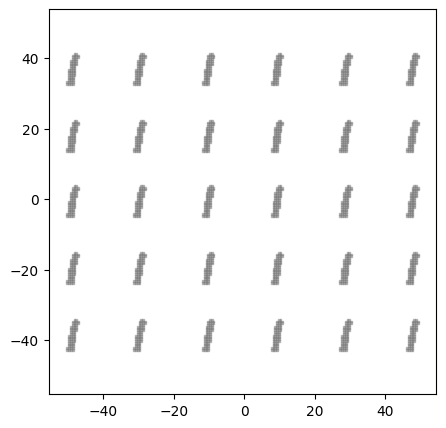

--------------------------------------------------
label: VentHole Chromosome_283: ['DoubleParabolicShape_283', 'CircularStrictTransformation_283']
predict: (0.28913249908648275, 372.8661865999999, 456.8399289000001)
biased_fitness: 0.734931845135173, fitness: 0.7101444316351726
shape parameter:
parameter_list: [ lower_coefficient: 1.8662417246436787, upper_coefficient: 2.7966880692338925, lower_y-intercept: 2.711854237227248, upper_y-intercept_from_lower_y: 1.452411432469622, lower_x_trans: 0.1069170409265503, ]
pattern parameter:
parameter_list: [ di: 12.301438751185099, dx: 1.5470286842305987, phi: 0.6283185307179586, ]


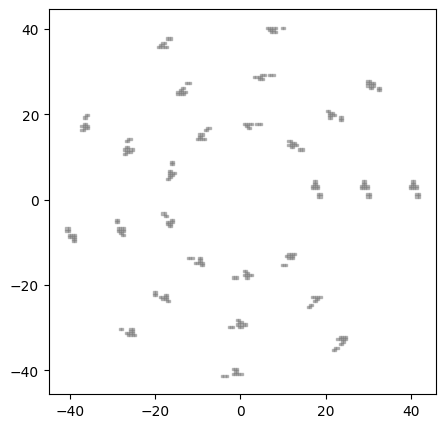

--------------------------------------------------
label: VentHole Chromosome_284: ['DoubleParabolicShape_284', 'GridStrictTransformation_284']
predict: (0.29108874551034813, 373.5676303000002, 461.4574699999999)
biased_fitness: 0.7012241927965174, fitness: 0.6639870433965182
shape parameter:
parameter_list: [ lower_coefficient: 1.697837085432551, upper_coefficient: 2.9059176657972157, lower_y-intercept: 2.797770240845775, upper_y-intercept_from_lower_y: 1.4830666183486412, lower_x_trans: -2.6330391846496317, ]
pattern parameter:
parameter_list: [ dx: 3.603003901524936, dy: 5.495987262788465, ]


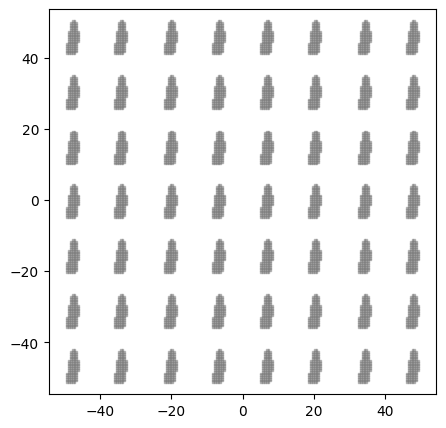

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_285', 'CornerTransformation_285']
predict: (0.28854498928741057, 373.1788958000002, 456.5161290999999)
biased_fitness: 0.739265578325893, fitness: 0.7160749826258939
shape parameter:
parameter_list: [ lower_coefficient: 2.0945254096794983, upper_coefficient: 2.580252228680345, lower_y-intercept: 3.2615152443806794, upper_y-intercept_from_lower_y: 1.6699972788550854, lower_x_trans: -0.8154505988124958, ]
pattern parameter:
parameter_list: [ di: 14.01435137010727, dx: 8.785304613936349, phi: 0.32882778280910635, rot_count: 3.0, ]


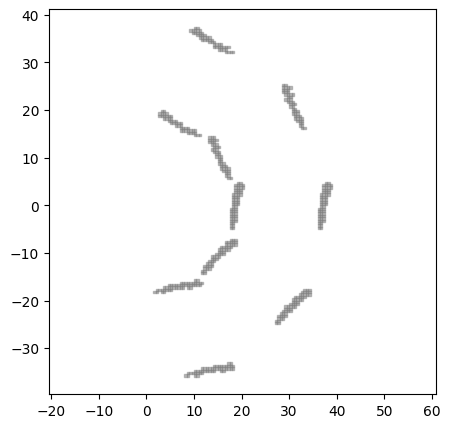

--------------------------------------------------
label: VentHole Chromosome_286: ['DoubleParabolicShape_286', 'CircularStrictTransformation_286']
predict: (0.29145055123944985, 373.4612925999999, 455.33454379999995)
biased_fitness: 0.7105963518055021, fitness: 0.691515305605502
shape parameter:
parameter_list: [ lower_coefficient: 1.4585189750344039, upper_coefficient: 1.7538126418017206, lower_y-intercept: 2.712485329545597, upper_y-intercept_from_lower_y: 1.9898048754458078, lower_x_trans: 2.205181562398603, ]
pattern parameter:
parameter_list: [ di: 11.197462373888504, dx: 2.4067799705392936, phi: 0.6283185307179586, ]


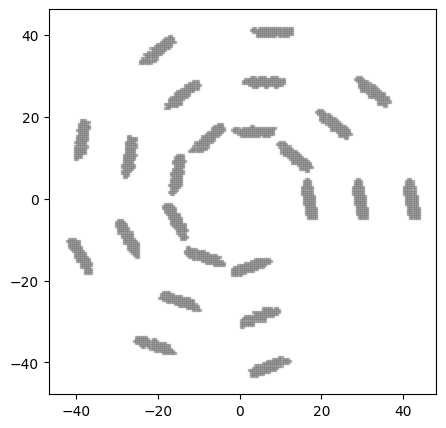

--------------------------------------------------
label: VentHole Chromosome_287: ['DoubleParabolicShape_287', 'CircularStrictTransformation_287']
predict: (0.28947292649813283, 373.0030788, 457.2834394000001)
biased_fitness: 0.7296823046186712, fitness: 0.7038381440186711
shape parameter:
parameter_list: [ lower_coefficient: 2.183695784407494, upper_coefficient: 2.598255619265771, lower_y-intercept: 2.7518434464027175, upper_y-intercept_from_lower_y: 1.076033498078997, lower_x_trans: -1.8367937939736412, ]
pattern parameter:
parameter_list: [ di: 8.38867667624895, dx: 5.1549324800656535, phi: 0.6981317007977318, ]


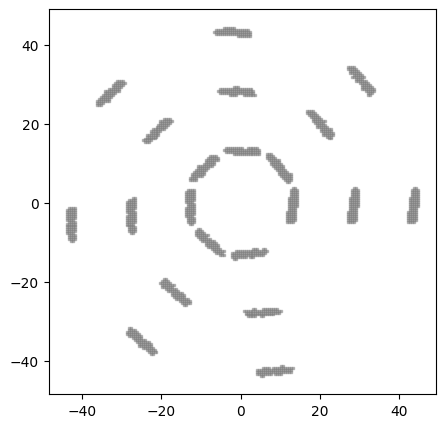

--------------------------------------------------
label: VentHole Chromosome_288: ['DoubleParabolicShape_288', 'CircularStrictTransformation_288']
predict: (0.2905352216755277, 372.92645780000015, 458.8784505999995)
biased_fitness: 0.7164056774447228, fitness: 0.6856232412447246
shape parameter:
parameter_list: [ lower_coefficient: 1.4330500638057826, upper_coefficient: 2.617163232192733, lower_y-intercept: 3.105412721186106, upper_y-intercept_from_lower_y: 1.69517788268996, lower_x_trans: 2.4051327615933555, ]
pattern parameter:
parameter_list: [ di: 9.152487056206306, dx: 8.08308365859888, phi: 0.7853981633974483, ]


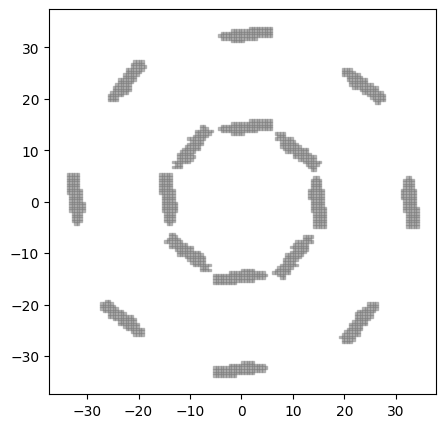

--------------------------------------------------
label: VentHole Chromosome_289: ['DoubleParabolicShape_289', 'CornerTransformation_289']
predict: (0.2904835509456225, 373.1304686, 459.23951749999986)
biased_fitness: 0.7147721753437754, fitness: 0.6833145600437757
shape parameter:
parameter_list: [ lower_coefficient: 1.3700694844313301, upper_coefficient: 2.213102462704511, lower_y-intercept: 2.4992225405194155, upper_y-intercept_from_lower_y: 1.0692505715082308, lower_x_trans: -3.751301816859111, ]
pattern parameter:
parameter_list: [ di: 8.874765568277333, dx: 6.022628498988359, phi: 0.4705281639929295, rot_count: 3.0, ]


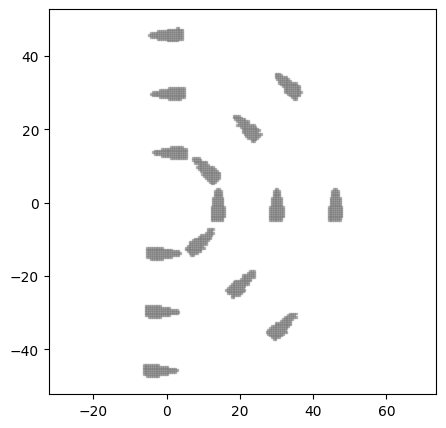

--------------------------------------------------
label: VentHole Chromosome_290: ['DoubleParabolicShape_290', 'CornerTransformation_290']
predict: (0.2911949413322108, 374.05717039999996, 456.15453529999996)
biased_fitness: 0.7073413232778921, fitness: 0.6869920581778922
shape parameter:
parameter_list: [ lower_coefficient: 1.3021168777611143, upper_coefficient: 1.0413458098691273, lower_y-intercept: 3.5778200369491433, upper_y-intercept_from_lower_y: 1.2200217478520528, lower_x_trans: -3.2873196526957136, ]
pattern parameter:
parameter_list: [ di: 14.31073103614283, dx: 0.7653460819478328, phi: 0.5976376210035838, rot_count: 5.0, ]


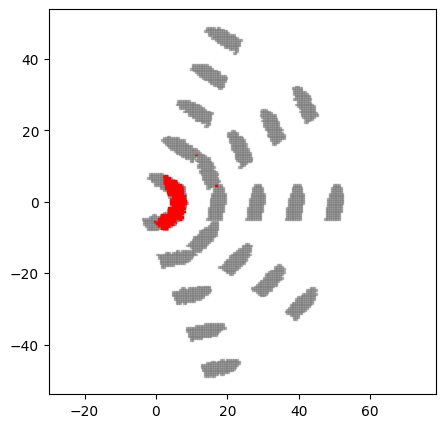

--------------------------------------------------
label: VentHole Chromosome_291: ['DoubleParabolicShape_291', 'CircularStrictTransformation_291']
predict: (0.28901199331033345, 373.2049552, 456.6792737999999)
biased_fitness: 0.7340868328966657, fitness: 0.7104589218966659
shape parameter:
parameter_list: [ lower_coefficient: 1.4609104468703094, upper_coefficient: 2.3368147272557347, lower_y-intercept: 1.164296569046394, upper_y-intercept_from_lower_y: 1.0914475948537676, lower_x_trans: 0.76661039978638, ]
pattern parameter:
parameter_list: [ di: 12.311306586581676, dx: 7.897019330253542, phi: 0.6981317007977318, ]


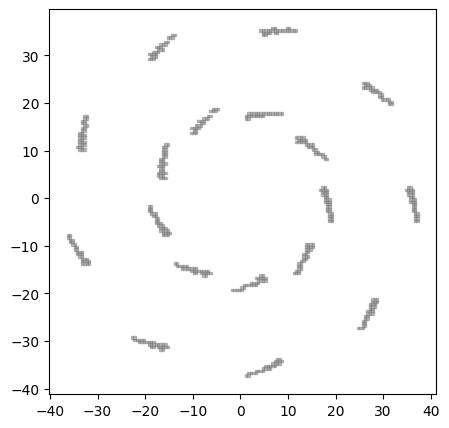

--------------------------------------------------
label: VentHole Chromosome_292: ['DoubleParabolicShape_292', 'GridStrictTransformation_292']
predict: (0.29248891798642207, 373.25816640000005, 457.9382934)
biased_fitness: 0.6964270685357787, fitness: 0.6691285211357788
shape parameter:
parameter_list: [ lower_coefficient: 2.9959936029840946, upper_coefficient: 1.8455864913801927, lower_y-intercept: 2.2617244692722194, upper_y-intercept_from_lower_y: 1.0104083727124709, lower_x_trans: 1.3858432088827772, ]
pattern parameter:
parameter_list: [ dx: 1.4098071017352174, dy: 6.474522275901873, ]


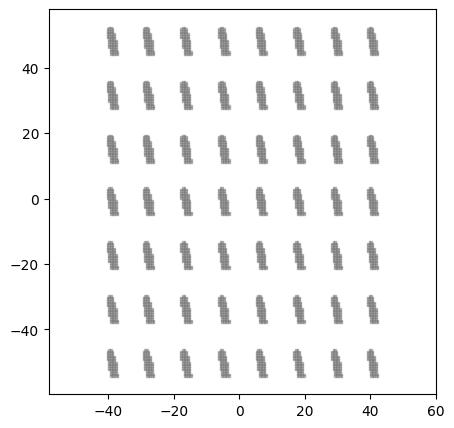

--------------------------------------------------
label: VentHole Chromosome_293: ['DoubleParabolicShape_293', 'CircularStrictTransformation_293']
predict: (0.2904296965505049, 373.22507669999993, 456.33898180000006)
biased_fitness: 0.7204495339949514, fitness: 0.6978827419949512
shape parameter:
parameter_list: [ lower_coefficient: 1.2028063345653845, upper_coefficient: 1.3351702369184368, lower_y-intercept: 1.5155852607650413, upper_y-intercept_from_lower_y: 1.8296859231469598, lower_x_trans: -1.3772110913049485, ]
pattern parameter:
parameter_list: [ di: 9.724004483980586, dx: 3.662234274561445, phi: 0.6283185307179586, ]


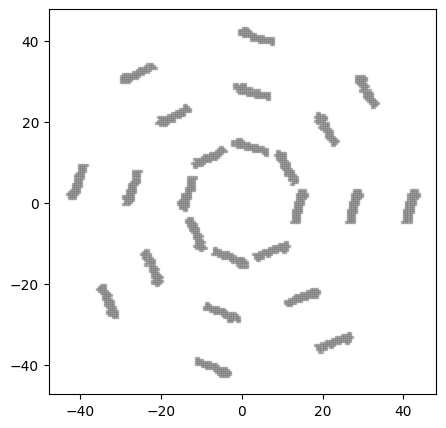

--------------------------------------------------
label: VentHole Chromosome_294: ['DoubleParabolicShape_294', 'CornerTransformation_294']
predict: (0.28827596873558825, 373.0817877, 458.3297149999999)
biased_fitness: 0.7390083687441175, fitness: 0.7101827991441179
shape parameter:
parameter_list: [ lower_coefficient: 2.72737113546097, upper_coefficient: 2.071563255796592, lower_y-intercept: 1.094318540858612, upper_y-intercept_from_lower_y: 1.5576624817711928, lower_x_trans: -0.37551237104971324, ]
pattern parameter:
parameter_list: [ di: 14.852736906404758, dx: 8.54121755993453, phi: 0.3600557940647045, rot_count: 2.0, ]


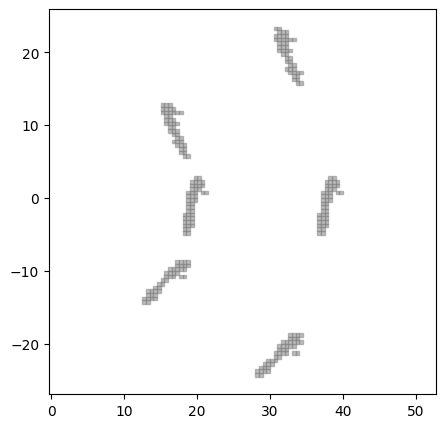

--------------------------------------------------
label: VentHole Chromosome_295: ['DoubleParabolicShape_295', 'GridStrictTransformation_295']
predict: (0.2901583520108346, 372.85966640000015, 457.8869134000002)
biased_fitness: 0.7226249882916522, fitness: 0.6946835808916519
shape parameter:
parameter_list: [ lower_coefficient: 2.3456686218615252, upper_coefficient: 1.0877510111679831, lower_y-intercept: 2.412683047063868, upper_y-intercept_from_lower_y: 1.4565545800988273, lower_x_trans: 1.9276255819419799, ]
pattern parameter:
parameter_list: [ dx: 4.767245625661455, dy: 6.567466667733559, ]


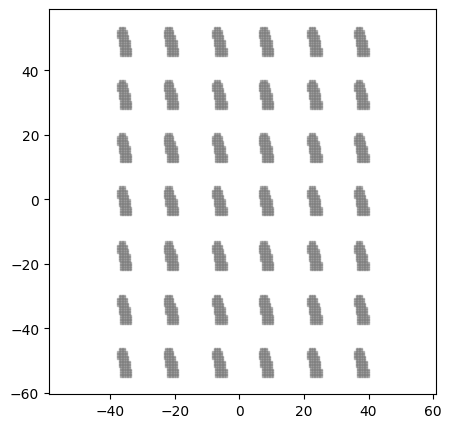

--------------------------------------------------
label: VentHole Chromosome_296: ['DoubleParabolicShape_296', 'CircularStrictTransformation_296']
predict: (0.2910135843714978, 373.42213199999986, 457.08597499999973)
biased_fitness: 0.711737282285023, fitness: 0.6873236212850236
shape parameter:
parameter_list: [ lower_coefficient: 2.213757079172429, upper_coefficient: 2.5923704141608894, lower_y-intercept: 3.586279452916807, upper_y-intercept_from_lower_y: 1.6295367289950233, lower_x_trans: 2.8528290749191854, ]
pattern parameter:
parameter_list: [ di: 9.623669875353915, dx: 9.191130039143195, phi: 0.6283185307179586, ]


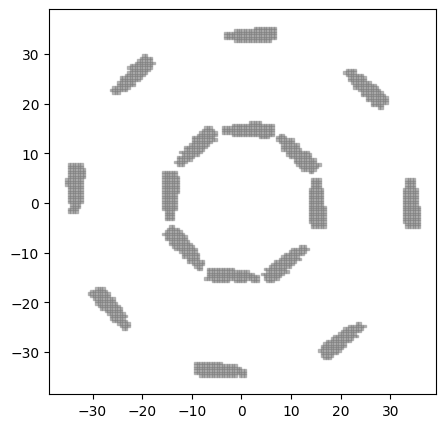

--------------------------------------------------
label: VentHole Chromosome_297: ['DoubleParabolicShape_297', 'CircularStrictTransformation_297']
predict: (0.2896202893243114, 373.1582148, 456.6496497999999)
biased_fitness: 0.7283903035568862, fitness: 0.7047577837568865
shape parameter:
parameter_list: [ lower_coefficient: 2.2159398632821548, upper_coefficient: 1.8189291696781187, lower_y-intercept: 2.7320749481929587, upper_y-intercept_from_lower_y: 1.7628073976284648, lower_x_trans: 0.03339995915874816, ]
pattern parameter:
parameter_list: [ di: 8.92045807580551, dx: 4.3210960557465485, phi: 0.5235987755982988, ]


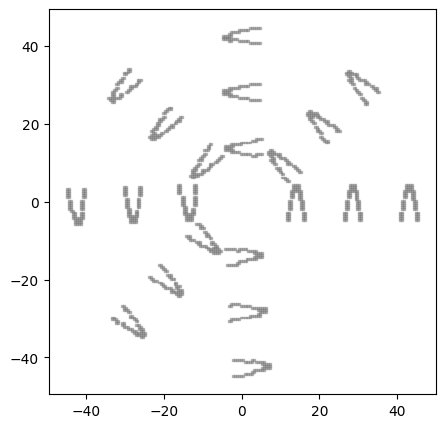

--------------------------------------------------
label: VentHole Chromosome_298: ['DoubleParabolicShape_298', 'CircularStrictTransformation_298']
predict: (0.29126455117740724, 373.53143660000006, 458.18041980000004)
biased_fitness: 0.706273592425927, fitness: 0.678795206225927
shape parameter:
parameter_list: [ lower_coefficient: 1.3592605861060478, upper_coefficient: 1.433146920108118, lower_y-intercept: 2.243829654461711, upper_y-intercept_from_lower_y: 1.2796090326540221, lower_x_trans: 3.2835605686270135, ]
pattern parameter:
parameter_list: [ di: 8.38204540027181, dx: 5.147821188367621, phi: 0.5235987755982988, ]


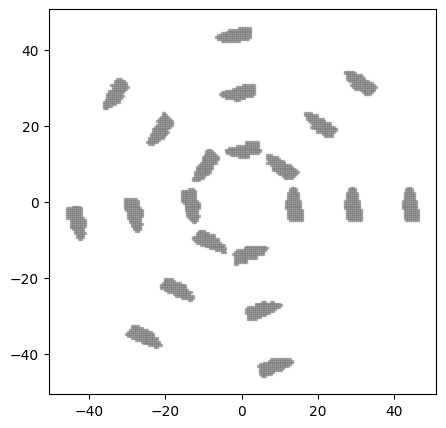

--------------------------------------------------
label: VentHole Chromosome_299: ['DoubleParabolicShape_299', 'CornerTransformation_299']
predict: (0.2889194148641612, 372.7479854999999, 457.02526419999975)
biased_fitness: 0.7375194244583891, fitness: 0.7119396028583898
shape parameter:
parameter_list: [ lower_coefficient: 1.0844685246087862, upper_coefficient: 2.295897694324392, lower_y-intercept: 2.709526526798033, upper_y-intercept_from_lower_y: 1.6519772539159365, lower_x_trans: 1.2121800218218626, ]
pattern parameter:
parameter_list: [ di: 10.47526018334634, dx: 6.0487879517964505, phi: 0.7507965623365593, rot_count: 5.0, ]


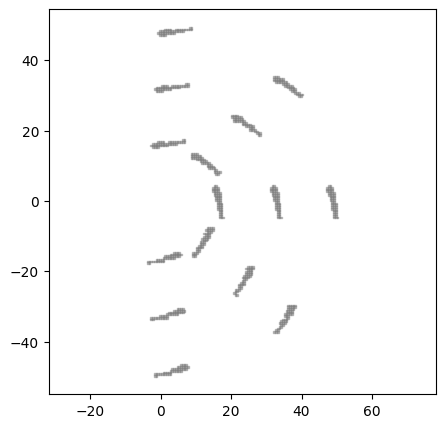

--------------------------------------------------
label: VentHole Chromosome_300: ['DoubleParabolicShape_300', 'CircularStrictTransformation_300']
predict: (0.29121411136249664, 372.6927251000001, 457.1264107999998)
biased_fitness: 0.7147569890750334, fitness: 0.6887632068750341
shape parameter:
parameter_list: [ lower_coefficient: 2.3163016106950214, upper_coefficient: 1.104463972831054, lower_y-intercept: 1.967214083859179, upper_y-intercept_from_lower_y: 1.8494172189758067, lower_x_trans: 1.6621287665907811, ]
pattern parameter:
parameter_list: [ di: 10.992387820639076, dx: 5.099299443429617, phi: 0.7853981633974483, ]


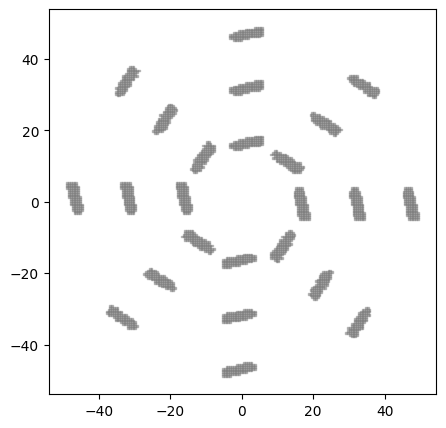

--------------------------------------------------
label: VentHole Chromosome_301: ['DoubleParabolicShape_301', 'CircularStrictTransformation_301']
predict: (0.2915817139630059, 373.49131389999997, 457.2100738)
biased_fitness: 0.7053235154699409, fitness: 0.680675921869941
shape parameter:
parameter_list: [ lower_coefficient: 2.091475719174615, upper_coefficient: 1.1489087318443967, lower_y-intercept: 1.047425696228962, upper_y-intercept_from_lower_y: 1.8942784113472113, lower_x_trans: 3.582898493018531, ]
pattern parameter:
parameter_list: [ di: 11.768712093904469, dx: 6.179991831189492, phi: 0.6981317007977318, ]


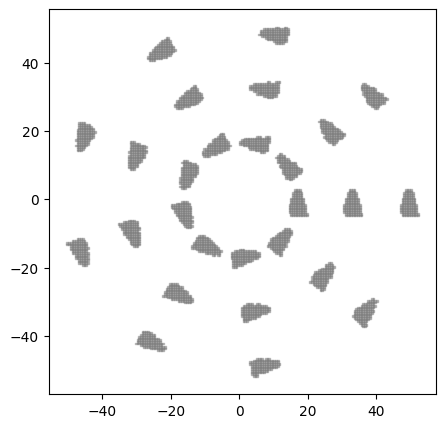

--------------------------------------------------
label: VentHole Chromosome_302: ['DoubleParabolicShape_302', 'CircularStrictTransformation_302']
predict: (0.28915223149966307, 373.2758619000001, 456.7637498999998)
biased_fitness: 0.7320191519033689, fitness: 0.7082796260033696
shape parameter:
parameter_list: [ lower_coefficient: 1.4318913426499615, upper_coefficient: 2.052960083828687, lower_y-intercept: 1.1101040065199759, upper_y-intercept_from_lower_y: 1.5007498119706555, lower_x_trans: 3.8219945682663727, ]
pattern parameter:
parameter_list: [ di: 12.832468266920369, dx: 8.092078577782297, phi: 0.6283185307179586, ]


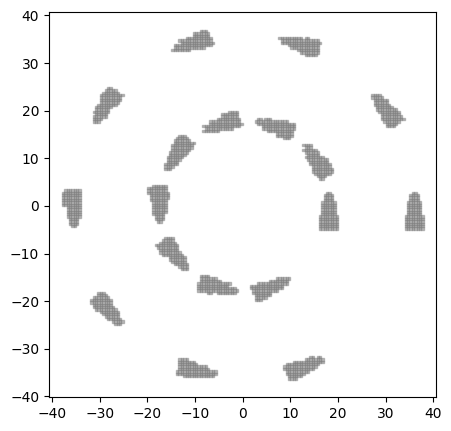

--------------------------------------------------
label: VentHole Chromosome_303: ['DoubleParabolicShape_303', 'GridStrictTransformation_303']
predict: (0.2918629940731998, 374.4844678, 459.32525189999984)
biased_fitness: 0.6913282808680019, fitness: 0.6623214607680025
shape parameter:
parameter_list: [ lower_coefficient: 2.907010722730006, upper_coefficient: 2.598612746794454, lower_y-intercept: 2.963955794018749, upper_y-intercept_from_lower_y: 1.9714442597866877, lower_x_trans: 2.0207574175280154, ]
pattern parameter:
parameter_list: [ dx: 0.7966719102634339, dy: 7.138531838294243, ]


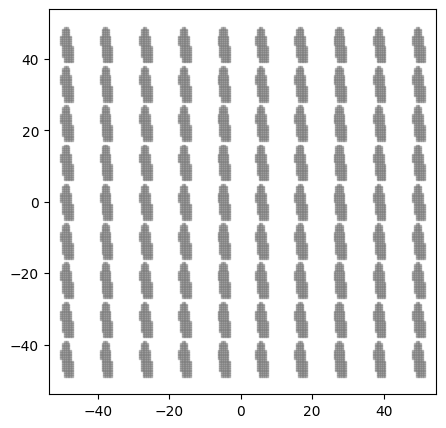

--------------------------------------------------
label: VentHole Chromosome_304: ['DoubleParabolicShape_304', 'CornerTransformation_304']
predict: (0.2904693116186816, 373.43771709999993, 459.6577209999999)
biased_fitness: 0.7119274221131844, fitness: 0.6798296933131844
shape parameter:
parameter_list: [ lower_coefficient: 2.7257445259048914, upper_coefficient: 1.237312246161564, lower_y-intercept: 3.716443866675648, upper_y-intercept_from_lower_y: 1.4765776136758832, lower_x_trans: -2.5319391467771126, ]
pattern parameter:
parameter_list: [ di: 11.963459063857446, dx: 4.619212390472446, phi: 0.6264477657343372, rot_count: 4.0, ]


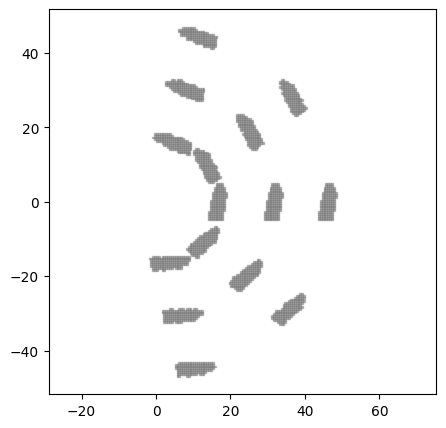

--------------------------------------------------
label: VentHole Chromosome_305: ['DoubleParabolicShape_305', 'CircularStrictTransformation_305']
predict: (0.29160113688865863, 372.9444002999999, 460.53788999999995)
biased_fitness: 0.7023020490134141, fitness: 0.6665771796134142
shape parameter:
parameter_list: [ lower_coefficient: 2.9774474672140947, upper_coefficient: 1.4220709987546845, lower_y-intercept: 3.3410585493668683, upper_y-intercept_from_lower_y: 1.7538735512899906, lower_x_trans: 3.0788792568506533, ]
pattern parameter:
parameter_list: [ di: 10.947257419074454, dx: 5.938571402106545, phi: 0.4487989505128276, ]


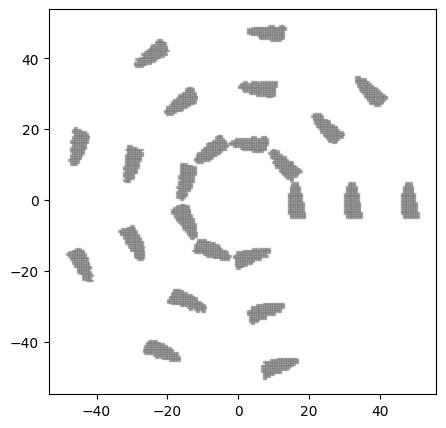

--------------------------------------------------
label: VentHole Chromosome_306: ['DoubleParabolicShape_306', 'CircularStrictTransformation_306']
predict: (0.2920291141402498, 373.6505143, 458.4076316999996)
biased_fitness: 0.6973399950975028, fitness: 0.6694181285975038
shape parameter:
parameter_list: [ lower_coefficient: 2.3096539585862033, upper_coefficient: 1.5095785876708765, lower_y-intercept: 1.3109114947099734, upper_y-intercept_from_lower_y: 1.8028390830605918, lower_x_trans: 1.8087438258881132, ]
pattern parameter:
parameter_list: [ di: 14.66462562780223, dx: 3.16204664194701, phi: 0.39269908169872414, ]


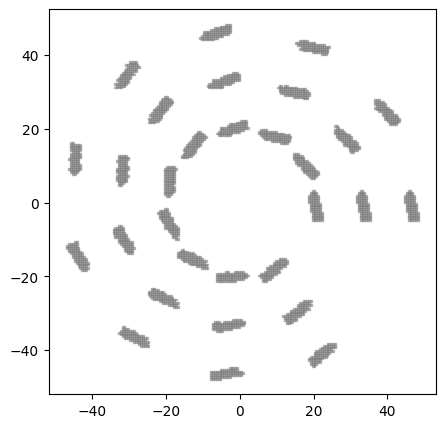

--------------------------------------------------
label: VentHole Chromosome_307: ['DoubleParabolicShape_307', 'CornerTransformation_307']
predict: (0.29021838927815713, 373.15271329999996, 458.9819413999999)
biased_fitness: 0.717783231318429, fitness: 0.6871428337184292
shape parameter:
parameter_list: [ lower_coefficient: 1.4415093737645497, upper_coefficient: 2.6445650542448833, lower_y-intercept: 2.924319410294312, upper_y-intercept_from_lower_y: 1.9512437322721354, lower_x_trans: 2.1586105143553747, ]
pattern parameter:
parameter_list: [ di: 9.277452860947102, dx: 4.516120024140975, phi: 0.40772881985772624, rot_count: 3.0, ]


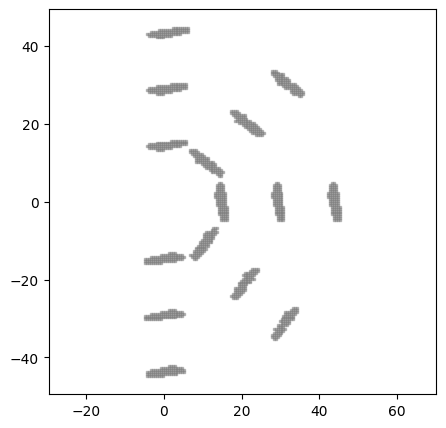

--------------------------------------------------
label: VentHole Chromosome_308: ['DoubleParabolicShape_308', 'GridStrictTransformation_308']
predict: (0.29286677562380325, 373.3763909, 456.1433294999999)
biased_fitness: 0.6954108484619677, fitness: 0.673733641761968
shape parameter:
parameter_list: [ lower_coefficient: 1.2124239285245901, upper_coefficient: 1.2031709906927566, lower_y-intercept: 2.957541268380592, upper_y-intercept_from_lower_y: 1.9892365334790094, lower_x_trans: 3.5964253859787583, ]
pattern parameter:
parameter_list: [ dx: 8.106663426991934, dy: 8.732704083520353, ]


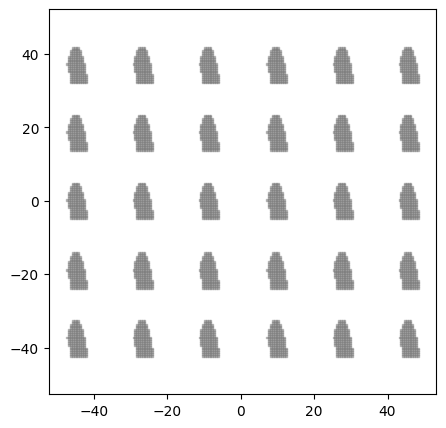

--------------------------------------------------
label: VentHole Chromosome_309: ['DoubleParabolicShape_309', 'CircularStrictTransformation_309']
predict: (0.2901740993117423, 372.75743709999995, 457.2883294999999)
biased_fitness: 0.7243802881825772, fitness: 0.6980301738825774
shape parameter:
parameter_list: [ lower_coefficient: 1.3114349836822234, upper_coefficient: 2.8368476725040317, lower_y-intercept: 2.4532475806913503, upper_y-intercept_from_lower_y: 1.8539709580197359, lower_x_trans: -2.248515098902195, ]
pattern parameter:
parameter_list: [ di: 9.376477427121612, dx: 8.487117282994433, phi: 0.6283185307179586, ]


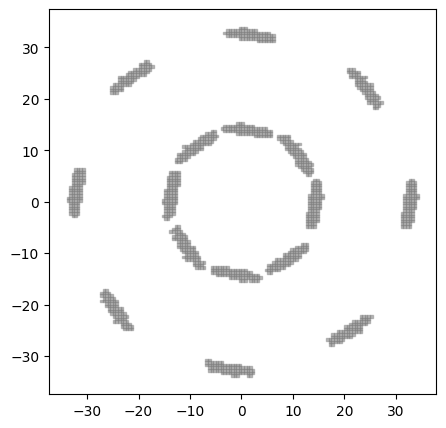

--------------------------------------------------
label: VentHole Chromosome_310: ['DoubleParabolicShape_310', 'GridStrictTransformation_310']
predict: (0.2925865920228805, 373.0598845999999, 458.1052858000001)
biased_fitness: 0.6965043159711951, fitness: 0.6683082277711947
shape parameter:
parameter_list: [ lower_coefficient: 1.4633661150793462, upper_coefficient: 1.4732604554613002, lower_y-intercept: 2.311885750955864, upper_y-intercept_from_lower_y: 1.7931116403879814, lower_x_trans: -2.7837371778112474, ]
pattern parameter:
parameter_list: [ dx: 6.911838234484597, dy: 2.1182173048132498, ]


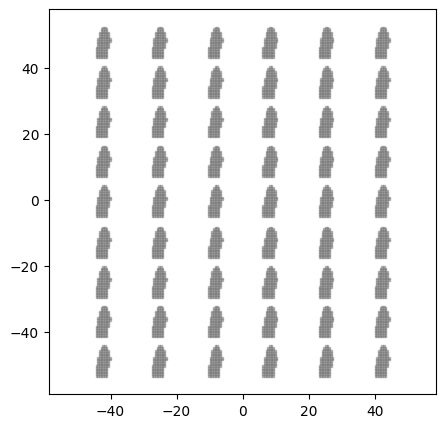

--------------------------------------------------
label: VentHole Chromosome_311: ['DoubleParabolicShape_311', 'GridStrictTransformation_311']
predict: (0.291054945433765, 373.31121189999993, 457.45439739999995)
biased_fitness: 0.7113632675623506, fitness: 0.6856224991623506
shape parameter:
parameter_list: [ lower_coefficient: 2.5980079337162496, upper_coefficient: 1.2449623588151264, lower_y-intercept: 2.3871311440841967, upper_y-intercept_from_lower_y: 1.0073150817848102, lower_x_trans: -3.714786604682346, ]
pattern parameter:
parameter_list: [ dx: 9.227466225556023, dy: 6.563484351522812, ]


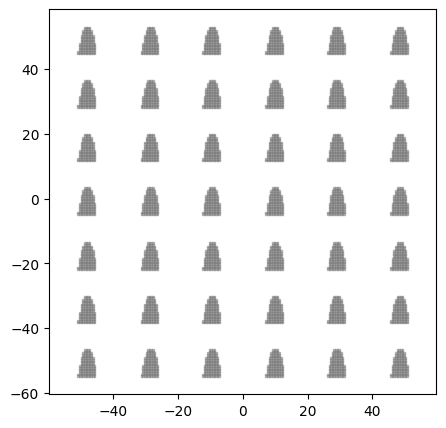

--------------------------------------------------
label: VentHole Chromosome_312: ['DoubleParabolicShape_312', 'GridStrictTransformation_312']
predict: (0.2911243429318804, 373.36651129999996, 453.9452469)
biased_fitness: 0.7173004977811963, fitness: 0.7021977796811963
shape parameter:
parameter_list: [ lower_coefficient: 1.6091747527921922, upper_coefficient: 2.346917090179035, lower_y-intercept: 1.1852517950139192, upper_y-intercept_from_lower_y: 1.672721611221394, lower_x_trans: -3.2159811541433947, ]
pattern parameter:
parameter_list: [ dx: 9.339462442414435, dy: 3.710430468239829, ]


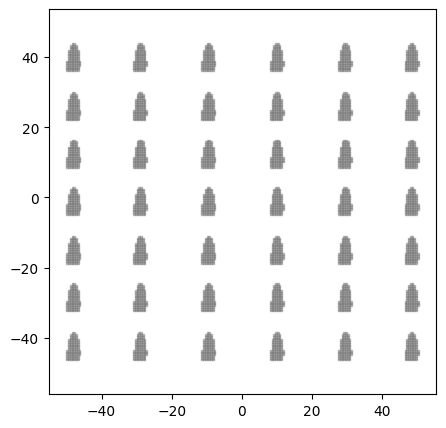

--------------------------------------------------
label: VentHole Chromosome_313: ['DoubleParabolicShape_313', 'CornerTransformation_313']
predict: (0.28952888288534195, 373.17368460000006, 456.57454879999983)
biased_fitness: 0.7293462813465802, fitness: 0.7059700041465808
shape parameter:
parameter_list: [ lower_coefficient: 2.4890551180608567, upper_coefficient: 2.939150412709095, lower_y-intercept: 1.6159965472146185, upper_y-intercept_from_lower_y: 1.4932713419937234, lower_x_trans: 3.16050543168876, ]
pattern parameter:
parameter_list: [ di: 7.594247968598097, dx: 7.566330487956419, phi: 0.5556839649627208, rot_count: 5.0, ]


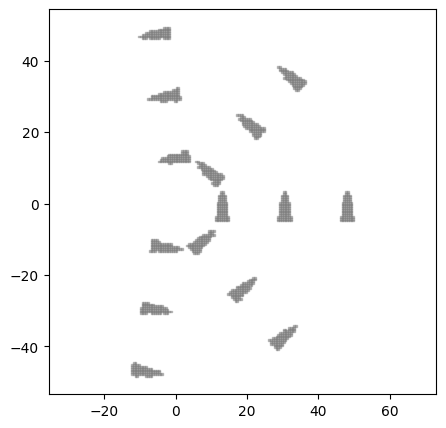

--------------------------------------------------
label: VentHole Chromosome_314: ['DoubleParabolicShape_314', 'GridStrictTransformation_314']
predict: (0.2924829011045196, 373.38340699999986, 459.3895559000001)
biased_fitness: 0.6927080281548048, fitness: 0.6613061744548042
shape parameter:
parameter_list: [ lower_coefficient: 2.8513670638825914, upper_coefficient: 1.4598546751874644, lower_y-intercept: 1.011220842476853, upper_y-intercept_from_lower_y: 1.2484745232805423, lower_x_trans: -2.853476169695297, ]
pattern parameter:
parameter_list: [ dx: 1.3913109471412286, dy: 4.749207656175172, ]


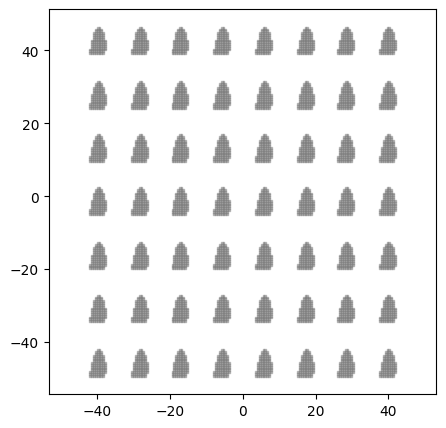

--------------------------------------------------
label: VentHole Chromosome_315: ['DoubleParabolicShape_315', 'CornerTransformation_315']
predict: (0.29003276129525024, 373.39300440000005, 456.95161429999985)
biased_fitness: 0.7220181276474975, fitness: 0.697949293547498
shape parameter:
parameter_list: [ lower_coefficient: 2.247127922985409, upper_coefficient: 2.1021877195359426, lower_y-intercept: 3.757507264805342, upper_y-intercept_from_lower_y: 1.6378913983417822, lower_x_trans: 2.2526505990867793, ]
pattern parameter:
parameter_list: [ di: 12.171701975781264, dx: 4.040744657004925, phi: 0.574129954541267, rot_count: 5.0, ]


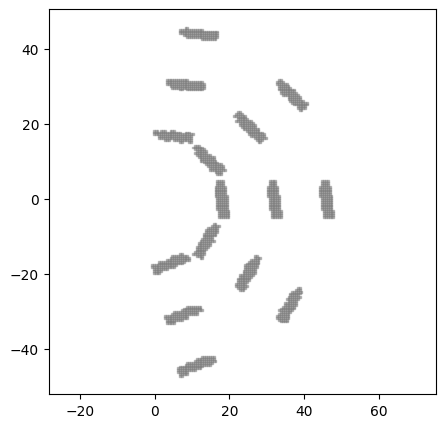

--------------------------------------------------
label: VentHole Chromosome_316: ['DoubleParabolicShape_316', 'CornerTransformation_316']
predict: (0.2908713195325521, 373.15261230000016, 457.52382849999987)
biased_fitness: 0.7141708615744783, fitness: 0.687904600674479
shape parameter:
parameter_list: [ lower_coefficient: 2.026353813097782, upper_coefficient: 2.707586211611209, lower_y-intercept: 2.950367439047948, upper_y-intercept_from_lower_y: 1.534706772940991, lower_x_trans: 4.7661628248577905, ]
pattern parameter:
parameter_list: [ di: 7.61586846211358, dx: 1.468828882385856, phi: 0.5484123178759606, rot_count: 5.0, ]


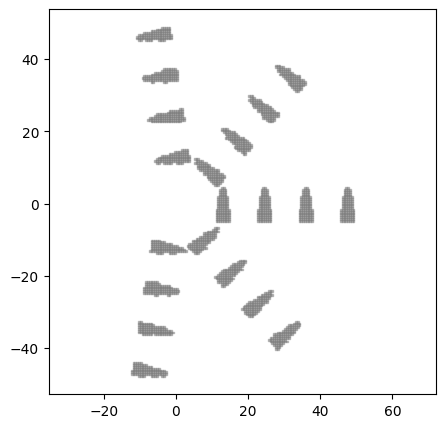

--------------------------------------------------
label: VentHole Chromosome_317: ['DoubleParabolicShape_317', 'GridStrictTransformation_317']
predict: (0.29208135622680675, 373.35787299999987, 455.0222703000001)
biased_fitness: 0.705636786131933, fitness: 0.6872857212319324
shape parameter:
parameter_list: [ lower_coefficient: 2.05520452423583, upper_coefficient: 2.93139030193098, lower_y-intercept: 2.385534404916933, upper_y-intercept_from_lower_y: 1.3645492731429616, lower_x_trans: 1.9237581145408198, ]
pattern parameter:
parameter_list: [ dx: 2.334327109616086, dy: 7.499690115556894, ]


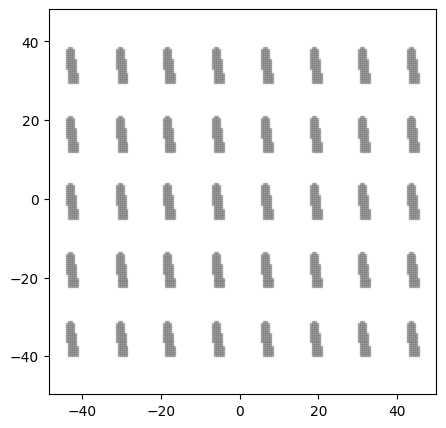

--------------------------------------------------
label: VentHole Chromosome_318: ['DoubleParabolicShape_318', 'CornerTransformation_318']
predict: (0.28918003111630997, 373.08121370000015, 457.1932209000001)
biased_fitness: 0.7322447511368989, fitness: 0.7068275158368991
shape parameter:
parameter_list: [ lower_coefficient: 1.356647139222127, upper_coefficient: 1.5438650133736262, lower_y-intercept: 3.5078419781499366, upper_y-intercept_from_lower_y: 1.34101984902277, lower_x_trans: -0.6663899923713332, ]
pattern parameter:
parameter_list: [ di: 11.540527831853927, dx: 6.109964083247642, phi: 0.509873867787288, rot_count: 5.0, ]


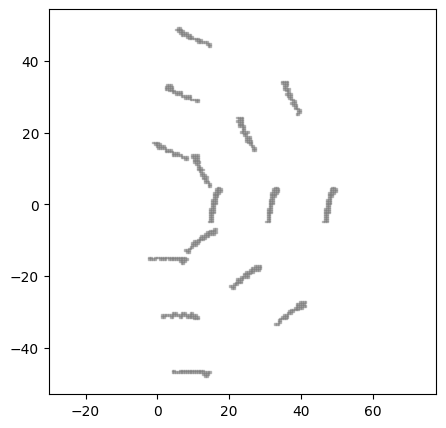

--------------------------------------------------
label: VentHole Chromosome_319: ['DoubleParabolicShape_319', 'CornerTransformation_319']
predict: (0.2907964260669851, 373.1945410999999, 458.0170565999999)
biased_fitness: 0.7136398384301499, fitness: 0.6859777508301501
shape parameter:
parameter_list: [ lower_coefficient: 2.2748906507164, upper_coefficient: 1.3701651724505026, lower_y-intercept: 3.6353875862584757, upper_y-intercept_from_lower_y: 1.4001418610085965, lower_x_trans: 3.9792436708690175, ]
pattern parameter:
parameter_list: [ di: 8.999322367807888, dx: 7.010174720029948, phi: 0.7364433775966174, rot_count: 3.0, ]


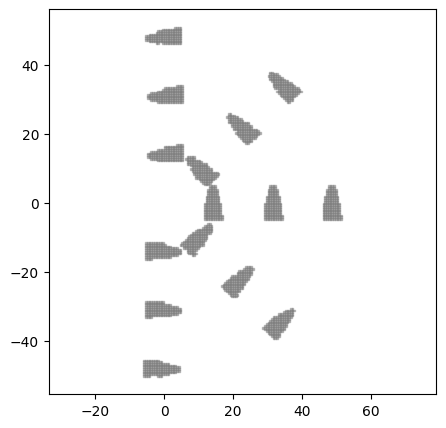

--------------------------------------------------
label: VentHole Chromosome_320: ['DoubleParabolicShape_320', 'CornerTransformation_320']
predict: (0.2896975127520023, 372.96195570000003, 457.56485869999983)
biased_fitness: 0.7271614651799772, fitness: 0.7003908004799777
shape parameter:
parameter_list: [ lower_coefficient: 1.7304083033369975, upper_coefficient: 2.0481505640823694, lower_y-intercept: 2.3745388395102665, upper_y-intercept_from_lower_y: 1.1705274716321612, lower_x_trans: -2.7271313244015727, ]
pattern parameter:
parameter_list: [ di: 14.026655178349095, dx: 4.821128426746419, phi: 0.6039556336634876, rot_count: 5.0, ]


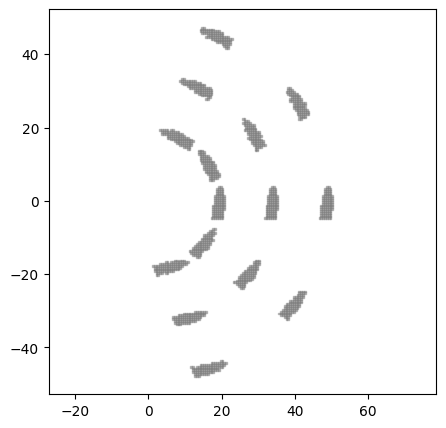

--------------------------------------------------
label: VentHole Chromosome_321: ['DoubleParabolicShape_321', 'GridStrictTransformation_321']
predict: (0.28897268320175984, 372.9727553, 457.2529514)
biased_fitness: 0.7349579780824014, fitness: 0.7091446344824015
shape parameter:
parameter_list: [ lower_coefficient: 2.0068203404719513, upper_coefficient: 2.684579885720404, lower_y-intercept: 3.30574944709512, upper_y-intercept_from_lower_y: 1.0831988608703018, lower_x_trans: -1.275446726772782, ]
pattern parameter:
parameter_list: [ dx: 5.234685933261019, dy: 6.915870707935572, ]


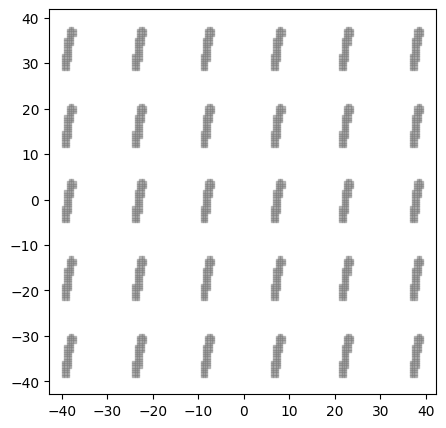

--------------------------------------------------
label: VentHole Chromosome_322: ['DoubleParabolicShape_322', 'CornerTransformation_322']
predict: (0.2894593041638456, 373.1974807999999, 457.2291342999999)
biased_fitness: 0.7285663241615451, fitness: 0.7032738828615452
shape parameter:
parameter_list: [ lower_coefficient: 2.028325189737756, upper_coefficient: 2.792839902494803, lower_y-intercept: 3.1086864737581275, upper_y-intercept_from_lower_y: 1.6555478040072984, lower_x_trans: 2.3722685084281236, ]
pattern parameter:
parameter_list: [ di: 9.297581753989494, dx: 6.658592807065901, phi: 0.6910358499909428, rot_count: 2.0, ]


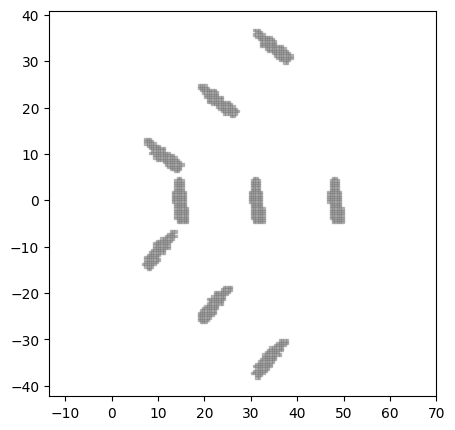

--------------------------------------------------
label: VentHole Chromosome_323: ['DoubleParabolicShape_323', 'CornerTransformation_323']
predict: (0.2897645588418205, 373.21257829999996, 456.96843370000005)
biased_fitness: 0.725929496081795, fitness: 0.7014493515817948
shape parameter:
parameter_list: [ lower_coefficient: 2.799648608463071, upper_coefficient: 2.4038893092216775, lower_y-intercept: 1.6720146667693863, upper_y-intercept_from_lower_y: 1.673034394093313, lower_x_trans: -1.8703276790517274, ]
pattern parameter:
parameter_list: [ di: 7.53209890392047, dx: 2.8234462202375017, phi: 0.43813576291548445, rot_count: 4.0, ]


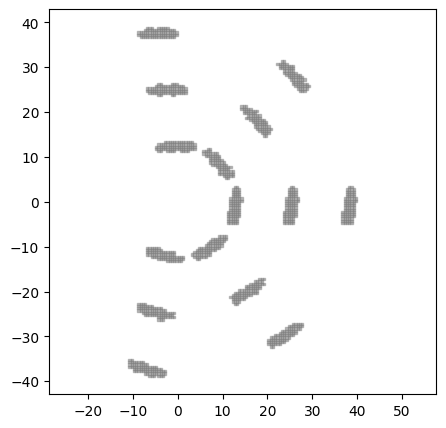

--------------------------------------------------
label: VentHole Chromosome_324: ['DoubleParabolicShape_324', 'CircularStrictTransformation_324']
predict: (0.29151042385590387, 373.26569440000014, 457.818502)
biased_fitness: 0.7063988966409601, fitness: 0.6794747794409604
shape parameter:
parameter_list: [ lower_coefficient: 2.8795621157252276, upper_coefficient: 2.03739063307659, lower_y-intercept: 2.8473236934513784, upper_y-intercept_from_lower_y: 1.8120157921596687, lower_x_trans: 1.2147351687516519, ]
pattern parameter:
parameter_list: [ di: 9.825184968360983, dx: 1.397968703381231, phi: 0.5235987755982988, ]


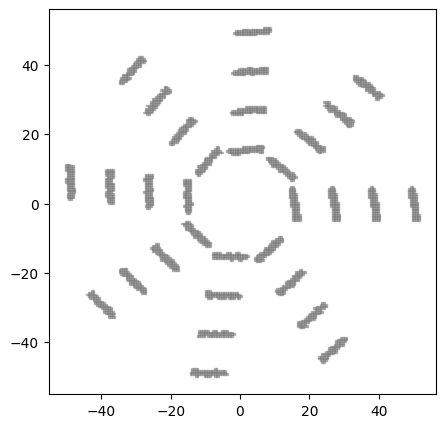

--------------------------------------------------
label: VentHole Chromosome_325: ['DoubleParabolicShape_325', 'GridStrictTransformation_325']
predict: (0.29200655135689213, 372.9372958, 461.65113399999973)
biased_fitness: 0.6960711478310789, fitness: 0.6569923374310799
shape parameter:
parameter_list: [ lower_coefficient: 1.965266912409772, upper_coefficient: 1.8211524534289443, lower_y-intercept: 3.022864457437934, upper_y-intercept_from_lower_y: 1.3125913573810402, lower_x_trans: 1.6809552628203122, ]
pattern parameter:
parameter_list: [ dx: 7.573087737188399, dy: 2.59379149043015, ]


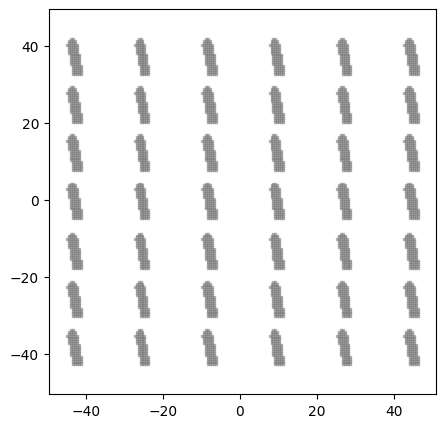

--------------------------------------------------
label: VentHole Chromosome_326: ['DoubleParabolicShape_326', 'CornerTransformation_326']
predict: (0.28912368108127673, 373.27836929999995, 455.2938301)
biased_fitness: 0.735226943887233, fitness: 0.7159021921872329
shape parameter:
parameter_list: [ lower_coefficient: 1.4109515883737338, upper_coefficient: 1.6594668344160972, lower_y-intercept: 1.7580595621012458, upper_y-intercept_from_lower_y: 1.1905280508341751, lower_x_trans: 3.843804091465003, ]
pattern parameter:
parameter_list: [ di: 13.999181689067385, dx: 9.487083204956818, phi: 0.49042360340632296, rot_count: 6.0, ]


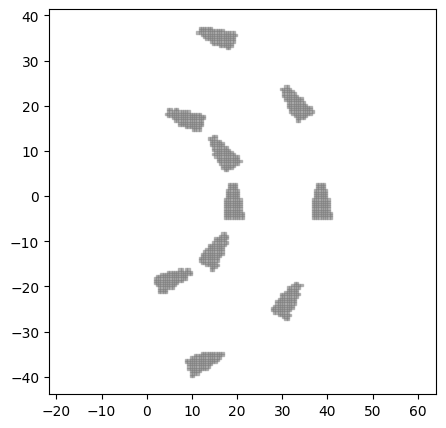

--------------------------------------------------
label: VentHole Chromosome_327: ['DoubleParabolicShape_327', 'CornerTransformation_327']
predict: (0.2899826801743386, 373.23241019999995, 457.05485459999994)
biased_fitness: 0.7234366176566144, fitness: 0.6987368742566145
shape parameter:
parameter_list: [ lower_coefficient: 2.2994380476638314, upper_coefficient: 1.2001546115545687, lower_y-intercept: 1.2207110699353843, upper_y-intercept_from_lower_y: 1.345814536653303, lower_x_trans: 0.38020286074912946, ]
pattern parameter:
parameter_list: [ di: 14.759357153634484, dx: 1.4795276883112731, phi: 0.6025551045151133, rot_count: 6.0, ]


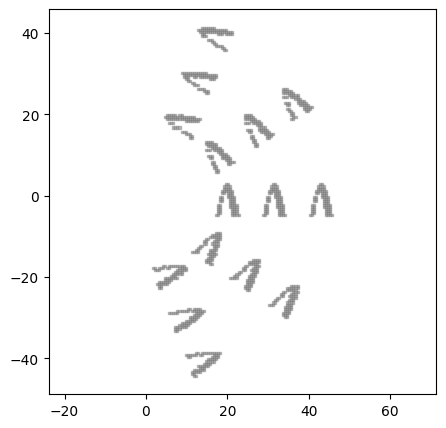

--------------------------------------------------
label: VentHole Chromosome_328: ['DoubleParabolicShape_328', 'CircularStrictTransformation_328']
predict: (0.29072603332567537, 373.14401190000007, 457.83360169999986)
biased_fitness: 0.715064380043246, fitness: 0.6878515987432465
shape parameter:
parameter_list: [ lower_coefficient: 1.5900031036097666, upper_coefficient: 1.0457964523536103, lower_y-intercept: 1.1853588577415497, upper_y-intercept_from_lower_y: 1.3021922545733042, lower_x_trans: 1.1337513214661996, ]
pattern parameter:
parameter_list: [ di: 9.568137041011802, dx: 3.198883856456238, phi: 0.3306939635357677, ]


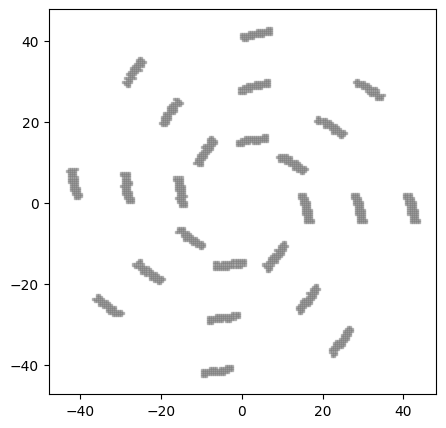

--------------------------------------------------
label: VentHole Chromosome_329: ['DoubleParabolicShape_329', 'CircularStrictTransformation_329']
predict: (0.28921373606634226, 373.2837174000001, 457.5393864)
biased_fitness: 0.7297978447365765, fitness: 0.7037471203365767
shape parameter:
parameter_list: [ lower_coefficient: 1.022600109138187, upper_coefficient: 1.840434221381838, lower_y-intercept: 1.639586929290165, upper_y-intercept_from_lower_y: 1.7536669268339375, lower_x_trans: 1.2777658157771379, ]
pattern parameter:
parameter_list: [ di: 11.650459364329587, dx: 7.0163773288530855, phi: 0.7853981633974483, ]


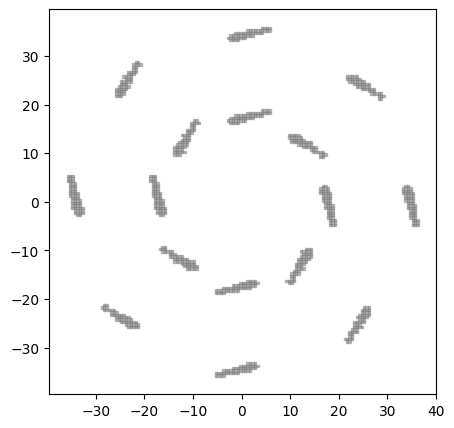

--------------------------------------------------
label: VentHole Chromosome_330: ['DoubleParabolicShape_330', 'GridStrictTransformation_330']
predict: (0.29302897609584977, 373.3757322999999, 457.24032790000007)
biased_fitness: 0.6915994571415026, fitness: 0.6666299380415023
shape parameter:
parameter_list: [ lower_coefficient: 1.741546616033579, upper_coefficient: 2.0728091483424307, lower_y-intercept: 1.292155908453789, upper_y-intercept_from_lower_y: 1.6952205110020984, lower_x_trans: 2.503941115503917, ]
pattern parameter:
parameter_list: [ dx: 2.6281416847573404, dy: 3.949589017537823, ]


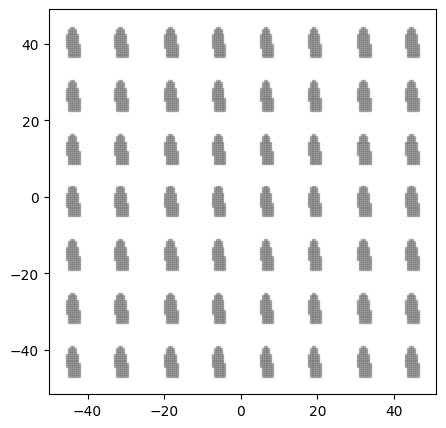

--------------------------------------------------
label: VentHole Chromosome_331: ['DoubleParabolicShape_331', 'GridStrictTransformation_331']
predict: (0.2922078776839685, 372.70604979999996, 458.8608535999999)
biased_fitness: 0.7012571673603154, fitness: 0.6700867061603155
shape parameter:
parameter_list: [ lower_coefficient: 1.0257050892653572, upper_coefficient: 1.7248568054564362, lower_y-intercept: 1.126927957263089, upper_y-intercept_from_lower_y: 1.7120812208454899, lower_x_trans: -3.3320589139741994, ]
pattern parameter:
parameter_list: [ dx: 6.398420457150147, dy: 9.429675312151705, ]


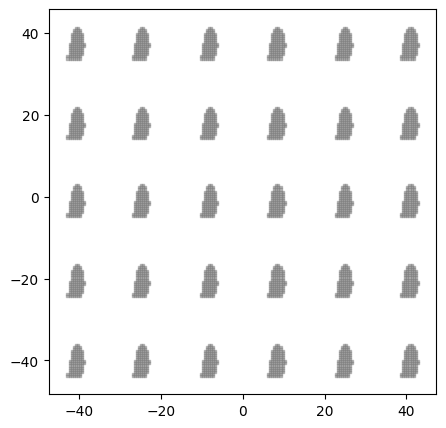

--------------------------------------------------
label: VentHole Chromosome_332: ['DoubleParabolicShape_332', 'CornerTransformation_332']
predict: (0.2893710055971852, 372.73984849999994, 458.2861554999997)
biased_fitness: 0.7305386935281488, fitness: 0.7011599240281496
shape parameter:
parameter_list: [ lower_coefficient: 2.9083878706456474, upper_coefficient: 2.3540580930168895, lower_y-intercept: 2.047497448431306, upper_y-intercept_from_lower_y: 1.8933850912045433, lower_x_trans: 1.8728765116715476, ]
pattern parameter:
parameter_list: [ di: 10.193688896490713, dx: 7.617562402088793, phi: 0.5348647757638578, rot_count: 6.0, ]


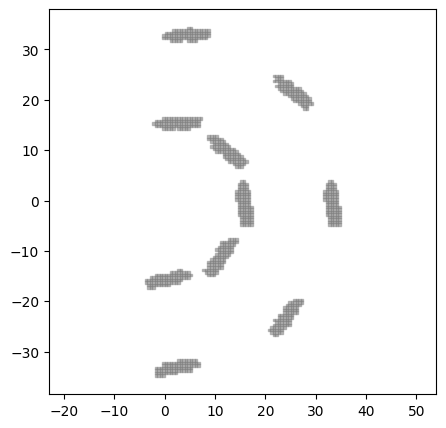

--------------------------------------------------
label: VentHole Chromosome_333: ['DoubleParabolicShape_333', 'CircularStrictTransformation_333']
predict: (0.2889506020121697, 373.2345983, 456.3968105000001)
biased_fitness: 0.7350581707783025, fitness: 0.7123369358783024
shape parameter:
parameter_list: [ lower_coefficient: 2.3133616055433306, upper_coefficient: 1.7025524804603474, lower_y-intercept: 3.7530819260094948, upper_y-intercept_from_lower_y: 1.071535193328046, lower_x_trans: 0.7806948032919614, ]
pattern parameter:
parameter_list: [ di: 10.474329623484655, dx: 8.396405597354564, phi: 0.5235987755982988, ]


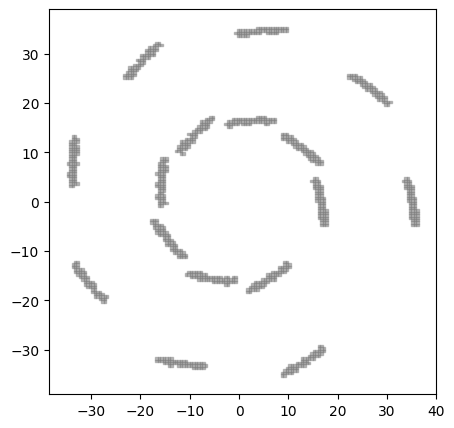

--------------------------------------------------
label: VentHole Chromosome_334: ['DoubleParabolicShape_334', 'CornerTransformation_334']
predict: (0.2898932900508169, 373.4834999, 454.72883650000006)
biased_fitness: 0.7272249271918307, fitness: 0.7100054174918307
shape parameter:
parameter_list: [ lower_coefficient: 1.814453549861127, upper_coefficient: 1.905237708189495, lower_y-intercept: 3.6569988649781884, upper_y-intercept_from_lower_y: 1.0535118655306945, lower_x_trans: -1.7113886019649502, ]
pattern parameter:
parameter_list: [ di: 11.286022830018494, dx: 9.942251224211015, phi: 0.38334814476236795, rot_count: 6.0, ]


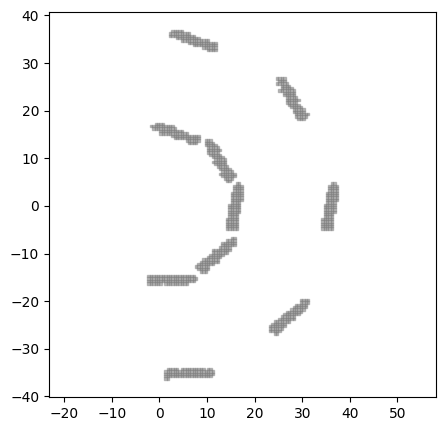

--------------------------------------------------
label: VentHole Chromosome_335: ['DoubleParabolicShape_335', 'CornerTransformation_335']
predict: (0.29027944248326554, 373.5911281, 460.4738098999999)
biased_fitness: 0.7111200586673448, fitness: 0.6768808851673451
shape parameter:
parameter_list: [ lower_coefficient: 1.8370990771175837, upper_coefficient: 2.8530476333256667, lower_y-intercept: 1.3500358051987043, upper_y-intercept_from_lower_y: 1.452296735840258, lower_x_trans: -3.59471821556139, ]
pattern parameter:
parameter_list: [ di: 8.655653074324366, dx: 1.8897460173984968, phi: 0.6673498258193897, rot_count: 4.0, ]


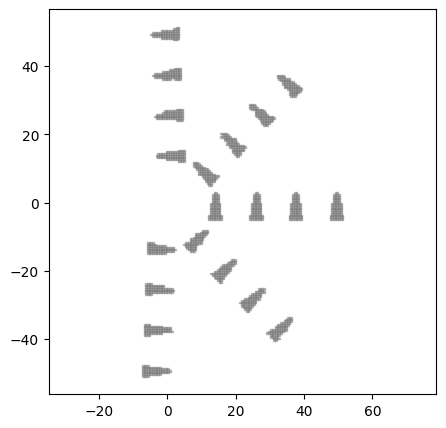

--------------------------------------------------
label: VentHole Chromosome_336: ['DoubleParabolicShape_336', 'CornerTransformation_336']
predict: (0.28856287612670917, 373.16106849999994, 454.7049387999998)
biased_fitness: 0.742833881632909, fitness: 0.7250412022329095
shape parameter:
parameter_list: [ lower_coefficient: 2.625925082817192, upper_coefficient: 2.1545585867454813, lower_y-intercept: 1.566250673173702, upper_y-intercept_from_lower_y: 1.41894067046834, lower_x_trans: 2.0657673720969116, ]
pattern parameter:
parameter_list: [ di: 14.094111276587899, dx: 7.177464931971326, phi: 0.5382499817898225, rot_count: 3.0, ]


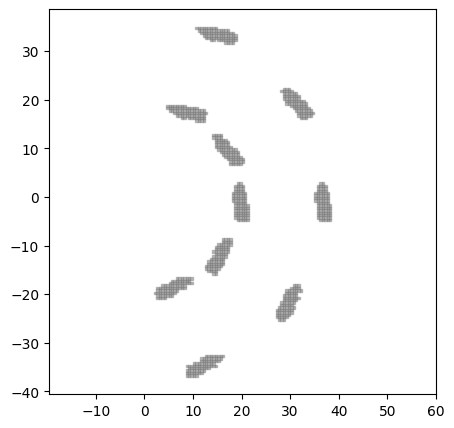

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )